# Wildfires in the Iberian Peninsula: Analysis, Investigation and Machine Learning Project

## Index

1. Introduction
2. Project Approach

    - Main Objectives
    - Methodology

3. Data Validation Protocol

    - Structural
    - Geospatial
    - Temporal
    - Climate

4. Data Collection

    - Data Sources

5. Dataset & Variables

    - FIRMS
    - ERA5-Land Reanalysis Dataset (Copernicus Climate Data Store)

6. Data Cleaning

    - Copernicus Climate Data
    - FIRMS Data
    - Overpass Turbo Dataset

7. Data Pre-Processing

    - Copernicus Climate Data
    - FIRMS Data
    - Merge the Datasets
    - Filter Industrial zones
    - Split Dataset

8. Exploratory Data Analysis

    - Distribution and Outliers - FIRMS Data Only
    - Distribution and Outliers - Climate Variables
    - Confidence Levels Distribution - A more detailed view
    - Iberian FIRMS Fire Count over the Years
    - Fire Density Comparison (Portugal vs. Spain)
    - Iberian FIRMS Fire Types Distribution over Time
    - Correlation between Fire Radiative Power and Brightness Correlation
    - Top 30 Fire-Prone Areas Per Country (Vegetation Fires & Confidence ≥ 30)
    - Temporal Climate Patterns Leading to Fire Events

9. Machine Learning Methods

    - Data Preparation and Encoding
    - Fire Probability Prediction:
        - Neural Network
        - Hyper-Parameter Tuning
        - Model Choice and Mock Inputs
    - Fire Intensity Prediction
        - K-Fold
        - Random Forest
        - Hyper-Parameter Tuning
        - Mock Input

Wildfires are an increasingly severe consequence of climate change, with rising global temperatures and extreme weather events exacerbating fire frequency and intensity. This project aims to analyze historical wildfire patterns in the Iberian Peninsula using climate and fire data from 2000 onwards. By studying the three days leading up to each fire, I will explore the relationships between climate conditions, weather variability, and soil properties to identify key drivers of wildfire occurrences.

While the connection between climate change and extreme weather events is well established, this study seeks to analyze localized wildfire trends within a geologically similar region under two distinct governments—Portugal and Spain. This comparison will allow for an assessment of how differences in wildfire prevention policies impact fire frequency and severity.

Through this study, I hope to generate valuable insights that can be used to support sustainability efforts, environmental protection policies, and disaster preparedness strategies. By highlighting the causes and consequences of wildfires, this research aims to contribute to better resource allocation for government agencies, climate organizations, and policymakers. Ultimately, this project seeks to shed light on the broader impacts of global warming on ecosystems and communities.

***NOTE: This project in no way states that climate factors CAUSE a fire, however it will highlight conditions that enable wildfires to ocurr, as the existence and fueling of any fire relies on the weather and vegetation conditions that fuel it.***

## Scope

- **Geographical:** The dataset includes Portugal, Spain, and their respective
archipelagos—the Azores, Madeira, Canary Islands, and Balearic Islands. Latitude and
longitude boundaries have been carefully selected to ensure comprehensive
coverage of wildfire and climate data across these regions.

- **Temporal:** The study covers wildfire records from 2000 to the present. While some
data exists prior to 2000, technological advancements in measurement devices have
significantly imp

## Project Approach

This project follows the standard framework for data science, whose aim is to analyse and predict wildfire trends in the Iberian Peninsula. 

The approach consists of collecting historical climate and fire data, carrying out Exploratory Data Analysis to identify patterns and trends, and applying Machine Learning Models to predict the likelihood of a fire occurring based on the weather parameters but also to predict the potential intensity of that fire. I will also aim to explore key government standings, procedures and policies within each country in order to pinpoint areas of improvement, supported by the results of this project.

### Main Objectives:

- Trend Exposure
- Statistical and Comparison analysis between Countries
- Isolate parameters with the highest correlation with wildfires for targeted interventions.
- ML: Fire occurrence prediction (Yes/No)
- ML: Fire Intensity forecasting (severity estimation)


### Methodology Summary

- Source Data
- Transform Copernicus Raw files into dataframes and save them as .parquet files due to size (additional steps needed for .grib files)
- Pre-Process both Datasets
- Enhance FIRMS data with Copernicus Climate Data
- Filter out any records that have the same Latitude and Longitude as Industrial properties.
- Use specific tools to handle the high level and heavy data files in this project. Such as:
  - Make use of Dask Python Library instead of pandas (ideal for data that ranges from Gb to TB)
  - Optimize repetitive tasks with functions
  - Partition processes where possible (mainly done for the API call)
  - Delete variables that store large volumes of data once the script doesn’t need them anymore.
  - Make use of gc.collect to free further RAM once done with a specific RAM heavy process.
-  Carry out Exploratory Analysis
  - Data Distribution
  - Boxplots to confirm outliers
  - Analyse Fire Count over Time

    - Include Portugal and Spain separate breakdowns
  - Analyse Fire Density per Country Area
  - Average Fire Radiative Power and Brightness Temperature per Country
  - Confidence Levels Distribution
  - Iberian FIRMS Fire Types Distribution over Time
  
    - Include Portugal and Spain Separate breakdowns
  - Correlation between Fire Radiative Power and Brightness Correlation
  - Top 30 Fire-Prone Areas Per Country (Vegetation Fires & Confidence ≥ 30)
  - Correlation between Climate Variables and Fire Intensity Variables
  - Temporal Climate Patterns Leading to Fire Events




## Data Validation Protocol

### Structural Validation

**Schema Consistency:** Verify that all expected columns exist and have the correct data types.
**Missing Values:** Identify and handle null values in key fields such as acq_date, latitude, longitude, Climate_Date, and climate variables.
**Duplicate Records:** Remove exact duplicate rows, ensuring each fire event is unique.
**Time Continuity:** Ensure Climate_Date properly expands to cover the required 3-day interval per fire event.

### Geospatial Validation

**Latitude & Longitude Range:** Confirm that fire occurrences fall within valid geographical boundaries (e.g., Iberian Peninsula). Will add “Country Column as part of this check.
**Rounding Consistency:** FIRMS Latitude & Longitude to match Copernicus grid resolution. 

### Temporal Validation

**Date Format Consistency:** Ensure acq_date and Climate_Date are properly formatted as YYYY-MM-DD.
**Correct Time Expansions:** Confirm that each fire event expands correctly to include acq_date and the previous 3 days.

### Climate Data Validation
**Physical Range Checks:**
- Air temperature (t2m) between -50°C and 60°C.
- Wind speeds (u10, v10) between 0 m/s and 50 m/s.
- Precipitation (tp) non-negative.
**Anomaly Detection:** Identify and flag extreme outliers using statistical thresholds (e.g., Z-score, IQR).
**NaN Handling:** Determine appropriate handling (drop, interpolate, forward fill) for missing climate values.



## Data Cleaning

### Copernicus ERA5_Land Dataset

- **Check for Nulls:** none were found
- **Verify Data Types:** Data types were consistent and no conversions were needed.
- **Unnecessary Columns:** No Columns were deemed unnecessary at this stage - to be refined once correlations are calculated
- **Unnecessary Rows:** Upon further analysis, we should only keep the rows with readings for 12h and 17h, as they bring the most relevant insights for the scale of this project.
- **Rename columns for clarity** - column “time” was renamed to “date” and column “step” was renamed to “time” as this was more reflective of the data.
- **Extract time** from renamed date column
- **Forward fill** any Latitude, Longitude and Dates, as some spaces were identified in sequential intervals.
- **Round Latitude** and **Longitude** to 1 decimal point.


### FIRMS Dataset

- **Check for Nulls:** none were found
- **Check for Duplicates:** 1 duplicate was found and removed
- **Verify Data Types:** Several columns were found to be datatype “object”. I carried out further investigation and found the unique values stored as objects - none showed different data formats other than the “Confidence” column, as it had numeric and string values. I converted all “object” columns to “string” to avoid compatibility issues.
Later in the process, converted string Confidence Level classifications (“l”, “n”, “h”) to numeric references (0.0, 50.0, 100.0)


### Overpass Turbo Dataset (Industrial Locations)

- **Extract rows** that include keywords related to industrial properties
- **Extract coordinates** from “geometry” column
- **Expand coordinates** to store in a long format for reference later.


## Data Pre-Processing

### Copernicus ERA5_Land Dataset

**Convert measures:**
    - Kelvin to Celsius
    - Wind Speed from M/s to KM/s
    - Pressure from Pascals to hPa
    - Precipitation & evaporation from meters to mm

### FIRMS Dataset

In order to enhance the FIRMS dataset, I need to determine the matching criteria. Upon investigation, merging Copernicus data with FIRMS data will need to be done on the combination of Latitude, Longitude, Date and Time.

The reason for time to be included is because the climate data provides us with readings at timed intervals. It will be easier to merge both datasets, if the FIRMS file has the 3 day period dates and time steps created beforehand.

**Pre-Processing FIRMS data for Climate Data Enhancement:**
- Latitude_1 and Longitude_1 were created with the Latitude and Longitude values rounded to 1 decimal place as that is the format that matches Copernicus Data.
- Expand the dataset so that an additional column called “Climate_Date” is created, and each fire incident row has 3 additional rows appended, which display the day of the fire, and the prior three days. For example:


**For Fire Date “2024-08-15”:**

| **acq_date (Fire Date)** | **Climate_Date** |
|-------------------------|----------------|
| 2024-08-15            | 2024-08-12     |
| 2024-08-15            | 2024-08-13     |
| 2024-08-15            | 2024-08-14     |
| 2024-08-15            | 2024-08-15     |

Expand the dataset even further to include the time steps from the climate data. 

**For Fire Date “2024-08-15”:**

| **acq_date (Fire Date)** | **Climate_Date** | **Climate_Time** |
|-------------------------|----------------|---------------|
| 2024-08-15            | 2024-08-12     | 12.0          |
| 2024-08-15            | 2024-08-13     | 12.0          |
| 2024-08-15            | 2024-08-14     | 12.0          |
| 2024-08-15            | 2024-08-15     | 12.0          |
| 2024-08-15            | 2024-08-12     | 17.0          |
| 2024-08-15            | 2024-08-13     | 17.0          |
| 2024-08-15            | 2024-08-14     | 17.0          |
| 2024-08-15            | 2024-08-15     | 17.0          |

As it can be observed by this example, the dataset is exponentially increasing, so I have made sure to utilize tools such as dask (optimal for large data being used in local environments) 

### Merge FIRMS data with Copernicus (Climate) Data

Once the FIRMS dataset has been prepared, the datasets are merged with a “left” method in order to keep all of the FIRMS records. 

Matching Criteria:
- Latitude
- Longitude
- Climate Date
- Climate Time

Data integrity checks are carried out after the merge to understand the result:

- Total Number of Rows
- Total Number of rows that are completely null
- A preview of a specific Fire event, to ensure that data has appended correctly, including the prior 3 days and the time intervals.
- Earliest and Latest Dates available in the dataset
- Number of Unique Fires
- Number of rows with any null values
- Percentage of null values within the dataset
- Preview of unique rows with NaN values

### Filter Industrial Locations from Dataset

At this stage the code resets Dask to clear the memory.

With the refresh, it’s the best time to filter the dataset. Using the file saved down from cleaning the Overpass Turbo dataset, I filter the records, and check the row count before and after.

The filter is only applied to records where the Fire Type is 0 (Presumed Vegetation Fire).

### Split the Merged Dataset 

Split the Merged Dataset into two variables, one that stores FIRMS data only, and one variable that stores the merged variables, but removes any null rows. 
I split these datasets so we can use them for different analyses and reduce the memory required when running.


## IMPORTS

In [469]:
import os
import gc
import re
import gc
import ast
import time
import glob
# import cdsapi
import zipfile
import requests
import matplotlib
import numpy as np
import xarray as xr
import pandas as pd
import xgboost as xgb
import seaborn as sns
import geopandas as gpd
import tensorflow as tf
import dask.dataframe as dd
import statsmodels.api as sm
from tensorflow import keras
from sklearn.base import clone
from scipy.special import expit 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from tensorflow.keras import layers 
import tensorflow.keras.backend as K
# from dask.distributed import Client
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings
from shapely.geometry import Polygon, MultiPolygon
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam, AdamW
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from concurrent.futures import ThreadPoolExecutor, as_completed
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from eccodes import codes_grib_new_from_file, codes_get, codes_release
from sklearn.calibration import CalibratedClassifierCV, calibration_curve, IsotonicRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, log_loss, brier_score_loss, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, silhouette_score, calinski_harabasz_score, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay


## Data Collection

### Data Sources

This study uses two primary data sources for fire occurrence and environmental conditions:

**Fire Information for Resource Management System (FIRMS)**
  -  Source: NASA Earth Observing System Data and Information System (EOSDIS).
  - Description: Provides near real-time and archived active fire locations detected by MODIS and VIIRS satellites.
  - Access: https://firms.modaps.eosdis.nasa.gov/download/ 
  - Citation: NASA Earth Observing System Data and Information System (EOSDIS), 2024.

**ERA5-Land Reanalysis Dataset (Copernicus Climate Data Store)**
  - Source: Copernicus Climate Change Service (C3S).
  - Description: High-resolution meteorological data, including temperature, precipitation, wind speed, and soil moisture.
  - Documentation: https://cds.climate.copernicus.eu/datasets/reanalysis-era5-land?tab=overview
  - API Documentation: https://cds.climate.copernicus.eu/how-to-api/ 
  - Citation: Muñoz-Sabater, J. (2019). ERA5-Land hourly data from 1950 to present. DOI: 10.24381/cds.e2161bac.

**Overpass Turbo (OpenStreetMap Data Query Tool)**
  - Source: OpenStreetMap (OSM)
  - Description: A web-based data extraction tool that allows users to query and visualize geospatial data from OpenStreetMap using Overpass API. It enables retrieval of features such as roads, buildings, waterways, and points of interest.
  - Documentation: https://overpass-turbo.eu/ 
  - Citation: Overpass API, OpenStreetMap contributors (2024). Retrieved from https://wiki.openstreetmap.org/wiki/Overpass_API.

## Datasets & Variables

### Fire Information for Resource Management System (FIRMS)

***Source Method: Portal Download, free***

***Format: .JSON***

Within the FIRMS database there are multiple datasets available through direct download from the website. The main differences between these datasets are the satellite that captured the data, and the time span available. In order to ensure the wildfire data was as comprehensive as possible, I sourced three datasets:

- **fire_archive_M-C61_571821.json:** Historical fire data for Portugal (2000–2024)
- **fire_archive_M-C61_571826.json:** Historical fire data for Spain (2000–2024)
- **fire_archive_SV-C2_571830.json:** Additional historical fire detections (Portugal & Spain)
- **fire_nrt_M-C61_571826.json:** Near real-time fire data for recent fire detections (validation)

The data in these files is either captured by MODIS (Moderate Resolution Imaging Spectroradiometer - M-C61) or VIIRS (Visible Infrared Imaging Radiometer Suite - SV-C2).

**Resolutions** 
- **MODIS (Moderate Resolution Imaging Spectroradiometer):** Lower spatial resolution (1 km).
- **VIIRS (Visible Infrared Imaging Radiometer Suite):** Higher spatial resolution (375 m) and includes additional thermal and reflectance bands.

Example Download process:

[INSERT IMAGE]


### Key Variables

| **Dataset Variable**  | **Description** | **Explanation** |
|--------------------|---------------------|------------|
| **Latitude**      | Center of 1 km fire pixel | Not necessarily the actual location of the fire as one or more fires can be detected within the 1 km pixel. |
| **Longitude**     | Center of 1 km fire pixel | Not necessarily the actual location of the fire as one or more fires can be detected within the 1 km pixel. |
| **brightness**    | Brightness temperature (K) | Detected at the fire location (varies by satellite). |
| **scan**         | X-direction scan size (km) | The size of the area scanned in the X-direction. |
| **track**        | Y-direction scan size (km) | The size of the area scanned in the Y-direction. |
| **acq_date**     | Fire detection date | Date of the fire detection (YYYY-MM-DD). |
| **acq_time**     | Fire detection time | Time of the fire detection in UTC (HHMM). |
| **satellite**    | Detecting satellite | The satellite that detected the fire (e.g., "A" for Aqua, "T" for Terra, "N" for NOAA-20). |
| **confidence**   | Fire detection confidence | Confidence level in the fire detection (Low, Nominal, High for MODIS; 0-100% for VIIRS). |
| **version**      | FIRMS dataset version | The version of the FIRMS dataset. |
| **bright_t31**   | Brightness temperature at 31 µm (K) | Used for atmospheric correction. |
| **frp** (Fire Radiative Power) | Fire intensity (MW) | The energy released by the fire in megawatts (MW), indicating fire intensity. |
| **Type**         | Hot spot type | 0 = presumed vegetation fire, 1 = active volcano, 2 = other static land source, 3 = offshore. |
| **daynight**     | Time of detection | Whether the detection occurred during the day or night. D = Daytime fire, N = Nighttime fire. |


### ERA5-Land Reanalysis Dataset (Copernicus Climate Data Store)

***Source Method: Creation of Account, API with Token, free***

***Format: .GRIB file zipped***

The ERA5-Land dataset is extremely large and contains vast amounts of data. 
The data is captured via satellite and is available to the public via Portal download or API call. In the webpage for the dataset, you set your parameters (variables, location).
For this project, I have selected all available variables aside from Lake specific data and Snow specific data as they are not pertinent for the geographical location I am analysing.

**Accessing API**

In order to access the API, you create a free account, which will automatically assign an API token. The API access is free, and the limit is 10,000 requests per month, however a single month is considered 1 request, and up to 4 concurrent calls are allowed.
Once the account is setup, follow the next link for a detailed how-to guide to setup the rest of the requirements.
Note: When using the API, before you try to make any requests, make sure to:
- Go to your profile
- Licenses Tab
- Agree to any relevant Licenses for  ERA5-Land Reanalysis Dataset. When getting the script with the parameters directly from the portal, the user is prompted to agree to licenses, however, I found that ticking that box alone doesn’t cover everything, and the user still has to manually find the licenses and agree to them under the tab in their profile:

[INSERT IMAGE]

 **Variable** | **Description** | **Explanation** |
|-------------|----------------|----------------|
| **skt**          | Skin Temperature | Temperature of the land surface | Measured in Kelvin (K). |
| **stl1**         | Soil Temperature Layer 1 | Temperature of the top soil layer | Depth: ~0-7 cm. |
| **stl2**         | Soil Temperature Layer 2 | Temperature of the second soil layer | Depth: ~7-28 cm. |
| **stl3**         | Soil Temperature Layer 3 | Temperature of the third soil layer | Depth: ~28-100 cm. |
| **stl4**         | Soil Temperature Layer 4 | Temperature of the deepest soil layer | Depth: ~100-289 cm. |
| **swvl1**        | Soil Moisture Layer 1 | Water content in the top soil layer | Measured in m³/m³, depth: ~0-7 cm. |
| **swvl2**        | Soil Moisture Layer 2 | Water content in the second soil layer | Measured in m³/m³, depth: ~7-28 cm. |
| **swvl3**        | Soil Moisture Layer 3 | Water content in the third soil layer | Measured in m³/m³, depth: ~28-100 cm. |
| **swvl4**        | Soil Moisture Layer 4 | Water content in the deepest soil layer | Measured in m³/m³, depth: ~100-289 cm. |
| **u10**          | Wind U Component 10m | Eastward (horizontal) wind speed | Measured at 10 meters above ground, in m/s. |
| **v10**          | Wind V Component 10m | Northward (vertical) wind speed | Measured at 10 meters above ground, in m/s. |
| **d2m**          | Dew Point Temperature 2m | Temperature at which air reaches saturation | Measured at 2 meters above ground, in °C. |
| **t2m**          | Air Temperature 2m | Temperature of the air | Measured at 2 meters above ground, in °C. |
| **e**            | Evaporation | Total amount of water evaporated | Measured in meters. |
| **evavt**        | Evaporation Vegetation | Evaporation due to transpiration from vegetation | Measured in meters. |
| **lai_hv**       | Leaf Area Index High Vegetation | Leaf surface area per unit ground area | Applies to high vegetation. |
| **lai_lv**       | Leaf Area Index Low Vegetation | Leaf surface area per unit ground area | Applies to low vegetation. |
| **pev**          | Potential Evaporation | Maximum possible evaporation | Under current conditions, measured in meters. |
| **sp**           | Surface Pressure | Atmospheric pressure at the surface | Measured in Pascals (Pa). |
| **sro**          | Surface Runoff | Water runoff from land surface | Due to excess precipitation, measured in meters. |
| **sshf**         | Surface Sensible Heat Flux | Heat exchange between land surface and atmosphere | Measured in W/m². |
| **ssr**          | Surface Solar Radiation | Total solar energy received at the surface | Measured in Joules/m². |
| **ssrd**         | Surface Solar Radiation Downward | Downward shortwave solar radiation | Measured at the surface, in W/m². |
| **tp**           | Total Precipitation | Total accumulated precipitation (rain & snow) | Measured in meters. |



In [277]:
# Data_Directory_Copernicus = "data\\historical\\Copernicus_Data"

In [278]:
# # Initialize CDS API client
# client = cdsapi.Client()

# # Define dataset and static parameters
# dataset = "reanalysis-era5-land"

# # Define the range of years and months
# start_year = 2000
# end_year = 2025
# months = [f"{i:02d}" for i in range(1, 13)]

# # Define query parameters (except for year and month)
# base_request = {
#     "variable": [
#         "2m_dewpoint_temperature",
#         "2m_temperature",
#         "skin_temperature",
#         "soil_temperature_level_1",
#         "soil_temperature_level_2",
#         "soil_temperature_level_3",
#         "soil_temperature_level_4",
#         "volumetric_soil_water_layer_1",
#         "volumetric_soil_water_layer_2",
#         "volumetric_soil_water_layer_3",
#         "volumetric_soil_water_layer_4",
#         "surface_pressure",
#         "total_precipitation",
#         "evaporation_from_vegetation_transpiration",
#         "total_evaporation",
#         "potential_evaporation",
#         "surface_solar_radiation_downwards",
#         "surface_net_solar_radiation",
#         "surface_sensible_heat_flux",
#         "10m_u_component_of_wind",
#         "10m_v_component_of_wind",
#         "wind_gusts_10m_max",
#         "surface_runoff",
#         "leaf_area_index_high_vegetation",
#         "leaf_area_index_low_vegetation",
#         "land_sea_mask",
#         "type_of_high_vegetation",
#         "type_of_low_vegetation"
#     ],
#     "day": [f"{i:02d}" for i in range(1, 32)],  # All possible days
#     "time": ["08:00", "12:00", "17:00", "21:00", "23:00"],
#     "data_format": "grib",  # Keep GRIB format
#     "area": [44, -33, 29, 5]  # Bounding box
# }

# # Output directory for GRIB files
# output_dir = Data_Directory_Copernicus + "\zip_cdsapi_file_samples"
# os.makedirs(output_dir, exist_ok=True)

# # Function to fetch and save GRIB data for a given year and month
# def fetch_era5_grib(year, month):
#     request = base_request.copy()
#     request["year"] = str(year)
#     request["month"] = [month]

#     # Define output filename
#     grib_filename = os.path.join(output_dir, f"era5_land_{year}_{month}.grib")

#     try:
#         print(f"Downloading data for {year}-{month}...")

#         # Retrieve and save GRIB file
#         result = client.retrieve(dataset, request)
#         result.download(grib_filename)

#         print(f"Data for {year}-{month} saved as {grib_filename}.")
#         return grib_filename

#     except Exception as e:
#         print(f"Failed to download data for {year}-{month}: {e}")
#         return None

# # Use ThreadPoolExecutor to run multiple requests in one go
# max_workers = 4  # CDSAPI has a limitation of max 4 concurrent calls at one time

# # List of all year-month combinations for tracking progress
# tasks = [(year, month) for year in range(start_year, end_year + 1) for month in months]

# with ThreadPoolExecutor(max_workers=max_workers) as executor:
#     futures = {executor.submit(fetch_era5_grib, year, month): (year, month)
#                for year, month in tasks}

#     for future in as_completed(futures):
#         year, month = futures[future]
#         try:
#             future.result()
#         except Exception as e:
#             print(f"Error retrieving data for {year}-{month}: {e}")

# print("All GRIB data successfully retrieved and stored in", output_dir)


### Sample API Output

2025-02-01 00:15:06,630 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.

2025-02-01 00:15:06,630 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.

Downloading data for 2000-01...

Downloading data for 2000-02...

Downloading data for 2000-03...

Downloading data for 2000-04...

Downloading ERA5 GRIB Data:   0%|          | 0/312 [00:00<?, ?it/s]2025-02-01 00:15:06,897 INFO Request ID is

1818f79f-4ace-403b-9b21-5734a466c343

2025-02-01 00:15:06,897 INFO Request ID is 85b0c0ad-ba9b-4b18-bc1b-076288005074

2025-02-01 00:15:06,968 INFO status has been updated to accepted

2025-02-01 00:15:06,968 INFO Request ID is fd4c19b1-7acc-487b-a939-7d200e7089b1

2025-02-01 00:15:06,974 INFO status has been updated to accepted

2025-02-01 00:15:06,979 INFO Request ID is 69f45a63-b238-4c74-857d-c7b285803313

2025-02-01 00:15:07,042 INFO status has been updated to accepted

2025-02-01 00:15:07,048 INFO status has been updated to accepted

### Extraction of .GRIB Files from ZIP archive

The below code is only processing a small number of .zip files from the API call, since the total number of files used for this databank is 294 files.

In order to showcase the functionality of the code, I have three .zip files from the API call we will use in the following step

In [279]:
# zip_folder_path = Data_Directory_Copernicus + "\\zip_cdsapi_file_samples"
# extracted_folder_path = Data_Directory_Copernicus + "\\extracted_grib_files_samples"

# # Ensure the extracted folder exists
# os.makedirs(extracted_folder_path, exist_ok=True)

# # Loop through each ZIP file and extract the contents
# for zip_filename in os.listdir(zip_folder_path):
#     if zip_filename.endswith(".zip"):
#         zip_path = os.path.join(zip_folder_path, zip_filename)
#         zip_name = os.path.splitext(zip_filename)[0]  # Get ZIP file name without extension

#         with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#             for grib_file in zip_ref.namelist():
#                 if grib_file.endswith(".grib"):  # Only extract GRIB files
#                     extracted_path = os.path.join(extracted_folder_path, f"{zip_name}_{grib_file}")

#                     with zip_ref.open(grib_file) as source, open(extracted_path, "wb") as target:
#                         target.write(source.read())

#                     print(f"Extracted: {grib_file} -> {zip_name}_{grib_file}")

# print("\nAll ZIP files extracted successfully with original file names")


### Extracting the variables from .GRIB

Due to the nature of .GRIB files, the data isn't readily available to read.

.GRIB files are used for meterological and geographical data, so they are stored in multiple levels and editions within the same file.

The below code extracts the variables iterating over level, and edition. The below code is commented out, as the data within .GRIB files is very large, and extracting it takes time - even with only a couple of samples.

You can run the below code to test its functionality, however please expect a running time of roughly 20 minutes in local (dependant on RAM) - faster if you are running this code in Google Colabs

In [280]:
# parquet_output_folder = os.path.join(Data_Directory_Copernicus, "parquet_output_samples")
# os.makedirs(parquet_output_folder, exist_ok=True)  # Ensure output folder exists

# # Function to extract unique variables from a GRIB file
# def get_unique_variables(grib_file):
#     variables = set()
#     with open(grib_file, "rb") as f:
#         while True:
#             gid = codes_grib_new_from_file(f)
#             if gid is None:
#                 break  # End of file
#             try:
#                 param = codes_get(gid, "shortName")
#                 edition = codes_get(gid, "edition")
#                 level_type = codes_get(gid, "typeOfLevel")
#                 variables.add((param, edition, level_type))
#             except Exception as e:
#                 print(f"Error: {e}")
#             finally:
#                 codes_release(gid)
#     return sorted(list(variables))  # Sorted for consistency

# # Process all GRIB files in the folder
# for file in sorted(os.listdir(extracted_folder_path)):
#     if file.endswith(".grib"):
#         file_path = os.path.join(extracted_folder_path, file)
#         idx_file = f"{file_path}.idx"  # Expected index file path

#         print(f"Processing: {file}")

#         # Check and recreate .idx file if missing/corrupted
#         if os.path.exists(idx_file):
#             try:
#                 with open(idx_file, "rb") as f:
#                     f.read()  # Try to read the index file
#             except (EOFError, OSError):
#                 print(f"Corrupt index detected, deleting {idx_file} and recreating...")
#                 os.remove(idx_file)  # Delete corrupted index file

#         # Extract year and month from filename (e.g., era5_land_2001_01.grib)
#         match = re.search(r"(\d{4})_(\d{2})", file)
#         if not match:
#             print(f"Skipping {file}, could not extract year and month")
#             continue
#         file_year, file_month = match.groups()

#         # Detect available variables
#         variables = get_unique_variables(file_path)
#         print(f"Detected {len(variables)} variables in {file}: {[v[0] for v in variables]}")

#         # Initialize empty DataFrame
#         combined_df = None

#         for var, edition, level_type in variables:
#             try:
#                 # Load dataset for this variable (this will recreate the .idx if missing)
#                 ds = xr.open_dataset(
#                     file_path,
#                     engine="cfgrib",
#                     backend_kwargs={"filter_by_keys": {"shortName": var, "edition": edition}},
#                     decode_timedelta=False
#                 )

#                 # Convert to DataFrame
#                 df = ds.to_dataframe().reset_index()

#                 # Drop duplicate non-variable columns before merging
#                 drop_cols = ["number", "surface", "valid_time", "depthBelowLandLayer"]
#                 df.drop(columns=[col for col in drop_cols if col in df.columns], errors="ignore", inplace=True)

#                 # Set index to (latitude, longitude, time, step)
#                 df.set_index(["latitude", "longitude", "time", "step"], inplace=True)

#                 # Rename the variable column
#                 df.rename(columns={var: f"{var}"}, inplace=True)

#                 # Merge into combined DataFrame for this month
#                 if combined_df is None:
#                     combined_df = df
#                 else:
#                     combined_df = combined_df.join(df, how="outer")

#                 print(f"Processed {var} (Edition {edition}), shape: {df.shape}")

#                 # Free memory
#                 del ds, df
#                 gc.collect()

#             except Exception as e:
#                 print(f"Skipping {var} in {file}: {e}")

#         # Save monthly Parquet file
#         if combined_df is not None:
#             output_file = os.path.join(parquet_output_folder, f"{file_year}_{file_month}.parquet")
#             combined_df.to_parquet(output_file, engine="pyarrow", compression="snappy")
#             print(f"Saved {output_file} with shape {combined_df.shape}")
#             del combined_df
#             gc.collect()



## Data Cleaning & Pre-Processing

Now lets investigate the file to see if there is any particular data cleaning and transformation needed.

I will examine the Copernicus data first as it is the largest set.

### Copernicus Data Cleaning and Transformation

There are 294 files, so will carry out data checks on one file.

In [281]:
# parquet_output_folder = os.path.join(Data_Directory_Copernicus, "parquet_output_samples")
# file = "2024_08.parquet"

# def check_parquet_file(folder, file):
#     parquet_file = os.path.join(folder, file)
#     parquet_preview = dd.read_parquet(parquet_file, engine="pyarrow")

#     print(f"Parquet file columns:\n{parquet_preview.columns}")

#     # Print Data Types
#     print("\nColumn Data Types:")
#     column_dtypes = parquet_preview.dtypes  # Compute to get actual types
#     display(column_dtypes)

#     # Check for Unexpected Data Types (Example: If numeric columns contain strings)
#     for col, dtype in column_dtypes.items():
#         if dtype == "object":  # Object dtype could indicate mixed types or strings in numeric columns
#             display(f"Column '{col}' is object/string but might contain numeric data!")

#     print(f"\nData Preview:")
#     display(parquet_preview.dropna(how="all").head(10))

#     total_rows = parquet_preview.shape[0]
#     print(f"\nTotal number of rows: {total_rows.compute()}")

#     null_row_count = parquet_preview.isna().all(axis=1).sum().compute()
#     print(f"\nNumber of rows with complete null rows: {null_row_count}")

#     del parquet_preview
#     gc.collect()

# check_parquet_file(parquet_output_folder, file)


Immediately we can see that there are some data **inconsistencies**:

- Column names are abbreviated and not clear
- In the Multi-Index:
  - Dates are stored under "time" and they include a timestamp
  - Step is where the times are stored, but some state "0.0" and the time can be seen in the "time" column
  - There is a very large number of null rows - Copernicus weather data is extracted as a big grid over a very large area, so many of these latitudes and longitudes might not have a reading.
  - Variables seem to be misaligned horizontally, a sub-set of rows that cover one date have some variables null in the first four rows, and populated in the following 4 rows. This may also account for some of the NULL counts. When appending the Copernicus data to the FIRMS data, will need to account for this, in order to fix the misalignment.

**Steps to take:**
- Reset index so we can manipulate and transform the data within it.
- Drop any rows where completely null
- Rename "time" to "date"
- Rename "step" to "time"
- Where "step" (renamed to "time") is 0.0, extract the time from the "time" (renamed to "date") column
- Remove all timestamps from the "time" (renamed to "date") column
- Drop any rows that are for 23h - this is to save on memory and computational power as it's not as relevant as some of the other times.
- Forward Fill the Latitude and Longitude Columns
- Round Latitude and Longitude to 1 decimal point. They already appear to be 1 decimal point, but want to ensure it's forced in case there are exceptions.


I will tackle the renaming of the columns once the weather data is merged with the fire dataset in order to save computational power. If I rename it at this stage I will be renaming all 294 files. If I wait until the data is merged, I will be renaming one file only.

In [282]:
# # Paths
# cleaned_folder = "data\\cleaned\\Copernicus_Cleaned_Data\\cleaned_parquet_files"
# os.makedirs(cleaned_folder, exist_ok=True)
# parquet_output_folder = "data\\cleaned\\Copernicus_Cleaned_Data\\parquet_output"
# os.makedirs(parquet_output_folder, exist_ok=True)

# # Get List of Parquet Files
# parquet_files = glob.glob(os.path.join(parquet_output_folder, "*.parquet"))

# # Function to Clean Parquet Data
# def clean_parquet(file):
#     print(f"Cleaning: {file}")

#     # Load parquet file with Dask for fast processing
#     parquet_to_clean = dd.read_parquet(file, engine="pyarrow")

#     # Reset index to bring 'time' (date values) into columns
#     parquet_to_clean = parquet_to_clean.reset_index()

#     # Ensure 'time' is datetime format & rename column
#     if "time" in parquet_to_clean.columns:
#         parquet_to_clean = parquet_to_clean.rename(columns={"time": "date"})  # Rename 'time' to 'date'

#     # Ensure latitude & longitude are populated
#     parquet_to_clean["latitude"] = parquet_to_clean["latitude"].ffill()
#     parquet_to_clean["longitude"] = parquet_to_clean["longitude"].ffill()

#     # Ensure every row has a date
#     parquet_to_clean["date"] = parquet_to_clean["date"].ffill()

#     # Rename 'time' to step
#     if "step" in parquet_to_clean.columns:
#         parquet_to_clean = parquet_to_clean.rename(columns={"step": "time"})  # Rename 'step' to 'time'

#     # Convert to Pandas for '.dt' operations
#     parquet_to_clean = parquet_to_clean.compute()

#     # Convert 'date' to datetime format
#     parquet_to_clean["date"] = pd.to_datetime(parquet_to_clean["date"], errors="coerce")

#     # Extract the hour from the 'date' column and assign it to 'time' where time is 0.0
#     parquet_to_clean.loc[parquet_to_clean["time"] == 0.0, "time"] = parquet_to_clean["date"].dt.hour.astype(float)

#     # Remove time from the 'date' column, keeping only YYYY-MM-DD
#     parquet_to_clean["date"] = parquet_to_clean["date"].dt.date

#     # Drop rows where all values (except indexes) are NaN
#     parquet_to_clean = parquet_to_clean.dropna(how="all", subset=parquet_to_clean.columns.difference(["latitude", "longitude", "date", "time"]))

#     # Drop rows where 'time' is 23h
#     parquet_to_clean = parquet_to_clean[parquet_to_clean["time"] != 23.0]

#     # Round Latitude & Longitude to 1 decimal places - they appear to already be 1 decimal place but just in case it's purely visual
#     parquet_to_clean["latitude"] = parquet_to_clean["latitude"].round(1)
#     parquet_to_clean["longitude"] = parquet_to_clean["longitude"].round(1)

#     # Save cleaned Parquet file using PyArrow (optimized for fast read/write)
#     cleaned_path = os.path.join(cleaned_folder, os.path.basename(file))
#     parquet_to_clean.to_parquet(cleaned_path, engine="pyarrow", compression="snappy", index=False)

#     print(f"Cleaned file saved: {cleaned_path}")

#     # Force garbage collection and delete temp variable
#     del parquet_to_clean
#     gc.collect()

#     return cleaned_path

# # Process & Clean All Parquet Files (Parallelized with Dask)
# cleaned_files = [clean_parquet(file) for file in parquet_files]

# print(f"All Parquet files cleaned and saved in: {cleaned_folder}")

# del parquet_files
# del cleaned_files
# gc.collect()


Check Parquet file after cleaning (the same file checked before) to identify the differences

In [283]:
# check_parquet_file(cleaned_folder, file)

### Overpass Data Cleaning and Transformation

Through the EDA phase of this project, it came to light that within the FIRMS data, some fire labelled as Fire_Type 0 (Presumed Vegetation Fire) actually display coordinates for industrial estates, factories, power plants and more.

To minimize the skeweing of this mislabelling, I have sourced data from Overpass turbo in order to extract the coordinates of these locations.

Some vegetation fire records may be lost in this process, if they ocurr close to one of these areas, but it is preferable to have some record loss if it increases the accuracy of fire records being used in this analysis that are true Vegetation fires (Wildfires).

The files were downloaded directly from Overpass as geojson files and saved under 'data/factory_locations

Queries used in the Overpass terminal in order to source the files:

```
[out:json][timeout:60];
// Define Portugal using its boundary
{{geocodeArea:Portugal}}->.searchArea;

// Find all industrial buildings, factories, and industrial estates
(
  node["landuse"="industrial"](area.searchArea);
  node["industrial"="industry"](area.searchArea);
  node["industrial"="industrial_area"](area.searchArea);
  node["man_made"="works"](area.searchArea);
  node["building"="industrial"](area.searchArea);
  way["landuse"="industrial"](area.searchArea);
  way["industrial"="industry"](area.searchArea);
  way["industrial"="industrial_area"](area.searchArea);
  way["man_made"="works"](area.searchArea);
  //way["building"="industrial"](area.searchArea);
  relation["landuse"="industrial"](area.searchArea);
  relation["industrial"="industry"](area.searchArea);
  relation["industrial"="industrial_area"](area.searchArea);
  relation["man_made"="works"](area.searchArea);
  relation["building"="industrial"](area.searchArea);
);

// Output results on the map
out body;
>;
out skel qt;
```

---------------------------------

```
[out:json][timeout:60];
// Define Spain using its boundary
{{geocodeArea:Spain}}->.searchArea;

// Find all industrial buildings, factories, and industrial estates
(
  node["landuse"="industrial"](area.searchArea);
  node["industrial"="industry"](area.searchArea);
  node["industrial"="industrial_area"](area.searchArea);
  node["man_made"="works"](area.searchArea);
  node["building"="industrial"](area.searchArea);
  way["landuse"="industrial"](area.searchArea);
  way["industrial"="industry"](area.searchArea);
  way["industrial"="industrial_area"](area.searchArea);
  way["man_made"="works"](area.searchArea);
  //way["building"="industrial"](area.searchArea);
  relation["landuse"="industrial"](area.searchArea);
  relation["industrial"="industry"](area.searchArea);
  relation["industrial"="industrial_area"](area.searchArea);
  relation["man_made"="works"](area.searchArea);
  relation["building"="industrial"](area.searchArea);
);

// Output results on the map
out body;
>;
out skel qt;
```

In [284]:
# # Define file paths
# portugal_geojson_path = "data\\factory_locations\\Portugal.geojson"
# spain_geojson_path = "data\\factory_locations\\Spain.geojson"

# # Load the full GeoJSON files
# gdf_portugal = gpd.read_file(portugal_geojson_path)
# gdf_spain = gpd.read_file(spain_geojson_path)

# # Dynamically determine available columns
# available_columns_portugal = set(gdf_portugal.columns)
# available_columns_spain = set(gdf_spain.columns)

# # Define relevant columns, including Spain-specific ones
# desired_columns = [
#     "geometry", "landuse", "building", "man_made", "amenity", "power",
#     "industrial", "waste", "works", "working", "factory", "plant", "shop", "substation",
#     # Spain-Specific Columns
#     "was:industrial", "disused:industrial", "was:man_made", "was:shop"
# ]

# # Filter only columns that exist in each dataset
# columns_to_keep_portugal = ["geometry"] + [col for col in desired_columns if col in available_columns_portugal]
# columns_to_keep_spain = ["geometry"] + [col for col in desired_columns if col in available_columns_spain]

# # Select only existing columns
# gdf_portugal = gdf_portugal[columns_to_keep_portugal]
# gdf_spain = gdf_spain[columns_to_keep_spain]

# # Function to filter industrial locations and extract coordinates
# def get_coordinates(gdf):
#     """Filters industrial-related locations and extracts coordinates, including Spain-specific tags."""

#     # Ensure filtering only uses available columns
#     conditions = []
#     if "landuse" in gdf.columns:
#         conditions.append(gdf["landuse"] == "industrial")
#     if "building" in gdf.columns:
#         conditions.append(gdf["building"].isin(["industrial", "factory", "warehouse", "plant"]))
#     if "man_made" in gdf.columns:
#         conditions.append(gdf["man_made"].isin(["works", "chimney", "storage_tank"]))
#     if "amenity" in gdf.columns:
#         conditions.append(gdf["amenity"] == "recycling")
#     if "power" in gdf.columns:
#         conditions.append(gdf["power"] == "plant")
#     if "industrial" in gdf.columns:
#         conditions.append(gdf["industrial"].notna())
#     if "waste" in gdf.columns:
#         conditions.append(gdf["waste"].isin(["recycling", "scrap_yard", "disposal"]))
#     if "works" in gdf.columns:
#         conditions.append(gdf["works"].notna())
#     if "working" in gdf.columns:
#         conditions.append(gdf["working"].notna())
#     if "factory" in gdf.columns:
#         conditions.append(gdf["factory"].notna())
#     if "plant" in gdf.columns:
#         conditions.append(gdf["plant"].notna())
#     if "shop" in gdf.columns:
#         conditions.append(gdf["shop"].notna())
#     if "substation" in gdf.columns:
#         conditions.append(gdf["substation"].notna())

#     # Spain-Specific Filtering
#     if "was:industrial" in gdf.columns:
#         conditions.append(gdf["was:industrial"].notna())
#     if "disused:industrial" in gdf.columns:
#         conditions.append(gdf["disused:industrial"].notna())
#     if "was:man_made" in gdf.columns:
#         conditions.append(gdf["was:man_made"].notna())
#     if "was:shop" in gdf.columns:
#         conditions.append(gdf["was:shop"].notna())

#     # Apply filtering dynamically based on available columns
#     if conditions:
#         industrial_filter = gdf[pd.concat(conditions, axis=1).any(axis=1)].copy()
#     else:
#         industrial_filter = gdf.copy()  # If no relevant columns exist, keep all

#     # Ensure only one geometry column exists
#     industrial_filter = industrial_filter.loc[:, ~industrial_filter.columns.duplicated()]

#     # Ensure geometry column is valid and not empty
#     if "geometry" in industrial_filter.columns:
#         industrial_filter = industrial_filter.dropna(subset=["geometry"])

#     # Function to extract coordinates safely
#     def extract_coords(geom):
#         """Extracts coordinates from valid Polygon and MultiPolygon geometries."""
#         if geom is None or geom.is_empty:
#             return None
#         elif isinstance(geom, Polygon):
#             return list(geom.exterior.coords)
#         elif isinstance(geom, MultiPolygon):
#             return [list(p.exterior.coords) for p in geom.geoms]
#         return None

#     # Apply function only on valid geometry objects
#     if "geometry" in industrial_filter.columns:
#         industrial_filter["coords"] = industrial_filter["geometry"].apply(
#             lambda g: extract_coords(g) if isinstance(g, (Polygon, MultiPolygon)) else None
#         )

#     # Ensure "coords" column exists before exploding
#     if "coords" in industrial_filter.columns:
#         industrial_filter["coords"] = industrial_filter["coords"].fillna("").astype(str)  # Prevent NaN issues
#         industrial_filter = industrial_filter.explode("coords", ignore_index=True)

#     # Ensure geometry column is completely dropped after extraction
#     industrial_filter = industrial_filter.drop(columns=["geometry"], errors="ignore")

#     return industrial_filter

# # Apply function to extract coordinates
# gdf_portugal = get_coordinates(gdf_portugal)
# gdf_spain = get_coordinates(gdf_spain)

# # Combine both datasets
# gdf_combined = pd.concat([gdf_portugal, gdf_spain], ignore_index=True)

# # Save to CSV
# gdf_combined.to_csv("data\\factory_locations\\combined_pt_sp.csv", index=False)

# def extract_coords(coord_str):
#     try:
#         # Convert the string representation of the list to an actual list
#         coord_list = ast.literal_eval(coord_str)

#         # If the first element is a list, flatten it (handling MultiPolygon cases)
#         if isinstance(coord_list[0], list):
#             coord_list = [coord for sublist in coord_list for coord in sublist]

#         # Ensure we have valid coordinates
#         if all(isinstance(c, tuple) and len(c) == 2 for c in coord_list):
#             return coord_list

#     except (ValueError, SyntaxError, TypeError):
#         return None
#     return None

# # Apply function and explode coordinates into separate rows
# gdf_combined["coords"] = gdf_combined["coords"].apply(extract_coords)
# gdf_combined = gdf_combined.explode("coords", ignore_index=True)

# # Convert tuples into separate lat/lon columns
# gdf_combined[["lon", "lat"]] = pd.DataFrame(gdf_combined["coords"].tolist(), index=gdf_combined.index)

# # Keep only lat/lon columns
# df_extracted_coords = gdf_combined[["lat", "lon"]].dropna()

# # Save the cleaned dataset with lat/lon values
# final_coords_file_path = "data\\factory_locations\\final_extracted_coordinates.csv"
# df_extracted_coords.to_csv(final_coords_file_path, index=False)


### FIRMS Fire Data Cleaning and Transformation

First let's merge the three .JSON files extracted from the portal.

In [285]:
# raw_fire_file_directory = ["data\\historical\\FIRMS_Fire_Data\\fire_archive_M-C61_571821.json",
#     "data\\historical\\FIRMS_Fire_Data\\fire_archive_M-C61_571826.json",
#     "data\\historical\\FIRMS_Fire_Data\\fire_archive_SV-C2_571830.json"]

# fire_dataframes = [pd.read_json(file) for file in raw_fire_file_directory]

# combined_fire_datarame = pd.concat(fire_dataframes, ignore_index=True)

# combined_fire_datarame = combined_fire_datarame.copy()


Now let's verify some of the metrics of the data

In [286]:
# def check_FIRMS_file(file):
#     print("\nData Info:\n")
#     print(file.info())
#     print("\nData Preview:")
#     display(file.head(5))
#     print("\nColumn Names:\n")
#     print(file.columns)

# check_FIRMS_file(combined_fire_datarame)

Other than unclear column names, this dataset seems to be fairly consistent.
There are no null values, however the major concern is that some of the column types are "Object", indicating that there might be multiple dataypes within that column.

In [287]:
# def inspect_object_columns(df):
#     object_columns = df.select_dtypes(include=["object"]).columns  # Get object dtype columns

#     print("\nAnalyzing Object Columns:\n")
#     for col in object_columns:
#         unique_types = df[col].apply(type).value_counts()
#         print(f"Column: {col}")
#         print(f"Unique Data Types in Column:")
#         display(unique_types)

#         # Show 5 random examples of each datatype found in the column
#         print("\nSample Values by Data Type:")
#         for dtype in unique_types.index:
#             sample_values = df[df[col].apply(type) == dtype][col].sample(min(5, len(df)), random_state=42).tolist()
#             display(f"   - {dtype}: {sample_values}")

#         print("\n" + "-"*80 + "\n")

# # Call the function to inspect object columns
# inspect_object_columns(combined_fire_datarame)


Let's convert the object type columns to string, to minimize compatibility issues

In [288]:
# # Convert all object columns to strings
# object_columns = combined_fire_datarame.select_dtypes(include=["object"]).columns
# combined_fire_datarame[object_columns] = combined_fire_datarame[object_columns].astype(str)

# # Ensure 'confidence' column is also fully string-based
# combined_fire_datarame["confidence"] = combined_fire_datarame["confidence"].astype(str)

Check for duplicates and remove them

In [289]:
# duplicates_removed = combined_fire_datarame.drop_duplicates(subset=["latitude", "longitude", "acq_date"])
# duplicates_count = combined_fire_datarame.shape[0]-duplicates_removed.shape[0]

# if duplicates_count > 0:
#     print(f"Duplicates entries with same lat, lon & date detected: {duplicates_count}")
#     cleaned_fire_data = duplicates_removed
#     print("Duplicates removed.")
# else:
#     print(f"No duplicates found")
#     cleaned_fire_data = combined_fire_datarame

#     cleaned_fire_data.info()

# cleaned_fire_data.head(10)
# cleaned_fire_data.info()

In [290]:
# # Convert categorical confidence values to numeric equivalents
# confidence_mapping = {"l": "0", "n": "50", "h": "100"}

# # Make an Explicit Copy
# cleaned_fire_data = cleaned_fire_data.copy()  # This ensures modifications happen on a full DataFrame, not a slice

# # Convert Data Types Safely
# cleaned_fire_data["confidence"] = cleaned_fire_data["confidence"].replace(confidence_mapping).astype(float)
# cleaned_fire_data["acq_date"] = pd.to_datetime(cleaned_fire_data["acq_date"])

# # Round Latitude & Longitude
# cleaned_fire_data["Latitude_1d"] = cleaned_fire_data["latitude"].round(1)
# cleaned_fire_data["Longitude_1d"] = cleaned_fire_data["longitude"].round(1)

# print(f"No warnings expected now!")
# print(f"Number of rows before aggregation: {cleaned_fire_data.count().max()}")

# # Function to correctly aggregate fire types
# def resolve_fire_type(fire_types):
#     fire_types = sorted(fire_types.unique(), reverse=True)  # Sort by priority (highest first)

#     if 1 in fire_types:  # If an active volcano exists, return it
#         return 1
#     elif 3 in fire_types:  # If an offshore fire exists, return it
#         return 3
#     elif 2 in fire_types and 0 in fire_types:  # If vegetation (0) & other land source (2) exist, return vegetation (0)
#         return 0
#     else:
#         return fire_types[0]  # Default to the highest priority

# # Define Aggregation Rules
# aggregation_rules = {
#     "frp": "mean",
#     "brightness": "mean",
#     "confidence": "mean",
#     "track": "mean",
#     "type": resolve_fire_type,
#     "bright_t31": "mean",
#     "scan": "mean",
#     "satellite": lambda x: ', '.join(set(x)),
#     "daynight": lambda x: ', '.join(set(x)),
#     "version": "first",
#     "instrument": lambda x: ', '.join(set(x))
# }

# # Group & Aggregate
# df_grouped = cleaned_fire_data.groupby(["Latitude_1d", "Longitude_1d", "acq_date", "acq_time"], as_index=False).agg(aggregation_rules)

# print(f"Number of rows after aggregation: {df_grouped.count().max()}")


In [291]:
# # Load Factory Locations
# df_factories = pd.read_csv("data\\factory_locations\\final_extracted_coordinates.csv")

# # Ensure column names match FIRMS dataset
# df_factories.rename(columns={"lat": "Latitude_1d", "lon": "Longitude_1d"}, inplace=True)

# # Round coordinates to 1 decimal place
# df_factories["Latitude_1d"] = df_factories["Latitude_1d"].round(1)
# df_factories["Longitude_1d"] = df_factories["Longitude_1d"].round(1)

# # Convert factory locations into a set for fast lookup
# factory_coords_set = set(zip(df_factories["Latitude_1d"], df_factories["Longitude_1d"]))

# # Remove fire data that overlaps with factory locations, but keep non-type 0
# df_grouped["coords_tuple"] = list(zip(df_grouped["Latitude_1d"], df_grouped["Longitude_1d"]))
# mask = ~(df_grouped["coords_tuple"].isin(factory_coords_set)) | (df_grouped["type"] != 0)

# # Apply the mask to filter the dataset
# dataset_with_no_factories = df_grouped[mask].drop(columns=["coords_tuple"])

# # Calculate Row Count after Filtering
# total_rows_after = len(dataset_with_no_factories)
# print(f"\n Rows after filtering out industrial areas: {total_rows_after}")

# # Free Memory
# gc.collect()

# dataset_with_no_factories.head()

Save the dataset to a .csv file

In [292]:
# cleaned_fire_folder = "data\\cleaned\\FIRMS_Fire_Cleaned_Data\\historical_fire_cleaned_data_new.csv"
# dataset_with_no_factories.to_csv(cleaned_fire_folder)

## Merging Weather Data with Fire Data

The next step now is to enhance the FIRMS dataset with Climate Variables from the Copernicus parquet files.

The below code for this process is only running on three sample files to showcase functionality, as the real time it takes to merge the Copernicus data with the FIRMS dataset is circa 80m on my local.

The code is:

- Exploding the FIRMS dates in an additional column ("Climade_Date") to prepare the dataset for merging - we are appending the climate records for the day of the fire, but also for the previous 3 days. Originally I attempted to merge records for the previous 7 days, however it was costing a lot of RAM and time. Upon further research, it was determined that the 3 days prior to a fire are still good to asses the weather condition trends.
- Exploding the "Climate_Date" records into 2, in order to accommodate 2 daily readings. Copernicus dataset has more, but research shows that 12h and 17h are a key interval in assessing weather conditions related to wildfires as they are the hours of most heat.
- Rounding the Latitude and Longitude of FIRMS to 1 decimal point in additional columns ('Latitude_1d' and 'Longitude_1d') to facilitate the merge without losing the original Latitude and Longitude values.
- Due to a misalignment of Copernicus data (some variables appear on the top 4 rows, with NULL on the rest of the variables, despite of all variables being related to the same date, time and coordinates), I am splitting the parquet files into two, correcting the misalignment (so all variables with data for the same date, lat, lon and time have their values on the rame row)
- Once the misalignment is corrected, left merging Copernicus parameters to the FIRMS dataset, in order to keep all records from FIRMS
- Use the first parquet file to determine the schema.
- Merge the remaining parquet files subsequently. For each parquet file that is attached to a fire record, attach an additional 3 records unrelated to a fire incident from that parquet file - this is in preparation for the Machine Learning process.
- Save the resulting dataset in iterations - once every three parquet files processed, and save each iteration individually to allow a form of version control. I decided to proceed in iterations due to the volume of the data being merged, and the computational needs - if any memory or time out errors occurred I would be able to continue from where I left.
- The final saving iteration is saved in a separate folder, labelled as final.

In [293]:
# merged_folder = "data\\For ML"

In [294]:
# dataset_with_no_factories.head()

In [295]:
# # Find all parquet files
# parquet_files = glob.glob(r"data\cleaned\Copernicus_Cleaned_Data\cleaned_parquet_files\*.parquet")


# if not parquet_files:
#     raise ValueError("No Parquet files found!")

# print(f"Found {len(parquet_files)} parquet files to process.")

# # Convert Date column to datetime
# dataset_with_no_factories["acq_date"] = pd.to_datetime(dataset_with_no_factories["acq_date"], format="%Y-%m-%d", cache=True).dt.date

# # Expand Climate Date to Previous 3 Days
# days_offset = np.arange(0, 4)  # 0 to 3 (Includes acq_date itself)
# cleaned_fire_data_expanded = pd.concat([dataset_with_no_factories.assign(Climate_Date=dataset_with_no_factories["acq_date"] - pd.to_timedelta(i, unit="days")) for i in days_offset],
#     ignore_index=True
# )

# # Expand Climate Time
# time_values = [12.0, 17.0]
# cleaned_fire_data_expanded = pd.concat([cleaned_fire_data_expanded.assign(Climate_Time=t) for t in time_values], ignore_index=True)

# print(f"Number of rows before: {cleaned_fire_data_expanded.shape[0]}")

# # Convert data types for faster processing
# cleaned_fire_data_expanded["Climate_Date"] = pd.to_datetime(cleaned_fire_data_expanded["Climate_Date"], errors='coerce', cache=True)
# cleaned_fire_data_expanded["Climate_Date"] = cleaned_fire_data_expanded["Climate_Date"].dt.date
# cleaned_fire_data_expanded["Climate_Time"] = cleaned_fire_data_expanded["Climate_Time"].astype(np.float32)


# # Load First Parquet File
# print(f"Using {parquet_files[0]} to define dataset structure and merge data.")
# base_parquet_df = pd.read_parquet(parquet_files[0])

# # Rename columns for merging
# base_parquet_df.rename(columns={"latitude": "Latitude_1d", "longitude": "Longitude_1d", "date": "Climate_Date", "time": "Climate_Time"}, inplace=True)
# #base_parquet_df["Climate_Date"] = pd.to_datetime(base_parquet_df["Climate_Date"], errors='coerce', cache=True)
# base_parquet_df["Climate_Time"] = base_parquet_df["Climate_Time"].astype(np.float32)


# # Filter parquet data efficiently
# base_parquet_df_1 = base_parquet_df[base_parquet_df['u10'].isna()].dropna(axis=1, how="all").copy()
# base_parquet_df_2 = base_parquet_df[base_parquet_df['stl2'].isna()].dropna(axis=1, how="all").copy()

# # Merge First Parquet File Completely
# base_parquet_merged = base_parquet_df_1.merge(base_parquet_df_2, on=["Latitude_1d", "Longitude_1d", "Climate_Date", "Climate_Time"], how="left")
# cleaned_fire_data_expanded_merged = cleaned_fire_data_expanded.merge(base_parquet_merged, on=["Latitude_1d", "Longitude_1d", "Climate_Date", "Climate_Time"], how="left")


# def pad_data(dataset, parquet):

#     total_parquet_rows = parquet.count().max()

#     dataset["Climate_Date"] = pd.to_datetime(dataset["Climate_Date"], errors="coerce")
#     parquet["Climate_Date"] = pd.to_datetime(parquet["Climate_Date"], errors="coerce")

#     null_records = dataset.merge(parquet, on=["Latitude_1d", "Longitude_1d", "Climate_Date", "Climate_Time"], how="right")
#     null_records = null_records.sort_values(by=['Latitude_1d', 'Longitude_1d', 'Climate_Date', 'Climate_Time'])
#     null_records = null_records[null_records['acq_time'].isna()]

#     total_parquet_rows_left = null_records.count().max()

#     number_rows_merged = total_parquet_rows - total_parquet_rows_left
#     number_rows_to_add = number_rows_merged *3

#     if number_rows_to_add > 0:

#         # Parameters
#         group_size = 8  # Number of rows in each group
#         max_groups = round(number_rows_to_add / 8, 1)  # Maximum number of groups to store

#         # Get all possible full groups
#         full_groups = []
#         for i in range(0, len(null_records) - group_size + 1, group_size):
#             if len(full_groups) < max_groups:
#                 full_groups.append(null_records.iloc[i : i + group_size])
#             else:
#                 break  # Stop once max_groups is reached

#         # Check if there are leftover rows and if there's room to add them
#         remaining_rows = len(null_records) % group_size
#         if remaining_rows > 0 and len(full_groups) < max_groups:
#             last_group = null_records.iloc[-remaining_rows:]  # Include leftover rows
#             full_groups.append(last_group)

#         # Concatenate into final dataset
#         random_groups = pd.concat(full_groups).reset_index(drop=True)

#         return random_groups


# grouped_data_to_append = pad_data(cleaned_fire_data_expanded, base_parquet_merged)


# if grouped_data_to_append is not None and not grouped_data_to_append.empty:

#     master_columns = cleaned_fire_data_expanded_merged.columns  # Ensure column consistency
#     grouped_data_to_append = grouped_data_to_append.reindex(columns=master_columns)
#     cleaned_fire_data_expanded_merged = pd.concat([cleaned_fire_data_expanded_merged, grouped_data_to_append], axis=0, ignore_index=True)


# print(f"Number of rows after first concat: {cleaned_fire_data_expanded_merged.shape[0]}")

# # Process Remaining Parquet Files
# file_counter = 0
# counter = 0

# for parquet_file in parquet_files[1:]:
#     print(f"Processing additional data from: {parquet_file}")

#     parquet_df = pd.read_parquet(parquet_file)

#     # Convert date and rename columns for merging
#     parquet_df.rename(columns={"latitude": "Latitude_1d", "longitude": "Longitude_1d", "date": "Climate_Date", "time": "Climate_Time"}, inplace=True)
#     parquet_df["Climate_Date"] = pd.to_datetime(parquet_df["Climate_Date"], errors='coerce', cache=True)
#     parquet_df["Climate_Time"] = parquet_df["Climate_Time"].astype(np.float32)


#     # Filter parquet data efficiently
#     parquet_df_1 = parquet_df[parquet_df['u10'].isna()].dropna(axis=1, how="all").copy()
#     parquet_df_2 = parquet_df[parquet_df['stl2'].isna()].dropna(axis=1, how="all").copy()

#     # Split data based on missing values
#     cleaned_fire_data_expanded_filled = cleaned_fire_data_expanded_merged[cleaned_fire_data_expanded_merged['u10'].notna()].copy()
#     cleaned_fire_data_expanded_rest = cleaned_fire_data_expanded_merged[cleaned_fire_data_expanded_merged['u10'].isna()].dropna(axis=1, how="all").copy()

#     cleaned_fire_data_expanded_filled["Climate_Date"] = pd.to_datetime(cleaned_fire_data_expanded_filled["Climate_Date"], errors='coerce', cache=True)
#     cleaned_fire_data_expanded_filled["Climate_Time"] = cleaned_fire_data_expanded_filled["Climate_Time"].astype(np.float32)

#     cleaned_fire_data_expanded_rest["Climate_Date"] = pd.to_datetime(cleaned_fire_data_expanded_rest["Climate_Date"], errors='coerce', cache=True)
#     cleaned_fire_data_expanded_rest["Climate_Time"] = cleaned_fire_data_expanded_rest["Climate_Time"].astype(np.float32)

#     # Merge the filtered data
#     parquet_merged = parquet_df_1.merge(parquet_df_2, on=["Latitude_1d", "Longitude_1d", "Climate_Date", "Climate_Time"], how="left")

#     cleaned_fire_data_expanded_rest = cleaned_fire_data_expanded_rest.merge(parquet_merged, on=["Latitude_1d", "Longitude_1d", "Climate_Date", "Climate_Time"], how="left")

#     cleaned_fire_data_expanded_merged = pd.concat([cleaned_fire_data_expanded_filled, cleaned_fire_data_expanded_rest], ignore_index=True)

#     grouped_data_to_append = pad_data(cleaned_fire_data_expanded, parquet_merged)

#     if grouped_data_to_append is not None and not grouped_data_to_append.empty:

#         cleaned_fire_data_expanded_merged = pd.concat([cleaned_fire_data_expanded_merged, grouped_data_to_append], axis=0, ignore_index=True)

#     print(f"Number of rows after concat: {cleaned_fire_data_expanded_merged.shape[0]}")

#     # Save every 3 files processed
#     file_counter += 1
#     if file_counter % 3 == 0:
#         output_save_path = merged_folder + "\\Iterations\\fire_data_all" + str(counter) + ".parquet"
#         os.makedirs(merged_folder + "\\Iterations", exist_ok=True)
#         cleaned_fire_data_expanded_merged.to_parquet(output_save_path, index=False)
#         print(f"Saved {output_save_path}")
#         counter += 1

# # Final Save for Remaining Data (if not multiple of 3)
# if file_counter % 3 != 0:
#     output_save_path = merged_folder + "\\Final File\\fire_data_all_final.parquet"
#     os.makedirs(merged_folder + "\\Final File", exist_ok=True)
#     cleaned_fire_data_expanded_merged.to_parquet(output_save_path, index=False)
#     print(f"Saved final batch: {output_save_path}")

# print("Processing finished.")

# # Delete Large Variables
# del parquet_files
# del cleaned_fire_data_expanded
# del cleaned_fire_data_expanded_filled
# del cleaned_fire_data_expanded_rest
# del base_parquet_df
# del base_parquet_df_1
# del base_parquet_df_2
# del base_parquet_merged
# del parquet_df
# del parquet_df_1
# del parquet_df_2
# del parquet_merged

# # Force Garbage Collection
# gc.collect()


In [296]:
# preview = pd.read_parquet('data/For ML/Final File/fire_data_all_final.parquet')
preview = pd.read_parquet('data/Final/Cleaned Final File/cleaned_final_dataset.parquet')
print(f"% of Fire events in overall dataset: {round(preview['Date'].count().min() / preview['Climate_Date'].count() *100, 2)}%")


% of Fire events in overall dataset: 100.0%


In [297]:
preview['Climate_Time'].unique()

array([12., 17.,  8., 21.], dtype=float32)

In [298]:
preview['Climate_Date'].unique()

<DatetimeArray>
['2000-10-31 00:00:00', '2000-10-30 00:00:00', '2000-10-29 00:00:00',
 '2000-10-01 00:00:00', '2000-10-02 00:00:00', '2000-10-03 00:00:00',
 '2000-10-04 00:00:00', '2000-10-05 00:00:00', '2000-10-06 00:00:00',
 '2000-10-07 00:00:00',
 ...
 '2004-12-16 00:00:00', '2004-12-02 00:00:00', '2004-12-07 00:00:00',
 '2009-11-21 00:00:00', '2009-12-02 00:00:00', '2009-12-27 00:00:00',
 '2009-12-06 00:00:00', '2010-02-22 00:00:00', '2009-12-22 00:00:00',
 '2010-02-15 00:00:00']
Length: 8745, dtype: datetime64[ns]

In [299]:
preview.shape

(1522880, 43)

In [300]:
preview = preview[(preview['Climate_Time'] == 12.0) | (preview['Climate_Time'] == 17.0)]

In [301]:
preview['Climate_Time'].unique()

array([12., 17.], dtype=float32)

In [302]:
preview.shape

(1032556, 43)

In [303]:
preview.columns

Index(['Latitude_1d', 'Longitude_1d', 'Date', 'Time',
       'Fire_Radiative_Power_MW', 'Brightness_K', 'Confidence_Level',
       'Track_Width_km', 'Fire_Type', 'Brightness_T31_K', 'Scan_Width_km',
       'Satellite', 'Day_Night', 'Dataset_Version', 'Instrument',
       'Climate_Date', 'Climate_Time', 'Skin_Temperature',
       'Soil_Temperature_Layer1', 'Soil_Temperature_Layer2',
       'Soil_Temperature_Layer3', 'Soil_Temperature_Layer4',
       'Soil_Moisture_Layer1', 'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3',
       'Soil_Moisture_Layer4', 'Wind_U_Component_10m', 'Wind_V_Component_10m',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m', 'Evaporation',
       'Evaporation_Vegetation', 'Leaf_Area_Index_High_Vegetation',
       'Leaf_Area_Index_Low_Vegetation', 'Potential_Evaporation',
       'Surface_Pressure', 'Surface_Runoff', 'Surface_Sensible_Heat_Flux',
       'Surface_Solar_Radiation', 'Surface_Solar_Radiation_Downward',
       'Total_Precipitation', 'Country', 'Fir

Now that the files are merged, need to do some checks to ensure that the data format, structure and values are as expected

In [304]:
# # file = "fire_data_all_final.parquet"
# # final_folder = os.path.join(merged_folder, "Final File")
# # parquet_final_file = os.path.join(final_folder, file)

# # check_parquet_file(final_folder, file)

# df_pandas = preview

# # Load Parquet into Dask and convert to Pandas
# #parquet_check = dd.read_parquet(parquet_final_file)
# #df_pandas = pd.read_parquet(parquet_final_file)
# #df_pandas = parquet_check.compute()  # Convert Dask DataFrame to Pandas for debugging

# # Ensure acq_date and Climate_Date are in datetime format
# df_pandas['Date'] = pd.to_datetime(df_pandas['Date'], errors='coerce')
# df_pandas['Climate_Date'] = pd.to_datetime(df_pandas['Climate_Date'], errors='coerce')

# # Apply filtering
# filtered_df = df_pandas[
#     (df_pandas['u10'].notna()) &  # Keep rows where u10 is NOT NaN
#     (df_pandas['acq_date'] == pd.to_datetime("2024-08-15")) &  # Ensure date comparison is correct
#     (df_pandas['Climate_Date'].isin([pd.to_datetime("2024-08-15"),
#                                      pd.to_datetime("2024-08-14"),
#                                      pd.to_datetime("2024-08-13"),
#                                      pd.to_datetime("2024-08-12")])) &
#     (df_pandas['Latitude_1d'] == 43.03894) &
#     (df_pandas['Longitude_1d'] == -2.21934)
# ]

# print("\nEnsure that Climate Date Expansion has been applied correctly, and records have merged correctly:\n")
# # Select required columns
# display(filtered_df[['Latitude_1d', 'Longitude_1d', 'acq_date', 'Climate_Date', 'Climate_Time', 'u10', 'stl1']].head(30))

# # print min and max dates
# print("Earliest Date:", df_pandas["acq_date"].min())
# print("Latest Date:", df_pandas["acq_date"].max())

# # Count unique acquisition dates
# unique_dates_count = df_pandas['acq_date'].nunique()
# print(f"\nNumber of unique fires: {unique_dates_count}")

# # Get total number of rows
# number_of_rows = len(df_pandas)
# print(f"Number of rows in dataset: {number_of_rows}")

# # Count NaN values
# null_counts = df_pandas.isna().sum()
# null_count_cols = null_counts[null_counts > 0]  # Only keep columns with missing values
# print("Number of null values under each column:")
# display(null_count_cols)

# # Get first null count (assuming it's the last column)
# first_null_count = null_counts.iloc[-1]

# # Calculate number of non-null rows
# number_of_non_null_rows = number_of_rows - first_null_count
# print(f"Number of non-null rows in dataset: {number_of_non_null_rows}")

# # Null percentage
# null_percentage = round((first_null_count / number_of_rows) * 100, 3)
# print(f"Percentage of null values within dataset: {null_percentage}%")

# # Step 1: Identify rows where any column has NaN
# rows_with_nans = df_pandas[df_pandas.isna().any(axis=1)]

# print("\nUnique rows with NaN values:")
# display(rows_with_nans[["Latitude_1d","Longitude_1d","acq_date","Climate_Date", "Climate_Time", 'u10', 'stl1']])

# # # rows_with_nans.to_csv("data\\Merged\\null_rows_dataset_sample.csv")




In [305]:
# parquet_test_file = glob.glob(r"data\cleaned\Copernicus_Cleaned_Data\cleaned_parquet_samples\2024_09.parquet")
# parquet_test_check = dd.read_parquet(parquet_test_file)

# df_pandas = parquet_test_check.compute()

# df_pandas['date'] = pd.to_datetime(df_pandas['date'], errors='coerce')

# # Apply filtering
# filtered_df_date = df_pandas[
#     (df_pandas['date'] == pd.to_datetime("2024-09-16")) #&  # Ensure date comparison is correct
# ]

# print("Check if exact fire date exists in cleaned parquet file (before merger):\n")
# # Select required columns
# display(filtered_df_date.head())

# # Apply filtering
# filtered_df_coordinates = df_pandas[
#     (df_pandas['latitude'] <= 43.6) &
#     (df_pandas['latitude'] >= 43.5) &
#     (df_pandas['longitude'] <= -5.8) &
#     (df_pandas['longitude'] >= -5.7)
# ]

# print("Check if coordinates exist in cleaned parquet file (before merger):\n")
# # Select required columns
# display(filtered_df_coordinates.head())



It is now save to assume that the null records in the Final File are due to latitudes and longitudes of certain fires not existing in the paquet files - we have confirmed that date ranges (fire date plus preceding days) are populating correctly.

So I will create two copies of the final dataset - the first one to keep the FIRMS data intact for fire specific analysis - and a second one to trim the data and prepare it for ML.

9.24% of rows are NULL across all climate variables, and at this point I am comfortable to remove these null rows for ML usage.

## Enhance Dataset

At this stage I am enhancing the dataset with the below:

- Drop the columns "Latitude_1d" and "Longitude_1d" as no longer needed
- Rename Columns for better compreension
- Adding Column "Country" to specify the region, and validate the coordinates
- Convert measures:
    - Kelvin to Celsius
    - Wind Speed from M/s to KM/s
    - Pressure from Pascals to hPa
    - Precipitation & evaporation from meters to mm
- Convert string Confidence Level values to numeric in order to standardize the column, as the majority of the data under Confidence Level is numeric.


In [306]:
# df_pandas.columns

In [307]:
# # DROP NOT NEEDED COLUMNS

# Fire_Climate_Dataset = df_pandas.copy()

# #### RENAME COLUMNS #####

# column_renames = {
#     "acq_date": "Date",
#     "acq_time": "Time",
#     "scan": "Scan_Width_km",
#     "frp": "Fire_Radiative_Power_MW",
#     "brightness": "Brightness_K",
#     "confidence": "Confidence_Level",
#     "track": "Track_Width_km",
#     "type": "Fire_Type",
#     "satellite": "Satellite",
#     "daynight": "Day_Night",
#     "bright_t31": "Brightness_T31_K",
#     "version": "Dataset_Version",
#     "instrument": "Instrument",
#     "skt": "Skin_Temperature",
#     "stl1": "Soil_Temperature_Layer1",
#     "stl2": "Soil_Temperature_Layer2",
#     "stl3": "Soil_Temperature_Layer3",
#     "stl4": "Soil_Temperature_Layer4",
#     "swvl1": "Soil_Moisture_Layer1",
#     "swvl2": "Soil_Moisture_Layer2",
#     "swvl3": "Soil_Moisture_Layer3",
#     "swvl4": "Soil_Moisture_Layer4",
#     "u10": "Wind_U_Component_10m",
#     "v10": "Wind_V_Component_10m",
#     "d2m": "Dew_Point_Temperature_2m",
#     "t2m": "Air_Temperature_2m",
#     "e": "Evaporation",
#     "evavt": "Evaporation_Vegetation",
#     "lai_hv": "Leaf_Area_Index_High_Vegetation",
#     "lai_lv": "Leaf_Area_Index_Low_Vegetation",
#     "pev": "Potential_Evaporation",
#     "sp": "Surface_Pressure",
#     "sro": "Surface_Runoff",
#     "sshf": "Surface_Sensible_Heat_Flux",
#     "ssr": "Surface_Solar_Radiation",
#     "ssrd": "Surface_Solar_Radiation_Downward",
#     "tp": "Total_Precipitation"
# }

# Fire_Climate_Dataset = Fire_Climate_Dataset.rename(columns=column_renames)

# # def classify_country(lat, lon):
# #     # Define Spain's bounding box (Mainland + Balearic Islands + Canary Islands)
# #     spain_min_lat, spain_max_lat = 27.6, 43.8  # Includes Canary Islands (south) and northern Spain
# #     spain_min_lon, spain_max_lon = -18.2, 4.3  # Includes western Canary Islands and Balearic Islands

# #     # Define Portugal’s bounding box (Mainland + Azores + Madeira)
# #     portugal_min_lat, portugal_max_lat = 30.0, 42.10  # Includes mainland, Azores, Madeira
# #     portugal_min_lon, portugal_max_lon = -31.3, -7.0  # Covers all Portuguese territories

# #     # Classification Logic
# #     if (portugal_min_lat <= lat <= portugal_max_lat) and (portugal_min_lon <= lon <= portugal_max_lon):
# #         return "Portugal"
# #     elif (spain_min_lat <= lat <= spain_max_lat) and (spain_min_lon <= lon <= spain_max_lon):
# #         # Exclude Portugal from Spain's bounding box
# #         if not (portugal_min_lat <= lat <= portugal_max_lat and portugal_min_lon <= lon <= portugal_max_lon):
# #             return "Spain"
# #     return "Other"

# # # Apply classification to your dataset
# # Fire_Climate_Dataset["Country"] = Fire_Climate_Dataset.apply(
# #     lambda row: classify_country(row["Latitude_1d"], row["Longitude_1d"]),
# #     axis=1 #,
# #     # meta=("Country", "object")  # Explicitly define that output is an object (string)
# # )

# def classify_country(lat, lon):
#     # Define Spain's bounding box (Mainland + Balearic Islands + Canary Islands)
#     spain_min_lat, spain_max_lat = 27.6, 43.8  # Includes Canary Islands (south) and northern Spain
#     spain_min_lon, spain_max_lon = -18.2, 4.3  # Includes western Canary Islands and Balearic Islands

#     # Define Portugal’s bounding box (Mainland + Azores + Madeira)
#     portugal_min_lat, portugal_max_lat = 30.0, 42.1  # Includes mainland, Azores, Madeira
#     portugal_min_lon, portugal_max_lon = -31.3, -7.0  # Covers all Portuguese territories

#     # Check Portugal
#     is_portugal = (portugal_min_lat <= lat) & (lat <= portugal_max_lat) & \
#                   (portugal_min_lon <= lon) & (lon <= portugal_max_lon)

#     # Check Spain, excluding Portugal
#     is_spain = (spain_min_lat <= lat) & (lat <= spain_max_lat) & \
#                (spain_min_lon <= lon) & (lon <= spain_max_lon) & ~is_portugal

#     return np.where(is_portugal, "Portugal", np.where(is_spain, "Spain", "Other"))

# # Vectorized application using NumPy
# Fire_Climate_Dataset["Country"] = classify_country(Fire_Climate_Dataset["Latitude_1d"], Fire_Climate_Dataset["Longitude_1d"])


# # Convert temperatures from Kelvin to Celsius
# Fire_Climate_Dataset["Skin_Temperature"] -= 273.15
# Fire_Climate_Dataset["Soil_Temperature_Layer1"] -= 273.15
# Fire_Climate_Dataset["Soil_Temperature_Layer2"] -= 273.15
# Fire_Climate_Dataset["Soil_Temperature_Layer3"] -= 273.15
# Fire_Climate_Dataset["Soil_Temperature_Layer4"] -= 273.15
# Fire_Climate_Dataset["Air_Temperature_2m"] -= 273.15
# Fire_Climate_Dataset["Dew_Point_Temperature_2m"] -= 273.15

# # Convert wind speed from m/s to km/h
# Fire_Climate_Dataset["Wind_U_Component_10m"] *= 3.6
# Fire_Climate_Dataset["Wind_V_Component_10m"] *= 3.6

# # Convert pressure from Pascals to hPa
# Fire_Climate_Dataset["Surface_Pressure"] *= 0.01

# # Convert precipitation & evaporation from meters to mm
# Fire_Climate_Dataset["Total_Precipitation"] *= 1000
# Fire_Climate_Dataset["Evaporation"] *= 1000
# Fire_Climate_Dataset["Evaporation_Vegetation"] *= 1000
# Fire_Climate_Dataset["Potential_Evaporation"] *= 1000

# print("Units successfully converted")

# Fire_Climate_Dataset["Fire_Occurrence"] = Fire_Climate_Dataset["Brightness_K"].notnull().astype(int)

# num_fires = Fire_Climate_Dataset["Fire_Occurrence"].sum()#.compute()
# total_rows = Fire_Climate_Dataset["Latitude_1d"].count()#.compute()
# print(f"Number of fire events as a percentage of dataset (post labelling): {round(num_fires / total_rows * 100, 2)}%")



# # # Reduce partitions for better performance
# # Fire_Climate_Dataset = Fire_Climate_Dataset.repartition(npartitions=10)

# # # Persist the dataset to memory before filtering
# # Fire_Climate_Dataset = Fire_Climate_Dataset.persist()

# # Preview before filling NaN
# df_filtered = Fire_Climate_Dataset[Fire_Climate_Dataset['Fire_Occurrence'] == 0]#.sample(frac=0.001).compute()
# display(df_filtered)

# # # Fill NaN values in 'Date' using Climate_Date
# # Fire_Climate_Dataset = Fire_Climate_Dataset.map_partitions(
# #     lambda df: df.assign(Date=df['Date'].fillna(df['Climate_Date']))
# # )

# # Fill NaN values in 'Date' using 'Climate_Date'
# Fire_Climate_Dataset["Date"] = Fire_Climate_Dataset["Date"].fillna(Fire_Climate_Dataset["Climate_Date"])

# # Preview after filling NaN
# df_filtered_updated = Fire_Climate_Dataset[Fire_Climate_Dataset['Fire_Occurrence'] == 0]#.sample(frac=0.001)#.compute()
# display(df_filtered_updated)


# print(Fire_Climate_Dataset.columns)
# print(Fire_Climate_Dataset.info())
# display(Fire_Climate_Dataset.dtypes)


The below code is commented out to save computational power as it takes 2-3m to save the file, but if you are running the code to its full capacity then uncomment before proceeding

In [308]:
# output_path = "data\\Final\\Cleaned Final File\\cleaned_final_dataset.parquet"

# # Reduce partitions for a balance of performance & parallelism
# Fire_Climate_Dataset = Fire_Climate_Dataset.repartition(npartitions=1)

# # Write directly from Dask to a SINGLE file
# Fire_Climate_Dataset.to_parquet(
#     output_path,
#     engine="pyarrow",  # Faster than fastparquet
#     compression="snappy",  # Optimized for speed
#     write_index=False,  # Avoid unnecessary index storage
#     overwrite=True,  # Ensure no append operations
#     write_metadata_file=False  # Prevents slow _metadata writes
# )

# # Shuffle the dataset by randomly sampling the full dataset
# Fire_Climate_Dataset_shuffled = Fire_Climate_Dataset.sample(frac=1, random_state=42)

# # Take the first 1000 randomized rows and save as CSV
# Fire_Climate_Dataset_shuffled.head(5000).to_csv("data\\Final\\Cleaned Final File\\cleaned_final_dataset.csv", index=False)

# del Fire_Climate_Dataset
# del Fire_Climate_Dataset_shuffled
# del parquet_test_check

# gc.collect()

## Restart Dask to clear memory

In [309]:
# client = Client()  # Reconnect to existing or create a new local cluster
# client.restart()



## Divide my dataset into two

Before dividing the dataset, I am filtering out any Lat and Lon records that match the Lat and Lon records of industrial areas/factories/power plants, etc.

This filtering is only being applied to records where the fire type is 0 (Presumed Vegetation Fire) to rectify the mis-labelling.

Through experimentation, it was deemed that it's best to filter out with Latitude and Longitude rounded to 1 decimal point, as there are slight mismatches in the Latitude and Longitude fields between the merged Fire and Climate dataset, and the Overpass data.

These mis-matches are very small, however it means that rounding to 2 decimal points allows many industrial locations to not be filtered out. (Verified with the record for "Aceria Gijon", in Gijon, Spain. This area is flagged in the FIRMS dataset as presumed Vegetation Fire many times, even with a Confidence level of 50)

The reason I am doing this filtering process at this stage and not before, is to allow Dask to reset and clear memory.

I am also dividing my dataset into two, in order to have FIRMS data without the climate variables, and a second dataset that has all the variables, but has no nulls (circa 9% of records in the final dataset are null due to certain latitudes and longitudes not having records in the Copernicus dataset)

**Dataset with all variables and null values removed:**  dataset_with_all_variables

**Dataset with only FIRMS variables:**  FIRMS_dataset_w_country

In [310]:
preview.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032556 entries, 0 to 1522879
Data columns (total 43 columns):
 #   Column                            Non-Null Count    Dtype               
---  ------                            --------------    -----               
 0   Latitude_1d                       1032556 non-null  float64             
 1   Longitude_1d                      1032556 non-null  float64             
 2   Date                              1032556 non-null  date32[day][pyarrow]
 3   Time                              542328 non-null   float64             
 4   Fire_Radiative_Power_MW           542328 non-null   float64             
 5   Brightness_K                      542328 non-null   float64             
 6   Confidence_Level                  542328 non-null   float64             
 7   Track_Width_km                    542328 non-null   float64             
 8   Fire_Type                         542328 non-null   float64             
 9   Brightness_T31_K             

In [311]:
# # Load dataset efficiently
# parquet_final_file = "data\\Final\\Cleaned Final File\\cleaned_final_dataset.parquet"
# dataset_with_all_variables_and_rows = dd.read_parquet(parquet_final_file, engine="pyarrow", blocksize="100MB")

# dataset_with_all_variables_and_rows.head()

#dataset_with_all_variables_and_rows = Fire_Climate_Dataset.copy()

dataset_with_all_variables_and_rows = preview.copy()


In [312]:
dataset_with_fire_and_climate_variables = dataset_with_all_variables_and_rows.copy()

row_count_all = len(dataset_with_fire_and_climate_variables)

dataset_with_fire_and_climate_variables = dataset_with_fire_and_climate_variables[
    (dataset_with_fire_and_climate_variables['Skin_Temperature'].isnull() == False) &
    (dataset_with_fire_and_climate_variables['Brightness_K'].isnull() == False)
]

row_count_climate_and_fire = len(dataset_with_fire_and_climate_variables)

print(f"Total Row count: {row_count_all}")
print(f"Dataset with Fire and Climate Row count: {row_count_climate_and_fire}")
print(f"Dataset with Fire and Climate Row %: {round(row_count_climate_and_fire / row_count_all * 100, 2)}")
display(dataset_with_fire_and_climate_variables.head())

# Remove unnecessary copies (memory-efficient processing)
FIRMS_dataset_w_country = dataset_with_all_variables_and_rows.copy()

# Get column list
cols = list(FIRMS_dataset_w_country.columns)

# Find the index positions
instrument_index = cols.index("Instrument")  # Position of "Instrument"
country_index = cols.index("Country")  # Position of "Country"

# Select only the columns we want to keep
columns_to_keep = cols[:instrument_index + 1] + [cols[country_index]]  # Keep everything until "Instrument" + "Country"

# Keep only selected columns (no copy needed)
FIRMS_dataset_w_country = FIRMS_dataset_w_country[columns_to_keep]

print(len(FIRMS_dataset_w_country))

FIRMS_dataset_w_country = FIRMS_dataset_w_country.loc[
    FIRMS_dataset_w_country['Brightness_K'].isnull() == False
]

print(len(FIRMS_dataset_w_country))

FIRMS_dataset_w_country = FIRMS_dataset_w_country.sort_values(by=['Latitude_1d', 'Longitude_1d', 'Date', 'Time'])

FIRMS_dataset_w_country = FIRMS_dataset_w_country.drop_duplicates()

# Count rows efficiently
row_count_fire_only = len(FIRMS_dataset_w_country)

print(f"Dataset with only unique Fire Data Row count: {row_count_fire_only}")
print(f"Dataset with only unique Fire Data Row %: {round(row_count_fire_only / row_count_all * 100, 2)}")
display(FIRMS_dataset_w_country.head())




Total Row count: 1032556
Dataset with Fire and Climate Row count: 524122
Dataset with Fire and Climate Row %: 50.76


Latitude_1d  Longitude_1d        Date    Time  Fire_Radiative_Power_MW  \
0         37.6          -5.5  2000-11-01  1133.0                      5.2   
1         37.7          -5.4  2000-11-01  1133.0                      5.6   
2         38.2          -4.8  2000-11-01  1133.0                      4.4   
3         39.3          -4.3  2000-11-01  1132.0                      3.8   
4         40.3          -3.2  2000-11-01  1132.0                     19.9   

   Brightness_K  Confidence_Level  Track_Width_km  Fire_Type  \
0         306.6              64.0             1.0        0.0   
1         306.1              63.0             1.0        0.0   
2         302.6              52.0             1.0        0.0   
3         302.9              54.0             1.0        0.0   
4         319.2              79.0             1.0        0.0   

   Brightness_T31_K  ...  Leaf_Area_Index_Low_Vegetation  \
0             293.8  ...                        1.498047   
1             292.2  ...                        2.318970   
2             287.9  ...                        2.626221   
3             290.1  ...                        2.845337   
4             288.3  ...                        1.154175   

  Potential_Evaporation Surface_Pressure  Surface_Runoff  \
0             -2.676681      1004.252502        0.000030   
1             -2.434228      1001.592468        0.000031   
2             -2.006926       955.092468        0.000017   
3             -1.691282       938.882507        0.000031   
4             -2.033219       926.472473        0.000051   

  Surface_Sensible_Heat_Flux Surface_Solar_Radiation  \
0                  -873687.0               5757348.0   
1                  -816503.0               5891836.0   
2                 -1492903.0               6149266.0   
3                 -1058351.0               5129338.0   
4                  -679063.0               4900684.0   

   Surface_Solar_Radiation_Downward  Total_Precipitation  Country  \
0                         6897672.0             5.837455    Spain   
1                         6989098.0             4.933178    Spain   
2                         7007318.0             4.057259    Spain   
3                         6151388.0             4.794776    Spain   
4                         5930730.0             7.179499    Spain   

   Fire_Occurrence  
0                1  
1                1  
2                1  
3                1  
4                1  

[5 rows x 43 columns]

1032556
542328
Dataset with only unique Fire Data Row count: 67791
Dataset with only unique Fire Data Row %: 6.57


Latitude_1d  Longitude_1d        Date    Time  \
1504674         27.6         -18.0  2018-10-12  1511.0   
1504675         27.6         -18.0  2021-08-01  1511.0   
1504676         27.7         -18.2  2017-08-18   306.0   
1504677         27.7         -18.2  2021-05-15   253.0   
1504678         27.7         -18.1  2002-06-12  1149.0   

         Fire_Radiative_Power_MW  Brightness_K  Confidence_Level  \
1504674                    66.00        313.10              41.0   
1504675                    62.50        312.80              25.0   
1504676                     2.16        302.64              50.0   
1504677                     1.08        315.54              50.0   
1504678                    18.18        318.22              52.8   

         Track_Width_km  Fire_Type  Brightness_T31_K  Scan_Width_km Satellite  \
1504674            1.80        3.0            301.80           3.70      Aqua   
1504675            1.80        3.0            301.60           3.70      Aqua   
1504676            0.38        0.0            292.50           0.42         N   
1504677            0.36        0.0            289.58           0.39         N   
1504678            1.10        3.0            307.60           1.20     Terra   

        Day_Night  Dataset_Version Instrument Country  
1504674         D             6.03      MODIS   Spain  
1504675         D             6.03      MODIS   Spain  
1504676         N             2.00      VIIRS   Spain  
1504677         N             2.00      VIIRS   Spain  
1504678         D             6.03      MODIS   Spain

## Exploratory Data Analysis

### Data Distributions

I have plotted the data distributions for both split dataset variables, as well as box plots to identify outliers.

#### FIRMS Data Distributions

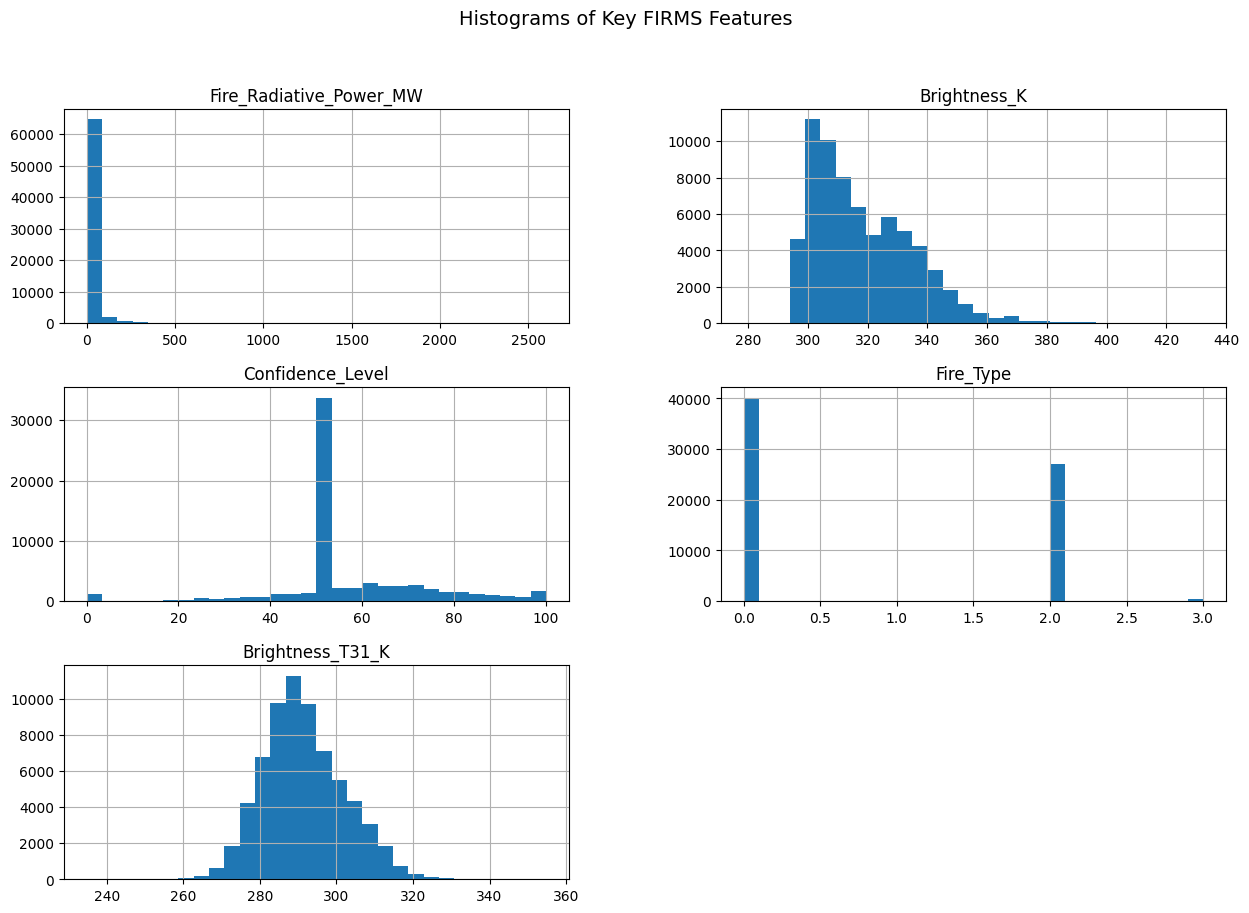

C:\Users\catar\AppData\Local\Temp\ipykernel_18140\2175232672.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



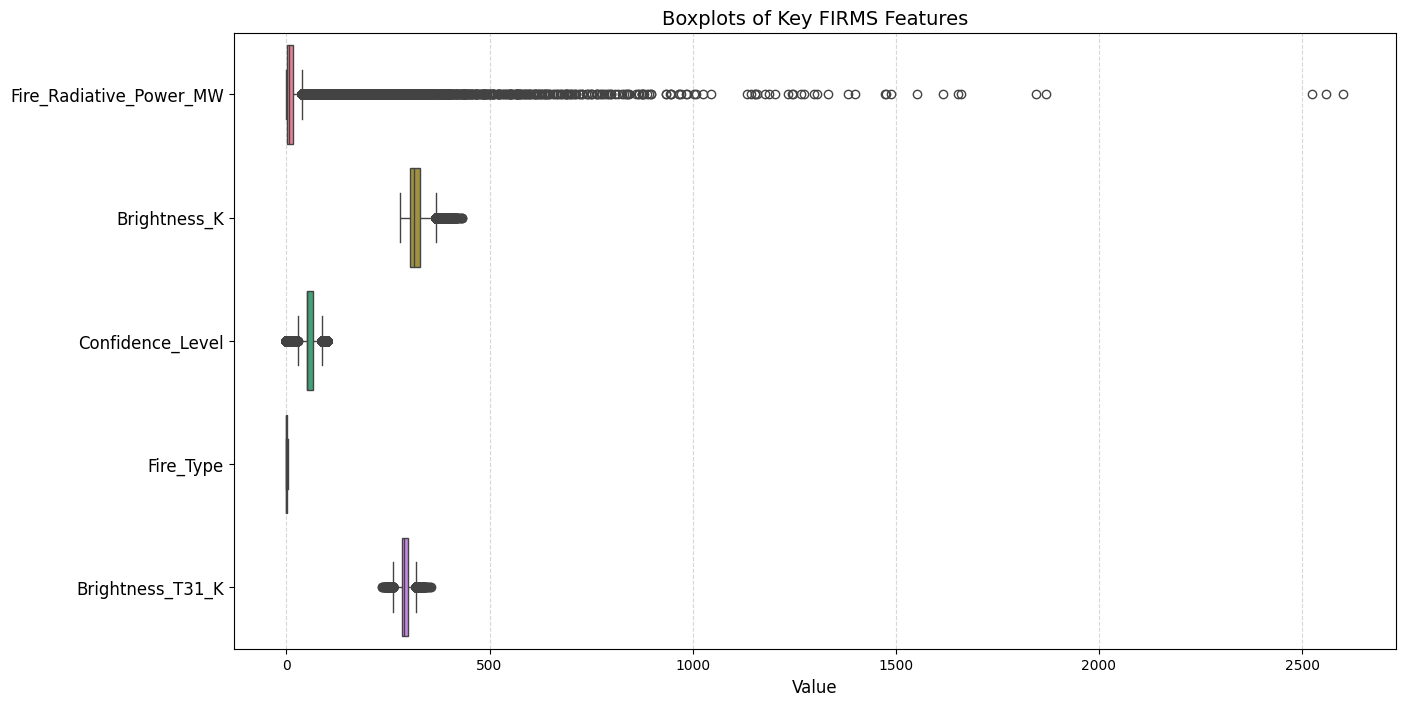

In [313]:
# Select a subset of key numerical features for visualization
fire_features = [
    "Fire_Radiative_Power_MW",
    "Brightness_K",
    "Confidence_Level",
    "Fire_Type",
    "Brightness_T31_K"]

# Convert to Pandas
df_pandas = FIRMS_dataset_w_country[fire_features]

# Create histograms to visualize distributions
df_pandas.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Key FIRMS Features", fontsize=14)
plt.show()

# Create boxplots to detect outliers

# Define colors for each feature
colors = sns.color_palette("husl", len(fire_features))

# Create a single figure with subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Create a colorful, horizontal boxplot
sns.boxplot(data=df_pandas, orient="h", palette=colors, ax=ax)

# Labels and formatting
ax.set_title("Boxplots of Key FIRMS Features", fontsize=14)
ax.set_xlabel("Value", fontsize=12)
ax.set_yticklabels(fire_features, fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

**Fire Radiative Power (MW)**

- Most of the data points are concentrated on the lower end of the scale
- This suggests that the majority of detected fires are of relatively low power, with a small number showing extreme energy levels - something to explore at a later stage.
**
**Brightness (K)**

- The brightest data points are mostly between 300K and 350K, with the peak at around 300k and showing a downward slope.
- Only a few fire records have a brightness above 400K, which suggests that extremely intense fires are rare.

**Confidence Level Distribution**

- There is a large spike around 60% and 100%, which indicates that many fire detections are medium or high confidence level - this indicates that the data appears reliable.

**Fire Type Distribution**

- The vast majority of recorded fires belong to type 0 (Presumed Vegetation Fires)
- There is another cluster at fire type 2, which is the Other Static Land Source, understandable as covering a wide area - might capture city fires, agricultural burnings, etc.

**Brightness T31 (K) Distribution**

- This follows a normal distribution centered around 290K, similar to the Brightness_K.
- The spread is slightly less skewed compared to Fire Radiative Power, and similar to Brightness_K

**Summary**

Most fires detected are of low radiative power.
The majority of fires fall within the Brightness range of 300K and 350K.
Confidence in detection is mostly high or moderate, indicating a potentially trustworthy dataset.
Fire types appear to be dominated by two categories.
No outliers detected at this stage.



#### Copernicus (Climate) Data Distribution

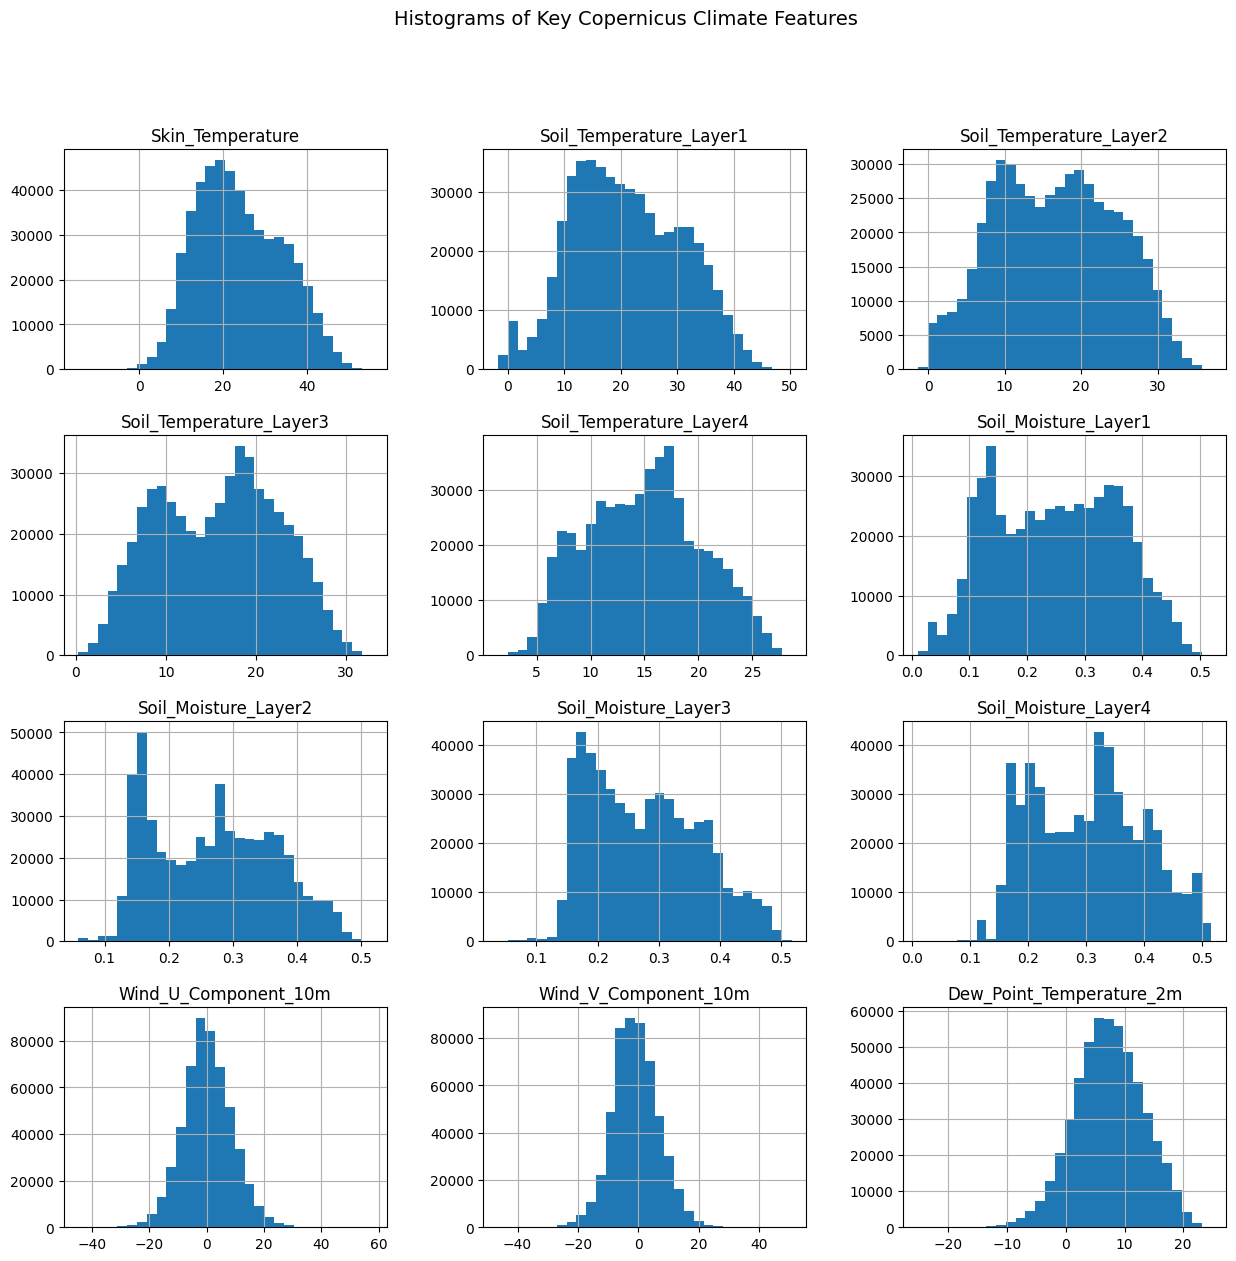

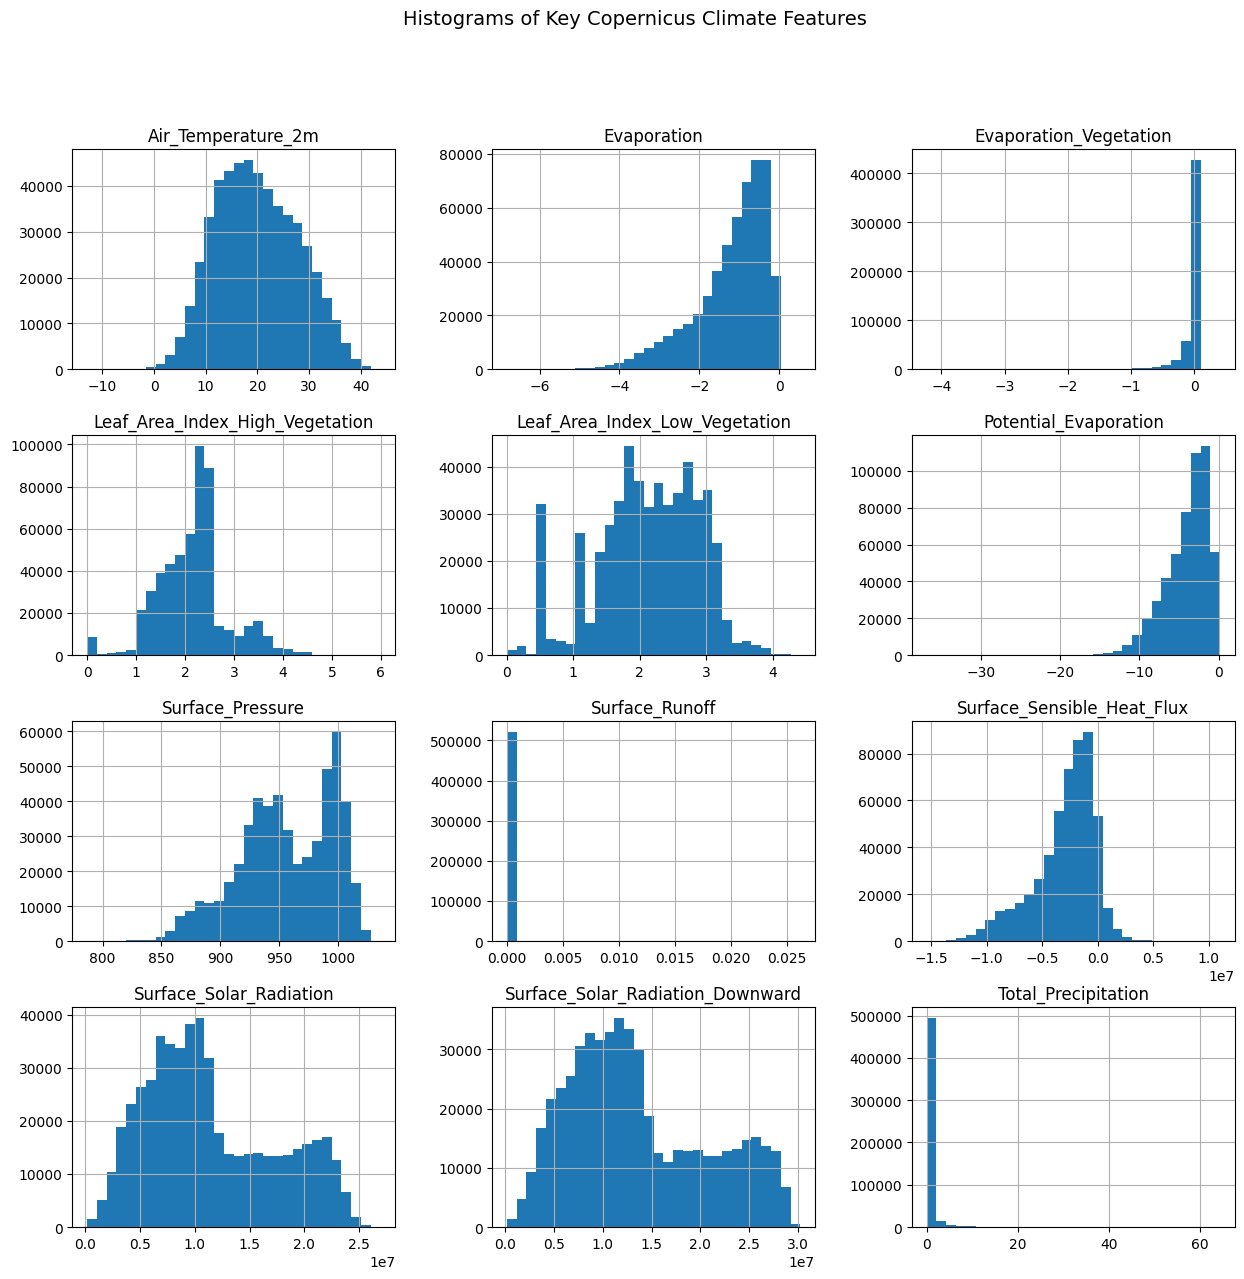

In [314]:
# Select a subset of key numerical features for visualization
weather_features1 = [
    "Skin_Temperature",
    "Soil_Temperature_Layer1",
    "Soil_Temperature_Layer2",
    "Soil_Temperature_Layer3",
    "Soil_Temperature_Layer4",
    "Soil_Moisture_Layer1",
    "Soil_Moisture_Layer2",
    "Soil_Moisture_Layer3",
    "Soil_Moisture_Layer4",
    "Wind_U_Component_10m",
    "Wind_V_Component_10m",
    "Dew_Point_Temperature_2m"
    ]

# Select a subset of key numerical features for visualization
weather_features2 = [
    "Air_Temperature_2m",
    "Evaporation",
    "Evaporation_Vegetation",
    "Leaf_Area_Index_High_Vegetation",
    "Leaf_Area_Index_Low_Vegetation",
    "Potential_Evaporation",
    "Surface_Pressure",
    "Surface_Runoff",
    "Surface_Sensible_Heat_Flux",
    "Surface_Solar_Radiation",
    "Surface_Solar_Radiation_Downward",
    "Total_Precipitation"]


# Convert to Pandas
df_pandas1 = dataset_with_fire_and_climate_variables[weather_features1]#.compute()
df_pandas2 = dataset_with_fire_and_climate_variables[weather_features2]#.#compute()

# Create histograms to visualize distributions
df_pandas1.hist(figsize=(15, 14), bins=30)
plt.suptitle("Histograms of Key Copernicus Climate Features", fontsize=14)
plt.show()

df_pandas2.hist(figsize=(15, 14), bins=30)
plt.suptitle("Histograms of Key Copernicus Climate Features", fontsize=14)
plt.show()


**Skin Temperature & Air Temperature (2m)**

- Follows a normal distribution, peaking around 20-30°C, suggesting a wide range of temperatures but warm conditions.
- Soil Temperature Layers (1-4)
- The deeper soil layers tend to have lower temperature, while the upper layers show broader distributions. This suggests that surface soil temperatures fluctuate more due to atmospheric conditions.

**Soil Moisture (Layers 1-4)**

The distributions show high concentrations at lower moisture levels, particularly in layers 1 and 2. This might indicate that the region had very low soil moisture. Exploring regional variations might be something to explore in the future.

**Wind U & V Components at 10m**

These follow a normal distribution centered around zero, which is expected, as wind speeds fluctuate a lot and have high variation.

**Dew Point Temperature at 2m**

Shows a normal distribution peaking around 5-15°C, aligned with humidity and condensation points in temperate climates.

**Evaporation & Potential Evaporation**

These distributions are skewed towards zero, indicating that evaporation was quite low.
There are some cases of negative values, possibly due to seasonal variation (dry vs. rainy periods).

**Surface Runoff**

Shows a large concentration of near-zero values, meaning the covered area was experiencing very low runoff.

**Leaf Area Index (High & Low Vegetation)**

The high vegetation index has a strong presence at around 3-4, indicating significant forested or highly vegetated areas, in greater concentration than low vegetation index, indicating that the areas covered have a bigger presence of high level vegetation (trees rather than bushes).

**Surface Pressure:**

Shows a bimodal distribution, likely due to seasonal or geographic variations (high-pressure vs. low-pressure zones).

**Solar Radiation (Total & Downward)**

These two distributions are very similar, peaking at mid-to-high values, indicating significant solar energy reaching the surface, which is relevant for fire risk analysis, and somewhat expected due to the region we are exploring.

**Total Precipitation**

The large spike at near-zero values suggests this region was experiencing low precipitation when fire events were recorded.

**Surface Sensible Heat Flux**

The majority of the distribution is below zero, indicating that the land surface was losing heat to the atmosphere at the time of most recorded fire events.

**Summary**

Soil moisture and temperature patterns suggest that surface layers fluctuate more, while deeper layers are more stable.
Wind and pressure behave as expected, with regional variations in pressure.
Evaporation and runoff data show that water retention was low in most areas at the time of the recorded fire event.
Solar radiation levels are high, reinforcing the importance of considering fire risks in dry areas.
Leaf Area Index trends suggest a mix of dense and sparse vegetation zones.
Precipitation and heat flux variability indicate that these regions are prone to extreme weather events.
Boxplots to reinforce the findings:


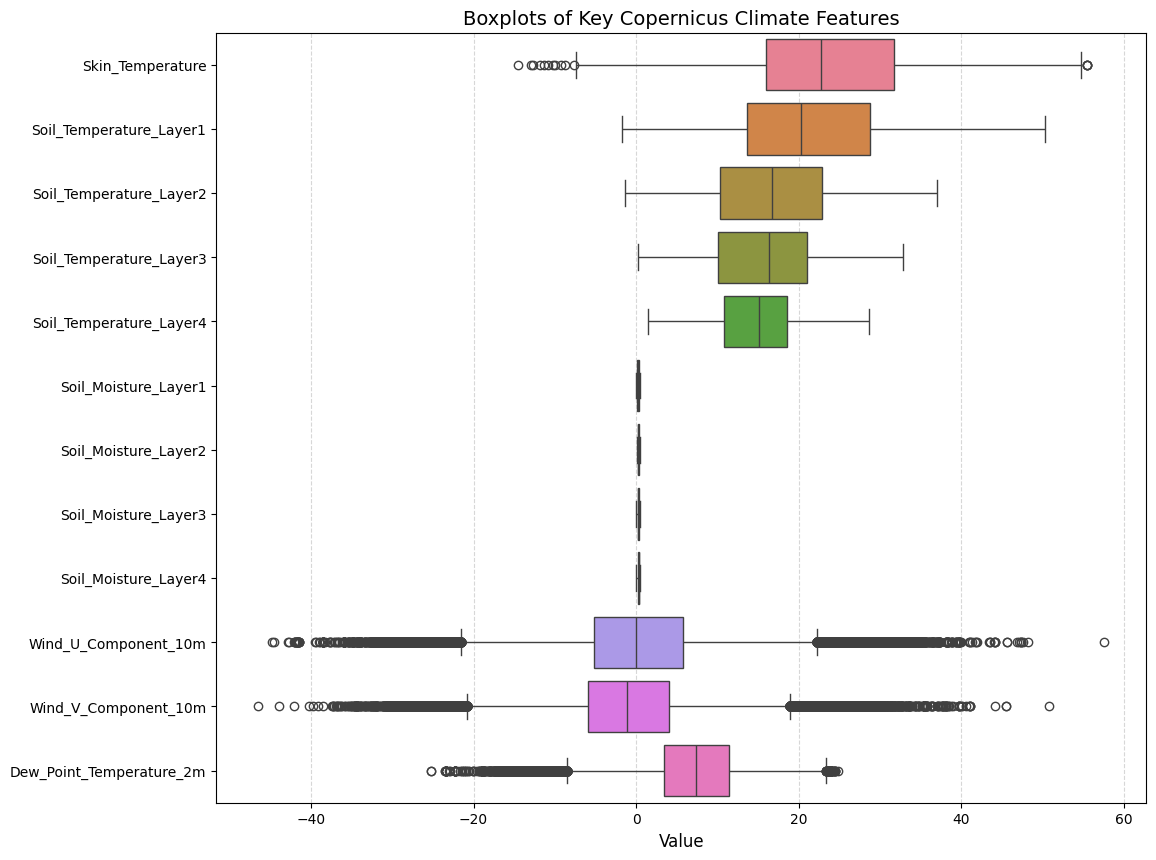

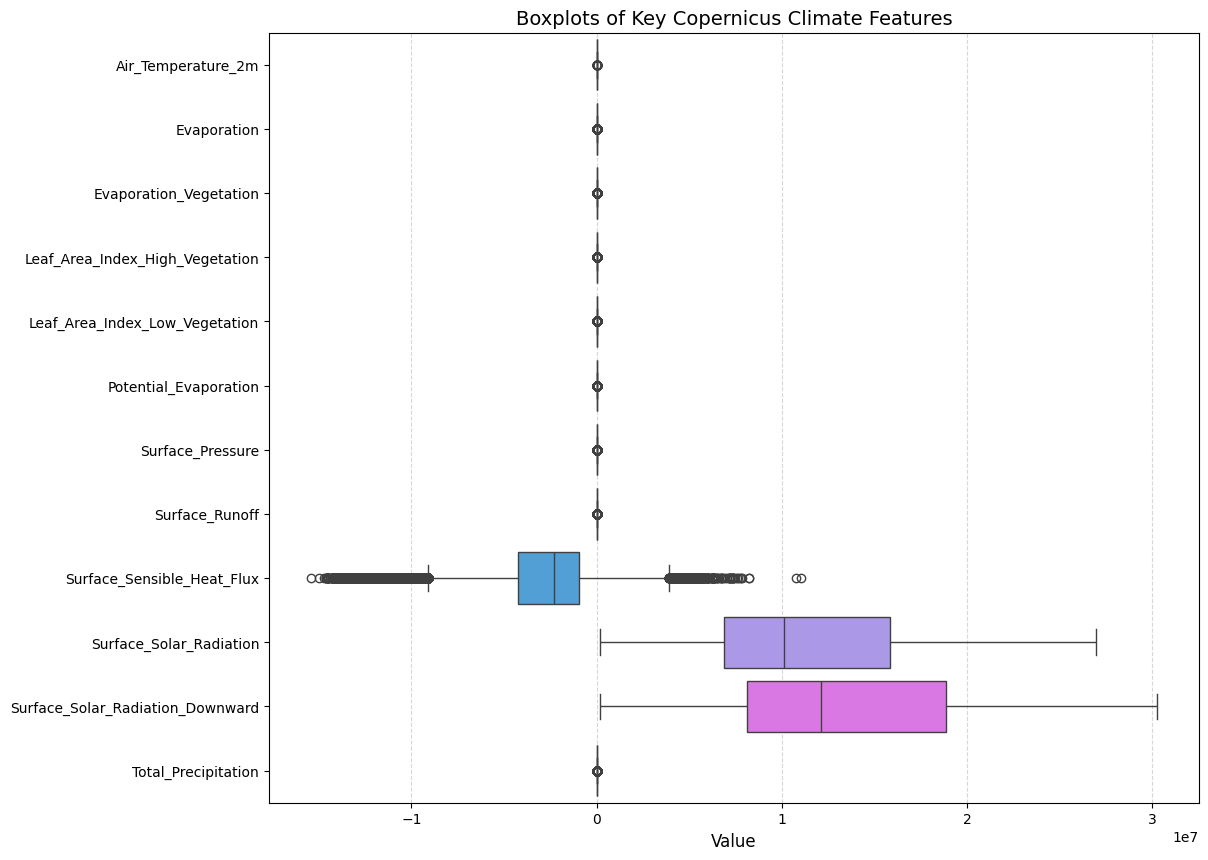

In [315]:
# Create boxplots to detect outliers

# Define colors for each feature
colors = sns.color_palette("husl", len(weather_features1))

# Create a single figure with subplots
fig, ax = plt.subplots(figsize=(12, 10))

# Create a colorful, horizontal boxplot
sns.boxplot(data=df_pandas1, orient="h", palette=colors, ax=ax)

# labels and formatting
ax.set_title("Boxplots of Key Copernicus Climate Features", fontsize=14)
ax.set_xlabel("Value", fontsize=12)
#ax.set_yticklabels(fire_features, fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

colors = sns.color_palette("husl", len(weather_features2))

# Create a single figure with subplots
fig, ax = plt.subplots(figsize=(12, 10))

# Create a colorful, horizontal boxplot
sns.boxplot(data=df_pandas2, orient="h", palette=colors, ax=ax)

# labels and formatting
ax.set_title("Boxplots of Key Copernicus Climate Features", fontsize=14)
ax.set_xlabel("Value", fontsize=12)
#ax.set_yticklabels(fire_features, fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

## Outliers

### Identified Outliers:

**Skin Temperature**  
  - Extreme high values deviate significantly from the rest.  
  - Likely represents real heatwaves, crucial for fire risk modeling.  

**Wind Components (U & V at 10m)**  
  - Substantial outliers in both negative and positive directions.  
  - Strong wind gusts drive fire spread; removing them weakens predictions.  

- **Dew Point Temperature (2m)**  
  - Negative outliers indicate extremely dry conditions.  
  - Low dew points contribute to increased fire risk.  

- **Sensible Heat Flux**  
  - Outliers indicate areas that absorb too much heat.  
  - Important for understanding how vegetation and soil dry over time.  


**Why Should We Keep These Outliers?**  

- **Fire Occurrence is an Extreme Event**  
  - Wildfires are driven by unusual, extreme climate conditions.  
  - Removing these data points could underestimate fire risk in high-danger situations.  

- **Non-Normal Distributions**  
  - Climate variables are often skewed, and apparent "outliers" may be meaningful.  

- **Real-World Phenomena**  
  - Many outliers correspond to droughts, heatwaves, and strong winds—key fire drivers.  

**Handling Approaches:**  

- **Feature Engineering**  
  - Binning extreme values into categories for better interpretability.  

- **Weighted Modeling**  
  - Assigning higher importance to extreme events in predictions.  

- **Robust Algorithms**  
  - Using models that naturally handle outliers (e.g., tree-based models, neural networks with dropout regularization).

### FIRMS Specific Exploratory Analysis

#### Iberian FIRMS Data Analysis (with country breakdown where relevant)

In [316]:
FIRMS_dataset_w_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67791 entries, 1504674 to 444877
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype               
---  ------                   --------------  -----               
 0   Latitude_1d              67791 non-null  float64             
 1   Longitude_1d             67791 non-null  float64             
 2   Date                     67791 non-null  date32[day][pyarrow]
 3   Time                     67791 non-null  float64             
 4   Fire_Radiative_Power_MW  67791 non-null  float64             
 5   Brightness_K             67791 non-null  float64             
 6   Confidence_Level         67791 non-null  float64             
 7   Track_Width_km           67791 non-null  float64             
 8   Fire_Type                67791 non-null  float64             
 9   Brightness_T31_K         67791 non-null  float64             
 10  Scan_Width_km            67791 non-null  float64             
 11  Satellite    

In [317]:
FIRMS_dataset_w_country.head()

Latitude_1d  Longitude_1d        Date    Time  \
1504674         27.6         -18.0  2018-10-12  1511.0   
1504675         27.6         -18.0  2021-08-01  1511.0   
1504676         27.7         -18.2  2017-08-18   306.0   
1504677         27.7         -18.2  2021-05-15   253.0   
1504678         27.7         -18.1  2002-06-12  1149.0   

         Fire_Radiative_Power_MW  Brightness_K  Confidence_Level  \
1504674                    66.00        313.10              41.0   
1504675                    62.50        312.80              25.0   
1504676                     2.16        302.64              50.0   
1504677                     1.08        315.54              50.0   
1504678                    18.18        318.22              52.8   

         Track_Width_km  Fire_Type  Brightness_T31_K  Scan_Width_km Satellite  \
1504674            1.80        3.0            301.80           3.70      Aqua   
1504675            1.80        3.0            301.60           3.70      Aqua   
1504676            0.38        0.0            292.50           0.42         N   
1504677            0.36        0.0            289.58           0.39         N   
1504678            1.10        3.0            307.60           1.20     Terra   

        Day_Night  Dataset_Version Instrument Country  
1504674         D             6.03      MODIS   Spain  
1504675         D             6.03      MODIS   Spain  
1504676         N             2.00      VIIRS   Spain  
1504677         N             2.00      VIIRS   Spain  
1504678         D             6.03      MODIS   Spain

#### Iberian FIRMS Fire Count over the Years (Heatmap included)

This graph demonstrates the total number of fires in the dataset over the entire time period (all Fire Types, all Confidence Levels)

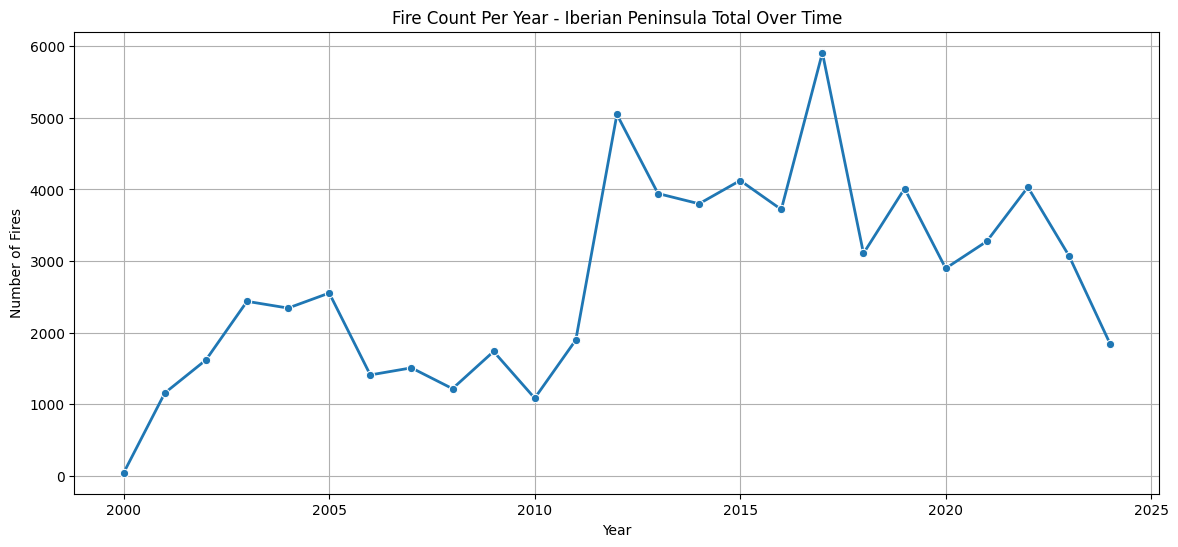

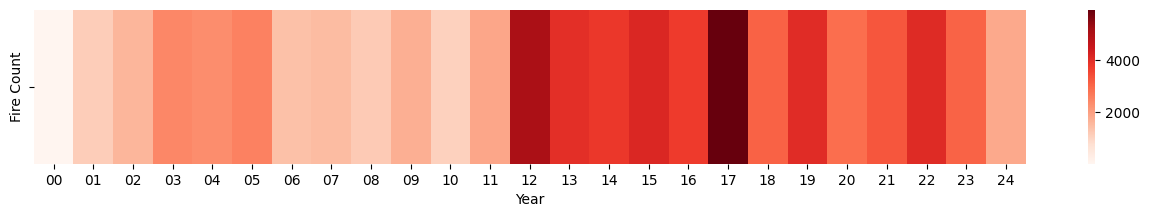

In [318]:
# Ensure Date column is in datetime format (Dask-compatible)
FIRMS_dataset_w_country["Date"] = pd.to_datetime(FIRMS_dataset_w_country["Date"], errors="coerce")

# Extract year
FIRMS_dataset_w_country["year"] = FIRMS_dataset_w_country["Date"].dt.year

# Compute fire counts per year
fires_per_year = FIRMS_dataset_w_country["year"].value_counts().sort_index()#.compute().sort_index()
fires_per_year = fires_per_year.to_frame(name="fire_count")  # Convert to Pandas DataFrame

# Plot Fire Trends Over Years
plt.figure(figsize=(14, 6))
sns.lineplot(x=fires_per_year.index, y=fires_per_year["fire_count"], marker="o", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Fire Count Per Year - Iberian Peninsula Total Over Time")
plt.grid(True)

# Heatmap of Fire Count Per Year
years = fires_per_year.index.astype(str)  # Convert years to string for better heatmap labeling
fires = fires_per_year["fire_count"].values.reshape(1, -1)

# Modify x-axis labels to show only last 2 digits of year
years = [str(year)[-2:] for year in fires_per_year.index]  # Convert to last 2 digits

plt.figure(figsize=(16, 2))  # Wider figure for readability
sns.heatmap(fires, fmt="d", cmap="Reds", xticklabels=years, yticklabels=["Fire Count"], cbar=True)
plt.xlabel("Year")

plt.show()



In [319]:
FIRMS_dataset_w_country.columns

Index(['Latitude_1d', 'Longitude_1d', 'Date', 'Time',
       'Fire_Radiative_Power_MW', 'Brightness_K', 'Confidence_Level',
       'Track_Width_km', 'Fire_Type', 'Brightness_T31_K', 'Scan_Width_km',
       'Satellite', 'Day_Night', 'Dataset_Version', 'Instrument', 'Country',
       'year'],
      dtype='object')

The fire count fluctuates significantly year by year, with some years experiencing higher peaks.

The highest peaks in fire count occurred around 2012, 2017, and 2022, indicating particularly bad fire seasons.

The lowest fire count levels were observed in the early 2000s, suggesting that fire frequency has become more extreme in recent years.

The heatmap confirms these trends, highlighting periods of more intense wildfire activity.


#### Country Specific FIRMS Fire Count over the Years (Heatmap included)

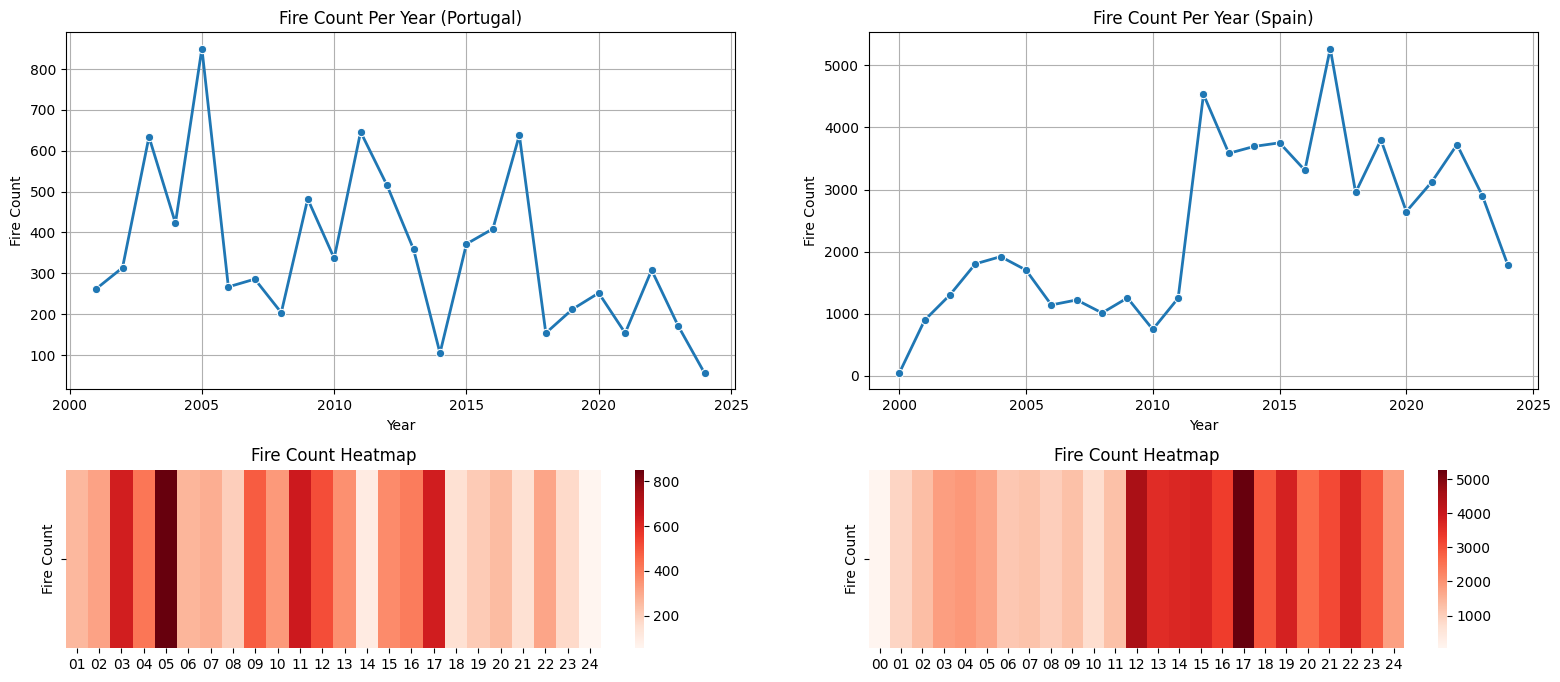

In [320]:
# Compute fire counts per year

Portugal_fire_count = FIRMS_dataset_w_country[FIRMS_dataset_w_country['Country'] == 'Portugal']
Portugal_fire_count = Portugal_fire_count["year"].value_counts().sort_index()#.compute().sort_index()
Portugal_fire_count = Portugal_fire_count.to_frame(name="Portugal_fire_count")  # Convert to Pandas DataFrame

Spain_fire_count = FIRMS_dataset_w_country[FIRMS_dataset_w_country['Country'] == 'Spain']
Spain_fire_count = Spain_fire_count["year"].value_counts().sort_index()#.compute().sort_index()
Spain_fire_count = Spain_fire_count.to_frame(name="Spain_fire_count")  # Convert to Pandas DataFrame

# Create a 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(19, 8), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 2 columns

# Adjust layout spacing for clarity
plt.subplots_adjust(hspace=0.3, wspace=0.2)

sns.lineplot(x=Portugal_fire_count.index, y=Portugal_fire_count["Portugal_fire_count"], marker="o", linewidth=2, ax=axes[0, 0])
axes[0, 0].set_title("Fire Count Per Year (Portugal)")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Fire Count")
axes[0, 0].grid(True)

sns.lineplot(x=Spain_fire_count.index, y=Spain_fire_count["Spain_fire_count"], marker="o", linewidth=2, ax=axes[0, 1])
axes[0, 1].set_title("Fire Count Per Year (Spain)")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Fire Count")
axes[0, 1].grid(True)


years = [str(year)[-2:] for year in Portugal_fire_count.index]  # Last 2 digits
fires = Portugal_fire_count["Portugal_fire_count"].values.reshape(1, -1)
sns.heatmap(fires, fmt="d", cmap="Reds", xticklabels=years, yticklabels=["Fire Count"], cbar=True, ax=axes[1, 0])
axes[1, 0].set_title("Fire Count Heatmap")

years = [str(year)[-2:] for year in Spain_fire_count.index]  # Last 2 digits
fires = Spain_fire_count["Spain_fire_count"].values.reshape(1, -1)
sns.heatmap(fires, fmt="d", cmap="Reds", xticklabels=years, yticklabels=["Fire Count"], cbar=True, ax=axes[1, 1])
axes[1, 1].set_title("Fire Count Heatmap")


# Show the grid of graphs
plt.show()



##### Portugal vs. Spain Wildfire Trends

**Portugal:**
- Wildfire numbers are generally lower than in Spain, possibly due to the smaller country area.
- Large spikes occurred in the early 2000s, 2013, and 2017, with the most extreme fire season around 2017, when it had one of the worst fire incidents in recent times, resulting in ***66 deaths and 204 injured people***.
- After 2017, fire activity decreased but remained sporadic.
- Portugal seems to have more variability in fire count, with some years having very low numbers and others having extreme peaks—might be related to burned landscapes (which would prevent repeated fires in one location until vegetation regrew).

**Spain:**

- Spain experiences a much higher total number of fires than Portugal, sometimes exceeding 100,000 fires per year, but then again, it has a much higher surface area.
- Extreme peaks occurred around 2012, 2017, and 2022, similar to Portugal but on a larger scale.
- Unlike Portugal, where some years have very few fires, Spain seems to have consistently high fire activity across most years.
- The fire heatmap for Spain shows intense wildfire seasons happening frequently, particularly in the past 15 years.

#### Summary:

- Fire activity in both countries peaked in similar periods (2012, 2017, 2022), indicating that regional climatic or environmental factors are driving fire trends.
- 2017 stands out as a particularly extreme wildfire season for both Portugal and Spain, aligning with known severe wildfire events in both countries.
- The trend appears cyclical, with fire seasons occurring in waves rather than a steady increase.
- The recent peak in 2022 suggests that wildfires are still a major issue.
- Climate factors such as rising temperatures, drought, and extreme weather could be contributing to these trends.


#### Fire Density per Country Area

The below chart demonstrates the different fire densities observed over each country (All Fire Types, All Confidence Levels). Country areas were sourced from the internet and made sure to include the island territories.

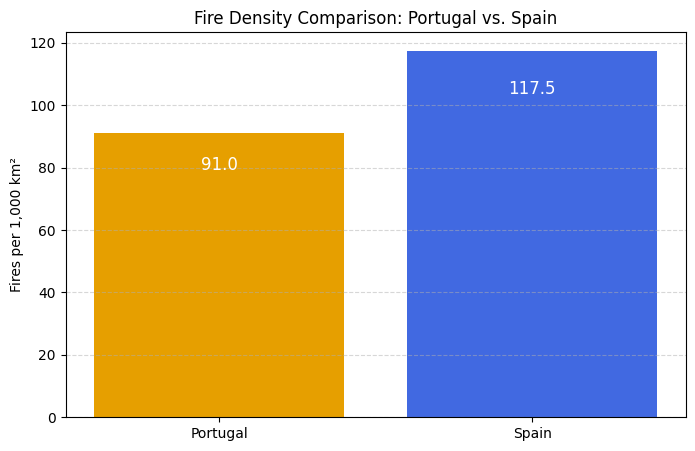

In [321]:
fire_counts = FIRMS_dataset_w_country.groupby("Country")["Confidence_Level"].count()#.compute()

# Define land area (km²) for Portugal & Spain
land_area = {"Portugal": 92391, "Spain": 505370}

# Compute fires per 1,000 km²
fires_per_1000_km2 = {country: fire_counts.get(country, 0) / (land_area[country] / 1000) for country in land_area.keys()}

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(fires_per_1000_km2.keys(), fires_per_1000_km2.values(), color=["#E69F00", "royalblue"])
plt.ylabel("Fires per 1,000 km²")
plt.title("Fire Density Comparison: Portugal vs. Spain")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show values inside bars with better spacing
for i, (country, value) in enumerate(fires_per_1000_km2.items()):
    plt.text(i, value * 0.92,  # Move text inside the bar (15% below the top)
             f"{value:.1f}",
             ha="center",
             fontsize=12,
             va="top",  # Align text downwards inside the bar
             color="white")  # Keep contrast for visibility

plt.show()

Spain has a higher fire density (1,935.6 fires per 1,000 km²) compared to Portugal (1,614.6 fires per 1,000 km²).

This indicates that Spain experiences more fires relative to its size than Portugal. Even though Spain has a higher density, Portugal’s fire density is also very high.

Spain, with its larger area, may need more extensive fire response infrastructure, while Portugal, being smaller, may be better off to invest in fire prevention strategies.


#### Average Fire Radiative Power and Brightness Temperature per Country

0.0
2601.4666666666667


C:\Users\catar\AppData\Local\Temp\ipykernel_18140\3657106013.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\catar\AppData\Local\Temp\ipykernel_18140\3657106013.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



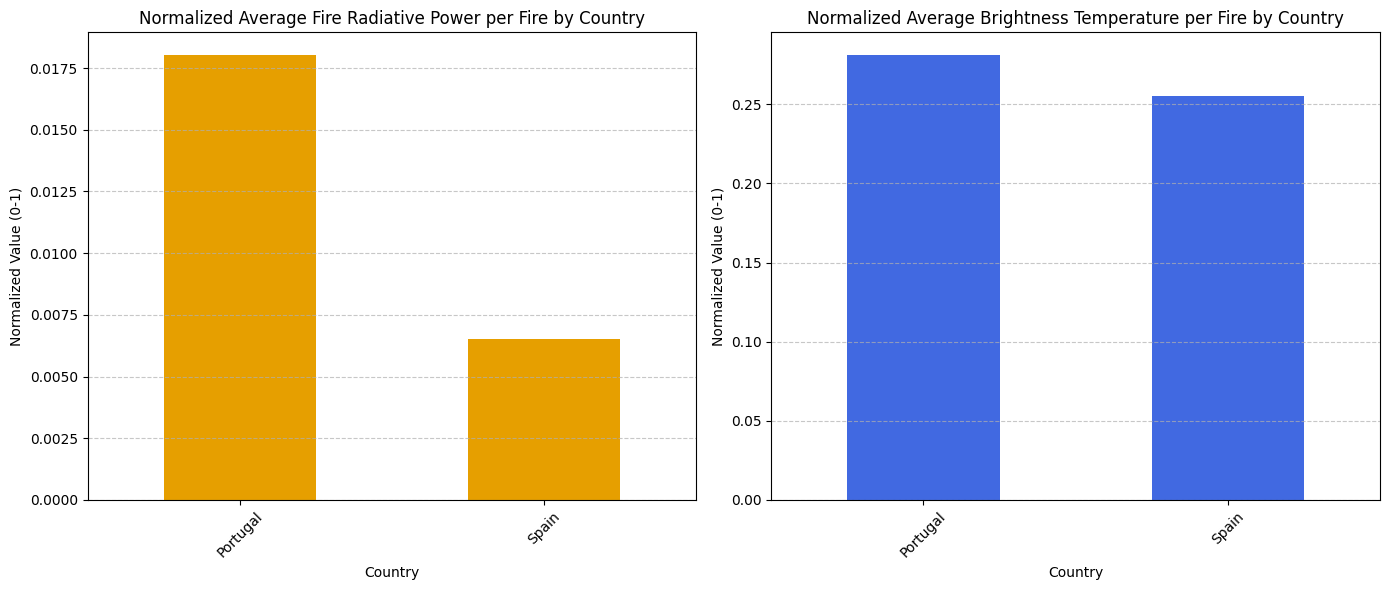

In [322]:
# Convert Dask DataFrame to Pandas (if necessary)
df_fire_for_intensity = FIRMS_dataset_w_country[["Fire_Radiative_Power_MW", "Brightness_K", "Country"]]#.compute()

# Print Min/Max for debugging
print(df_fire_for_intensity["Fire_Radiative_Power_MW"].min())
print(df_fire_for_intensity["Fire_Radiative_Power_MW"].max())

# Normalize Fire Radiative Power separately
scaler_FRP = MinMaxScaler()
df_fire_for_intensity["Fire_Radiative_Power_MW"] = scaler_FRP.fit_transform(df_fire_for_intensity[["Fire_Radiative_Power_MW"]].values)

# Normalize Brightness_K separately
scaler_Brightness = MinMaxScaler()
df_fire_for_intensity["Brightness_K"] = scaler_Brightness.fit_transform(df_fire_for_intensity[["Brightness_K"]].values)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1]})
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust layout spacing

# Compute the average of the normalized values per country
normalized_avg_by_country = df_fire_for_intensity.groupby("Country")[["Fire_Radiative_Power_MW", "Brightness_K"]].mean()

# Separate metrics for individual plotting
normalized_avg_Radiative_Power = normalized_avg_by_country["Fire_Radiative_Power_MW"]
normalized_avg_Brightness = normalized_avg_by_country["Brightness_K"]

# Plot Fire Radiative Power (First subplot)
normalized_avg_Radiative_Power.plot(kind="bar", ax=axes[0], color="#E69F00")
axes[0].set_title("Normalized Average Fire Radiative Power per Fire by Country")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Normalized Value (0-1)")
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Plot Brightness Temperature (Second subplot)
normalized_avg_Brightness.plot(kind="bar", ax=axes[1], color="royalblue")
axes[1].set_title("Normalized Average Brightness Temperature per Fire by Country")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Normalized Value (0-1)")
axes[1].tick_params(axis="x", rotation=45)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


**Fire Radiative Power per Fire (Left Chart)**  

- Portugal has significantly higher average Fire Radiative Power (FRP) per fire compared to Spain. This suggests that fires in Portugal tend to produce more energy/power. Possible explanations:  
- **Drier conditions** or more combustible vegetation in Portugal.  
- **Higher wind speeds** or flammable vegetation leading to more intense fire spread.  
- **Differences in fire management policies** or suppression strategies.  

**Brightness Temperature per Fire (Right Chart)**  

- Brightness temperature measures the thermal intensity of the fire, often linked to flame temperature.  
- Portugal and Spain have similar Brightness Temperature values per fire, with Portugal slightly higher. The similarity suggests that the physical temperature of fires is comparable in both countries, even though Portugal’s fires are releasing more energy overall.  

#### Summary  

- While fire activity in Spain is more frequent (as seen in previous graphs), Portugal's fires appear to be more destructive due to the higher energy output.**  
- Spain may need more fire detection and early suppression due to the sheer number of fires.  
- Portugal may require better land management and firebreaks to reduce fire intensity.  


#### Confidence Levels Distribution

The below graph shows the distribution of confidence levels in the dataset, so we can understand the reliability of each record as per FIRMS standards.

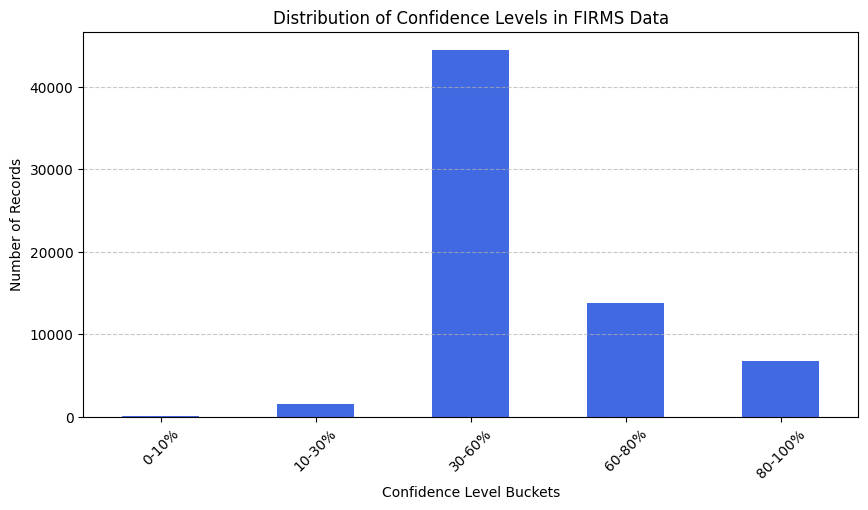

In [323]:
# Compute value counts before plotting (convert to Pandas)
confidence_levels = FIRMS_dataset_w_country['Confidence_Level']#.compute()

# Define bins for confidence levels
bins = [0, 10, 30, 60, 80, 100]  # Adjust bucket ranges as needed
labels = ["0-10%", "10-30%", "30-60%", "60-80%", "80-100%"]

# Create binned categories
confidence_levels_binned = pd.cut(confidence_levels, bins=bins, labels=labels, right=True)

# Compute the count per bin
confidence_binned_counts = confidence_levels_binned.value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
confidence_binned_counts.plot(kind='bar', color='royalblue')
plt.xlabel("Confidence Level Buckets")
plt.ylabel("Number of Records")
plt.title("Distribution of Confidence Levels in FIRMS Data")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


- 71.7% of all fires in the Iberian Peninsula are classified as presumed vegetation fires.  
- 27.8% are classified as "Other Static Land Source".  
- Offshore and active volcano fires are extremely rare, comprising less than 0.5% of all records, possibly influenced by the island territories.  
- Both Spain and Portugal show that most fire activity is related to vegetation fires, reinforcing concerns about climate change, drought, and land management.  
- The increase in vegetation fires since 2012 suggests worsening wildfire conditions, potentially due to rising temperatures and drier conditions.  
- The blue bars (representing "Other Static Land Source" fires) are more frequent in Spain than in Portugal.  
- This suggests that Spain has more complex fire causes, possibly related to industrial, agricultural, or energy-related activities.  

#### Summary  
- Vegetation fires dominate the Iberian Peninsula, making them the primary fire risk.  
- "Other Static Land Source" fires are more common in Spain, suggesting different fire causes beyond vegetation.  


#### Iberian FIRMS Fire Types Distribution over Time

The below chart shows the proportion of fire types over time - Pie chart shows the overall proportion for the entire time period

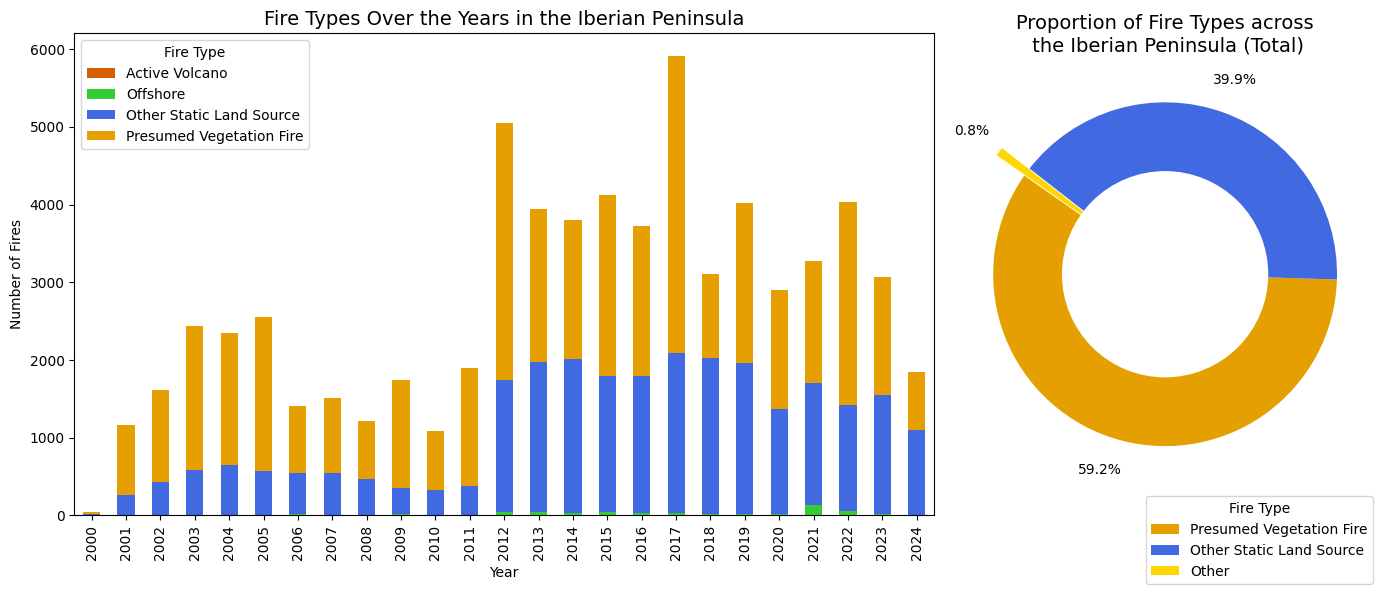

In [324]:
# Fire Type Mapping Dictionary
fire_type_dict = {
    0: "Presumed Vegetation Fire",
    1: "Active Volcano",
    2: "Other Static Land Source",
    3: "Offshore"
}

# Define consistent colors for both charts
color_mapping = {
    "Presumed Vegetation Fire": "#E69F00",  # Orange
    "Other Static Land Source": 'royalblue',#"#0072B2",  # Dark Blue
    "Active Volcano": "#D55E00",  # Red
    "Offshore": "#32CD32",  # Purple
    "Other": "#FFD700"  # Light Blue for grouped categories
}

# Fire Type Data for Pie Chart
fire_counts_per_type = FIRMS_dataset_w_country['Fire_Type'].value_counts()#.compute()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# Stacked Bar Chart Data Preparation
df_yearly_fire_type = FIRMS_dataset_w_country.groupby(['year', 'Fire_Type']).size().reset_index(name='Count')
# .compute().reset_index(name='Count')

# Replace numeric Fire_Type with descriptions
df_yearly_fire_type['Fire_Type'] = df_yearly_fire_type['Fire_Type'].map(fire_type_dict)

# Pivot for stacked bar chart
#df_pivot = df_yearly_fire_type.pivot(index="year", columns="Fire_Type", values="Count").fillna(0)
df_pivot = df_yearly_fire_type.pivot_table(index="year", columns="Fire_Type", values="Count", aggfunc="sum").fillna(0)


# Stacked Bar Chart (Left)
df_pivot.plot(kind="bar", stacked=True, ax=axes[0], color=[color_mapping[col] for col in df_pivot.columns])
axes[0].set_title("Fire Types Over the Years in the Iberian Peninsula", fontsize=14)
axes[0].set_ylabel("Number of Fires")
axes[0].set_xlabel("Year")
axes[0].legend(title="Fire Type", loc="upper left")

# Pie Chart (Right)
# Define a threshold (e.g., categories with < 5% will be grouped)
threshold = 0.05 * fire_counts_per_type.sum()

# Separate major and minor categories
major_fire_counts = fire_counts_per_type[fire_counts_per_type >= threshold]
minor_fire_counts = fire_counts_per_type[fire_counts_per_type < threshold]

# Sum small categories into "Other"
if not minor_fire_counts.empty:
    major_fire_counts["Other"] = minor_fire_counts.sum()

# Map only the major category labels
fire_labels = [fire_type_dict[i] if i in fire_type_dict else "Other" for i in major_fire_counts.index]

# Use consistent colors for Pie Chart
pie_colors = [color_mapping[label] for label in fire_labels]

# Plot Pie Chart
wedges, texts, autotexts = axes[1].pie(
    major_fire_counts,
    autopct='%1.1f%%',
    startangle=145,
    colors=pie_colors,
    explode=[0, 0, 0.2],#explode_values,
    pctdistance=1.2
)

# Convert to Donut Chart by Adding a White Circle in the Center
centre_circle = plt.Circle((0, 0), 0.60, fc='white')  # Creates the hole
axes[1].add_artist(centre_circle)

# Add Legend for Pie Chart
axes[1].legend(wedges, fire_labels, title="Fire Type", bbox_to_anchor=(1.0, 0.0))

# Set Pie Chart Title
axes[1].set_title("Proportion of Fire Types across\n the Iberian Peninsula (Total)", fontsize=14)

# Adjust Layout
plt.tight_layout()
plt.show()


#### Portugal and Spain FIRMS Fire Types Distribution over Time

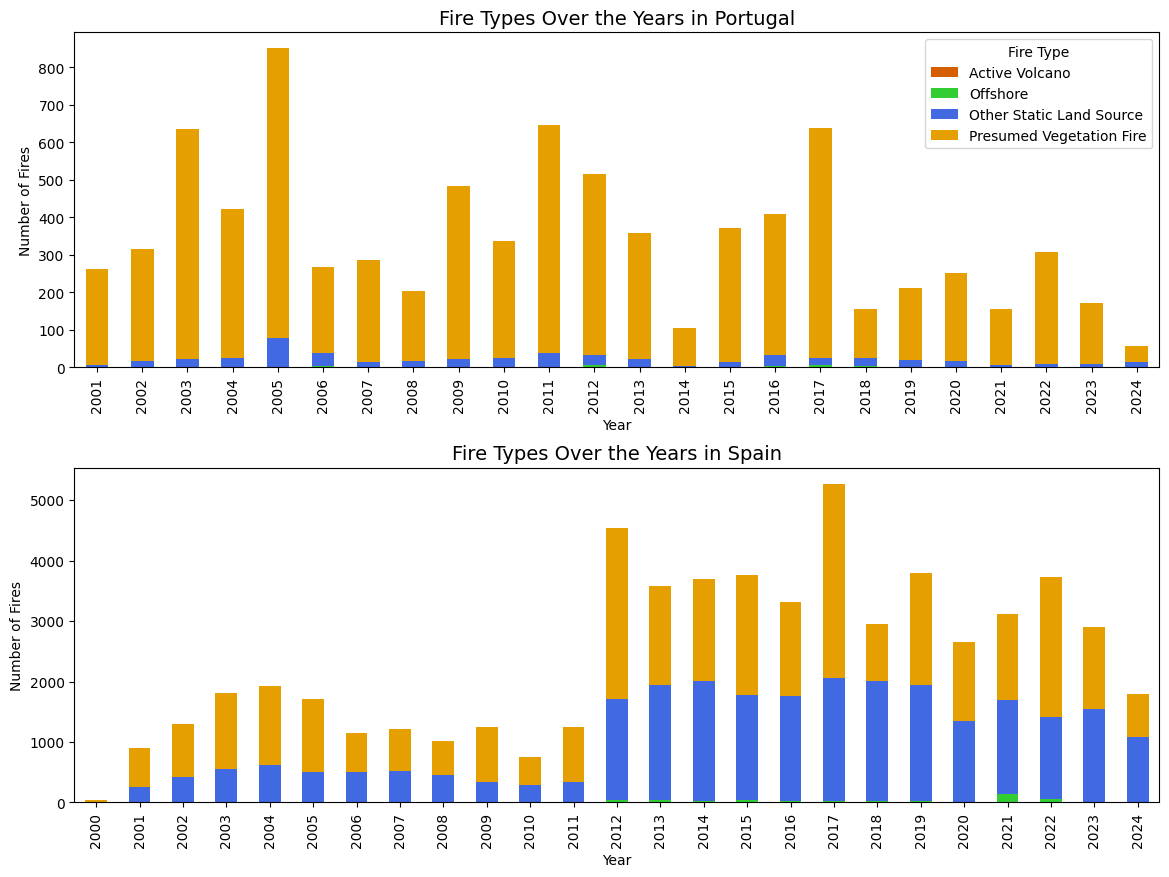

In [325]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
# Adjust layout spacing for clarity
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# Stacked Bar Chart Data Preparation
df_yearly_type_by_country = FIRMS_dataset_w_country.groupby(['Country', 'year', 'Fire_Type']).size().reset_index(name='Count')#.compute().reset_index(name='Count')

df_yearly_type_Portugal = df_yearly_type_by_country[df_yearly_type_by_country['Country'] == 'Portugal'].copy()
df_yearly_type_Spain = df_yearly_type_by_country[df_yearly_type_by_country['Country'] == 'Spain'].copy()

# Replace numeric Fire_Type with descriptions
df_yearly_type_Portugal['Fire_Type'] = df_yearly_type_Portugal['Fire_Type'].map(fire_type_dict)

# Pivot for stacked bar chart
df_pivot_portugal = df_yearly_type_Portugal.pivot(index="year", columns="Fire_Type", values="Count").fillna(0)

# Stacked Bar Chart (Top)
df_pivot_portugal.plot(kind="bar", stacked=True, ax=axes[0], color=[color_mapping[col] for col in df_pivot.columns])
axes[0].set_title("Fire Types Over the Years in Portugal", fontsize=14)
axes[0].set_ylabel("Number of Fires")
axes[0].set_xlabel("Year")
axes[0].legend(title="Fire Type", loc="upper right")

# Replace numeric Fire_Type with descriptions
df_yearly_type_Spain['Fire_Type'] = df_yearly_type_Spain['Fire_Type'].map(fire_type_dict)

# Pivot for stacked bar chart
df_pivot_spain = df_yearly_type_Spain.pivot(index="year", columns="Fire_Type", values="Count").fillna(0)

# Stacked Bar Chart (Bottom)
df_pivot_spain.plot(kind="bar", stacked=True, ax=axes[1], color=[color_mapping[col] for col in df_pivot.columns])
axes[1].set_title("Fire Types Over the Years in Spain", fontsize=14)
axes[1].set_ylabel("Number of Fires")
axes[1].set_xlabel("Year")
axes[1].legend().set_visible(False)

plt.show()






- 59.2% of all fires in the Iberian Peninsula are classified as presumed vegetation fires.  
- 39.9% are classified as "Other Static Land Source".  
- Offshore and active volcano fires are extremely rare, comprising less than 0.8% of all records, possibly influenced by the island territories.  
- Both Spain and Portugal show that most fire activity is related to vegetation fires, reinforcing concerns about climate change, drought, and land management.  
- The increase in vegetation fires since 2012 suggests worsening wildfire conditions, potentially due to rising temperatures and drier conditions.  
- The blue bars (representing "Other Static Land Source" fires) are more frequent in Spain than in Portugal.  
- This suggests that Spain has more complex fire causes, possibly related to industrial, agricultural, or energy-related activities.  

#### Summary  
- Vegetation fires dominate the Iberian Peninsula, making them the primary fire risk.  
- "Other Static Land Source" fires are more common in Spain, suggesting different fire causes beyond vegetation.  


#### Correlation between Fire Radiative Power and Brightness Correlation

In [326]:
FIRMS_dataset_w_country.head()

Latitude_1d  Longitude_1d       Date    Time  \
1504674         27.6         -18.0 2018-10-12  1511.0   
1504675         27.6         -18.0 2021-08-01  1511.0   
1504676         27.7         -18.2 2017-08-18   306.0   
1504677         27.7         -18.2 2021-05-15   253.0   
1504678         27.7         -18.1 2002-06-12  1149.0   

         Fire_Radiative_Power_MW  Brightness_K  Confidence_Level  \
1504674                    66.00        313.10              41.0   
1504675                    62.50        312.80              25.0   
1504676                     2.16        302.64              50.0   
1504677                     1.08        315.54              50.0   
1504678                    18.18        318.22              52.8   

         Track_Width_km  Fire_Type  Brightness_T31_K  Scan_Width_km Satellite  \
1504674            1.80        3.0            301.80           3.70      Aqua   
1504675            1.80        3.0            301.60           3.70      Aqua   
1504676            0.38        0.0            292.50           0.42         N   
1504677            0.36        0.0            289.58           0.39         N   
1504678            1.10        3.0            307.60           1.20     Terra   

        Day_Night  Dataset_Version Instrument Country  year  
1504674         D             6.03      MODIS   Spain  2018  
1504675         D             6.03      MODIS   Spain  2021  
1504676         N             2.00      VIIRS   Spain  2017  
1504677         N             2.00      VIIRS   Spain  2021  
1504678         D             6.03      MODIS   Spain  2002

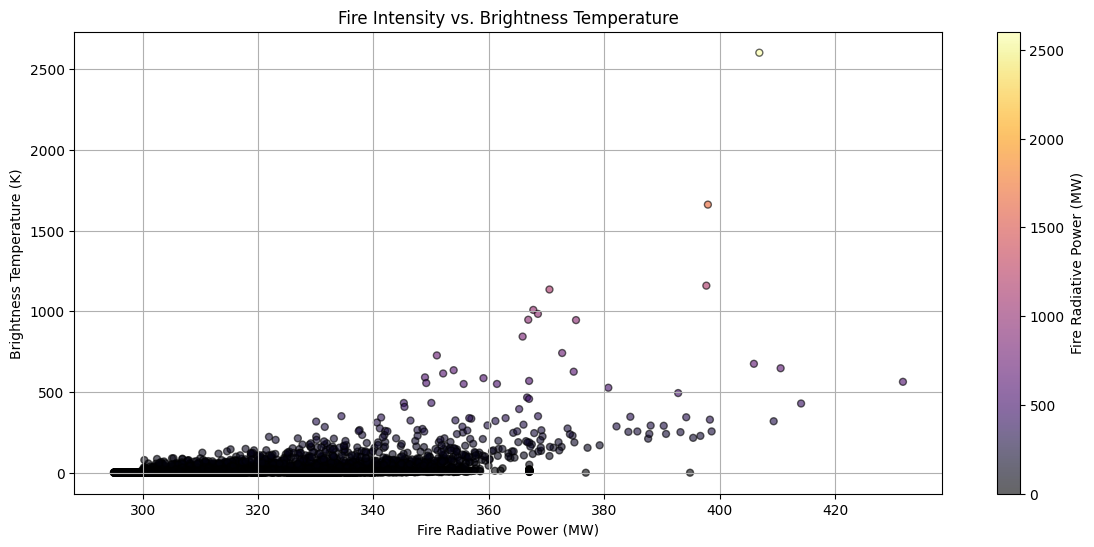

In [327]:
# Compute data for scatter plot
df_scatter = FIRMS_dataset_w_country[["Fire_Radiative_Power_MW", "Brightness_K"]].sample(frac=0.1)#.compute()

# Scatter Plot with Transparency and Color Gradient
plt.figure(figsize=(14, 6))
scatter = plt.scatter(df_scatter["Brightness_K"], df_scatter["Fire_Radiative_Power_MW"],
                      c=df_scatter["Fire_Radiative_Power_MW"], cmap="inferno", alpha=0.6, edgecolors="black", s=25)

# Colorbar to indicate FRP intensity
plt.colorbar(scatter, label="Fire Radiative Power (MW)")

plt.xlabel("Fire Radiative Power (MW)")
plt.ylabel("Brightness Temperature (K)")
plt.title("Fire Intensity vs. Brightness Temperature")

plt.grid(True)
plt.show()



- There is a clear upward trend indicating that as Fire Radiative Power (FRP) increases, brightness temperature also tends to increase, as expected.

- The majority of points are clustered between 300-450 MW FRP and below 1000 K in brightness temperature. This suggests that most wildfires are of moderate intensity and do not reach extreme temperatures.

- Most fires fall within a moderate intensity range, but some extreme cases exist as per the outlier identified in this graph.


#### Top 30 Fire-Prone Areas Per Country (Vegetation Fires & Confidence ≥ 30)

In [328]:
# Ensure FIRMS_dataset_w_country is a Pandas DataFrame
if not isinstance(FIRMS_dataset_w_country, pd.DataFrame):
    FIRMS_dataset_w_country_pd = FIRMS_dataset_w_country#.compute()
else:
    FIRMS_dataset_w_country_pd = FIRMS_dataset_w_country.copy()

# Define range for dot sizes
MIN_DOT_SIZE = 5 # Smallest dot size
MAX_DOT_SIZE = 20  # Largest dot size

# Filter dataset for Confidence_Level >= 30 and Fire_Type == 0 (Vegetation Fires)
df_filtered = FIRMS_dataset_w_country_pd[
    (FIRMS_dataset_w_country_pd["Confidence_Level"] >= 30) &
    (FIRMS_dataset_w_country_pd["Fire_Type"] == 0)
]

# Round Latitude and Longitude to 1 decimal places for broader grouping
df_filtered["Rounded_Latitude"] = df_filtered["Latitude_1d"].round(1)
df_filtered["Rounded_Longitude"] = df_filtered["Longitude_1d"].round(1)

# Aggregate fire count by rounded location and country
fire_counts_per_country = (
    df_filtered
    .groupby(["Country", "Rounded_Latitude", "Rounded_Longitude"])
    .size()
    .reset_index(name="Fire_Count")
)

# Get the top 10 locations per country with the highest number of fires
top_10_per_country = (
    fire_counts_per_country
    .groupby("Country")
    .apply(lambda x: x.nlargest(30, "Fire_Count"))
    .reset_index(drop=True)
)

# Normalize fire count to fit within the desired dot size range
min_fire_count = top_10_per_country["Fire_Count"].min()
max_fire_count = top_10_per_country["Fire_Count"].max()

top_10_per_country["Fire_Count_Scaled"] = top_10_per_country["Fire_Count"].apply(
    lambda x: MIN_DOT_SIZE + ((x - min_fire_count) / (max_fire_count - min_fire_count)) * (MAX_DOT_SIZE - MIN_DOT_SIZE)
)

# Assign a unique color to each country
color_map = {
    "Portugal": "blue",
    "Spain": "red"
}

# Create an interactive map with properly scaled markers
fig = go.Figure()

for country in top_10_per_country["Country"].unique():
    subset = top_10_per_country[top_10_per_country["Country"] == country]

    # Assign a color based on the country
    country_color = color_map.get(country, "gray")  # Use "gray" for unlisted countries

    fig.add_trace(go.Scattermapbox(
        lat=subset["Rounded_Latitude"],
        lon=subset["Rounded_Longitude"],
        mode="markers",
        marker=dict(
            size=subset["Fire_Count_Scaled"],  # Adjusted size for better visibility
            color=country_color,  # Assign different colors per country
            opacity=0.7
        ),
        text=subset["Fire_Count"],
        name=country
    ))

# Update layout for a well-balanced visualization
fig.update_layout(
    title="Top 30 Fire-Prone Areas Per Country (Vegetation Fires & Confidence ≥ 30)",
    autosize=True,
    width=1000,  # Increase width
    height=700,  # Increase height
    mapbox=dict(
        style="open-street-map",
        zoom=5,
        center=dict(lat=40, lon=-4)
    )
)

# Show the interactive map
fig.show()


C:\Users\catar\AppData\Local\Temp\ipykernel_18140\3503721466.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\catar\AppData\Local\Temp\ipykernel_18140\3503721466.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\catar\AppData\Local\Temp\ipykernel_18140\3503721466.py:33: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `incl

- **Most fire-prone areas in Portugal (blue dots)** are clustered in the northwest, particularly around Braga, Porto, and Coimbra.  

- **Spain’s fire-prone areas (red dots)** are concentrated in Galicia, Asturias, and León, suggesting similar environmental conditions contribute to fire outbreaks in both countries.  

- **Fire hotspots in Spain** are also observed in central Spain (around Salamanca) and southeastern Spain (Valencia and Marbella), indicating that fires occur in both northern humid regions (Galicia, Asturias) and drier southern areas.  

- **Portugal’s fires are more concentrated**, whereas **Spain’s fires are more widely distributed** across northern, central, and coastal regions, suggesting a greater geographical spread of fire risk.  

- **The Galicia-Northern Portugal border is the most active fire-prone region**, possibly due to:  
  - Dense forests and vegetation  
  - Frequent droughts and heatwaves  
  - Human activity (agriculture, land clearing, or arson cases)  

In [329]:

# Ensure FIRMS_dataset_w_country is a Pandas DataFrame
if not isinstance(FIRMS_dataset_w_country, pd.DataFrame):
    FIRMS_dataset_w_country_pd = FIRMS_dataset_w_country  # If it's a Dask DataFrame, use .compute() if needed
else:
    FIRMS_dataset_w_country_pd = FIRMS_dataset_w_country.copy()

# Define range for dot sizes
MIN_DOT_SIZE = 5  # Smallest dot size
MAX_DOT_SIZE = 20  # Largest dot size

# Filter dataset for Confidence_Level >= 30 and Fire_Type == 0 (Vegetation Fires)
df_filtered = FIRMS_dataset_w_country_pd[
    (FIRMS_dataset_w_country_pd["Confidence_Level"] >= 30) & 
    (FIRMS_dataset_w_country_pd["Fire_Type"] == 0)
]

# Round Latitude and Longitude to 1 decimal place for broader grouping
df_filtered["Rounded_Latitude"] = df_filtered["Latitude_1d"].round(1)
df_filtered["Rounded_Longitude"] = df_filtered["Longitude_1d"].round(1)

# Calculate Fire Intensity (Brightness_K * FRP) per location and country
fire_intensity_per_country = (
    df_filtered
    .groupby(["Country", "Rounded_Latitude", "Rounded_Longitude"])
    .agg(Fire_Intensity=("Brightness_K", lambda x: (x * df_filtered.loc[x.index, "Fire_Radiative_Power_MW"]).sum()))  # Sum intensity
    .reset_index()
)

# Get the top 30 locations per country with the highest fire intensity
top_30_per_country = (
    fire_intensity_per_country
    .groupby("Country")
    .apply(lambda x: x.nlargest(30, "Fire_Intensity"))
    .reset_index(drop=True)
)

# Normalize fire intensity to fit within the dot size range
min_fire_intensity = top_30_per_country["Fire_Intensity"].min()
max_fire_intensity = top_30_per_country["Fire_Intensity"].max()

top_30_per_country["Fire_Intensity_Scaled"] = top_30_per_country["Fire_Intensity"].apply(
    lambda x: MIN_DOT_SIZE + ((x - min_fire_intensity) / (max_fire_intensity - min_fire_intensity)) * (MAX_DOT_SIZE - MIN_DOT_SIZE)
)

# Assign a unique color to each country
color_map = {
    "Portugal": "blue",
    "Spain": "red"
}

# Create an interactive map with properly scaled markers
fig = go.Figure()

for country in top_30_per_country["Country"].unique():
    subset = top_30_per_country[top_30_per_country["Country"] == country]

    # Assign a color based on the country
    country_color = color_map.get(country, "gray")  # Use "gray" for unlisted countries

    fig.add_trace(go.Scattermapbox(
        lat=subset["Rounded_Latitude"],
        lon=subset["Rounded_Longitude"],
        mode="markers",
        marker=dict(
            size=subset["Fire_Intensity_Scaled"],  # Adjusted size for better visibility
            color=country_color,  # Assign different colors per country
            opacity=0.7
        ),
        text=subset["Fire_Intensity"],
        name=country
    ))

# Update layout for a well-balanced visualization
fig.update_layout(
    title="Top 30 Most Intense Fire Locations Per Country (Vegetation Fires & Confidence ≥ 30)",
    autosize=True,
    width=1000,  # Increase width
    height=700,  # Increase height
    mapbox=dict(
        style="open-street-map",
        zoom=5,
        center=dict(lat=40, lon=-4)
    )
)

# Show the interactive map
fig.show()


C:\Users\catar\AppData\Local\Temp\ipykernel_18140\3964432928.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\catar\AppData\Local\Temp\ipykernel_18140\3964432928.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\catar\AppData\Local\Temp\ipykernel_18140\3964432928.py:33: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `incl

- **Most intense fire locations in Portugal (blue dots)** are heavily concentrated in the northwest, particularly in Braga, Porto, Coimbra, and near the Galicia border.  

- **Spain’s most intense fire locations (red dots)** are mainly found in Galicia, Asturias, and León, suggesting similar climatic and environmental factors drive fire risk in both countries.  

- **Portugal’s fire clusters are more localized**, whereas **Spain’s fire occurrences are more dispersed** across different regions, indicating a broader distribution of fire risk in Spain.  

- **The Galicia-Northern Portugal border remains a critical fire-prone region**, likely due to:  
  - Dense forest cover and high vegetation density  
  - Recurring droughts and extreme heat events  
  - Human activity, including land use changes, agriculture, and possible arson cases

### Fire Incidence and Climate Variables Exploratory Analysis

#### Correlation between Climate Variables and Fire Intensity Variables

In [330]:
dataset_with_all_variables_df = dataset_with_fire_and_climate_variables.copy()#.compute()

dataset_with_all_variables_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524122 entries, 0 to 1502001
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype               
---  ------                            --------------   -----               
 0   Latitude_1d                       524122 non-null  float64             
 1   Longitude_1d                      524122 non-null  float64             
 2   Date                              524122 non-null  date32[day][pyarrow]
 3   Time                              524122 non-null  float64             
 4   Fire_Radiative_Power_MW           524122 non-null  float64             
 5   Brightness_K                      524122 non-null  float64             
 6   Confidence_Level                  524122 non-null  float64             
 7   Track_Width_km                    524122 non-null  float64             
 8   Fire_Type                         524122 non-null  float64             
 9   Brightness_T31_K                  524122 

#### Temporal Climate Patterns Leading to Fire Events

In [331]:
print(dataset_with_all_variables_df.head())
print(dataset_with_all_variables_df['Date'].min())
print(dataset_with_all_variables_df['Date'].max())

   Latitude_1d  Longitude_1d        Date    Time  Fire_Radiative_Power_MW  \
0         37.6          -5.5  2000-11-01  1133.0                      5.2   
1         37.7          -5.4  2000-11-01  1133.0                      5.6   
2         38.2          -4.8  2000-11-01  1133.0                      4.4   
3         39.3          -4.3  2000-11-01  1132.0                      3.8   
4         40.3          -3.2  2000-11-01  1132.0                     19.9   

   Brightness_K  Confidence_Level  Track_Width_km  Fire_Type  \
0         306.6              64.0             1.0        0.0   
1         306.1              63.0             1.0        0.0   
2         302.6              52.0             1.0        0.0   
3         302.9              54.0             1.0        0.0   
4         319.2              79.0             1.0        0.0   

   Brightness_T31_K  ...  Leaf_Area_Index_Low_Vegetation  \
0             293.8  ...                        1.498047   
1             292.2  ...        

In [332]:
# Copy the dataset
climate_time_avg = dataset_with_all_variables_df.copy()

# Convert date columns
climate_time_avg['Climate_Date'] = pd.to_datetime(climate_time_avg['Climate_Date'], errors='coerce')
climate_time_avg['Date'] = pd.to_datetime(climate_time_avg['Date'], errors='coerce')

# Filtering criteria
climate_time_avg = climate_time_avg[climate_time_avg["Fire_Type"] == 0]
climate_time_avg = climate_time_avg[climate_time_avg["Confidence_Level"] >= 30]

# Ensure Climate_Time is treated as a number
climate_time_avg['Climate_Time'] = pd.to_numeric(climate_time_avg['Climate_Time'], errors='coerce')

climate_time_avg = climate_time_avg[climate_time_avg['Date'].dt.month.isin([5,6,7,8,9,10,11])]


# List of variables to track
variables_to_track = [
    'Skin_Temperature', 'Soil_Temperature_Layer1', 'Soil_Temperature_Layer2',
    'Soil_Temperature_Layer3', 'Soil_Temperature_Layer4', 'Soil_Moisture_Layer1',
    'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3', 'Soil_Moisture_Layer4',
    'Wind_U_Component_10m', 'Wind_V_Component_10m', 'Dew_Point_Temperature_2m',
    'Air_Temperature_2m', 'Evaporation', 'Evaporation_Vegetation',
    'Leaf_Area_Index_High_Vegetation', 'Leaf_Area_Index_Low_Vegetation',
    'Potential_Evaporation', 'Surface_Pressure', 'Surface_Runoff',
    'Surface_Sensible_Heat_Flux', 'Surface_Solar_Radiation',
    'Surface_Solar_Radiation_Downward', 'Total_Precipitation'
]

# Dictionary to store means per climate time period (12.0, 17.0)
mean_df_climate_time = {}

# Find all unique fire dates
unique_fire_dates = climate_time_avg['Date'].unique()

# Ensure Date columns are datetime
climate_time_avg['Date'] = pd.to_datetime(climate_time_avg['Date'])
climate_time_avg['Climate_Date'] = pd.to_datetime(climate_time_avg['Climate_Date'])

# Compute the number of days before fire (offset)
climate_time_avg['Day_Offset'] = (climate_time_avg['Climate_Date'] - climate_time_avg['Date']).dt.days

# Create Climate_Label column
climate_time_avg['Climate_Label'] = 'day_' + climate_time_avg['Day_Offset'].astype(str) + '_' + climate_time_avg['Climate_Time'].astype(int).astype(str) + 'h'


In [333]:
# Group by Climate_Label and compute the mean for each climate variable
climate_grouped_avg = climate_time_avg.groupby('Climate_Label')[variables_to_track].mean().reset_index()


climate_grouped_avg.head(10)

Climate_Label  Skin_Temperature  Soil_Temperature_Layer1  \
0    day_-1_12h         31.759937                27.052952   
1    day_-1_17h         28.790878                27.322111   
2    day_-2_12h         31.568661                26.936089   
3    day_-2_17h         28.695768                27.231518   
4    day_-3_12h         31.287132                26.762747   
5    day_-3_17h         28.503164                27.074091   
6     day_0_12h         31.740368                27.033102   
7     day_0_17h         28.607544                27.229156   

   Soil_Temperature_Layer2  Soil_Temperature_Layer3  Soil_Temperature_Layer4  \
0                20.746151                20.078335                17.888460   
1                22.209023                20.094336                17.896191   
2                20.703367                20.058147                17.850037   
3                22.152334                20.073252                17.857822   
4                20.652466                20.037146                17.812313   
5                22.079014                20.051077                17.820179   
6                20.753691                20.102228                17.924913   
7                22.205593                20.117956                17.932608   

   Soil_Moisture_Layer1  Soil_Moisture_Layer2  Soil_Moisture_Layer3  \
0              0.193303              0.219013              0.234857   
1              0.191533              0.218333              0.234504   
2              0.196332              0.220079              0.235328   
3              0.194599              0.219454              0.234981   
4              0.199098              0.220992              0.235848   
5              0.197423              0.220412              0.235508   
6              0.190170              0.217709              0.234343   
7              0.188788              0.217034              0.233992   

   Soil_Moisture_Layer4  ...  Evaporation_Vegetation  \
0              0.303608  ...               -0.018878   
1              0.303495  ...               -0.025996   
2              0.303702  ...               -0.018262   
3              0.303590  ...               -0.024961   
4              0.303919  ...               -0.018139   
5              0.303809  ...               -0.024998   
6              0.303479  ...               -0.019597   
7              0.303367  ...               -0.026804   

   Leaf_Area_Index_High_Vegetation  Leaf_Area_Index_Low_Vegetation  \
0                         2.087210                        2.195607   
1                         2.087210                        2.195607   
2                         2.088305                        2.197647   
3                         2.088305                        2.197647   
4                         2.089578                        2.200068   
5                         2.089578                        2.200068   
6                         2.086144                        2.193440   
7                         2.086144                        2.193440   

   Potential_Evaporation  Surface_Pressure  Surface_Runoff  \
0              -3.002243        942.556519    1.260273e-06   
1              -6.945797        941.228699    2.927128e-06   
2              -2.951805        942.572754    2.141339e-06   
3              -6.827864        941.306152    4.622948e-06   
4              -2.918687        942.412109    4.778518e-06   
5              -6.742970        941.194214    7.272903e-06   
6              -3.048762        942.213318    9.555102e-07   
7              -7.014342        940.833862    3.392827e-06   

   Surface_Sensible_Heat_Flux  Surface_Solar_Radiation  \
0                 -2190570.50                8263064.5   
1                 -5591668.50               17230698.0   
2                 -2186931.75                8196519.5   
3                 -5567380.00               17101270.0   
4                 -2183232.25                8118683.5   
5                 -5555589.00          

In [334]:
# Exclude categorical column
climate_labels = climate_grouped_avg[['Climate_Label']]  # Save labels
numerical_data = climate_grouped_avg.drop(columns=['Climate_Label'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization
normalized_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)

# Restore Climate_Label
normalized_data.insert(0, 'Climate_Label', climate_labels)

normalized_data.head(10)

Climate_Label  Skin_Temperature  Soil_Temperature_Layer1  \
0    day_-1_12h          1.000000                 0.518810   
1    day_-1_17h          0.088343                 1.000000   
2    day_-2_12h          0.941268                 0.309891   
3    day_-2_17h          0.059139                 0.838043   
4    day_-3_12h          0.854824                 0.000000   
5    day_-3_17h          0.000000                 0.556602   
6     day_0_12h          0.993991                 0.483326   
7     day_0_17h          0.032049                 0.833820   

   Soil_Temperature_Layer2  Soil_Temperature_Layer3  Soil_Temperature_Layer4  \
0                 0.060187                 0.509705                 0.633011   
1                 1.000000                 0.707718                 0.697266   
2                 0.032701                 0.259903                 0.313599   
3                 0.963581                 0.446808                 0.378311   
4                 0.000000                 0.000000                 0.000000   
5                 0.916477                 0.172409                 0.065384   
6                 0.065032                 0.805374                 0.936035   
7                 0.997797                 1.000000                 1.000000   

   Soil_Moisture_Layer1  Soil_Moisture_Layer2  Soil_Moisture_Layer3  \
0              0.437920              0.500095              0.466103   
1              0.266298              0.328190              0.275795   
2              0.731773              0.769352              0.720184   
3              0.563667              0.611359              0.532738   
4              1.000000              1.000000              1.000000   
5              0.837585              0.853470              0.817139   
6              0.134010              0.170521              0.188843   
7              0.000000              0.000000              0.000000   

   Soil_Moisture_Layer4  ...  Evaporation_Vegetation  \
0              0.436035  ...                0.914688   
1              0.231506  ...                0.093225   
2              0.606567  ...                0.985795   
3              0.403870  ...                0.212748   
4              1.000000  ...                1.000000   
5              0.799805  ...                0.208451   
6              0.202942  ...                0.831782   
7              0.000000  ...                0.000000   

   Leaf_Area_Index_High_Vegetation  Leaf_Area_Index_Low_Vegetation  \
0                         0.310486                        0.326935   
1                         0.310486                        0.326935   
2                         0.629272                        0.634766   
3                         0.629272                        0.634766   
4                         1.000000                        1.000000   
5                         1.000000                        1.000000   
6                         0.000000                        0.000000   
7                         0.000000                        0.000000   

   Potential_Evaporation  Surface_Pressure  Surface_Runoff  \
0               0.979599          0.990662        0.048242   
1               0.016736          0.227051        0.312094   
2               0.991914          1.000000        0.187709   
3               0.045531          0.271606        0.580530   
4               1.000000          0.907593        0.605156   
5               0.066259          0.207214        1.000000   
6               0.968241          0.793274        0.000000   
7               0.000000          0.000000        0.385811   

   Surface_Sensible_Heat_Flux  Surface_Solar_Radiation  \
0                    0.997918                 0.015667   
1                    0.033106                 0.988787   
2                    0.998950                 0.008446   
3                    0.039996                 0.974742   
4                    1.000000                 0.000000   
5                    0.043341          

In [335]:
df_mean_normalized_climate_time = normalized_data.set_index('Climate_Label').T

def extract_sort_key(column_name):
    parts = column_name.split("_")
    day_offset = int(parts[1])  # Extract day (negative value)
    hour = int(parts[2][:-1])   # Extract hour (12 or 17) by removing "h"
    return (day_offset, hour)   # Sort first by day, then by hour

sorted_columns = sorted(df_mean_normalized_climate_time.columns, key=extract_sort_key)
df_mean_normalized_climate_time = df_mean_normalized_climate_time[sorted_columns]


# Grouping variables for plotting
variable_groups = {
    "Wind Speed Variables": ["Wind_U_Component_10m", "Wind_V_Component_10m"],
    "Heat Variables - Soil": [
        "Soil_Temperature_Layer1", "Soil_Temperature_Layer2",
        "Soil_Temperature_Layer3", "Soil_Temperature_Layer4"
    ],
    "Heat Variables - Air": [
        "Skin_Temperature", "Air_Temperature_2m"
    ],
    "Radiative & Flux Variables": [
        "Surface_Solar_Radiation", "Surface_Solar_Radiation_Downward",
        "Surface_Sensible_Heat_Flux"
    ],
    "Moisture & Water Storage": [
        "Soil_Moisture_Layer1", "Soil_Moisture_Layer2", "Soil_Moisture_Layer3",
        "Soil_Moisture_Layer4", "Dew_Point_Temperature_2m"
    ],
    "Evaporation & Precipitation": [
        "Potential_Evaporation", "Evaporation", "Total_Precipitation"
    ],
    "Atmospheric & Surface Pressure": [
        "Surface_Pressure", "Surface_Runoff"
    ],
    "Vegetation Variables": [
        "Evaporation_Vegetation"
    ]
}

# Function to plot each group
def plot_variable_group(df_mean_normalized_climate_time, group_name, variables):
    plt.figure(figsize=(12, 6))

    # Select relevant variables
    df_filtered = df_mean_normalized_climate_time.loc[df_mean_normalized_climate_time.index.intersection(variables)]

    # Transpose to align x-axis labels correctly
    df_filtered.T.plot(kind='line', marker='o', figsize=(12, 6), linewidth=2)

    # Formatting the plot
    plt.title(f'{group_name} Over Wildfire Season - May to November (3-day period Before Fire Day)', fontsize=14)
    plt.xlabel('Time Before Fire (0 = Fire Day)', fontsize=12)
    plt.ylabel('Normalized Value', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Variables", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()




<Figure size 1200x600 with 0 Axes>

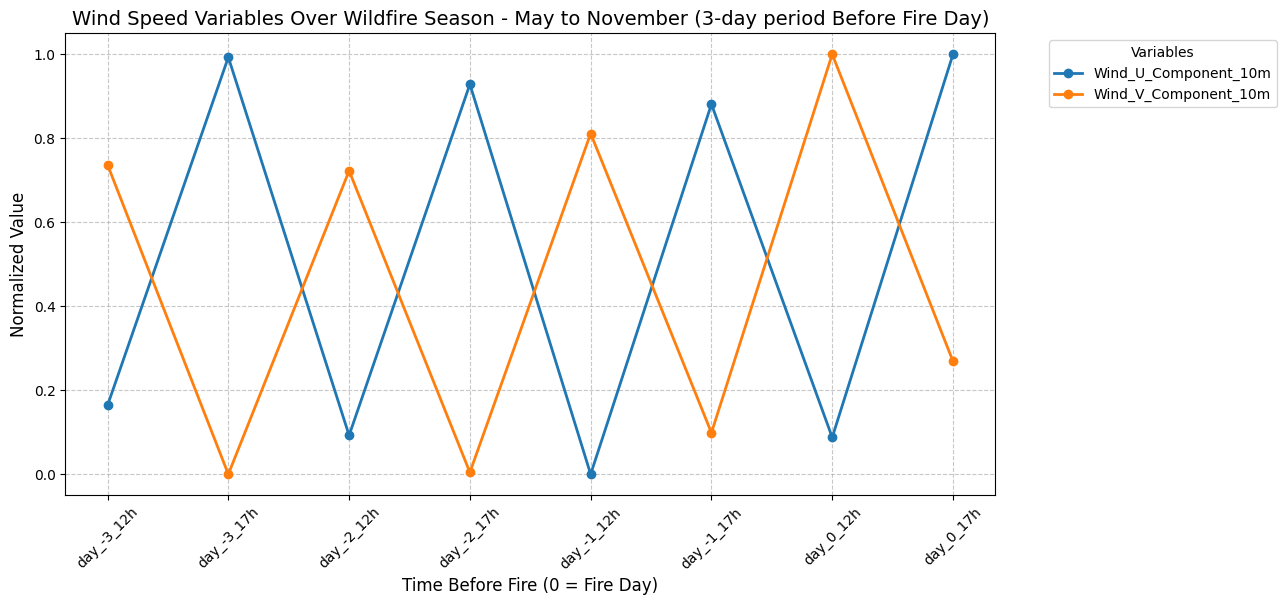

In [336]:
plot_variable_group(df_mean_normalized_climate_time, "Wind Speed Variables", ["Wind_U_Component_10m", "Wind_V_Component_10m"])


- **Axes:**
  - **X-axis:** Time Before Fire (0 = Fire Day), showing different time intervals leading up to the fire event.
  - **Y-axis:** Normalized Value, representing the standardized wind speed values.

- **Legend:**
  - **Wind_U_Component_10m (Blue Line):** Represents the U-component of wind speed (east-west direction).
  - **Wind_V_Component_10m (Orange Line):** Represents the V-component of wind speed (north-south direction).

- **Observations:**
  - Both wind components show a cyclic pattern leading up to the fire day.
  - There are alternating peaks and dips in wind speed, suggesting periodic fluctuations in wind intensity and direction.
  - The U and V components often have opposite trends at given time points, possibly indicating changing wind direction.
  - The final points before the fire event (day_0_12h and day_0_17h) show a high variability in wind speed components.
  
- **Implications:**
  - Wind behavior in the days leading up to a fire could be a crucial factor in fire spread.
  - Alternating peaks and dips might indicate changing weather conditions or local wind patterns that contribute to wildfire dynamics.
  - Understanding wind speed variations before fires could improve predictive models for fire risk assessment.


<Figure size 1200x600 with 0 Axes>

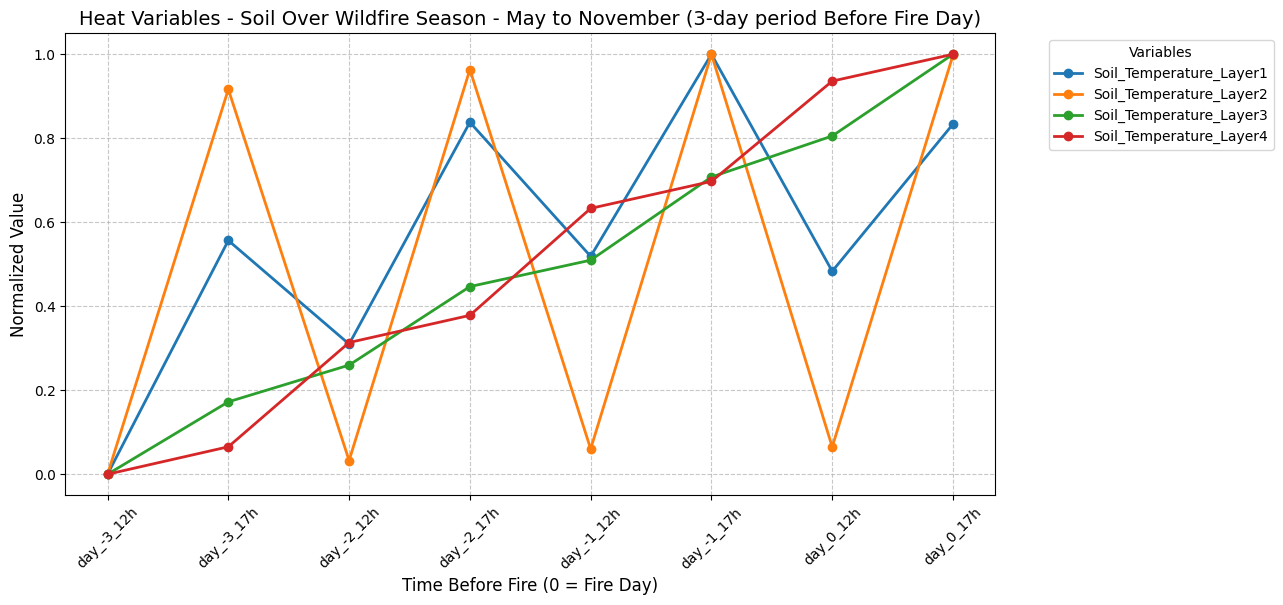

In [337]:
plot_variable_group(df_mean_normalized_climate_time, "Heat Variables - Soil", [
        "Soil_Temperature_Layer1", "Soil_Temperature_Layer2",
        "Soil_Temperature_Layer3", "Soil_Temperature_Layer4"
    ])



- **Axes:**
  - **X-axis:** Time Before Fire (0 = Fire Day), showing different time intervals leading up to the fire event.
  - **Y-axis:** Normalized Value, representing the standardized soil temperature values across different layers.

- **Legend:**
  - **Soil_Temperature_Layer1 (Blue Line):** Represents the temperature of the topsoil layer.
  - **Soil_Temperature_Layer2 (Orange Line):** Represents the second soil layer.
  - **Soil_Temperature_Layer3 (Green Line):** Represents the third soil layer.
  - **Soil_Temperature_Layer4 (Red Line):** Represents the deepest measured soil layer.

- **Observations:**
  - The top two layers (blue and orange lines) show more dramatic fluctuations in temperature compared to the deeper layers.
  - Soil temperature in deeper layers (green and red lines) shows a more gradual increase leading up to the fire day.
  - The second soil layer (orange) exhibits the most extreme peaks and dips, suggesting strong variability in heat absorption and retention.
  - The final temperature values before the fire event show all layers converging toward their highest values, particularly for the deeper layers.
  
- **Implications:**
  - Soil temperature plays a key role in wildfire conditions, with top layers experiencing rapid fluctuations while deeper layers gradually heat up.
  - The convergence of all soil layers to high temperatures just before the fire event may indicate accumulated heat stress in the environment.
  - Understanding these temperature trends could help predict fire-prone conditions and improve early warning systems.


<Figure size 1200x600 with 0 Axes>

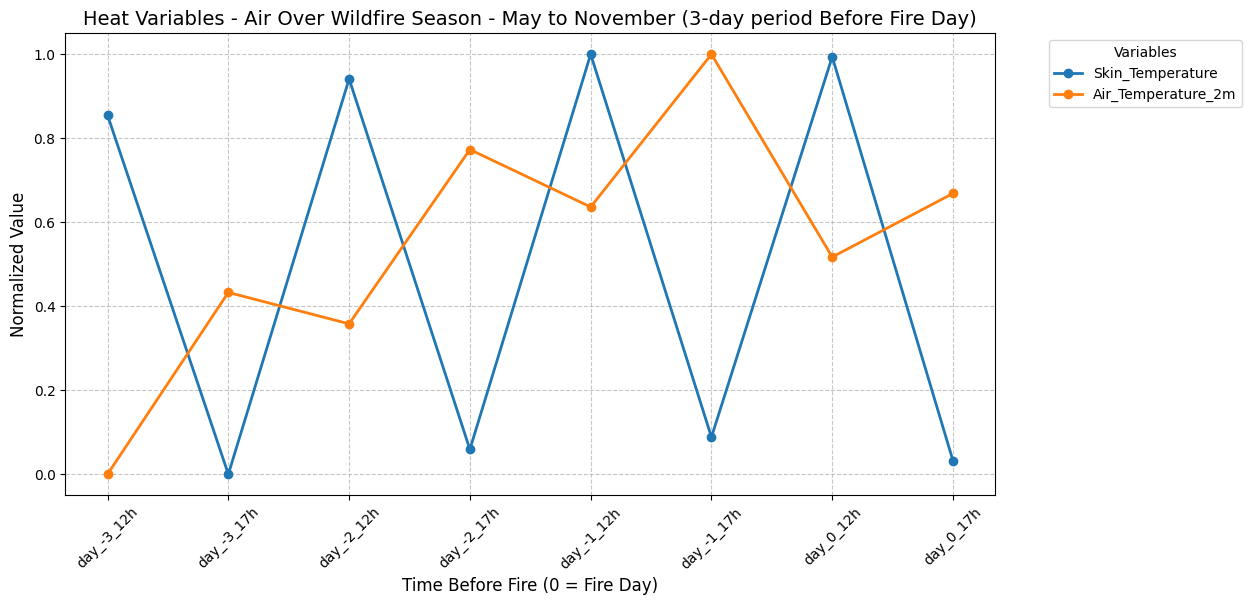

In [338]:
plot_variable_group(df_mean_normalized_climate_time, "Heat Variables - Air", [
        "Skin_Temperature", "Air_Temperature_2m"
    ])

- **Axes:**
  - **X-axis:** Time Before Fire (0 = Fire Day), showing different time intervals leading up to the fire event.
  - **Y-axis:** Normalized Value, representing the standardized values of air and surface temperatures.

- **Legend:**
  - **Skin_Temperature (Blue Line):** Represents the surface temperature of the ground or vegetation.
  - **Air_Temperature_2m (Orange Line):** Represents the air temperature measured at 2 meters above ground level.

- **Observations:**
  - Skin temperature (blue line) exhibits more extreme fluctuations compared to air temperature.
  - Air temperature (orange line) follows a more gradual increasing trend leading up to the fire event.
  - Peaks in skin temperature are sharper and occur frequently, suggesting rapid heating and cooling cycles.
  - In the final time intervals before the fire event, both variables show some degree of convergence.
  
- **Implications:**
  - The steady increase in air temperature supports the idea that rising atmospheric heat contributes to wildfire conditions.
  - Monitoring both variables together could improve wildfire risk prediction by identifying dangerous heat buildup patterns.


<Figure size 1200x600 with 0 Axes>

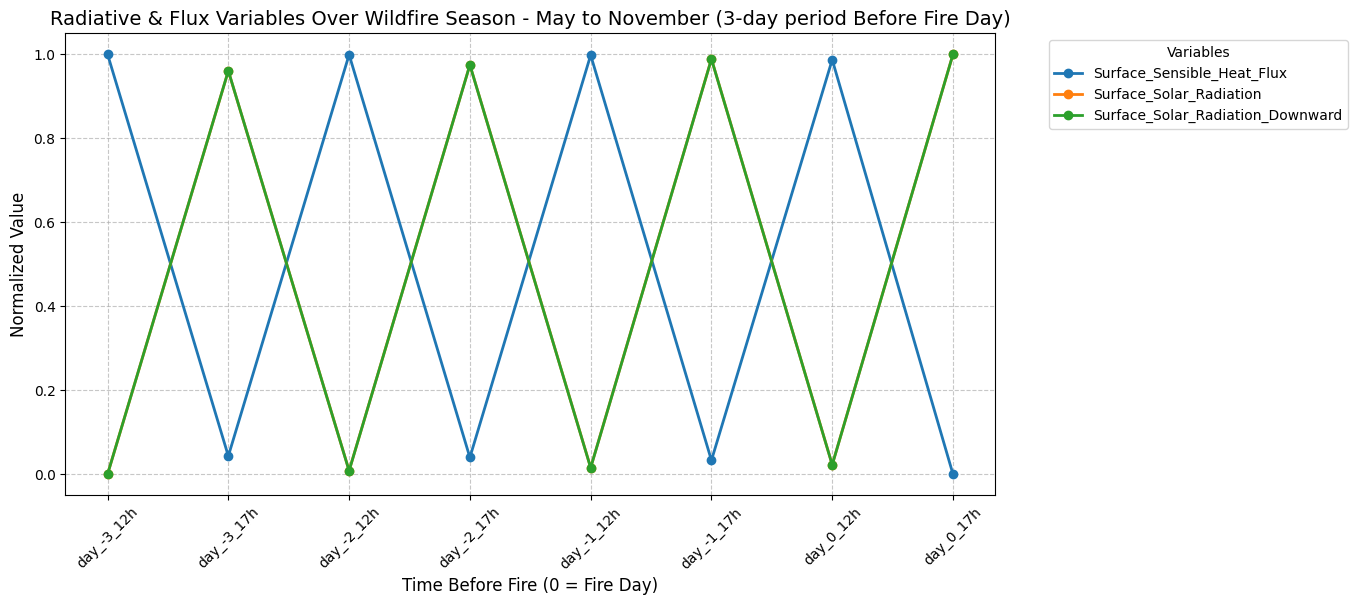

In [339]:
plot_variable_group(df_mean_normalized_climate_time, "Radiative & Flux Variables",[
        "Surface_Solar_Radiation", "Surface_Solar_Radiation_Downward",
        "Surface_Sensible_Heat_Flux"
    ])

- **Axes:**

  - **X-axis:** Time Before Fire (0 = Fire Day), showing different time intervals leading up to the fire event.
  - **Y-axis:** Normalized Value, representing the standardized values of radiative and flux variables.

- **Legend:**

  - **Surface_Sensible_Heat_Flux (Blue Line):** Represents the heat energy transferred from the surface to the atmosphere.
  - **Surface_Solar_Radiation (Orange Line):** Represents the total solar radiation received at the surface.
  - **Surface_Solar_Radiation_Downward (Green Line):** Represents the downward solar radiation component affecting surface heating.

- **Observations:**

  - Sensible heat flux (blue line) exhibits a strong oscillatory pattern, alternating between high and low values at each time step.
  - Downward solar radiation (green line) follows a similar oscillatory pattern but is out of phase with sensible heat flux.
  - Surface solar radiation (orange line) is not strongly visible in the graph, possibly overlapping or showing less variation.
  - The alternating peaks and dips suggest a consistent daily cycle in radiative energy exchange before fire events.

- **Implications:**

  - The oscillatory behavior of sensible heat flux and solar radiation downward indicates strong atmospheric interactions leading up to fire events.
  - High heat flux variability may contribute to surface drying, increasing fire risk.
  - Understanding these flux dynamics could help improve fire prediction models by incorporating heat transfer and solar energy variables.


<Figure size 1200x600 with 0 Axes>

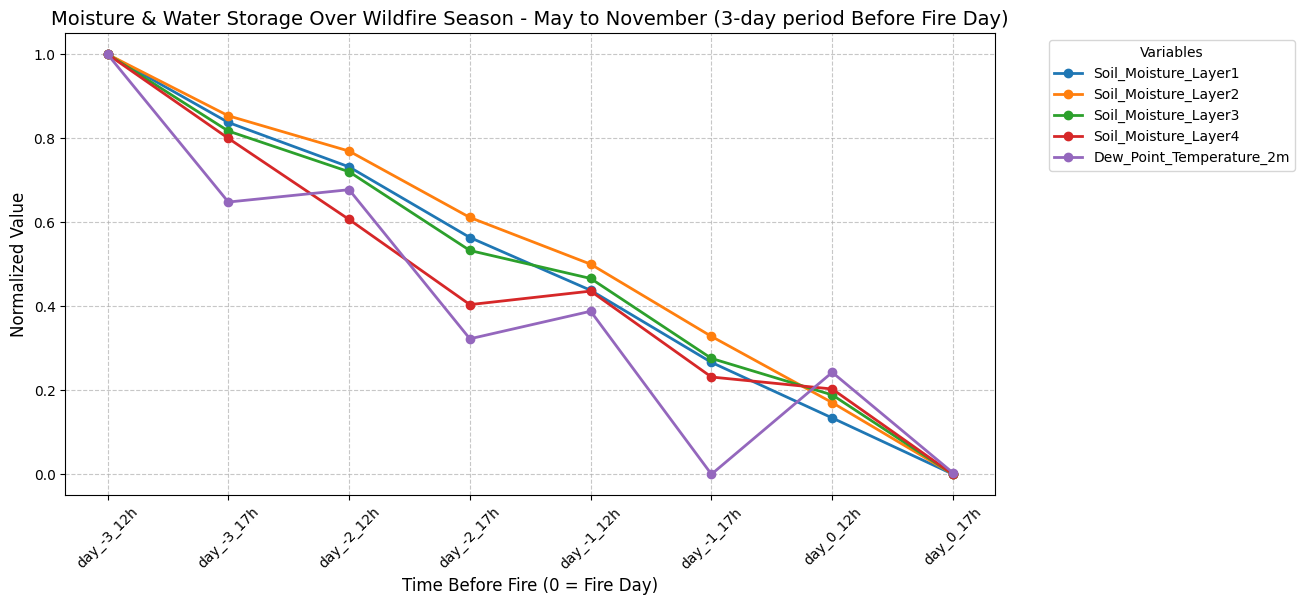

In [340]:
plot_variable_group(df_mean_normalized_climate_time, "Moisture & Water Storage",[
        "Soil_Moisture_Layer1", "Soil_Moisture_Layer2", "Soil_Moisture_Layer3",
        "Soil_Moisture_Layer4", "Dew_Point_Temperature_2m"
    ])

- **Axes:**

  - **X-axis:** Time Before Fire (0 = Fire Day), showing different time intervals leading up to the fire event.
  - **Y-axis:** Normalized Value, representing the standardized values of soil moisture and dew point temperature.

- **Legend:**

  - **Soil_Moisture_Layer1 (Blue Line):** Represents moisture content in the topsoil layer.
  - **Soil_Moisture_Layer2 (Orange Line):** Represents moisture content in the second soil layer.
  - **Soil_Moisture_Layer3 (Green Line):** Represents moisture content in the third soil layer.
  - **Soil_Moisture_Layer4 (Red Line):** Represents moisture content in the deepest soil layer.
  - **Dew_Point_Temperature_2m (Purple Line):** Represents the temperature at which air moisture condenses at 2 meters above the surface.

- **Observations:**

  - All soil moisture layers show a consistent decline leading up to the fire event, suggesting drying conditions.
  - The top layers (blue and orange lines) maintain slightly higher moisture levels initially but eventually converge with deeper layers as fire day approaches.
  - Dew point temperature (purple line) shows a fluctuating pattern but also trends downward, indicating decreasing atmospheric moisture.
  - A sharp drop in dew point temperature occurs just before the fire event, possibly signaling increased dryness in the air.

- **Implications:**

  - The steady decrease in soil moisture suggests worsening drought conditions leading up to the fire.
  - A declining dew point temperature indicates lower atmospheric humidity, which can further dry vegetation and increase fire risk.
  - Monitoring both soil and atmospheric moisture levels could improve early warning systems for wildfire prediction.


<Figure size 1200x600 with 0 Axes>

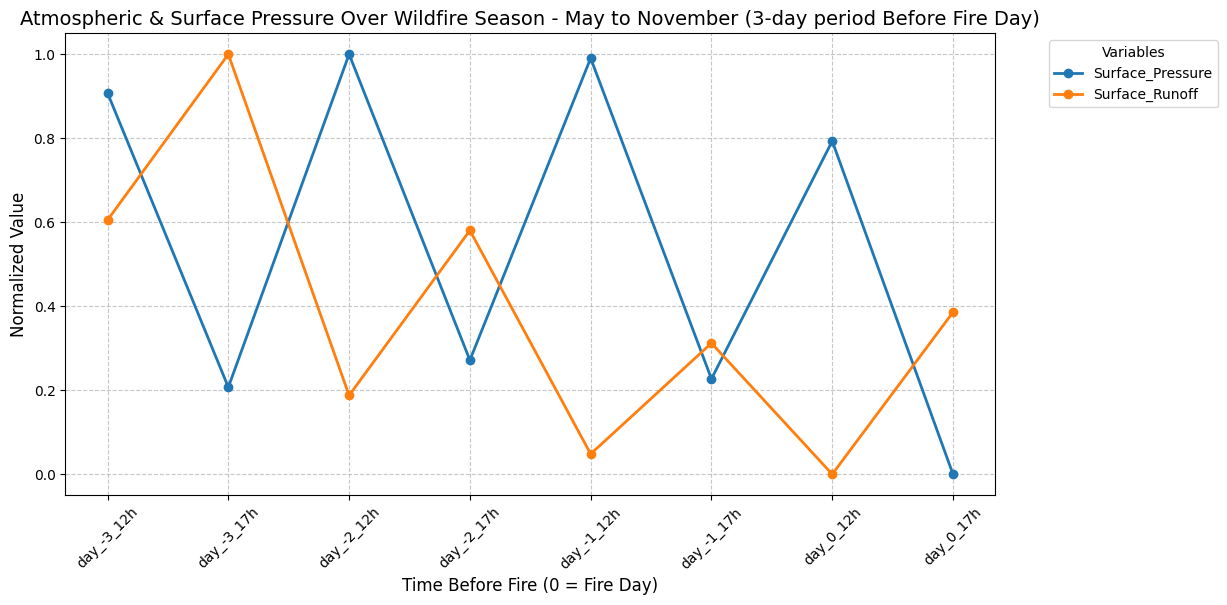

In [341]:
plot_variable_group(df_mean_normalized_climate_time, "Atmospheric & Surface Pressure", [
        "Surface_Pressure", "Surface_Runoff"
    ])

- **Axes:**

  - **X-axis:** Time Before Fire (0 = Fire Day), showing different time intervals leading up to the fire event.
  - **Y-axis:** Normalized Value, representing the standardized values of surface pressure and surface runoff.

- **Legend:**

  - **Surface_Pressure (Blue Line):** Represents atmospheric pressure at the surface level.
  - **Surface_Runoff (Orange Line):** Represents the amount of water runoff at the surface.

- **Observations:**

  - Surface pressure exhibits a strong oscillatory pattern with alternating peaks and dips over time.
  - Surface runoff also follows a cyclic pattern but is often out of phase with surface pressure.
  - Runoff peaks occasionally align with pressure drops, possibly indicating rainfall or moisture-related events.
  - The lowest values for both variables occur near fire day, suggesting a trend toward drier and lower-pressure conditions.

- **Implications:**

  - The alternating pattern of surface pressure may reflect changing weather conditions, including high and low-pressure systems.
  - Lower surface pressure near fire events might indicate conditions conducive to dry weather and increased fire risk.
  - Reduced surface runoff approaching fire day suggests drying conditions, reducing available moisture that could mitigate wildfires.
  - Monitoring pressure fluctuations and runoff changes could improve fire risk forecasting and help in early warning systems.


<Figure size 1200x600 with 0 Axes>

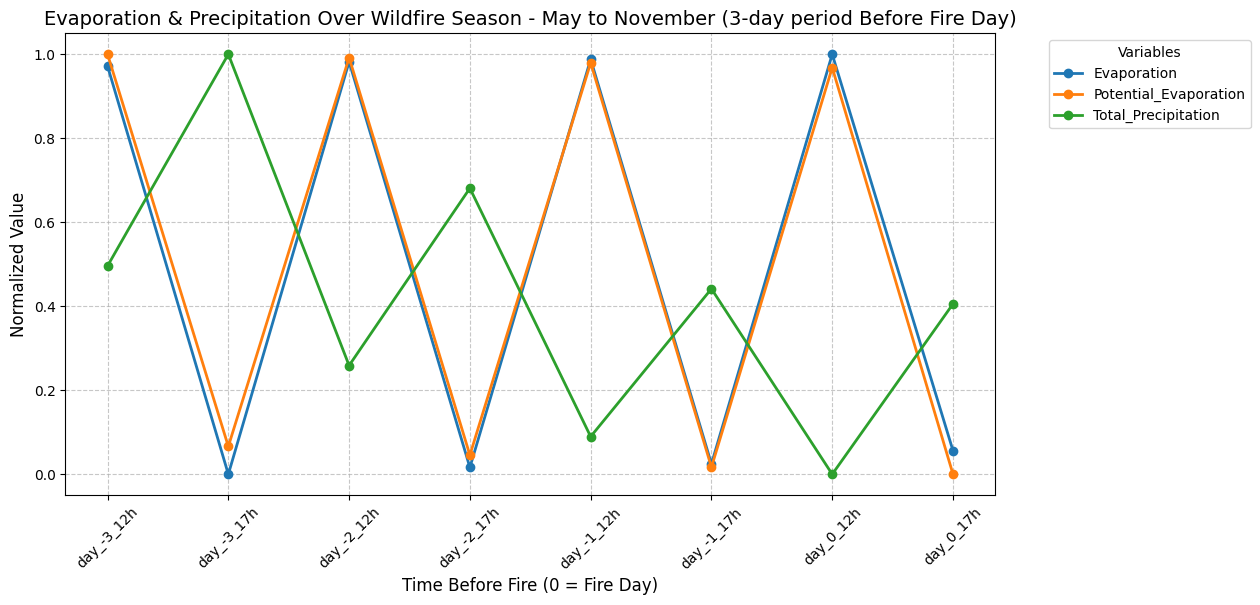

In [342]:
plot_variable_group(df_mean_normalized_climate_time, "Evaporation & Precipitation", [
        "Potential_Evaporation", "Evaporation", "Total_Precipitation"
    ])

- **Axes:**

  - **X-axis:** Time Before Fire (0 = Fire Day), showing different time intervals leading up to the fire event.
  - **Y-axis:** Normalized Value, representing the standardized values of evaporation, potential evaporation, and precipitation.

- **Legend:**

  - **Evaporation (Blue Line):** Represents actual evaporation from the surface.
  - **Potential_Evaporation (Orange Line):** Represents the theoretical maximum evaporation under given atmospheric conditions.
  - **Total_Precipitation (Green Line):** Represents the total amount of precipitation recorded.

- **Observations:**

  - Evaporation and potential evaporation (blue and orange lines) follow nearly identical cyclic patterns, with peaks and dips occurring at the same time.
  - Total precipitation (green line) follows a different oscillatory pattern, with peaks often occurring when evaporation is lower.
  - The highest peaks for evaporation coincide with lower precipitation, suggesting a drying trend leading up to the fire event.
  - There is a sharp decline in both evaporation and precipitation at multiple points, indicating fluctuating moisture availability.

- **Implications:**

  - The strong correlation between actual and potential evaporation suggests that environmental conditions are driving intense drying before fires.
  - The inverse relationship between evaporation and precipitation highlights the impact of reduced rainfall on wildfire risk.
  - Monitoring these variables together could improve fire prediction by identifying prolonged drying periods with limited precipitation.


<Figure size 1200x600 with 0 Axes>

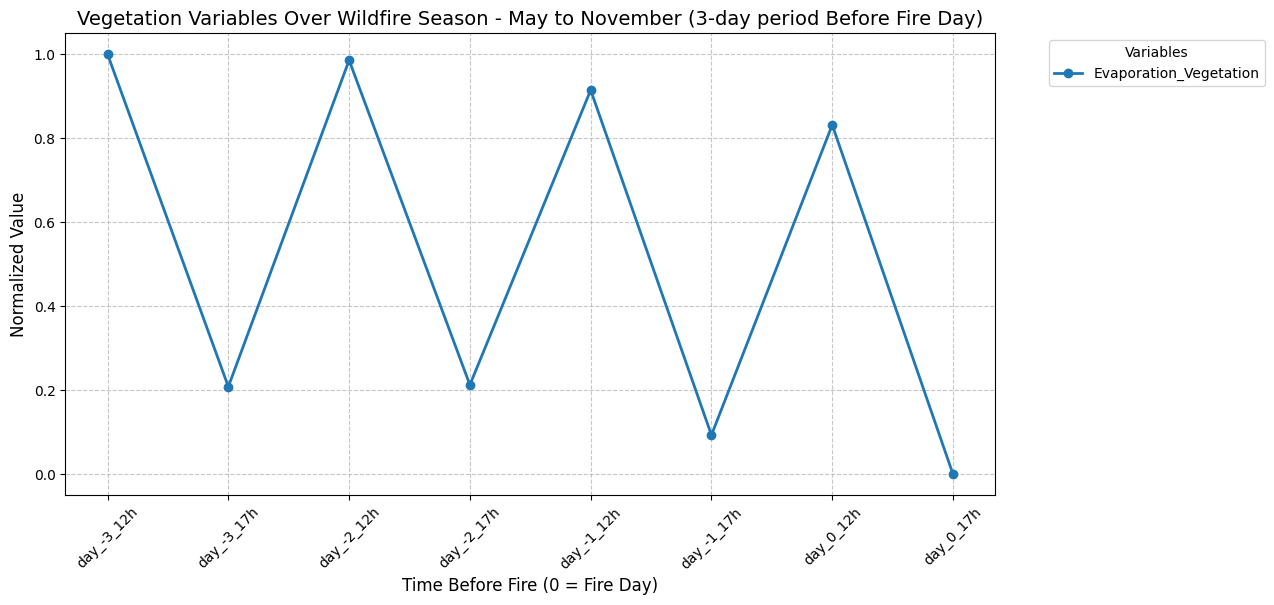

In [343]:
plot_variable_group(df_mean_normalized_climate_time, "Vegetation Variables", [
        "Evaporation_Vegetation"
    ])

- **Axes:**

  - **X-axis:** Time Before Fire (0 = Fire Day), showing different time intervals leading up to the fire event.
  - **Y-axis:** Normalized Value, representing the standardized values of vegetation evaporation.

- **Legend:**

  - **Evaporation_Vegetation (Blue Line):** Represents the rate of moisture loss from vegetation due to evaporation.

- **Observations:**

  - The variable exhibits a strong oscillatory pattern with alternating peaks and dips over time.
  - Evaporation from vegetation shows periodic fluctuations, suggesting daily cycles of moisture loss and retention.
  - The values tend to peak and then sharply decline in a repeating pattern, with lower values occurring at specific intervals.
  - The lowest evaporation value occurs just before the fire event, indicating that vegetation may have significantly dried out by then.

- **Implications:**

  - The fluctuations suggest that vegetation is undergoing rapid cycles of moisture loss and limited recovery leading up to the fire.
  - The decline in evaporation closer to the fire event may indicate increased vegetation stress and dryness, making it more susceptible to ignition.
  - Monitoring vegetation evaporation trends could improve fire risk assessments by identifying periods of critical moisture loss.

In [344]:
dataset_with_all_variables_df = dataset_with_all_variables_df[dataset_with_all_variables_df["Date"].dt.month.isin([5,6,7,8,9,10,11])]

## Correlations - Feature Importance

### Correlation between fire intensity variables and climate variables

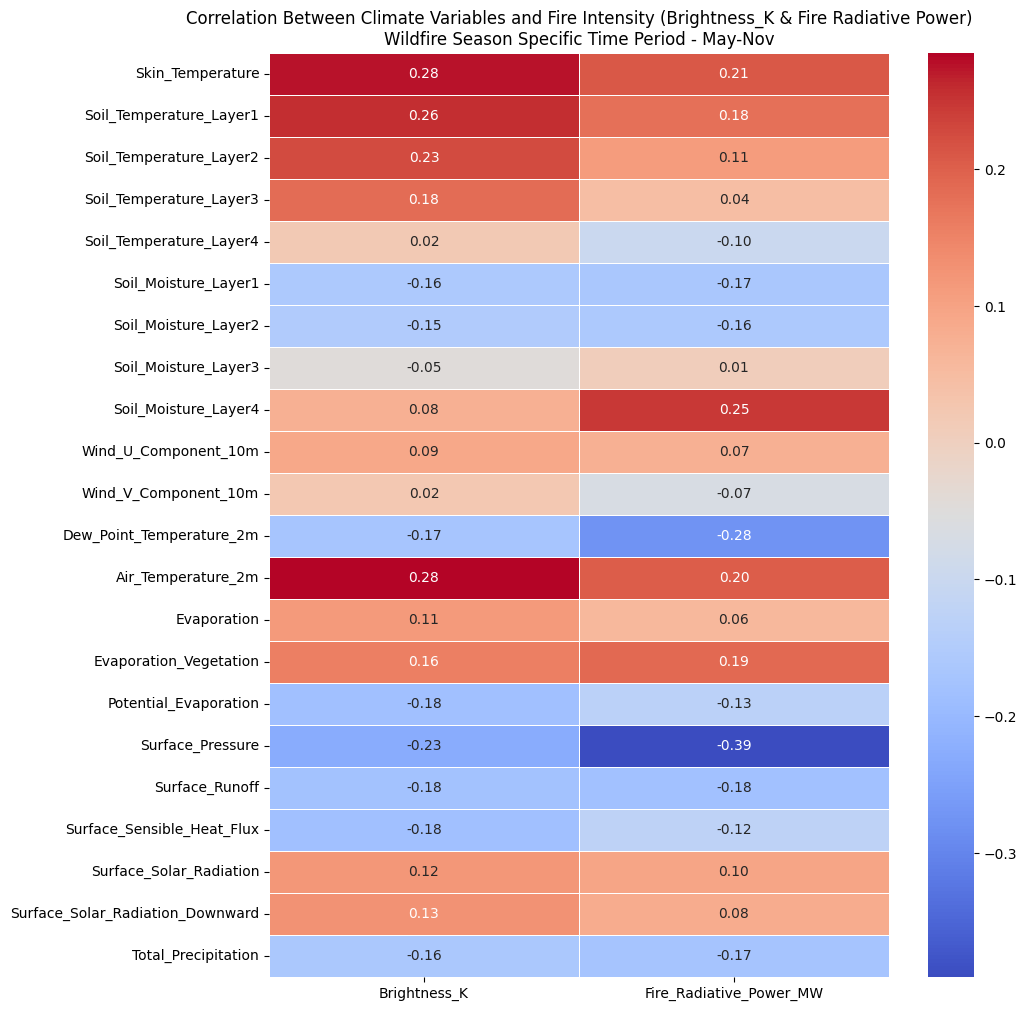

In [345]:

dataset_with_all_variables_df_corr = dataset_with_all_variables_df.copy()

# Select only the relevant climate variables and fire intensity metrics
climate_variables = [
    'Skin_Temperature', 'Soil_Temperature_Layer1', 'Soil_Temperature_Layer2',
    'Soil_Temperature_Layer3', 'Soil_Temperature_Layer4', 'Soil_Moisture_Layer1',
    'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3', 'Soil_Moisture_Layer4',
    'Wind_U_Component_10m', 'Wind_V_Component_10m', 'Dew_Point_Temperature_2m',
    'Air_Temperature_2m', 'Evaporation', 'Evaporation_Vegetation',
    'Potential_Evaporation', 'Surface_Pressure', 'Surface_Runoff',
    'Surface_Sensible_Heat_Flux', 'Surface_Solar_Radiation',
    'Surface_Solar_Radiation_Downward', 'Total_Precipitation'
]

fire_variables = ['Brightness_K', 'Fire_Radiative_Power_MW']

numeric_dataset = dataset_with_all_variables_df_corr

# Ensure only numeric data is selected
numeric_dataset = numeric_dataset[climate_variables + fire_variables].select_dtypes(include=["number"])

# Compute correlation matrix only between climate variables and fire intensity metrics
correlation_matrix = numeric_dataset.corr(method='spearman').loc[climate_variables, fire_variables]

plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Climate Variables and Fire Intensity (Brightness_K & Fire Radiative Power)\nWildfire Season Specific Time Period - May-Nov")
plt.show()



- Correlation between environmental factors and wildfires is very complex, so correlation rates may appear low, but still worth exploring.
- Skin temperature has the highest correlation with both fire variables.
- Air temperature at 2m height also shows a strong link.
- Soil temperature is positively correlated, but the effect weakens with depth as expected.
- Soil moisture (top layers) has a moderate negative correlation—less moisture leads to higher fire intensity, possibly indicating sustained dry periods in the lead up to a fire.
- Surface pressure has one of the strongest negative correlations, possibly due to increased wind and dryness.
- Solar radiation and evaporation slightly increase fire risk by drying out vegetation.
- Precipitation and surface runoff help reduce fire intensity, but their effect is weaker than temperature and moisture levels.
- High temperatures and low moisture are the strongest predictors of fire intensity.
- Low surface pressure and dry conditions create fire-friendly environments.


### Feature Importance - Mutual Info

I am performing mutual information analysis to determine which climate variables contribute the most to fire occurrence. 

#### GOAL: #####

- **Feature Selection:** Identifying the most relevant climate factors that influence fire occurrence helps in reducing model complexity and improving prediction accuracy.
- **Understanding Key Drivers:** By computing **mutual information scores**, I am quantifying how much each climate variable contributes to fire occurrence.
- **Data Normalization:** Using `MinMaxScaler` ensures that all climate variables are scaled between 0 and 1, allowing fair comparisons.

This step is crucial for building an efficient and interpretable fire risk prediction model. 

In [346]:
data_just_climate_variables = dataset_with_all_variables_and_rows.copy()

In [347]:
#data_just_climate_variables = data_just_climate_variables[data_just_climate_variables["Date"].dt.month.isin([5,6,7,8,9,10,11])]

In [348]:
data_just_climate_variables = dataset_with_all_variables_and_rows[climate_variables + ['Fire_Occurrence']]

In [349]:
data_just_climate_variables = data_just_climate_variables.dropna()

In [350]:
data_just_climate_variables.columns

Index(['Skin_Temperature', 'Soil_Temperature_Layer1',
       'Soil_Temperature_Layer2', 'Soil_Temperature_Layer3',
       'Soil_Temperature_Layer4', 'Soil_Moisture_Layer1',
       'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3', 'Soil_Moisture_Layer4',
       'Wind_U_Component_10m', 'Wind_V_Component_10m',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m', 'Evaporation',
       'Evaporation_Vegetation', 'Potential_Evaporation', 'Surface_Pressure',
       'Surface_Runoff', 'Surface_Sensible_Heat_Flux',
       'Surface_Solar_Radiation', 'Surface_Solar_Radiation_Downward',
       'Total_Precipitation', 'Fire_Occurrence'],
      dtype='object')

In [351]:


# Define climate variables
climate_variables = [
    'Skin_Temperature', 'Soil_Temperature_Layer1', 'Soil_Temperature_Layer2',
    'Soil_Temperature_Layer3', 'Soil_Temperature_Layer4', 'Soil_Moisture_Layer1',
    'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3', 'Soil_Moisture_Layer4',
    'Wind_U_Component_10m', 'Wind_V_Component_10m', 'Dew_Point_Temperature_2m',
    'Air_Temperature_2m', 'Evaporation', 'Evaporation_Vegetation',
    'Potential_Evaporation', 'Surface_Pressure', 'Surface_Runoff',
    'Surface_Sensible_Heat_Flux', 'Surface_Solar_Radiation',
    'Surface_Solar_Radiation_Downward', 'Total_Precipitation'
]




In [352]:
data_just_climate_variables.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014350 entries, 0 to 1504672
Data columns (total 23 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   Skin_Temperature                  1014350 non-null  float32
 1   Soil_Temperature_Layer1           1014350 non-null  float32
 2   Soil_Temperature_Layer2           1014350 non-null  float32
 3   Soil_Temperature_Layer3           1014350 non-null  float32
 4   Soil_Temperature_Layer4           1014350 non-null  float32
 5   Soil_Moisture_Layer1              1014350 non-null  float32
 6   Soil_Moisture_Layer2              1014350 non-null  float32
 7   Soil_Moisture_Layer3              1014350 non-null  float32
 8   Soil_Moisture_Layer4              1014350 non-null  float32
 9   Wind_U_Component_10m              1014350 non-null  float32
 10  Wind_V_Component_10m              1014350 non-null  float32
 11  Dew_Point_Temperature_2m          1014350 

In [353]:
data_just_climate_variables.describe()

Skin_Temperature  Soil_Temperature_Layer1  Soil_Temperature_Layer2  \
count      1.014350e+06             1.014350e+06             1.014350e+06   
mean       3.095207e+01             2.816746e+01             2.113980e+01   
std        1.276689e+01             1.227374e+01             8.774994e+00   
min       -1.458115e+01            -1.737152e+00            -1.365814e+00   
25%        2.123990e+01             1.902213e+01             1.510440e+01   
50%        3.051236e+01             2.801895e+01             2.129459e+01   
75%        3.969278e+01             3.642569e+01             2.726425e+01   
max        6.501944e+01             6.282437e+01             4.289468e+01   

       Soil_Temperature_Layer3  Soil_Temperature_Layer4  Soil_Moisture_Layer1  \
count             1.014350e+06             1.014350e+06          1.014350e+06   
mean              2.050601e+01             1.983522e+01          1.378736e-01   
std               7.816687e+00             6.621580e+00          1.417196e-01   
min               2.821350e-01             1.433990e+00         -6.013939e-20   
25%               1.574680e+01             1.487442e+01          9.582520e-03   
50%               2.082339e+01             2.110049e+01          9.841919e-02   
75%               2.597183e+01             2.531607e+01          2.592010e-01   
max               3.831656e+01             3.174014e+01          5.200043e-01   

       Soil_Moisture_Layer2  Soil_Moisture_Layer3  Soil_Moisture_Layer4  \
count          1.014350e+06          1.014350e+06          1.014350e+06   
mean           1.775721e-01          1.830152e-01          1.925724e-01   
std            1.237467e-01          1.256620e-01          1.380135e-01   
min           -1.143495e-20         -6.234163e-19         -3.639597e-22   
25%            9.730530e-02          8.930969e-02          8.486938e-02   
50%            1.489258e-01          1.643677e-01          1.618347e-01   
75%            2.781982e-01          2.760925e-01          3.163452e-01   
max            5.164185e-01          5.171509e-01          5.163879e-01   

       Wind_U_Component_10m  ...   Evaporation  Evaporation_Vegetation  \
count          1.014350e+06  ...  1.014350e+06            1.014350e+06   
mean           1.071407e+00  ... -7.072366e-01           -5.450900e-02   
std            1.144513e+01  ...  8.625313e-01            1.903027e-01   
min           -4.861373e+01  ... -6.817887e+00           -4.231256e+00   
25%           -6.188983e+00  ... -1.077784e+00           -4.153582e-03   
50%            1.267149e+00  ... -3.733989e-01            0.000000e+00   
75%            8.867381e+00  ... -4.272815e-02            0.000000e+00   
max            5.755248e+01  ...  5.232571e-01            4.071491e-01   

       Potential_Evaporation  Surface_Pressure  Surface_Runoff  \
count           1.014350e+06      1.014350e+06    1.014350e+06   
mean           -3.949297e+00      9.600700e+02    8.956523e-06   
std             2.532204e+00      3.323577e+01    1.637205e-04   
min            -3.683121e+01      7.867925e+02    0.000000e+00   
25%            -5.520533e+00      9.392787e+02    0.000000e+00   
50%            -3.382411e+00      9.596044e+02    0.000000e+00   
75%            -2.004639e+00      9.894431e+02    1.639128e-07   
max             1.916289e-01      1.035966e+03    2.617498e-02   

       Surface_Sensible_Heat_Flux  Surface_Solar_Radiation  \
count                  1014350.00                1014350.0   
mean                  -3265630.75               11565449.0   
std                    2813903.00                5727266.5   
min                  -15410048.00                 163426.0   
25%                   -4991766.00                7050916.0   
50%                   -2494596.00               10030055.0   
75%                   -1156709.00               16460001.0   
max                   11032979.00               26969734.0   

       Surface_Solar_Radiation_Downward  Total_Precipitation  Fire_Occurrence  
count 

In [354]:
data_just_climate_variables.head()

Skin_Temperature  Soil_Temperature_Layer1  Soil_Temperature_Layer2  \
0         22.332916                20.437897                18.319000   
1         22.688385                20.174225                18.111969   
2         20.239166                17.908600                15.934235   
3         17.709869                15.601959                13.715485   
4         14.079010                13.129303                12.459625   

   Soil_Temperature_Layer3  Soil_Temperature_Layer4  Soil_Moisture_Layer1  \
0                21.161530                25.022369              0.283417   
1                21.208405                25.286041              0.310059   
2                19.427155                23.709869              0.217041   
3                16.751373                20.721588              0.299072   
4                15.837311                19.645416              0.333298   

   Soil_Moisture_Layer2  Soil_Moisture_Layer3  Soil_Moisture_Layer4  \
0              0.205078              0.173828              0.221558   
1              0.257675              0.252731              0.289017   
2              0.168930              0.148697              0.200287   
3              0.240616              0.188370              0.244843   
4              0.240097              0.205872              0.268600   

   Wind_U_Component_10m  ...  Evaporation  Evaporation_Vegetation  \
0              3.112976  ...    -0.979763               -0.000096   
1              3.313367  ...    -1.022896               -0.002572   
2              2.887976  ...    -0.913334               -0.003399   
3              5.665319  ...    -0.796966               -0.009492   
4              8.527039  ...    -0.986484                0.000000   

   Potential_Evaporation  Surface_Pressure  Surface_Runoff  \
0              -2.676681       1004.252502        0.000030   
1              -2.434228       1001.592468        0.000031   
2              -2.006926        955.092468        0.000017   
3              -1.691282        938.882507        0.000031   
4              -2.033219        926.472473        0.000051   

   Surface_Sensible_Heat_Flux  Surface_Solar_Radiation  \
0                   -873687.0                5757348.0   
1                   -816503.0                5891836.0   
2                  -1492903.0                6149266.0   
3                  -1058351.0                5129338.0   
4                   -679063.0                4900684.0   

   Surface_Solar_Radiation_Downward  Total_Precipitation  Fire_Occurrence  
0                         6897672.0             5.837455                1  
1                         6989098.0             4.933178                1  
2                         7007318.0             4.057259                1  
3                         6151388.0             4.794776                1  
4                         5930730.0             7.179499                1  

[5 rows x 23 columns]

Top Features Contributing to Fire Occurrence (Mutual Information):
                             Feature  Mutual_Information
8               Soil_Moisture_Layer4            0.679483
5               Soil_Moisture_Layer1            0.591039
6               Soil_Moisture_Layer2            0.532888
7               Soil_Moisture_Layer3            0.526415
4            Soil_Temperature_Layer4            0.456897
13                       Evaporation            0.415425
3            Soil_Temperature_Layer3            0.296511
1            Soil_Temperature_Layer1            0.282893
0                   Skin_Temperature            0.268609
2            Soil_Temperature_Layer2            0.231381
14            Evaporation_Vegetation            0.228798
12                Air_Temperature_2m            0.174303
10              Wind_V_Component_10m            0.167940
9               Wind_U_Component_10m            0.159496
16                  Surface_Pressure            0.151563
19           Surface_

C:\Users\catar\AppData\Local\Temp\ipykernel_18140\497697943.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




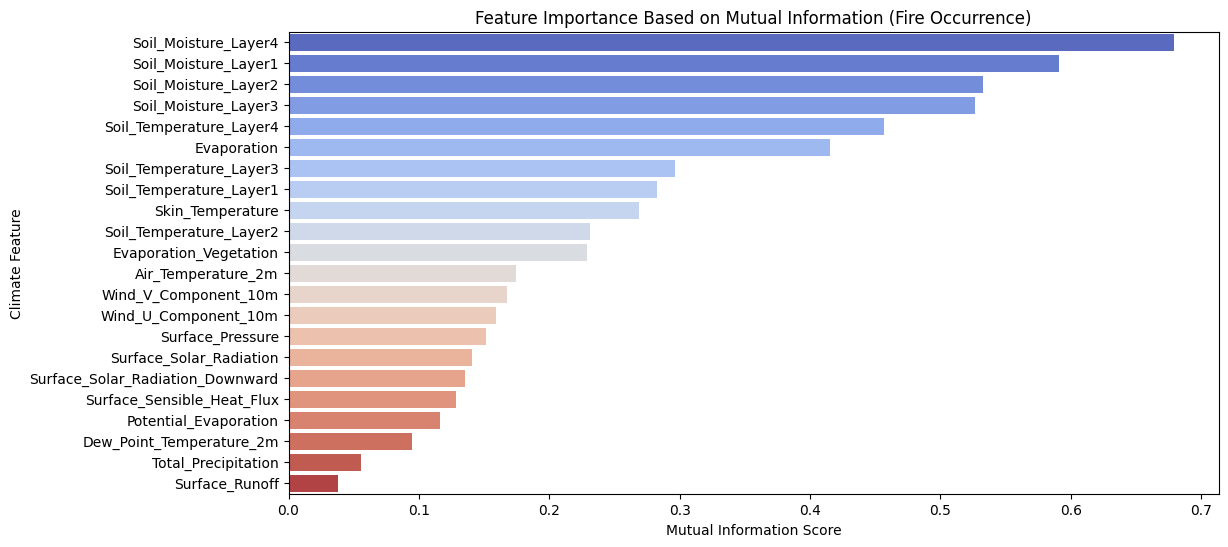

In [355]:
data_for_mutual_inf = data_just_climate_variables.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize only climate variables
data_for_mutual_inf[climate_variables] = scaler.fit_transform(data_for_mutual_inf[climate_variables])


# Define features (X) and target (y)
X = data_for_mutual_inf[climate_variables]  # Climate variables
y = data_for_mutual_inf["Fire_Occurrence"]  # Binary target

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)

# Convert to DataFrame
mi_scores_df = pd.DataFrame({'Feature': climate_variables, 'Mutual_Information': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual_Information', ascending=False)

# Print Top Features
print("Top Features Contributing to Fire Occurrence (Mutual Information):")
print(mi_scores_df)


plt.figure(figsize=(12, 6))
sns.barplot(x='Mutual_Information', y='Feature', data=mi_scores_df, palette="coolwarm")
plt.title("Feature Importance Based on Mutual Information (Fire Occurrence)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Climate Feature")
plt.show()


##### **Top Features Influencing Fire Occurrence:**

  - **Soil Moisture (Layer 4, Layer 1, Layer 2, Layer 3):** These are the most critical factors, with Layer 4 showing the highest mutual information score (~0.7). This suggests that deeper soil moisture levels have a strong correlation with fire occurrence.
  - **Soil Temperature (Layer 4, Layer 3, Layer 1):** Soil temperature also plays a significant role, particularly in the deeper layers, indicating that prolonged heat stress on the ground could be a strong predictor of wildfires.
  - **Evaporation:** This is another major contributor, reinforcing the idea that drying conditions increase fire likelihood.

##### **Moderately Important Features:**

  - **Skin Temperature:** Surface-level heat also contributes, though it is less influential than deeper soil temperatures.
  - **Evaporation from Vegetation:** Suggests that vegetation dryness contributes to fire occurrence but is less significant than soil moisture.
  - **Air Temperature (2m):** Atmospheric heat at 2 meters above ground influences fire probability but not as strongly as soil-based variables.

##### **Lower Impact Features:**

  - **Wind Components (U and V at 10m):** Wind direction and speed have some influence but are not as strong as moisture and temperature-related variables.
  - **Surface Pressure & Solar Radiation:** These show weaker correlations, meaning that while they may have indirect effects, they are not primary drivers.
  - **Potential Evaporation:** Plays a minor role, possibly because it represents a theoretical maximum rather than actual moisture loss.
  - **Dew Point Temperature (2m):** Indicates atmospheric moisture availability but has a relatively low impact.
  - **Total Precipitation & Surface Runoff:** These have the lowest mutual information scores, suggesting that while precipitation is important for long-term fire prevention, its short-term effect leading up to a fire is minimal.

#### **Summary:**

The analysis highlights that soil moisture, soil temperature, and evaporation are the most critical climate variables influencing fire occurrence. 

Specifically, deep soil moisture (Layer 4) is the strongest predictor, indicating that prolonged dry conditions deep in the soil play a crucial role in fire susceptibility. 

Surface temperature, evaporation from vegetation, and air temperature also contribute but to a lesser extent. 

Wind, surface pressure, and precipitation have relatively low direct influence, suggesting that fires are more strongly driven by long-term drying trends rather than short-term weather changes.

These might be indicators of a difference between what **igniting fires** vs. what **propagates fires.**

### Correlation of Features flagged in Mutual Info and Fire Occurrence

In [356]:
dataset_with_all_variables_and_rows.describe()

Latitude_1d  Longitude_1d        Date           Time  \
count  1.032556e+06  1.032556e+06     1032556  542328.000000   
mean   3.527109e+01 -6.816855e+00  2014-05-07     932.916464   
min    2.760000e+01 -2.850000e+01  2000-10-01       5.000000   
25%    2.900000e+01 -9.200000e+00  2009-08-03     230.000000   
50%    3.700000e+01 -7.100000e+00  2015-03-26    1130.000000   
75%    4.170000e+01 -5.100000e+00  2019-03-28    1321.000000   
max    4.370000e+01  4.200000e+00  2024-09-30    2359.000000   
std    6.202413e+00  3.453289e+00         NaN     619.776900   

       Fire_Radiative_Power_MW   Brightness_K  Confidence_Level  \
count            542328.000000  542328.000000     542328.000000   
mean                 20.661799     318.311345         56.441556   
min                   0.000000     278.510000          0.000000   
25%                   1.870000     304.650000         50.000000   
50%                   6.500000     314.400000         50.000000   
75%                  16.200000     329.580000         65.000000   
max                2601.466667     432.325000        100.000000   
std                  61.018876      16.734983         16.813616   

       Track_Width_km      Fire_Type  Brightness_T31_K  ...  \
count   542328.000000  542328.000000     542328.000000  ...   
mean         0.821551       0.822543        291.398350  ...   
min          0.360000       0.000000        234.710000  ...   
25%          0.430000       0.000000        284.200000  ...   
50%          0.740000       0.000000        290.385000  ...   
75%          1.100000       2.000000        298.150000  ...   
max          2.000000       3.000000        354.772500  ...   
std          0.402427       0.995567         10.641403  ...   

       Leaf_Area_Index_High_Vegetation  Leaf_Area_Index_Low_Vegetation  \
count                     1.014350e+06                    1.014350e+06   
mean                      1.288836e+00                    1.309868e+00   
min                       0.000000e+00                    0.000000e+00   
25%                       0.000000e+00                    1.347656e-01   
50%                       1.280396e+00                    1.317871e+00   
75%                       2.324463e+00                    2.226318e+00   
max                       6.000000e+00                    4.412598e+00   
std                       1.404737e+00                    1.088773e+00   

      Potential_Evaporation  Surface_Pressure  Surface_Runoff  \
count          1.014350e+06      1.014350e+06    1.014350e+06   
mean          -3.949297e+00      9.600700e+02    8.956523e-06   
min           -3.683121e+01      7.867925e+02    0.000000e+00   
25%           -5.520533e+00      9.392787e+02    0.000000e+00   
50%           -3.382411e+00      9.596044e+02    0.000000e+00   
75%           -2.004639e+00      9.894431e+02    1.639128e-07   
max            1.916289e-01      1.035966e+03    2.617498e-02   
std            2.532204e+00      3.323577e+01    1.637205e-04   

       Surface_Sensible_Heat_Flux  Surface_Solar_Radiation  \
count                  1014350.00                1014350.0   
mean                  -3265630.75               11565449.0   
min                  -15410048.00                 163426.0   
25%                   -4991766.00                7050916.0   
50%                   -2494596.00               10030055.0   
75%                   -1156709.00               16460001.0   
max                   11032979.00               26969734.0   
std                    2813903.00                5727266.5   

       Surface_Solar_Radiation_Downward  Total_Precipitation  Fire_Occurrence  
count                         1014350.0         1.014350e+06     1.032556e+06  
mean                         14454843.0         3.029464e-01     5.252287e-01  
min                            183184.0         0.000000e+00     0.000000e+00  
25%                           8831346.0         0.000000e+00     0.000000e+00  
50%                          12412368.0        

In [357]:
dataset_with_all_variables_and_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032556 entries, 0 to 1522879
Data columns (total 43 columns):
 #   Column                            Non-Null Count    Dtype               
---  ------                            --------------    -----               
 0   Latitude_1d                       1032556 non-null  float64             
 1   Longitude_1d                      1032556 non-null  float64             
 2   Date                              1032556 non-null  date32[day][pyarrow]
 3   Time                              542328 non-null   float64             
 4   Fire_Radiative_Power_MW           542328 non-null   float64             
 5   Brightness_K                      542328 non-null   float64             
 6   Confidence_Level                  542328 non-null   float64             
 7   Track_Width_km                    542328 non-null   float64             
 8   Fire_Type                         542328 non-null   float64             
 9   Brightness_T31_K             

Fire_Occurrence                     1.000000
Soil_Moisture_Layer4                0.845761
Soil_Moisture_Layer1                0.828585
Soil_Moisture_Layer2                0.815756
Soil_Moisture_Layer3                0.813920
Surface_Runoff                      0.239182
Surface_Sensible_Heat_Flux          0.205036
Dew_Point_Temperature_2m            0.173858
Total_Precipitation                 0.117697
Wind_V_Component_10m                0.068620
Potential_Evaporation               0.060724
Surface_Pressure                   -0.060648
Surface_Solar_Radiation            -0.068096
Wind_U_Component_10m               -0.092045
Surface_Solar_Radiation_Downward   -0.205295
Evaporation_Vegetation             -0.379181
Air_Temperature_2m                 -0.411044
Soil_Temperature_Layer2            -0.522078
Skin_Temperature                   -0.584142
Soil_Temperature_Layer1            -0.602475
Soil_Temperature_Layer3            -0.613966
Evaporation                        -0.733842
Soil_Tempe

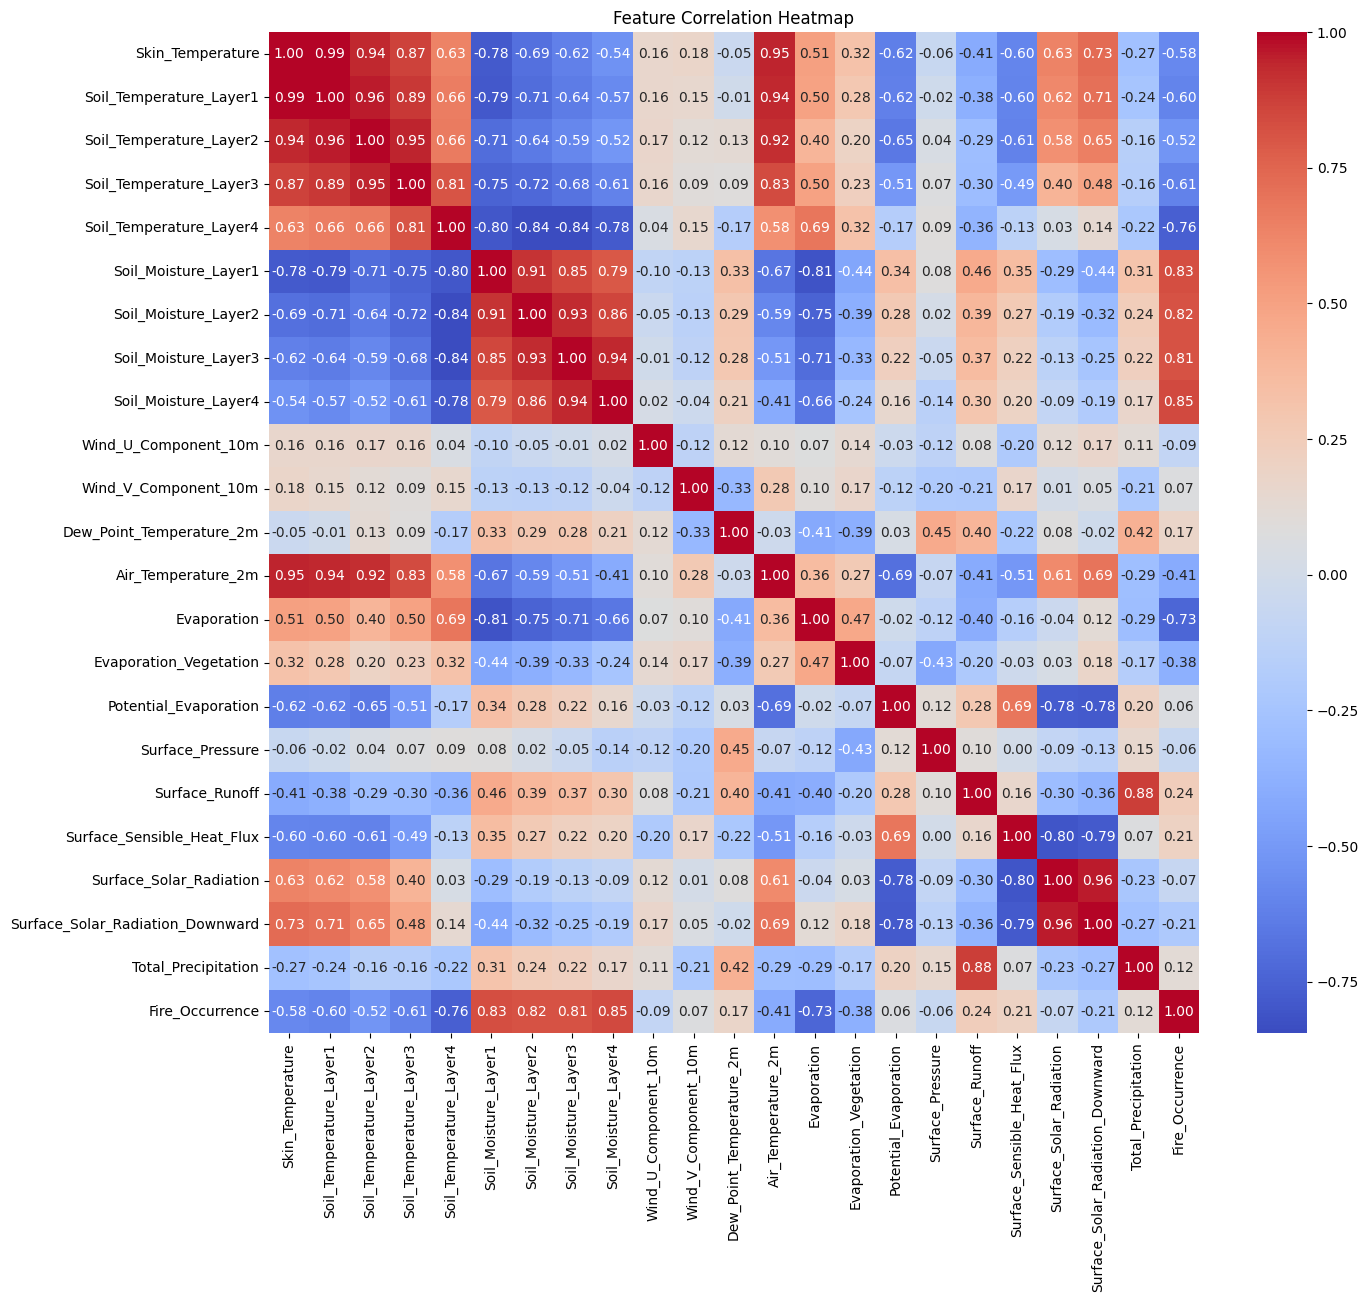

In [358]:
# Compute correlation
data_for_corr = dataset_with_all_variables_and_rows.copy()

def correlation_og_variables(data_for_corr):

  data_for_corr = data_for_corr[["Latitude_1d", "Longitude_1d", "Climate_Date"] + climate_variables + ['Fire_Occurrence']]

  data_for_corr = data_for_corr.groupby(["Latitude_1d", "Longitude_1d", "Climate_Date"]).mean().reset_index()

  data_for_corr = data_for_corr[climate_variables + ['Fire_Occurrence']]

  scaler = MinMaxScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(data_for_corr), columns=data_for_corr.columns)

  corr_matrix = df_scaled.corr(method='spearman')

  print(corr_matrix["Fire_Occurrence"].sort_values(ascending=False))  # Sort by strongest correlation

  # Heatmap to visualize correlations
  plt.figure(figsize=(15, 13))
  sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
  plt.title("Feature Correlation Heatmap")
  plt.show()

correlation_og_variables(data_for_corr)


#### **Bullet Point Summary of the Feature Correlation Heatmap:**

**Strong Negative Correlation with Fire Occurrence:**

  - **Soil Moisture (All Layers)** shows the strongest negative correlation with fire occurrence (up to 0.85 for deeper layers).
  - **Soil Temperature (Layer 4)** also has a strong negative correlation (-0.76), suggesting that deep soil temperatures are associated with fire occurrence.
  - **Skin Temperature** and **Air Temperature (2m)** show moderate negative correlations with fire occurrence.

**Moderate Positive Correlation with Fire Occurrence:**
  - **Dew Point Temperature** also presents a moderate positive correlation with fire occurrence, possibly tying higher dew point temperature with hotter atmosphere.
  - **Surface Sensible Heat Flux & Surface Runoff** also have a noticeable positive correlation, indicating that higher energy flux and higher water surface runoff may contribute to fire conditions.

- **Weak or No Correlation:**
  - **Wind Components (U and V at 10m)** show very low correlation values, suggesting that wind speed alone does not directly influence fire occurrence.
  - **Surface Pressure & Solar Radiation** have weak correlations, meaning they likely play an indirect role.

- **Strong Internal Correlations:**
  - **Soil Temperature and Soil Moisture Layers** are highly correlated among themselves.
  - **Evaporation and Air Temperature (2m)** show strong correlation, indicating **higher air temperatures increase moisture loss from the surface**.
  - **Surface Solar Radiation and Skin Temperature** are also highly correlated.

### **Key Takeaways:**

- **Fire occurrence is primarily influenced by soil moisture, soil temperature, and evaporation rates.**
- **The relationship between Soil Moisture and Fire Occurrence has to be explored as it appears counter-intuitive**
- **Short-term weather factors like wind speed, surface temperature and precipitation have weaker direct correlations with fire occurrence.**
- **Monitoring soil moisture loss and temperature trends is crucial for wildfire prediction models.**


### Same Correlation - Wildfire Season Only

Here we are narrowing down the observable period in order to verify the more moderate correlations and whether we are ok to consider them going forward.

Fire_Occurrence                     1.000000
Soil_Moisture_Layer4                0.845539
Soil_Moisture_Layer1                0.831742
Soil_Moisture_Layer2                0.820315
Soil_Moisture_Layer3                0.800820
Dew_Point_Temperature_2m            0.198718
Surface_Runoff                      0.148875
Wind_V_Component_10m                0.108902
Total_Precipitation                 0.102120
Surface_Sensible_Heat_Flux          0.089283
Surface_Solar_Radiation             0.025177
Surface_Pressure                    0.018557
Potential_Evaporation              -0.045278
Surface_Solar_Radiation_Downward   -0.128051
Wind_U_Component_10m               -0.169672
Evaporation_Vegetation             -0.409508
Air_Temperature_2m                 -0.414427
Soil_Temperature_Layer2            -0.610980
Skin_Temperature                   -0.619484
Soil_Temperature_Layer1            -0.652764
Soil_Temperature_Layer3            -0.727293
Soil_Temperature_Layer4            -0.752619
Evaporatio

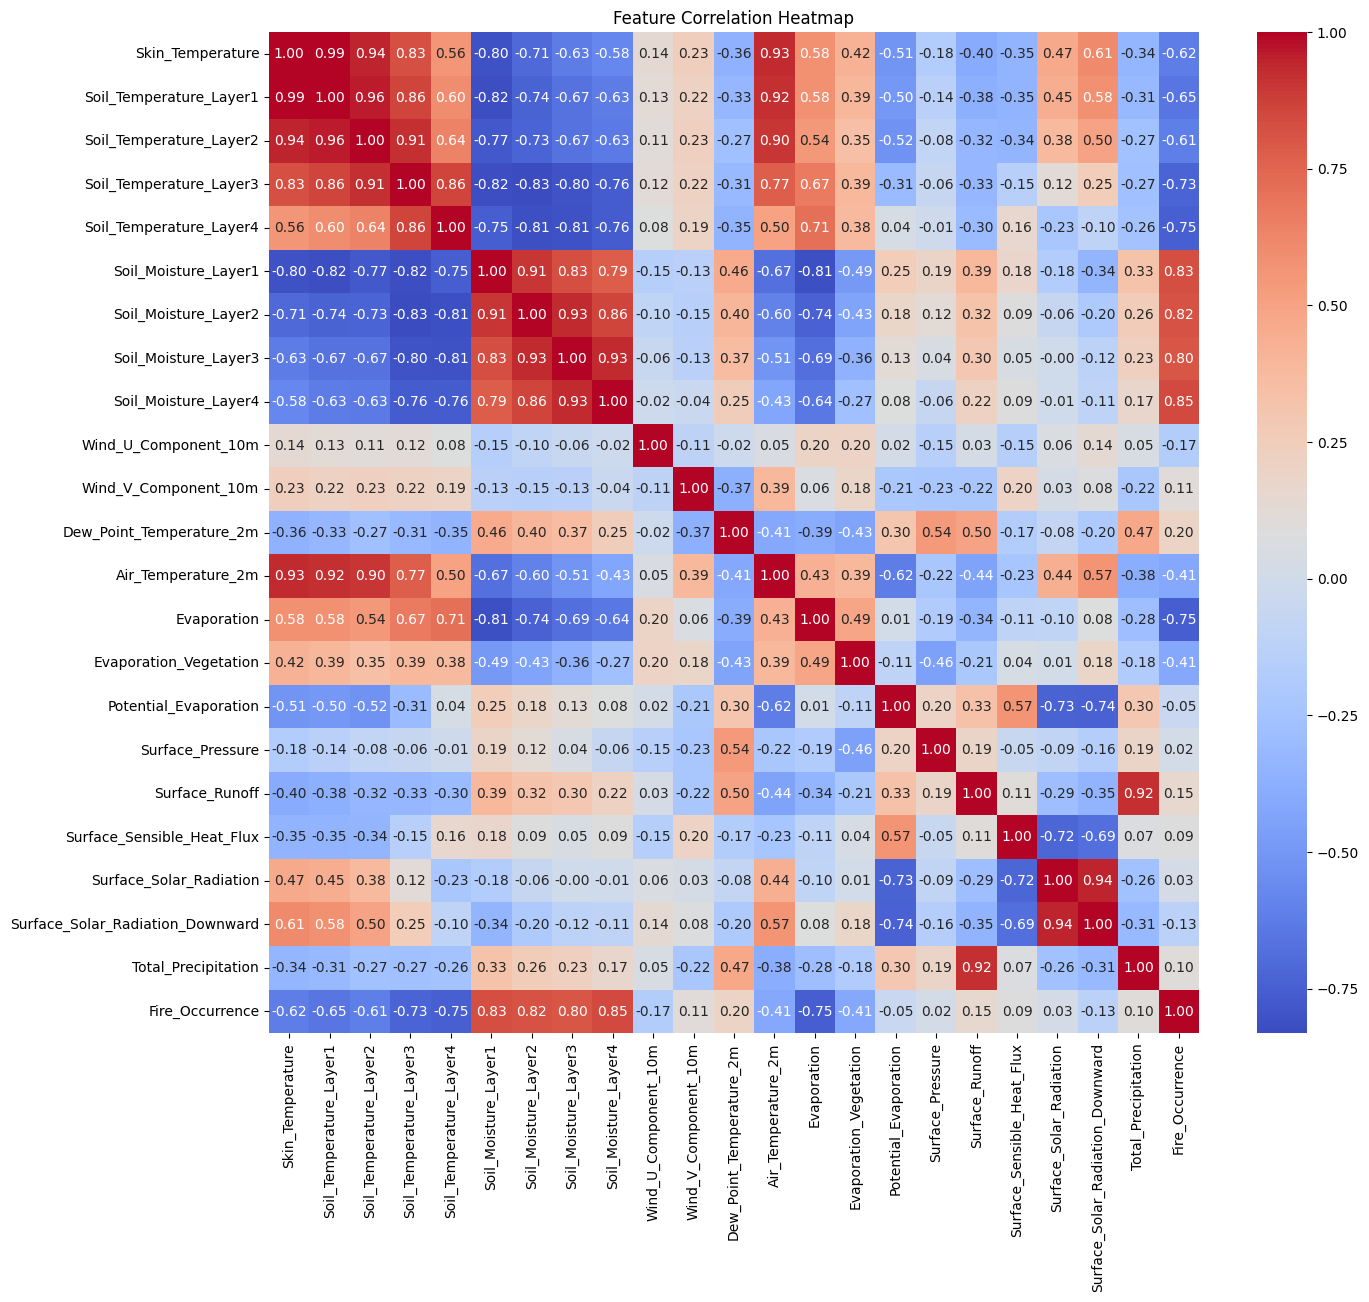

In [359]:
# Compute correlation

data_for_corr = dataset_with_all_variables_and_rows.copy()

data_for_corr = data_for_corr[data_for_corr["Climate_Date"].dt.month.isin([5,6,7,8,9,10,11])]

correlation_og_variables(data_for_corr)

As expected we observe an intensifying of the correlations seen in the first matrix, highlighting the role of seasonality in these correlations.

The correlations intensify but still appear inversed. Let's explore further

## Generating Indexes

As observed in the correlations computed, some of the relationships appear to have correlations that appear counter intuitive. For example, High Soil Moisture is correlated with Fire Occurrence, which is unexpected.

After careful investigation it seems that the Soil Moisture levels observed are naturally high because of the region mostly affected - Galicia, northern Portugal. This geographic area is known for highly forested areas, humidity and colder temperatures. In turn, the high soil moisture enables the area to grow much more vegetation that in other parts of the Peninsula, possibly highlighting the amount of fuel the fire encounters, rather than the air temperatures or radiation.

So how can we investigate this further? As seen in the EDA phase, there is a decline in some variables in the lead up to a fire.

Because of this I will engineer some features that might unlock the key to our correlations, and allows us to proceed with the Machine Learning Part.

**Here I will aim to:**

1. **Capture Soil Drying Trends (Soil Drying Index)**
   - Soil moisture levels significantly impact fire risk. By calculating the change in soil moisture over a 5-step (time-lagged) period, you can measure how quickly the land is drying out, which is a crucial precursor to wildfires.

2. **Measure Soil & Air Heating Trends (Heating Index)**
   - Soil and air temperatures influence fire conditions. The Heating Index will track changes in soil temperature over time, helping to identify sustained heating events that may lead to fire-prone conditions.

3. **Compute Vapor Pressure Deficit (VPD)**
   - VPD is a key indicator of how dry the atmosphere is and directly impacts vegetation drying. Please see articles:
       - https://blog.ucsusa.org/carly-phillips/what-is-vapor-pressure-deficit-vpd-and-what-is-its-connection-to-wildfires/
       - https://pulsegrow.com/blogs/learn/vpd?srsltid=AfmBOorJGYTr-SRLgXP4nEWj-mmXyzGYJqLfEF-LQpCbAxzYI_363R7X
    - Calculations confirmed: https://andrewsforest.oregonstate.edu/sites/default/files/lter/data/studies/ms01/dewpt_vpd_calculations.pdf 
   - Higher VPD means drier air, leading to greater moisture loss in plants, increasing fire susceptibility.
   - By computing VPD trends over time, I gain a better understanding of atmospheric conditions that may promote fires.

4. **Track Evaporation & Vegetation Moisture Loss**
   - Evaporation Decrease Index and Evaporation Vegetation Decrease Index measure how much moisture is being lost from the land and vegetation.
   - Declining evaporation rates suggest drying conditions, which can increase fire risk.

5. **Monitor Surface Runoff & Precipitation Trends**
   - Surface Runoff Decrease Index & Precipitation Decrease Index help identify drying periods with little to no water replenishment.
   - A decline in precipitation and runoff indicates prolonged drought-like conditions, which contribute to fire spread.

6. **Dropping NaN Values Created by Shifting**
   - The time-lagged calculations create missing values for earlier time steps. I will remove NaN values to ensure your dataset remains clean for machine learning models.


#### **Expected Benefits:**

- **Improved Predictive Performance**  
  - These new features will provide my model with temporal trends, allowing it to detect patterns leading up to a fire event rather than relying solely on static values.
  
- **Enhanced Interpretability**  
  - By explicitly calculating how moisture, temperature, and evaporation rates change over time, I gain a clearer understanding of environmental conditions driving wildfires.

- **Better Risk Assessment**  
  - Identifying drying soil, increasing VPD, and declining moisture levels can help develop early warning systems for wildfire prediction.



In [360]:
# Load the dataset
df = dataset_with_all_variables_and_rows.copy()

df = df[['Latitude_1d'] + ['Longitude_1d'] + ['Climate_Date'] + ['Climate_Time'] + ['Country'] + climate_variables + ['Fire_Occurrence']]

# Sort by Latitude, Longitude, and Date to ensure time-sequencing per location
df = df.sort_values(by=["Latitude_1d", "Longitude_1d", "Climate_Date", 'Climate_Time'])

df = df.dropna()

df.head(10)

Latitude_1d  Longitude_1d Climate_Date  Climate_Time Country  \
53         29.0         -13.7   2000-10-01          12.0   Spain   
54         29.0         -13.7   2000-10-01          17.0   Spain   
57         29.0         -13.7   2000-10-02          12.0   Spain   
58         29.0         -13.7   2000-10-02          17.0   Spain   
61         29.0         -13.7   2000-10-03          12.0   Spain   
62         29.0         -13.7   2000-10-03          17.0   Spain   
65         29.0         -13.7   2000-10-04          12.0   Spain   
66         29.0         -13.7   2000-10-04          17.0   Spain   
69         29.0         -13.7   2000-10-05          12.0   Spain   
70         29.0         -13.7   2000-10-05          17.0   Spain   

    Skin_Temperature  Soil_Temperature_Layer1  Soil_Temperature_Layer2  \
53         31.779938                29.547760                25.446198   
54         31.163239                30.624176                26.121735   
57         35.406158                32.235260                25.537018   
58         33.364655                32.690826                26.476959   
61         35.014313                31.937164                25.676422   
62         33.649323                32.905426                26.592194   
65         37.929352                34.006744                25.732330   
66         35.829987                34.888092                26.902496   
69         40.263336                35.692780                25.929840   
70         35.545319                34.825104                27.130280   

    Soil_Temperature_Layer3  Soil_Temperature_Layer4  ...  Evaporation  \
53                26.371002                24.467438  ...    -0.105007   
54                26.356354                24.470367  ...    -0.184527   
57                26.290680                24.482086  ...    -0.081602   
58                26.281647                24.483307  ...    -0.181552   
61                26.237457                24.492828  ...    -0.046586   
62                26.231110                24.496735  ...    -0.111426   
65                26.192535                24.505768  ...    -0.030197   
66                26.191071                24.507721  ...    -0.070999   
69                26.170563                24.518463  ...    -0.034968   
70                26.171295                24.520905  ...    -0.050076   

    Evaporation_Vegetation  Potential_Evaporation  Surface_Pressure  \
53               -0.002750              -4.028551       1000.939331   
54               -0.003732              -7.295430        999.183105   
57               -0.000739              -2.790105       1000.057495   
58               -0.001073              -5.905643        997.701843   
61               -0.000753              -2.316300        998.884949   
62               -0.001078              -5.195864        996.329956   
65               -0.000768              -1.988970        996.936218   
66               -0.001146              -4.896633        994.856201   
69               -0.000875              -1.799759        996.850586   
70               -0.001290              -4.609778        994.974365   

    Surface_Runoff  Surface_Sensible_Heat_Flux  Surface_Solar_Radiation  \
53    1.490116e-08                  -2780352.0                5774912.0   
54    1.490116e-08                  -9319488.0               15308500.0   
57    7.748604e-07                  -3099824.0                7287928.0   
58    7.748604e-07                 -10360452.0               18417214.0   
61    2.384186e-07                  -2467956.0                6495478.0   
62    2.533197e-07                  -8926648.0               16500702.0   
65    5.960464e-08                  -2362306.0                7078106.0   
66    5.960464e-08                  -8928796.0               17997364.0   
69    0.000000e+00                  -2086766.0                7630780.0   
70    0.000000e+00                  -8807368.0               18659204.0   

    Surface_Solar

In [361]:
df.columns

Index(['Latitude_1d', 'Longitude_1d', 'Climate_Date', 'Climate_Time',
       'Country', 'Skin_Temperature', 'Soil_Temperature_Layer1',
       'Soil_Temperature_Layer2', 'Soil_Temperature_Layer3',
       'Soil_Temperature_Layer4', 'Soil_Moisture_Layer1',
       'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3', 'Soil_Moisture_Layer4',
       'Wind_U_Component_10m', 'Wind_V_Component_10m',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m', 'Evaporation',
       'Evaporation_Vegetation', 'Potential_Evaporation', 'Surface_Pressure',
       'Surface_Runoff', 'Surface_Sensible_Heat_Flux',
       'Surface_Solar_Radiation', 'Surface_Solar_Radiation_Downward',
       'Total_Precipitation', 'Fire_Occurrence'],
      dtype='object')

In [362]:
df = df.groupby(["Latitude_1d", "Longitude_1d", "Climate_Date", 'Country']).mean().reset_index()

In [363]:
df = df.sort_values(by=["Latitude_1d", "Longitude_1d", "Climate_Date"])

In [364]:
df.columns

Index(['Latitude_1d', 'Longitude_1d', 'Climate_Date', 'Country',
       'Climate_Time', 'Skin_Temperature', 'Soil_Temperature_Layer1',
       'Soil_Temperature_Layer2', 'Soil_Temperature_Layer3',
       'Soil_Temperature_Layer4', 'Soil_Moisture_Layer1',
       'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3', 'Soil_Moisture_Layer4',
       'Wind_U_Component_10m', 'Wind_V_Component_10m',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m', 'Evaporation',
       'Evaporation_Vegetation', 'Potential_Evaporation', 'Surface_Pressure',
       'Surface_Runoff', 'Surface_Sensible_Heat_Flux',
       'Surface_Solar_Radiation', 'Surface_Solar_Radiation_Downward',
       'Total_Precipitation', 'Fire_Occurrence'],
      dtype='object')

In [365]:
def feature_engineering(df):

  # Define the soil moisture variable you want to base the drying index on
  moisture_var1 = "Soil_Moisture_Layer1"
  moisture_var2 = "Soil_Moisture_Layer2"
  moisture_var3 = "Soil_Moisture_Layer3"
  moisture_var4 = "Soil_Moisture_Layer4"

  soil_heat_var1 = "Soil_Temperature_Layer1"
  soil_heat_var2 = "Soil_Temperature_Layer2"
  soil_heat_var3 = "Soil_Temperature_Layer3"
  soil_heat_var4 = "Soil_Temperature_Layer4"

  evap_var1 = "Evaporation"
  evap_var2 = "Evaporation_Vegetation"
  air_temp = "Air_Temperature_2m"
  surf_run = "Surface_Runoff"
  percipitation = "Total_Precipitation"
  dew_p = "Dew_Point_Temperature_2m"

  def calculate_vpd(air_temp, dew_point):

      # Calculate Saturation Vapor Pressure (SVP) in hPa
      svp_air = 6.1078 * np.exp((17.27 * air_temp) / (air_temp + 237.3))
      svp_dew = 6.1078 * np.exp((17.27 * dew_point) / (dew_point + 237.3))

      # Compute VPD (convert hPa → kPa and ensure non-negative)
      vpd = np.maximum((svp_air - svp_dew) / 10, 0)

      return vpd

  # Apply function to your dataset
  df["VPD"] = calculate_vpd(df["Air_Temperature_2m"], df["Dew_Point_Temperature_2m"]).astype(np.float32)


  # Compute drying index using a 6-step forward difference, grouped by coordinates
  # Compute drying index using a 6-step backward difference, ensuring difference appears on the correct row
  df["Soil_Drying_Index_L1"] = df[moisture_var1] - df.groupby(["Latitude_1d", "Longitude_1d"])[moisture_var1].transform(lambda x: x.shift(5))
  df["Soil_Drying_Index_L2"] = df[moisture_var2] - df.groupby(["Latitude_1d", "Longitude_1d"])[moisture_var2].transform(lambda x: x.shift(5))
  df["Soil_Drying_Index_L3"] = df[moisture_var3] - df.groupby(["Latitude_1d", "Longitude_1d"])[moisture_var3].transform(lambda x: x.shift(5))
  df["Soil_Drying_Index_L4"] = df[moisture_var4] - df.groupby(["Latitude_1d", "Longitude_1d"])[moisture_var4].transform(lambda x: x.shift(5))

  df["Heating_Index_L1"] = df[soil_heat_var1] - df.groupby(["Latitude_1d", "Longitude_1d"])[soil_heat_var1].transform(lambda x: x.shift(5))
  df["Heating_Index_L2"] = df[soil_heat_var2] - df.groupby(["Latitude_1d", "Longitude_1d"])[soil_heat_var2].transform(lambda x: x.shift(5))
  df["Heating_Index_L3"] = df[soil_heat_var3] - df.groupby(["Latitude_1d", "Longitude_1d"])[soil_heat_var3].transform(lambda x: x.shift(5))
  df["Heating_Index_L4"] = df[soil_heat_var4] - df.groupby(["Latitude_1d", "Longitude_1d"])[soil_heat_var4].transform(lambda x: x.shift(5))

  df["VPD_Fire_Risk"] = df['VPD'] - df.groupby(["Latitude_1d", "Longitude_1d"])['VPD'].transform(lambda x: x.shift(5))


  df['Soil_Drying_Index_L1'] = df['Soil_Drying_Index_L1'] * -1
  df['Soil_Drying_Index_L2'] = df['Soil_Drying_Index_L2'] * -1
  df['Soil_Drying_Index_L3'] = df['Soil_Drying_Index_L3'] * -1
  df['Soil_Drying_Index_L4'] = df['Soil_Drying_Index_L4'] * -1


  df["Evaporation_Decrease_Index"] = df[evap_var1] - df.groupby(["Latitude_1d", "Longitude_1d"])[evap_var1].transform(lambda x: x.shift(5))
  df["Evaporation_Vegetation_Decrease_Index"] = df[evap_var2] - df.groupby(["Latitude_1d", "Longitude_1d"])[evap_var2].transform(lambda x: x.shift(5))
  df["Air_Temperature_2m_Index"] = df[air_temp] - df.groupby(["Latitude_1d", "Longitude_1d"])[air_temp].transform(lambda x: x.shift(5))
  df["Surface_Runoff_Decrease_Index"] = df[surf_run] - df.groupby(["Latitude_1d", "Longitude_1d"])[surf_run].transform(lambda x: x.shift(5))
  df["Precipitation_Decrease_Index"] = df[percipitation] - df.groupby(["Latitude_1d", "Longitude_1d"])[percipitation].transform(lambda x: x.shift(5))
  df["Dew_Point_Temperature_2m_Decrease_Index"] = df[dew_p] - df.groupby(["Latitude_1d", "Longitude_1d"])[dew_p].transform(lambda x: x.shift(5))


  df["Evaporation_Decrease_Index"] *= -1
  df["Surface_Runoff_Decrease_Index"] *= -1
  df["Precipitation_Decrease_Index"] *= -1
  df["Dew_Point_Temperature_2m_Decrease_Index"] *= -1
  df["Evaporation_Vegetation_Decrease_Index"] *= -1

  return df

df = feature_engineering(df)

# Drop NaN values created by shifting
df.dropna(inplace=True)

df_with_indexes = df.copy()


In [366]:
df_with_indexes.columns

Index(['Latitude_1d', 'Longitude_1d', 'Climate_Date', 'Country',
       'Climate_Time', 'Skin_Temperature', 'Soil_Temperature_Layer1',
       'Soil_Temperature_Layer2', 'Soil_Temperature_Layer3',
       'Soil_Temperature_Layer4', 'Soil_Moisture_Layer1',
       'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3', 'Soil_Moisture_Layer4',
       'Wind_U_Component_10m', 'Wind_V_Component_10m',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m', 'Evaporation',
       'Evaporation_Vegetation', 'Potential_Evaporation', 'Surface_Pressure',
       'Surface_Runoff', 'Surface_Sensible_Heat_Flux',
       'Surface_Solar_Radiation', 'Surface_Solar_Radiation_Downward',
       'Total_Precipitation', 'Fire_Occurrence', 'VPD', 'Soil_Drying_Index_L1',
       'Soil_Drying_Index_L2', 'Soil_Drying_Index_L3', 'Soil_Drying_Index_L4',
       'Heating_Index_L1', 'Heating_Index_L2', 'Heating_Index_L3',
       'Heating_Index_L4', 'VPD_Fire_Risk', 'Evaporation_Decrease_Index',
       'Evaporation_Vegetation_Decrea

In [367]:
df_with_indexes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394760 entries, 5 to 408389
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Latitude_1d                              394760 non-null  float64       
 1   Longitude_1d                             394760 non-null  float64       
 2   Climate_Date                             394760 non-null  datetime64[ns]
 3   Country                                  394760 non-null  object        
 4   Climate_Time                             394760 non-null  float32       
 5   Skin_Temperature                         394760 non-null  float32       
 6   Soil_Temperature_Layer1                  394760 non-null  float32       
 7   Soil_Temperature_Layer2                  394760 non-null  float32       
 8   Soil_Temperature_Layer3                  394760 non-null  float32       
 9   Soil_Temperature_Layer4        

### Engineered Features Correlation with Fire Occurrence

Fire_Occurrence                            1.000000
Soil_Drying_Index_L4                       0.298381
Soil_Drying_Index_L3                       0.197140
Soil_Drying_Index_L2                       0.134377
Soil_Drying_Index_L1                       0.067088
Heating_Index_L4                           0.054252
Heating_Index_L3                           0.029182
Heating_Index_L2                           0.017419
Heating_Index_L1                           0.010002
Air_Temperature_2m_Index                   0.007298
VPD_Fire_Risk                              0.005842
Surface_Runoff_Decrease_Index              0.004030
Precipitation_Decrease_Index               0.002495
Dew_Point_Temperature_2m_Decrease_Index   -0.000108
Evaporation_Vegetation_Decrease_Index     -0.000686
Evaporation_Decrease_Index                -0.017470
VPD                                       -0.421326
Name: Fire_Occurrence, dtype: float64


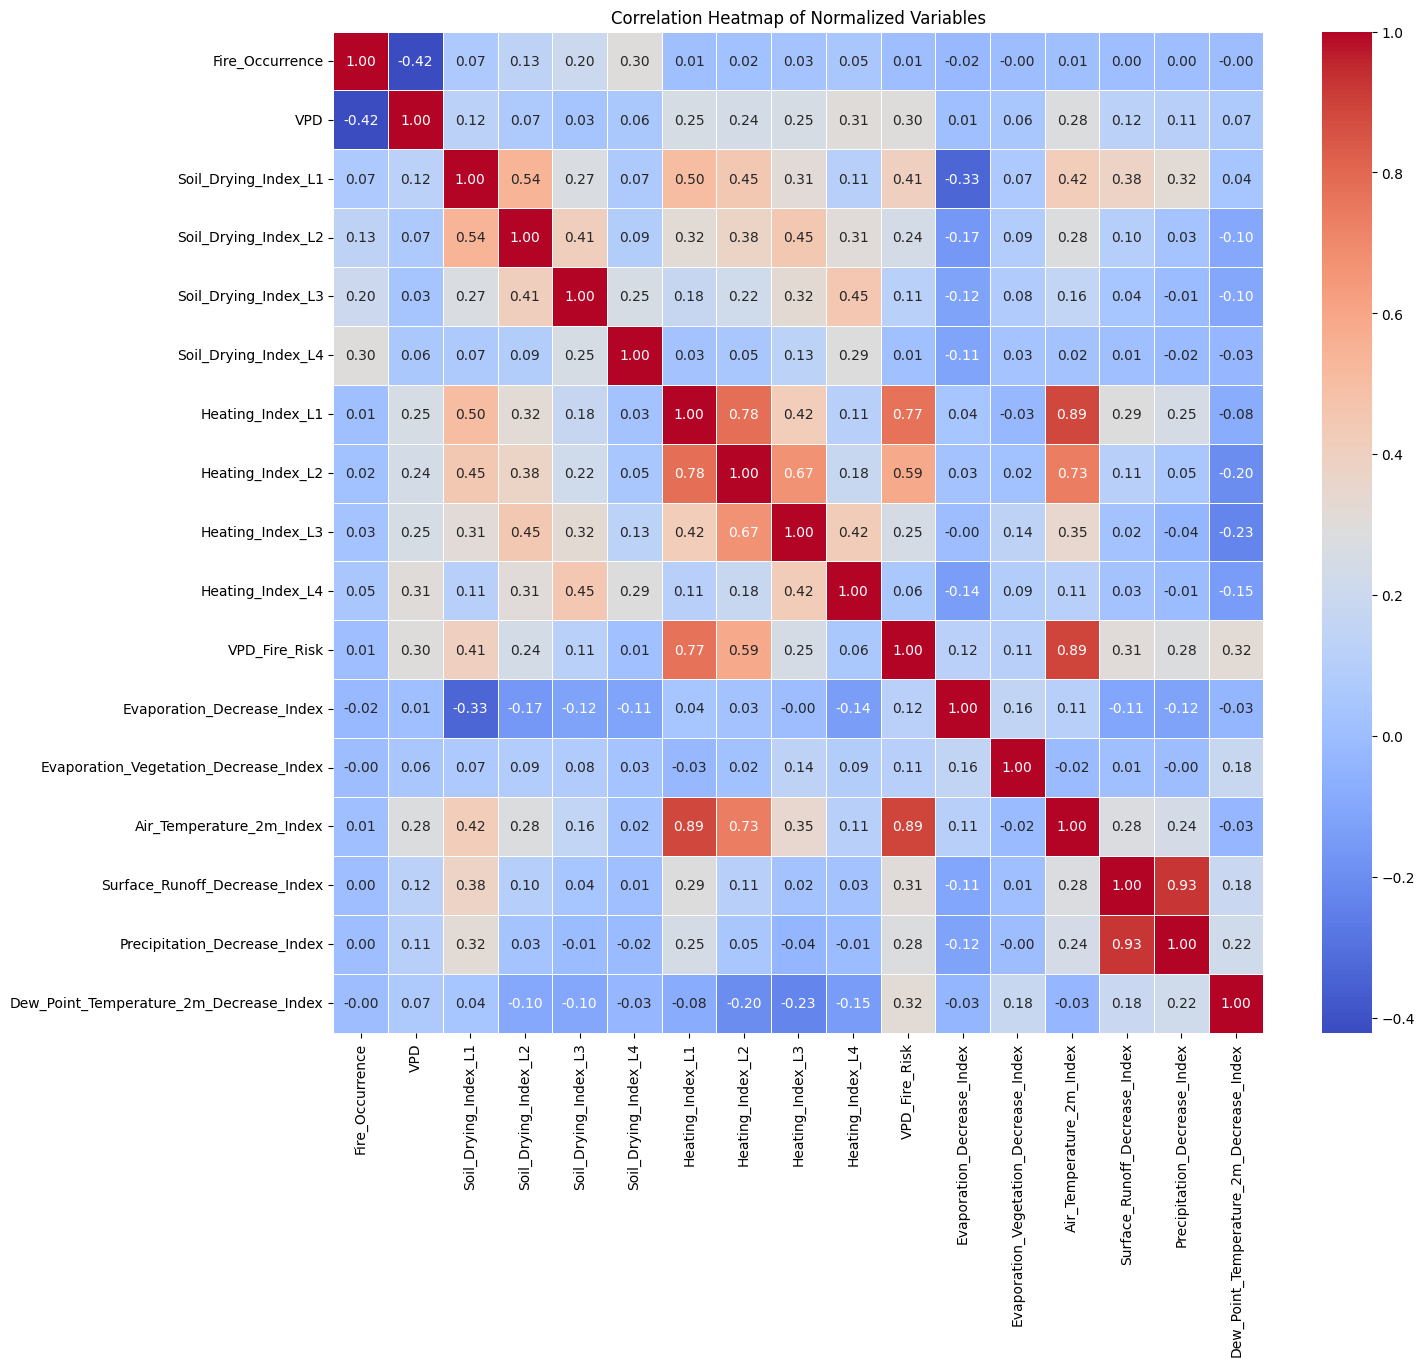

In [368]:
def correlation_enhanced_variables(df_with_indexes):

  # Keep only relevant columns
  relevant_columns = ['Fire_Occurrence', 'VPD', 'Soil_Drying_Index_L1',
       'Soil_Drying_Index_L2', 'Soil_Drying_Index_L3', 'Soil_Drying_Index_L4',
       'Heating_Index_L1', 'Heating_Index_L2', 'Heating_Index_L3',
       'Heating_Index_L4', 'VPD_Fire_Risk', 'Evaporation_Decrease_Index',
       'Evaporation_Vegetation_Decrease_Index', 'Air_Temperature_2m_Index',
       'Surface_Runoff_Decrease_Index', 'Precipitation_Decrease_Index',
       'Dew_Point_Temperature_2m_Decrease_Index']

  df_relevant = df_with_indexes[relevant_columns]

  scaler = MinMaxScaler()
  df_scaled = df_relevant.copy()
  df_scaled.iloc[:, 1:] = scaler.fit_transform(df_scaled.iloc[:, 1:].values)  # Skip Fire_Occurrence


  # Compute correlation with Fire_Occurrence
  correlation_matrix = df_relevant.corr(method = "spearman")

  # Sort correlations for better interpretation
  sorted_correlations = correlation_matrix["Fire_Occurrence"].sort_values(ascending=False)

  # Print sorted correlation values
  print(sorted_correlations)

  plt.figure(figsize=(15, 13))
  sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
  plt.title("Correlation Heatmap of Normalized Variables")
  plt.show()


correlation_enhanced_variables(df_with_indexes)

At first glance it appears that not many of the new engineered features have much of a correlation, other than the Drying Index at the lower levels of Soil (0.20 and 0.30).

As seen from prior Correlation Matrixes, seasonality does have an impact in the relationships observed, so lets narrow down the timeline scope and verify if these new features gradually show to have an impact.

The strong negatvie correlation between Fire Occurrences and VPD is surprising however - something to maybe be investigated further down the line with greater detail.

Now I will narrow down the time period to Wildfire Season (May to Nov), so we only observe any correlations during that time

In [369]:
df_season_only = df_with_indexes[df_with_indexes['Climate_Date'].dt.month.isin([5,6,7,8,9,10,11])]

Fire_Occurrence                            1.000000
Soil_Drying_Index_L4                       0.487789
Soil_Drying_Index_L3                       0.362188
Heating_Index_L4                           0.289397
Soil_Drying_Index_L2                       0.243849
Heating_Index_L3                           0.165939
Soil_Drying_Index_L1                       0.160817
Heating_Index_L2                           0.144259
Heating_Index_L1                           0.123281
Air_Temperature_2m_Index                   0.108324
VPD_Fire_Risk                              0.080122
Evaporation_Vegetation_Decrease_Index      0.049694
Surface_Runoff_Decrease_Index              0.027311
Precipitation_Decrease_Index               0.004358
Dew_Point_Temperature_2m_Decrease_Index   -0.069221
Evaporation_Decrease_Index                -0.098706
VPD                                       -0.384619
Name: Fire_Occurrence, dtype: float64


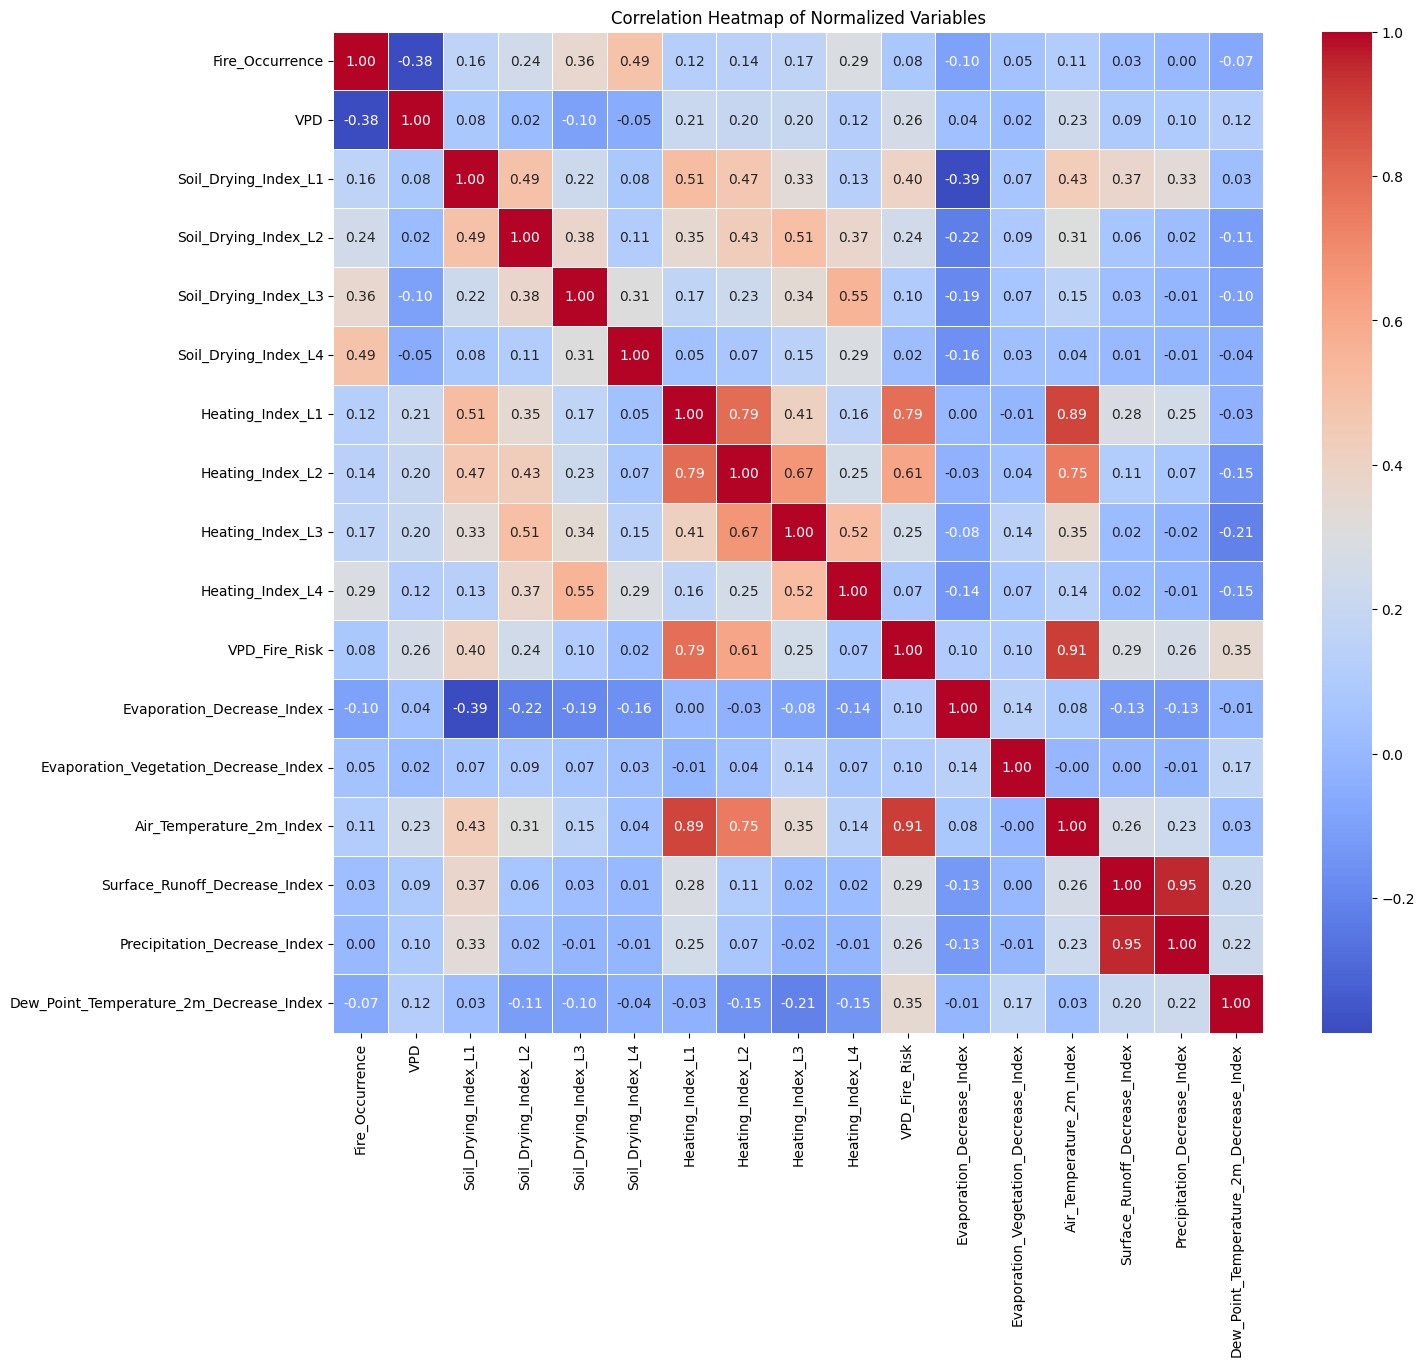

In [370]:
correlation_enhanced_variables(df_season_only)

As expected, some correlations appear to become stronger.

All of the Soil Drying Indexes have strengthen, with the lowest layer showing a correlation of 0.49.
Other relationships start to take shape as well, mainly the Soil Heating Indexes, with special emphasis in the Lower Layer (Layer 4 - 0.29 correlation factor).

Deupoint and Evaporation Decrease Indexes also start to show they negative correlations, confirming that the value itself is not the metric we need to work with, but rather the changes in the metric over a time space.

So as we narrow down the season, we can confirm that Soil Heating and Drying Indexes are important factors for predicting Fire Occurrence, and that Evaporation and Dewpoint Decrease Indexes do seem to bear a negative relationship, indicating that the lower the dew temperature gets, and the lower Evaporations becomes, the higher the fire risk.

In order to verify even further, let's reduce the WildFire Season Perdiod even further - June to September

In [371]:
df_season_only = df_with_indexes[df_with_indexes['Climate_Date'].dt.month.isin([6,7,8,9])]

Fire_Occurrence                            1.000000
Soil_Drying_Index_L4                       0.539120
Soil_Drying_Index_L3                       0.493887
Heating_Index_L4                           0.440043
Soil_Drying_Index_L2                       0.347756
Heating_Index_L3                           0.282219
Soil_Drying_Index_L1                       0.253124
Heating_Index_L2                           0.249761
Heating_Index_L1                           0.223787
Air_Temperature_2m_Index                   0.204170
VPD_Fire_Risk                              0.145071
Evaporation_Vegetation_Decrease_Index      0.081663
Surface_Runoff_Decrease_Index              0.034738
Precipitation_Decrease_Index               0.004304
Evaporation_Decrease_Index                -0.114485
Dew_Point_Temperature_2m_Decrease_Index   -0.119112
VPD                                       -0.402612
Name: Fire_Occurrence, dtype: float64


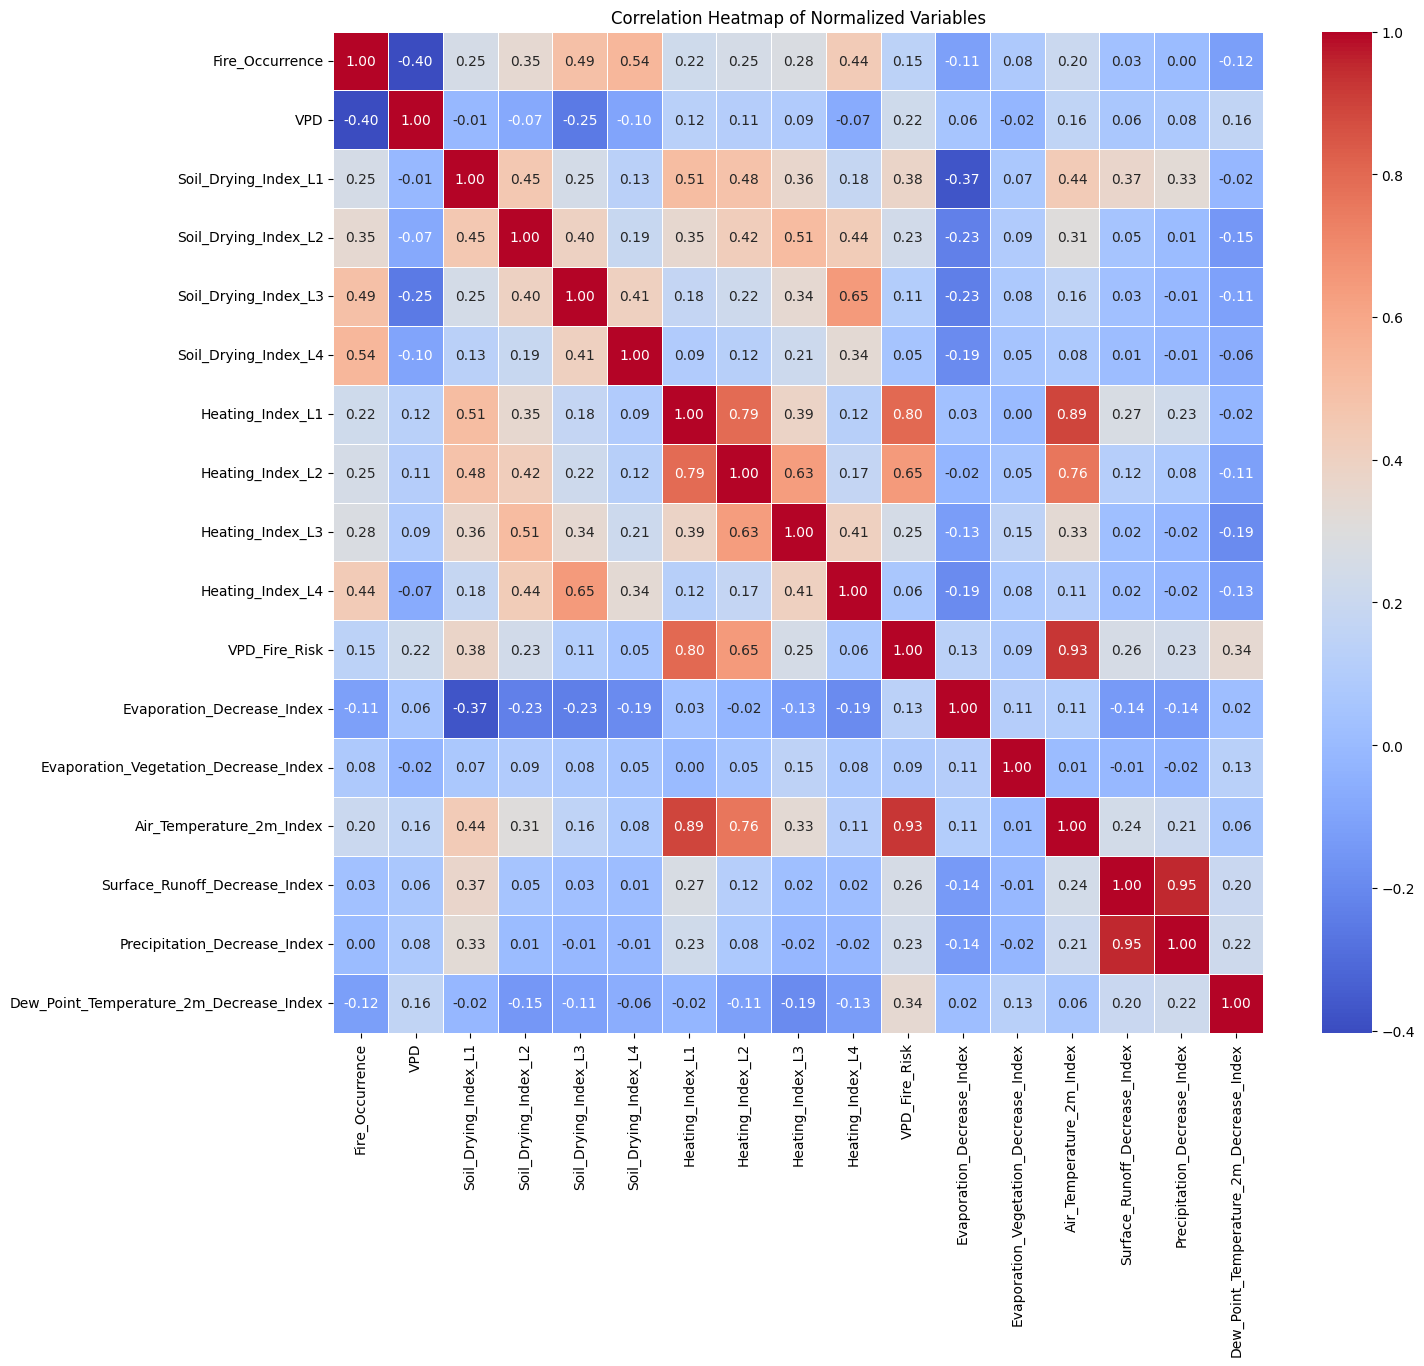

In [372]:
correlation_enhanced_variables(df_season_only)

### Conclusion

As you can see in this last chart, our previous observations are confirmed, and we now can confirm the features to use in our Machine Learning Models. Before we continue, let's also look further into the Soil Metrics and the VPD Metrics


### VPD - A deeper Analysis

Vapor Pressure Deficit (VPD) is the difference between the amount of moisture in the air and the maximum amount of moisture the air can hold at a given temperature. It is a key indicator of atmospheric dryness and is measured in kilopascals (kPa). A higher VPD means drier air, which increases evaporation and plant transpiration, leading to drier vegetation and higher fire risk. Lower VPD indicates more humid conditions, reducing moisture loss and lowering the likelihood of wildfires.

As stated in the below article, there are different thresholds of VPD for different ignition types:
https://www.preventionweb.net/news/human-caused-fires-growing-faster-lightning-fires-western-us-study-suggests#:~:text=The%20estimated%20VPD%20threshold%20for,location%20of%20the%20first%20ignition.

For human caused ignition, we only require 1.1 to 2.1 kPa levels of VPD, whilst for lighting, we require 1.8 to 3.1 kPa.

I have benchmarked a fire risk threshold of 2 kPa as good middel ground, since at this point we cannot establish the sources of ignition.

In [373]:
df_with_indexes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394760 entries, 5 to 408389
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Latitude_1d                              394760 non-null  float64       
 1   Longitude_1d                             394760 non-null  float64       
 2   Climate_Date                             394760 non-null  datetime64[ns]
 3   Country                                  394760 non-null  object        
 4   Climate_Time                             394760 non-null  float32       
 5   Skin_Temperature                         394760 non-null  float32       
 6   Soil_Temperature_Layer1                  394760 non-null  float32       
 7   Soil_Temperature_Layer2                  394760 non-null  float32       
 8   Soil_Temperature_Layer3                  394760 non-null  float32       
 9   Soil_Temperature_Layer4        

In [374]:
df_with_indexes = df_with_indexes.dropna()

df_with_indexes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394760 entries, 5 to 408389
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Latitude_1d                              394760 non-null  float64       
 1   Longitude_1d                             394760 non-null  float64       
 2   Climate_Date                             394760 non-null  datetime64[ns]
 3   Country                                  394760 non-null  object        
 4   Climate_Time                             394760 non-null  float32       
 5   Skin_Temperature                         394760 non-null  float32       
 6   Soil_Temperature_Layer1                  394760 non-null  float32       
 7   Soil_Temperature_Layer2                  394760 non-null  float32       
 8   Soil_Temperature_Layer3                  394760 non-null  float32       
 9   Soil_Temperature_Layer4        

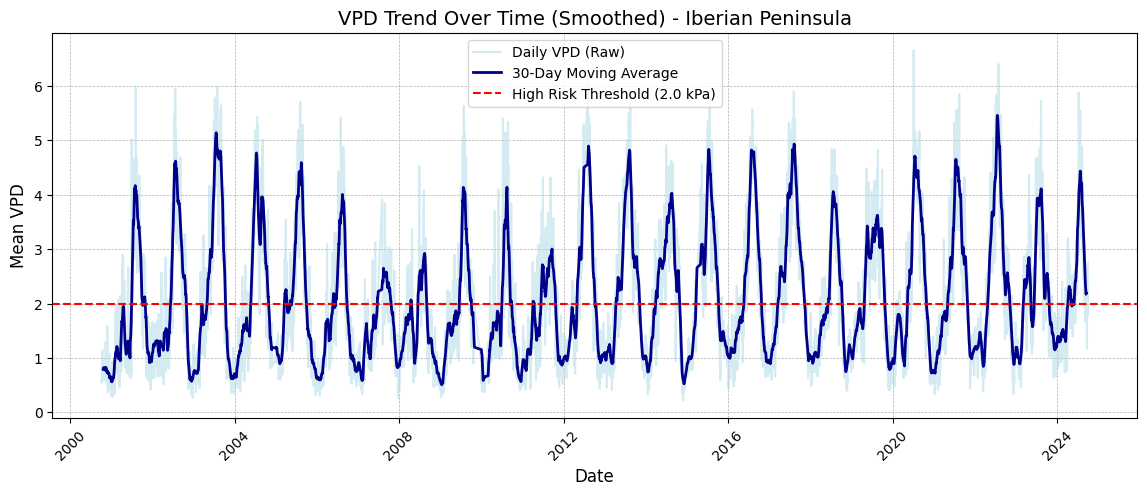

In [375]:

# Copy the DataFrame
vpd_df_time_series = df_with_indexes.copy()
vpd_df_time_series["Climate_Date"] = pd.to_datetime(vpd_df_time_series["Climate_Date"])

# Group by Date and take the mean VPD
vpd_over_time = vpd_df_time_series.groupby("Climate_Date")["VPD"].mean()

# Apply a 30-day rolling average to smooth fluctuations
vpd_over_time_smoothed = vpd_over_time.rolling(window=30, center=True).mean()

plt.figure(figsize=(14,5))  # Wider figure for better readability

# Plot raw data in light blue (optional) and smoothed trend in dark blue
plt.plot(vpd_over_time.index, vpd_over_time, color="lightblue", alpha=0.5, label="Daily VPD (Raw)")
plt.plot(vpd_over_time_smoothed.index, vpd_over_time_smoothed, color="darkblue", linewidth=2, label="30-Day Moving Average")

# Add the wildfire risk threshold line (change 2.0 to your desired threshold)
threshold = 2.0
plt.axhline(y=threshold, color='red', linestyle='--', label=f'High Risk Threshold ({threshold} kPa)')

# Improve x-axis readability
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean VPD", fontsize=12)
plt.title("VPD Trend Over Time (Smoothed) - Iberian Peninsula", fontsize=14)

# Reduce the number of x-axis ticks
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Add a legend for clarity
plt.legend()

plt.show()


- This graph shows the trend of Vapor Pressure Deficit (VPD) over time from around the year 2000 to 2024.  
- The light blue line represents the daily raw VPD values, while the dark blue line represents a 30-day moving average, which smooths out short-term fluctuations.  
- There is a clear seasonal pattern, with VPD peaking at regular intervals each year, likely corresponding to warmer and drier months.  
- Over time, there appears to be an increasing trend in peak VPD values, suggesting that periods of high atmospheric dryness are becoming more extreme.  
- Many peaks exceed the high-risk threshold, indicating that fire-prone conditions are frequently occurring.  
- The moving average shows that while there are seasonal fluctuations, the general baseline VPD has remained above or near the risk threshold for extended periods.  
- The last few years (post-2020) show particularly high spikes, reinforcing concerns about rising atmospheric dryness and its potential link to climate change.  


This graph highlights the increasing frequency and intensity of high VPD periods, which correlate with drier atmospheric conditions. Since VPD is a critical factor in wildfire risk, the trend suggests that fire-prone conditions are becoming more persistent and severe over time. This analysis supports the need for closer monitoring and predictive modeling of fire risk based on VPD trends.

In [376]:
df_with_indexes.columns

Index(['Latitude_1d', 'Longitude_1d', 'Climate_Date', 'Country',
       'Climate_Time', 'Skin_Temperature', 'Soil_Temperature_Layer1',
       'Soil_Temperature_Layer2', 'Soil_Temperature_Layer3',
       'Soil_Temperature_Layer4', 'Soil_Moisture_Layer1',
       'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3', 'Soil_Moisture_Layer4',
       'Wind_U_Component_10m', 'Wind_V_Component_10m',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m', 'Evaporation',
       'Evaporation_Vegetation', 'Potential_Evaporation', 'Surface_Pressure',
       'Surface_Runoff', 'Surface_Sensible_Heat_Flux',
       'Surface_Solar_Radiation', 'Surface_Solar_Radiation_Downward',
       'Total_Precipitation', 'Fire_Occurrence', 'VPD', 'Soil_Drying_Index_L1',
       'Soil_Drying_Index_L2', 'Soil_Drying_Index_L3', 'Soil_Drying_Index_L4',
       'Heating_Index_L1', 'Heating_Index_L2', 'Heating_Index_L3',
       'Heating_Index_L4', 'VPD_Fire_Risk', 'Evaporation_Decrease_Index',
       'Evaporation_Vegetation_Decrea

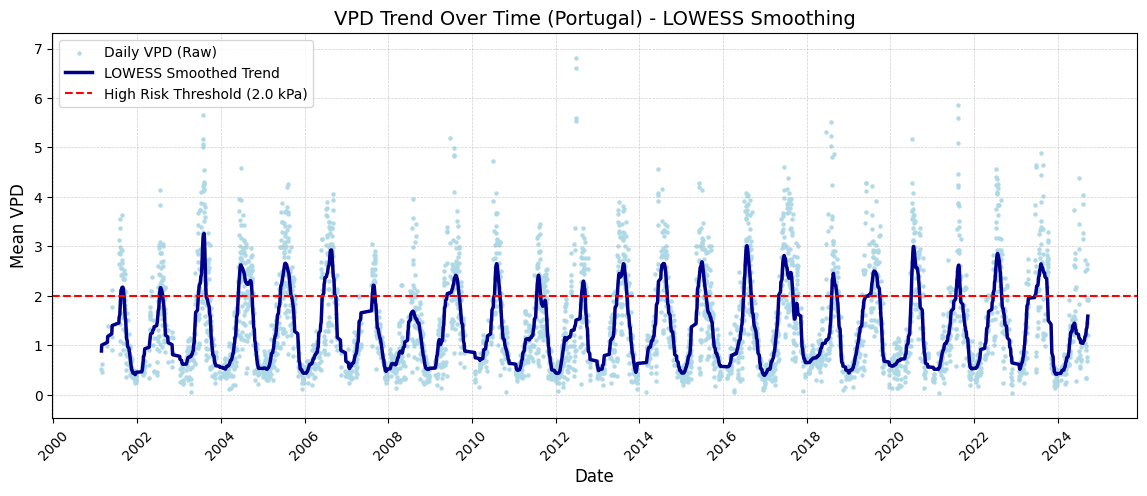

In [377]:
# Copy the DataFrame
vpd_df_time_series = df_with_indexes.copy()
vpd_df_time_series["Climate_Date"] = pd.to_datetime(vpd_df_time_series["Climate_Date"])
vpd_df_time_series = vpd_df_time_series[vpd_df_time_series['Country'] == "Portugal"]

# Group by Date and take the mean VPD
vpd_over_time = vpd_df_time_series.groupby("Climate_Date")["VPD"].mean()

# Apply LOWESS smoothing
lowess_frac = 0.01  # Adjust this for more or less smoothing
lowess_smoothed = sm.nonparametric.lowess(vpd_over_time, np.arange(len(vpd_over_time)), frac=lowess_frac, return_sorted=False)

# Determine threshold
threshold = 2.0

# Plot figure
plt.figure(figsize=(14,5))

# Raw data as points
plt.scatter(vpd_over_time.index, vpd_over_time, color="lightblue", alpha=0.9, s=5, label="Daily VPD (Raw)")

# LOWESS Smoothed trend
plt.plot(vpd_over_time.index, lowess_smoothed, color="darkblue", linewidth=2.5, label="LOWESS Smoothed Trend")

# Fire Risk Zone
#plt.fill_between(vpd_over_time.index, threshold, vpd_over_time.max(), color='red', alpha=0.15)

# Threshold line
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1.5, label=f'High Risk Threshold ({threshold} kPa)')

# Label threshold
#plt.text(vpd_over_time.index[-100], threshold + 0.1, "Fire Risk Zone", color="red", fontsize=12, fontweight="bold")

# X-axis formatting
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean VPD", fontsize=12)
plt.title("VPD Trend Over Time (Portugal) - LOWESS Smoothing", fontsize=14)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Grid and limits
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.ylim(vpd_over_time.min() - 0.5, vpd_over_time.max() + 0.5)

# Legend
plt.legend()

plt.show()


- This graph shows the *Vapor Pressure Deficit (VPD) trend over time in Portugal from 2000 to 2024.  
- As per the last graph, the light blue dots represent daily raw VPD values, while the dark blue line represents a LOWESS smoothed trend, which helps capture long-term patterns. I implemented this smoothing technique as there were some gaps in the data, and I didn't want too much of data loss.
- The VPD trend follows a strong seasonal cycle as well, with peaks occurring at regular intervals, likely corresponding to warmer and drier months each year.  
- Although there is yearly variation, many peaks exceed the 2.0 kPa risk threshold, suggesting frequent periods of heightened fire risk.  

This graph suggests that atmospheric dryness has been increasing over time, with frequent exceedance of the critical 2.0 kPa threshold. This trend reinforces concerns about worsening wildfire conditions in Portugal, highlighting the importance of continuous monitoring and predictive modeling for fire risk management.

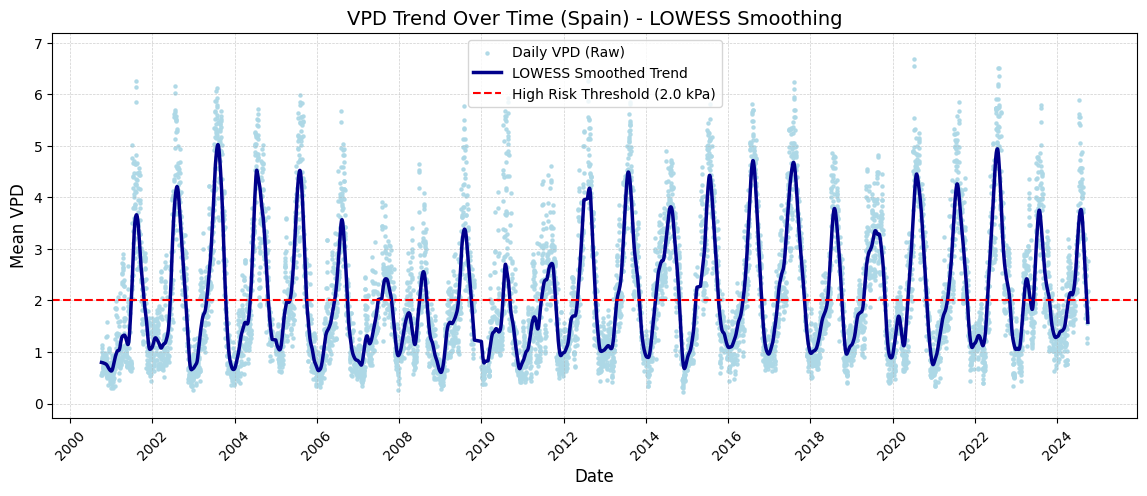

In [378]:
# Copy the DataFrame
vpd_df_time_series = df_with_indexes.copy()
vpd_df_time_series["Climate_Date"] = pd.to_datetime(vpd_df_time_series["Climate_Date"])
vpd_df_time_series = vpd_df_time_series[vpd_df_time_series['Country'] == "Spain"]

# Group by Date and take the mean VPD
vpd_over_time = vpd_df_time_series.groupby("Climate_Date")["VPD"].mean()

# Apply LOWESS smoothing
lowess_frac = 0.01  # Adjust this for more or less smoothing
lowess_smoothed = sm.nonparametric.lowess(vpd_over_time, np.arange(len(vpd_over_time)), frac=lowess_frac, return_sorted=False)

# Determine threshold
threshold = 2.0

# Plot figure
plt.figure(figsize=(14,5))

# Raw data as points
plt.scatter(vpd_over_time.index, vpd_over_time, color="lightblue", alpha=0.9, s=5, label="Daily VPD (Raw)")

# LOWESS Smoothed trend
plt.plot(vpd_over_time.index, lowess_smoothed, color="darkblue", linewidth=2.5, label="LOWESS Smoothed Trend")

# Fire Risk Zone
#plt.fill_between(vpd_over_time.index, threshold, vpd_over_time.max(), color='red', alpha=0.15)

# Threshold line
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1.5, label=f'High Risk Threshold ({threshold} kPa)')

# Label threshold
#plt.text(vpd_over_time.index[-100], threshold + 0.1, "Fire Risk Zone", color="red", fontsize=12, fontweight="bold")

# X-axis formatting
plt.xlabel("Date", fontsize=12)
plt.ylabel("Mean VPD", fontsize=12)
plt.title("VPD Trend Over Time (Spain) - LOWESS Smoothing", fontsize=14)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Grid and limits
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
plt.ylim(vpd_over_time.min() - 0.5, vpd_over_time.max() + 0.5)

# Legend
plt.legend()

plt.show()

- This graph presents the Vapor Pressure Deficit (VPD) trend over time in Spain from 2000 to 2024.  
- The light blue dots represent daily raw VPD values, while the dark blue line shows a LOWESS smoothed trend, capturing long-term variations.  
- Just like Portugal there is a strong seasonal pattern, with VPD peaks occurring at regular intervals, likely corresponding to warm and dry months.  
- Many of the annual peaks consistently exceed the 2.0 kPa threshold, suggesting recurring high-risk periods for wildfires.  
- The baseline VPD values appear to be increasing over time, indicating drier atmospheric conditions in recent years.  
- It appears that Spain suffers from much harsher VPD levels than Portugal - possibly hinting at two different wildfire sources for each region.

This graph suggests that Spain has experienced a persistent increase in atmospheric dryness over the years, frequently exceeding the critical 2.0 kPa threshold. This trend highlights growing wildfire risks, making it crucial to monitor VPD trends for improved fire prediction and prevention strategies.

### Soil Metrics - A deeper Analysis

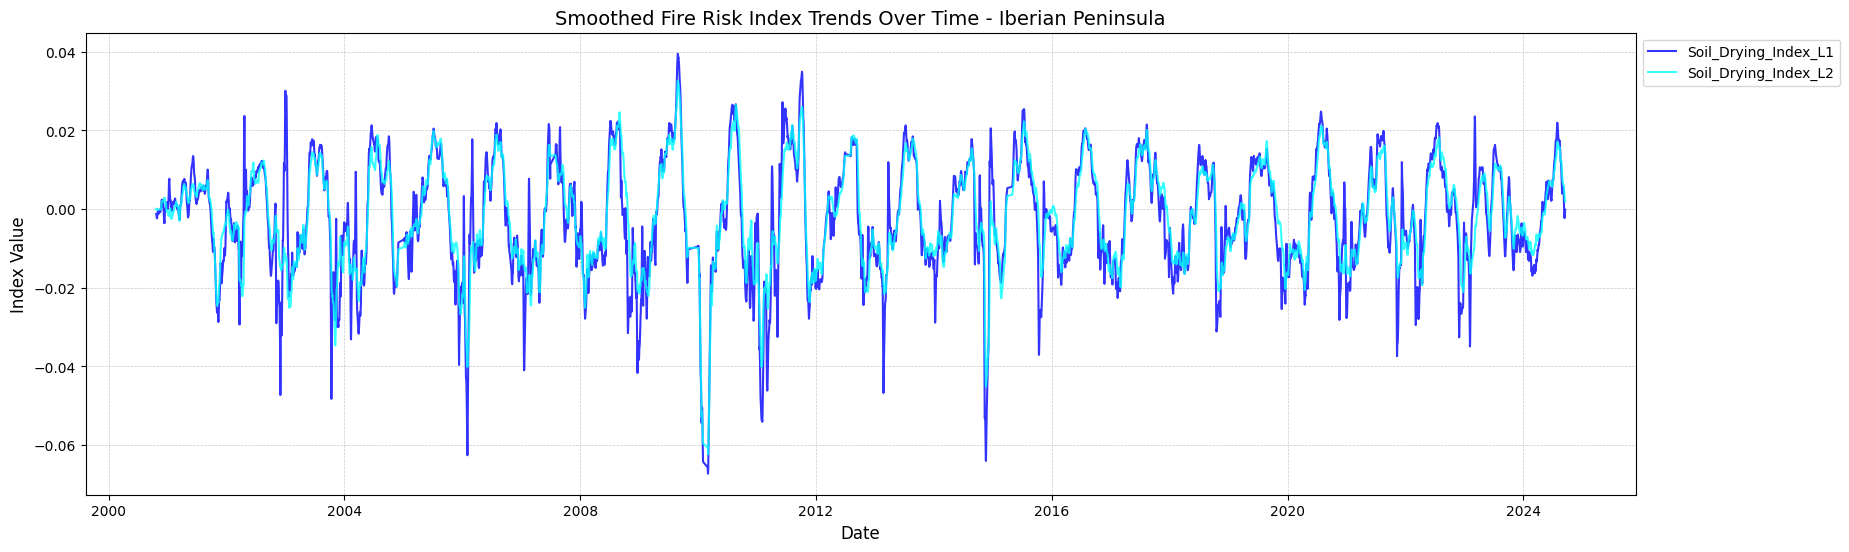

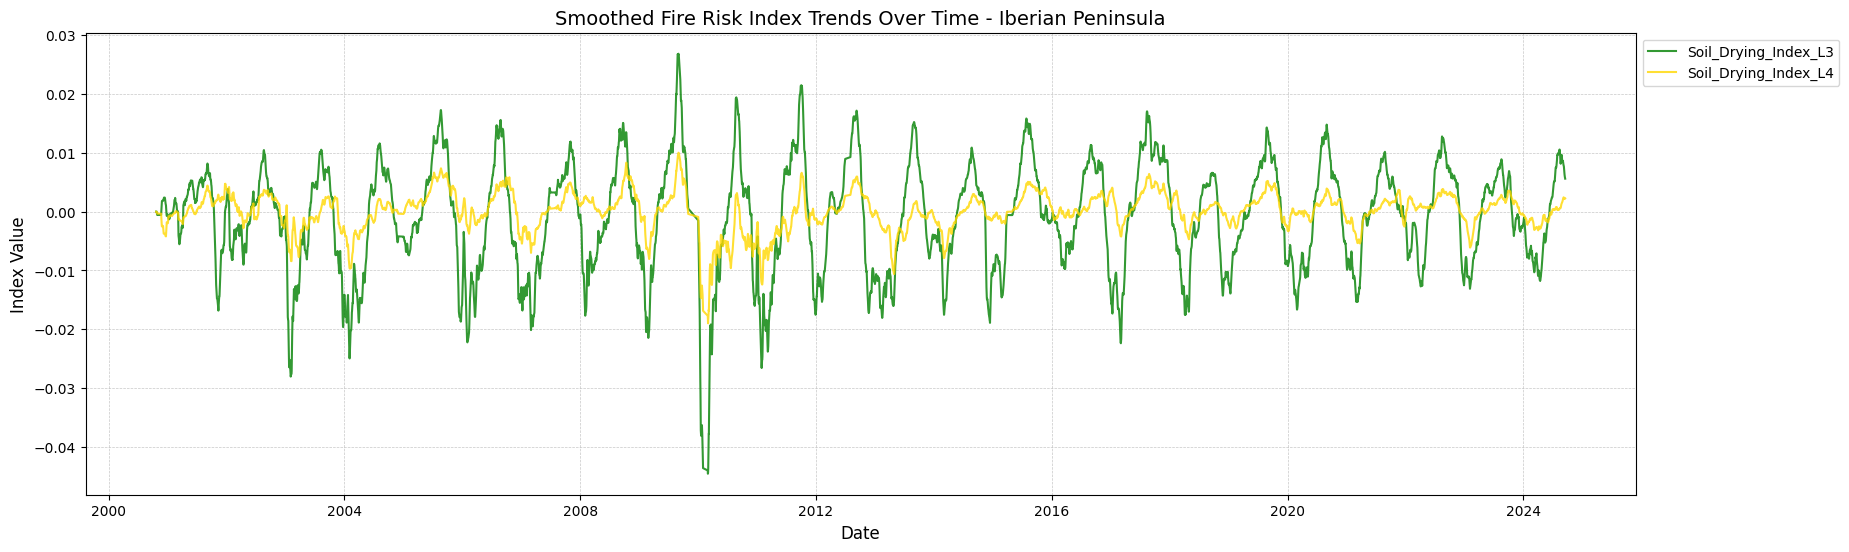

In [379]:
df_index_comparison = df_with_indexes.copy()

df_index_comparison["Climate_Date"] = pd.to_datetime(df_index_comparison["Climate_Date"])

indexes_over_time = df_index_comparison.groupby("Climate_Date")[
    ["Soil_Drying_Index_L1", "Soil_Drying_Index_L2", "Soil_Drying_Index_L3", "Soil_Drying_Index_L4",
     "Heating_Index_L1", "Heating_Index_L2", "Heating_Index_L3", "Heating_Index_L4",
     "Evaporation"]
].mean()

# Apply a 30-day rolling average to smooth fluctuations
indexes_smoothed = indexes_over_time.rolling(window=30, center=True).mean()

plt.figure(figsize=(20,6))

# Define line styles & colors for better distinction
line_styles = {
    "Soil_Drying_Index_L1": "blue",
    "Soil_Drying_Index_L2": "cyan",
    "Soil_Drying_Index_L3": "green",
    "Soil_Drying_Index_L4": "gold"
}

# Plot each index over time with improved visibility
for column in indexes_smoothed[['Soil_Drying_Index_L1', 'Soil_Drying_Index_L2']]:
    plt.plot(indexes_smoothed.index, indexes_smoothed[column], label=column,
             color=line_styles.get(column, "black"), linewidth=1.5, alpha=0.8)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("Smoothed Fire Risk Index Trends Over Time - Iberian Peninsula", fontsize=14)

# Improve grid visibility
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Move the legend outside the plot for better readability
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()


plt.figure(figsize=(20,6))

# Plot each index over time with improved visibility
for column in indexes_smoothed[['Soil_Drying_Index_L3', 'Soil_Drying_Index_L4']]:
    plt.plot(indexes_smoothed.index, indexes_smoothed[column], label=column,
             color=line_styles.get(column, "black"), linewidth=1.5, alpha=0.8)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("Smoothed Fire Risk Index Trends Over Time - Iberian Peninsula", fontsize=14)

# Improve grid visibility
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Move the legend outside the plot for better readability
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()



- These graphs show trends of soil drying indices over time for different soil layers in the Iberian Peninsula.  
- The first graph represents shallow soil drying indices (Layer 1 and Layer 2), while the second graph represents deeper soil layers (Layer 3 and Layer 4).  
- Soil drying indices fluctuate significantly, with cyclical patterns that align with seasonal variations.  
- Shallow soil layers (first graph) display more variability, while deeper layers (second graph) show a more stable but gradual drying trend.  
- There are notable periods of extreme drying that correspond to certain years, indicating potential links to prolonged droughts.  
- Recent years show a sustained drying trend, suggesting that wildfire risk is increasing over time due to worsening soil moisture conditions.  
- Tracking these trends helps in assessing long-term changes in soil moisture and their impact on wildfire susceptibility.

In [380]:
df_with_indexes.columns

Index(['Latitude_1d', 'Longitude_1d', 'Climate_Date', 'Country',
       'Climate_Time', 'Skin_Temperature', 'Soil_Temperature_Layer1',
       'Soil_Temperature_Layer2', 'Soil_Temperature_Layer3',
       'Soil_Temperature_Layer4', 'Soil_Moisture_Layer1',
       'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3', 'Soil_Moisture_Layer4',
       'Wind_U_Component_10m', 'Wind_V_Component_10m',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m', 'Evaporation',
       'Evaporation_Vegetation', 'Potential_Evaporation', 'Surface_Pressure',
       'Surface_Runoff', 'Surface_Sensible_Heat_Flux',
       'Surface_Solar_Radiation', 'Surface_Solar_Radiation_Downward',
       'Total_Precipitation', 'Fire_Occurrence', 'VPD', 'Soil_Drying_Index_L1',
       'Soil_Drying_Index_L2', 'Soil_Drying_Index_L3', 'Soil_Drying_Index_L4',
       'Heating_Index_L1', 'Heating_Index_L2', 'Heating_Index_L3',
       'Heating_Index_L4', 'VPD_Fire_Risk', 'Evaporation_Decrease_Index',
       'Evaporation_Vegetation_Decrea

In [381]:
df_index_comparison = df_with_indexes.copy()

df_index_comparison['Country'].unique()

array(['Spain', 'Portugal'], dtype=object)

In [382]:
df_index_comparison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394760 entries, 5 to 408389
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Latitude_1d                              394760 non-null  float64       
 1   Longitude_1d                             394760 non-null  float64       
 2   Climate_Date                             394760 non-null  datetime64[ns]
 3   Country                                  394760 non-null  object        
 4   Climate_Time                             394760 non-null  float32       
 5   Skin_Temperature                         394760 non-null  float32       
 6   Soil_Temperature_Layer1                  394760 non-null  float32       
 7   Soil_Temperature_Layer2                  394760 non-null  float32       
 8   Soil_Temperature_Layer3                  394760 non-null  float32       
 9   Soil_Temperature_Layer4        

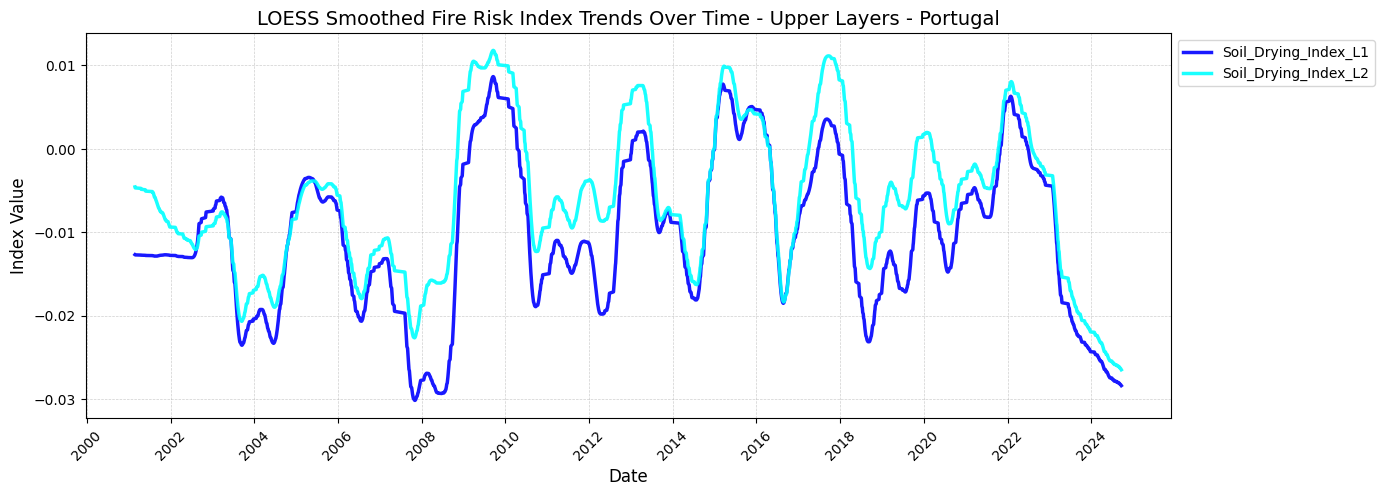

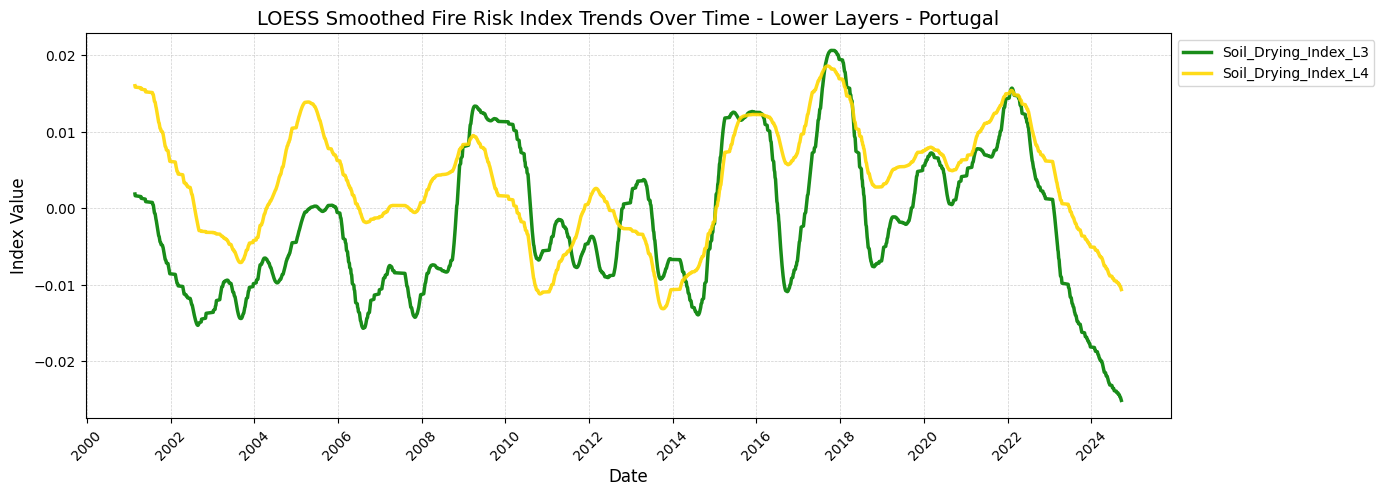

In [383]:
# Copy and filter data
df_index_comparison = df_with_indexes.copy()
df_index_comparison = df_index_comparison[df_index_comparison['Country'] == "Portugal"]  # Adjusted to Spain
df_index_comparison["Climate_Date"] = pd.to_datetime(df_index_comparison["Climate_Date"])

# Group by date and take the mean
indexes_over_time = df_index_comparison.groupby("Climate_Date")[
    ["Soil_Drying_Index_L1", "Soil_Drying_Index_L2", "Soil_Drying_Index_L3", "Soil_Drying_Index_L4"]
].mean()

# Drop NaNs
indexes_over_time = indexes_over_time.dropna()

# Apply LOESS smoothing
def apply_loess(series, frac=0.1):
    smoothed = sm.nonparametric.lowess(series, np.arange(len(series)), frac=frac, return_sorted=False)
    return smoothed

# Apply LOESS to each index
loess_results = {}
for column in indexes_over_time.columns:
    loess_results[column] = apply_loess(indexes_over_time[column], frac=0.1)  # Adjust frac for more/less smoothing

# Define colors
line_styles = {
    "Soil_Drying_Index_L1": "blue",
    "Soil_Drying_Index_L2": "cyan",
    "Soil_Drying_Index_L3": "green",
    "Soil_Drying_Index_L4": "gold"
}

# ---- PLOT 1: Upper Layers ----
plt.figure(figsize=(14,5))

for column in ["Soil_Drying_Index_L1", "Soil_Drying_Index_L2"]:
    plt.plot(indexes_over_time.index, loess_results[column], label=column, 
             color=line_styles.get(column, "black"), linewidth=2.5, alpha=0.9)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("LOESS Smoothed Fire Risk Index Trends Over Time - Upper Layers - Portugal", fontsize=14)

# Improve X-axis formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve Grid
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)

# Move the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()


# ---- PLOT 2: Lower Layers ----
plt.figure(figsize=(14,5))

for column in ["Soil_Drying_Index_L3", "Soil_Drying_Index_L4"]:
    plt.plot(indexes_over_time.index, loess_results[column], label=column, 
             color=line_styles.get(column, "black"), linewidth=2.5, alpha=0.9)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("LOESS Smoothed Fire Risk Index Trends Over Time - Lower Layers - Portugal", fontsize=14)

# Improve X-axis formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve Grid
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)

# Move the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()





- The first graph represents the soil drying index trends for the upper soil layers (Layer 1 and Layer 2) in Portugal.  
- The second graph represents the soil drying index trends for the lower soil layers (Layer 3 and Layer 4) in Portugal.  
- Both graphs show cyclical variations in soil drying over time, with noticeable peaks and troughs corresponding to seasonal changes.  
- The upper soil layers (first graph) exhibit more variability and sharper peaks, indicating quicker responses to changing weather conditions.  
- The lower soil layers (second graph) display a more gradual but sustained drying trend, suggesting deeper soil moisture loss over time.  
- Recent years show a decline in the drying index, indicating some recovery, but overall, long-term trends suggest increased drying events.  
- Understanding these soil drying patterns is important for assessing fire risk, as drier soils contribute to increased wildfire potential.

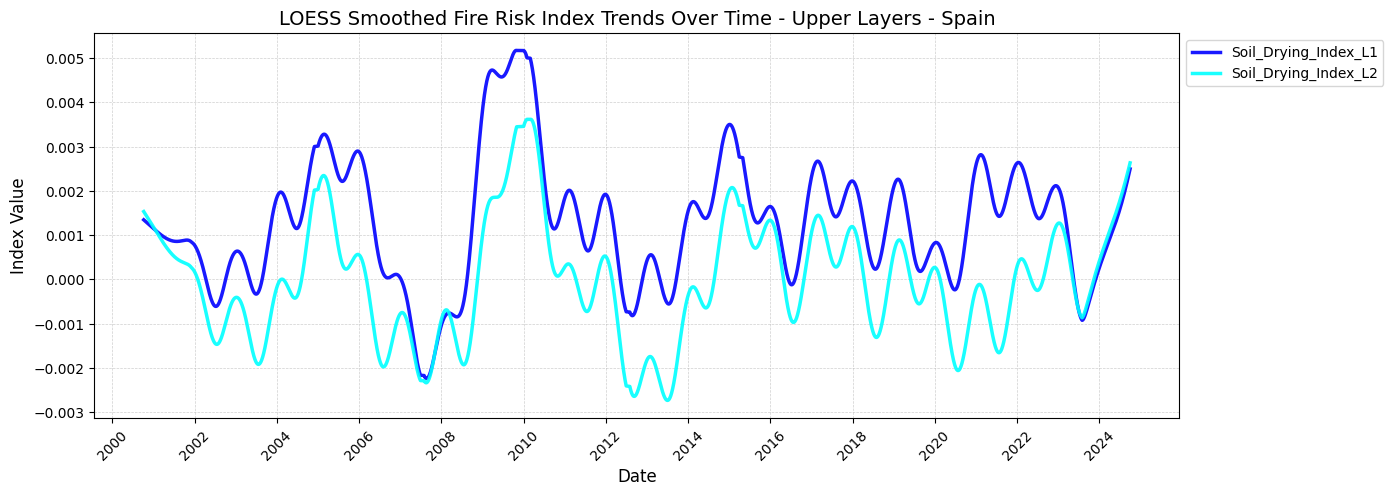

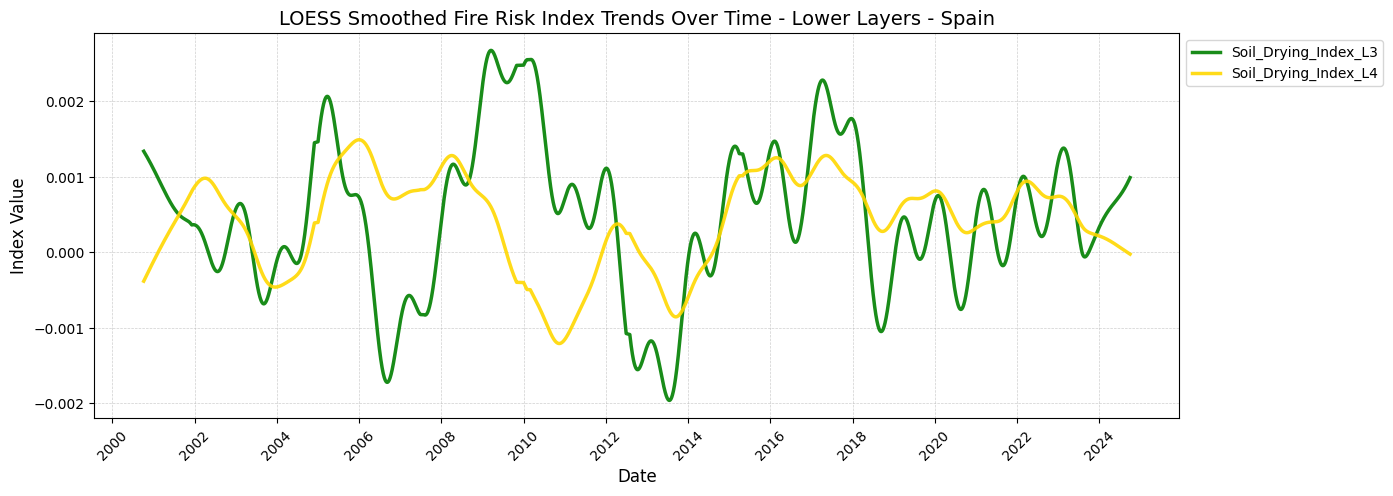

In [384]:
# Copy and filter data
df_index_comparison = df_with_indexes.copy()
df_index_comparison = df_index_comparison[df_index_comparison['Country'] == "Spain"]  # Adjusted to Spain
df_index_comparison["Climate_Date"] = pd.to_datetime(df_index_comparison["Climate_Date"])

# Group by date and take the mean
indexes_over_time = df_index_comparison.groupby("Climate_Date")[
    ["Soil_Drying_Index_L1", "Soil_Drying_Index_L2", "Soil_Drying_Index_L3", "Soil_Drying_Index_L4"]
].mean()

# Drop NaNs
indexes_over_time = indexes_over_time.dropna()

# Apply LOESS smoothing
def apply_loess(series, frac=0.1):
    smoothed = sm.nonparametric.lowess(series, np.arange(len(series)), frac=frac, return_sorted=False)
    return smoothed

# Apply LOESS to each index
loess_results = {}
for column in indexes_over_time.columns:
    loess_results[column] = apply_loess(indexes_over_time[column], frac=0.1)  # Adjust frac for more/less smoothing

# Define colors
line_styles = {
    "Soil_Drying_Index_L1": "blue",
    "Soil_Drying_Index_L2": "cyan",
    "Soil_Drying_Index_L3": "green",
    "Soil_Drying_Index_L4": "gold"
}

# ---- PLOT 1: Upper Layers ----
plt.figure(figsize=(14,5))

for column in ["Soil_Drying_Index_L1", "Soil_Drying_Index_L2"]:
    plt.plot(indexes_over_time.index, loess_results[column], label=column, 
             color=line_styles.get(column, "black"), linewidth=2.5, alpha=0.9)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("LOESS Smoothed Fire Risk Index Trends Over Time - Upper Layers - Spain", fontsize=14)

# Improve X-axis formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve Grid
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)

# Move the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()


# ---- PLOT 2: Lower Layers ----
plt.figure(figsize=(14,5))

for column in ["Soil_Drying_Index_L3", "Soil_Drying_Index_L4"]:
    plt.plot(indexes_over_time.index, loess_results[column], label=column, 
             color=line_styles.get(column, "black"), linewidth=2.5, alpha=0.9)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("LOESS Smoothed Fire Risk Index Trends Over Time - Lower Layers - Spain", fontsize=14)

# Improve X-axis formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve Grid
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)

# Move the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()



- The first graph represents the soil drying index trends for the upper soil layers (Layer 1 and Layer 2) in Spain.  
- The second graph represents the soil drying index trends for the lower soil layers (Layer 3 and Layer 4) in Spain.  
- Both graphs show cyclical variations in soil drying over time, with notable peaks and troughs corresponding to seasonal changes.  
- The upper soil layers (first graph) exhibit more variability, with sharper peaks and greater fluctuations, indicating a quicker response to weather conditions.  
- The lower soil layers (second graph) show more gradual trends, reflecting deeper soil moisture changes that take longer to develop.  
- Soil drying trends appear to have increased over time, particularly in recent years, suggesting prolonged dry conditions that may contribute to higher wildfire risks.  
- Tracking these drying indices helps in understanding long-term soil moisture changes and their impact on fire susceptibility in Spain.

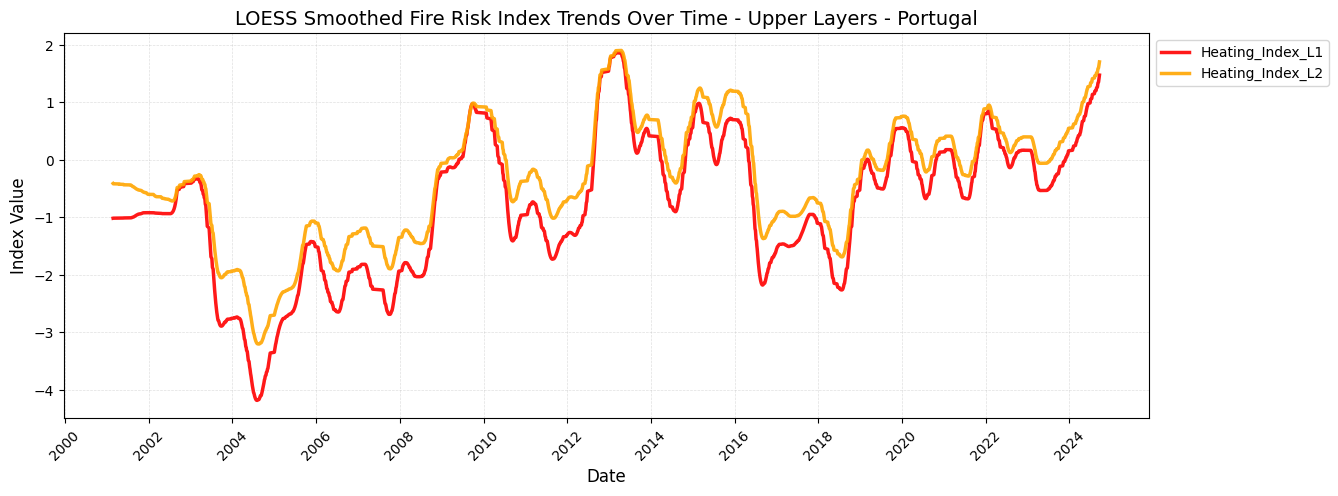

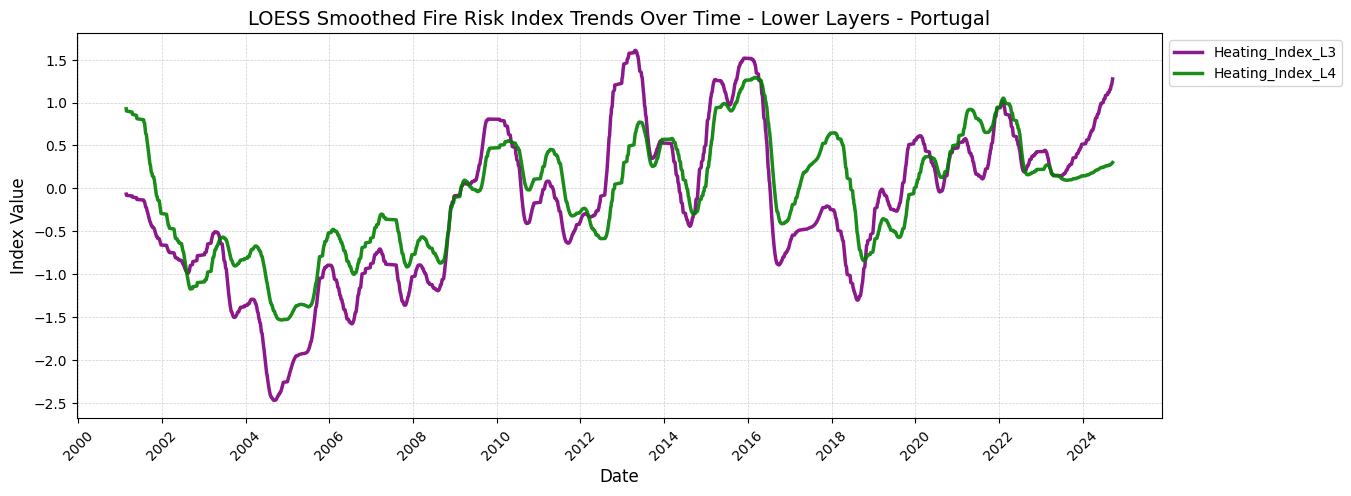

In [385]:
# Copy and filter data
df_index_comparison = df_with_indexes.copy()
df_index_comparison = df_index_comparison[df_index_comparison['Country'] == "Portugal"]  # Adjusted to Spain
df_index_comparison["Climate_Date"] = pd.to_datetime(df_index_comparison["Climate_Date"])

# Group by date and take the mean
indexes_over_time = df_index_comparison.groupby("Climate_Date")[
    ["Heating_Index_L1", "Heating_Index_L2", "Heating_Index_L3", "Heating_Index_L4"]
].mean()

# Apply a rolling average to smooth fluctuations
indexes_over_time = indexes_over_time.rolling(window=30, center=True, min_periods=1).mean()

# Drop NaNs
indexes_over_time = indexes_over_time.dropna()

# Apply LOESS smoothing
def apply_loess(series, frac=0.1):
    smoothed = sm.nonparametric.lowess(series, np.arange(len(series)), frac=frac, return_sorted=False)
    return smoothed

# Apply LOESS to each index
loess_results = {}
for column in indexes_over_time.columns:
    loess_results[column] = apply_loess(indexes_over_time[column], frac=0.1)  # Adjust frac for more/less smoothing

# Define line styles & colors for better distinction
line_styles = {
    "Heating_Index_L1": "red",
    "Heating_Index_L2": "orange",
    "Heating_Index_L3": "purple",
    "Heating_Index_L4": "green"
}

# ---- PLOT 1: Upper Layers ----
plt.figure(figsize=(14,5))

for column in ["Heating_Index_L1", "Heating_Index_L2"]:
    plt.plot(indexes_over_time.index, loess_results[column], label=column, 
             color=line_styles.get(column, "black"), linewidth=2.5, alpha=0.9)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("LOESS Smoothed Fire Risk Index Trends Over Time - Upper Layers - Portugal", fontsize=14)

# Improve X-axis formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve Grid
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.4)

# Move the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()


# ---- PLOT 2: Lower Layers ----
plt.figure(figsize=(14,5))

for column in ["Heating_Index_L3", "Heating_Index_L4"]:
    plt.plot(indexes_over_time.index, loess_results[column], label=column, 
             color=line_styles.get(column, "black"), linewidth=2.5, alpha=0.9)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("LOESS Smoothed Fire Risk Index Trends Over Time - Lower Layers - Portugal", fontsize=14)

# Improve X-axis formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve Grid
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)

# Move the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()


- The first graph represents the heating index trends for the upper soil layers (Layer 1 and Layer 2) in Portugal.  
- The second graph represents the heating index trends for the lower soil layers (Layer 3 and Layer 4) in Portugal.  
- Both graphs show long-term warming trends with periodic fluctuations, indicating cycles of heat accumulation and dissipation.  
- The upper soil layers (first graph) exhibit stronger seasonal variability, suggesting that surface heating is more influenced by short-term weather changes.  
- The lower soil layers (second graph) show a more gradual increase, indicating sustained heat retention over time.  
- In recent years, all layers show an upward trend, suggesting that soil temperatures are rising and contributing to higher fire risk.  
- Tracking these heating indices helps in understanding how prolonged soil warming affects fire susceptibility and ecosystem changes.

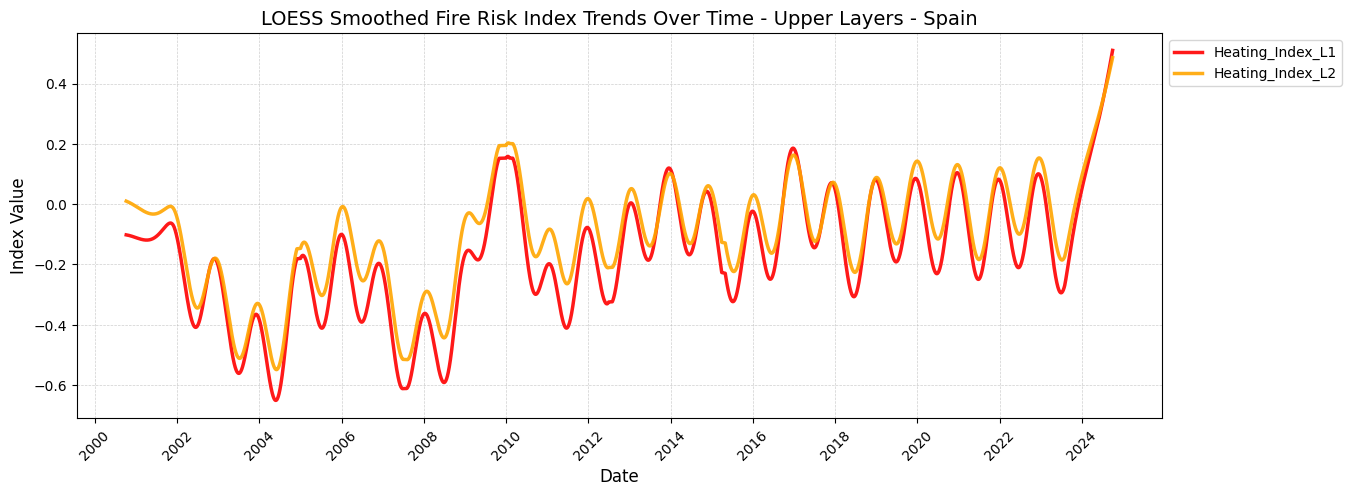

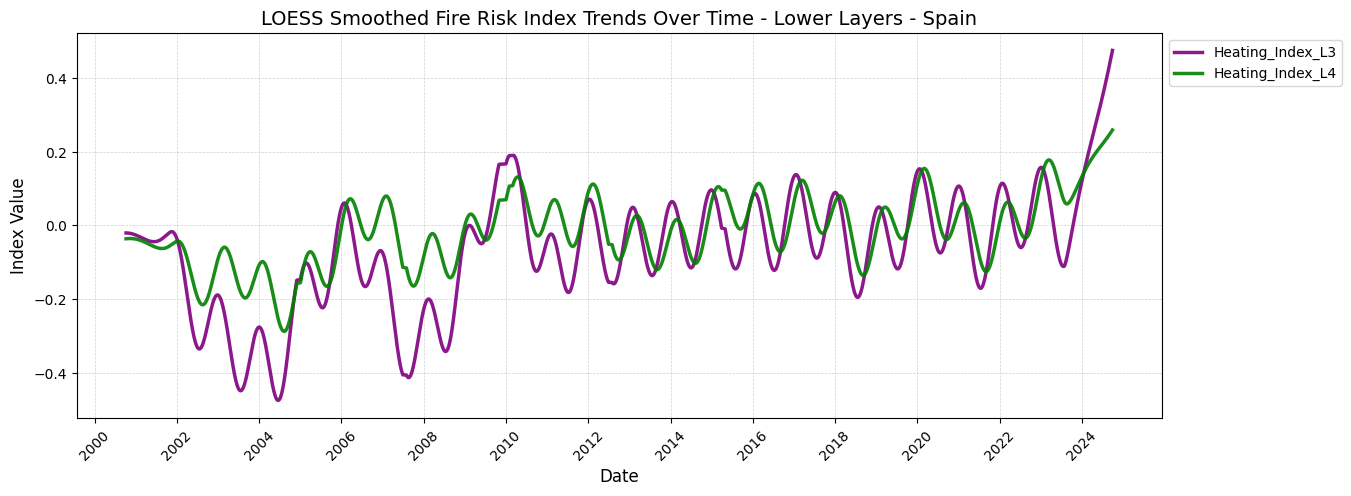

In [386]:
# Copy and filter data
df_index_comparison = df_with_indexes.copy()
df_index_comparison = df_index_comparison[df_index_comparison['Country'] == "Spain"]  # Adjusted to Spain
df_index_comparison["Climate_Date"] = pd.to_datetime(df_index_comparison["Climate_Date"])

# Group by date and take the mean
indexes_over_time = df_index_comparison.groupby("Climate_Date")[
    ["Heating_Index_L1", "Heating_Index_L2", "Heating_Index_L3", "Heating_Index_L4"]
].mean()

# Apply a rolling average to smooth fluctuations
indexes_over_time = indexes_over_time.rolling(window=30, center=True, min_periods=1).mean()

# Drop NaNs
indexes_over_time = indexes_over_time.dropna()

# Apply LOESS smoothing
def apply_loess(series, frac=0.1):
    smoothed = sm.nonparametric.lowess(series, np.arange(len(series)), frac=frac, return_sorted=False)
    return smoothed

# Apply LOESS to each index
loess_results = {}
for column in indexes_over_time.columns:
    loess_results[column] = apply_loess(indexes_over_time[column], frac=0.1)  # Adjust frac for more/less smoothing

# Define line styles & colors for better distinction
line_styles = {
    "Heating_Index_L1": "red",
    "Heating_Index_L2": "orange",
    "Heating_Index_L3": "purple",
    "Heating_Index_L4": "green"
}

# ---- PLOT 1: Upper Layers ----
plt.figure(figsize=(14,5))

for column in ["Heating_Index_L1", "Heating_Index_L2"]:
    plt.plot(indexes_over_time.index, loess_results[column], label=column, 
             color=line_styles.get(column, "black"), linewidth=2.5, alpha=0.9)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("LOESS Smoothed Fire Risk Index Trends Over Time - Upper Layers - Spain", fontsize=14)

# Improve X-axis formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve Grid
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)

# Move the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()


# ---- PLOT 2: Lower Layers ----
plt.figure(figsize=(14,5))

for column in ["Heating_Index_L3", "Heating_Index_L4"]:
    plt.plot(indexes_over_time.index, loess_results[column], label=column, 
             color=line_styles.get(column, "black"), linewidth=2.5, alpha=0.9)

# Labels & Title
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)
plt.title("LOESS Smoothed Fire Risk Index Trends Over Time - Lower Layers - Spain", fontsize=14)

# Improve X-axis formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Improve Grid
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.6)

# Move the legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()

- The first graph represents the heating index trends for the upper soil layers (Layer 1 and Layer 2) in Spain.  
- The second graph represents the heating index trends for the lower soil layers (Layer 3 and Layer 4) in Spain.  
- Both graphs show an overall increasing trend in soil heating over time, indicating progressive warming in the soil layers.  
- The upper soil layers (first graph) show greater seasonal fluctuations, suggesting that these layers are more sensitive to short-term weather conditions.  
- The lower soil layers (second graph) exhibit more gradual warming trends, indicating long-term heat retention deeper in the soil.  
- A noticeable spike in heating index values appears in recent years, especially post-2020, suggesting that soil warming is accelerating.  
- These trends suggest that increased soil heating could contribute to higher wildfire risks, as drier and hotter soils promote fire ignition and spread.

In [387]:
# Count null values in Evaporation for Portugal
null_evap_portugal = df_with_indexes[df_with_indexes["Country"] == "Portugal"]["Evaporation"].isna().sum()

# Count null values in Evaporation for Spain
null_evap_spain = df_with_indexes[df_with_indexes["Country"] == "Spain"]["Evaporation"].isna().sum()

print(f"Missing Evaporation values in Portugal: {null_evap_portugal}")
print(f"Missing Evaporation values in Spain: {null_evap_spain}")



Missing Evaporation values in Portugal: 0
Missing Evaporation values in Spain: 0


In [388]:
# Get all unique Climate Dates for Portugal & Spain
portugal_dates = df_with_indexes[df_with_indexes["Country"] == "Portugal"]["Climate_Date"].unique()
spain_dates = df_with_indexes[df_with_indexes["Country"] == "Spain"]["Climate_Date"].unique()

# Check if Portugal is missing dates compared to Spain
missing_dates = set(spain_dates) - set(portugal_dates)
print(f"Portugal is missing {len(missing_dates)} dates.")


Portugal is missing 4114 dates.


In [389]:
# Create a full date range covering all Climate_Date values
all_dates = pd.date_range(start=df_with_indexes["Climate_Date"].min(),
                          end=df_with_indexes["Climate_Date"].max(), freq="D")

# Pivot the data so Portugal and Spain are separate columns
evaporation_over_time = df_with_indexes.groupby(["Climate_Date", "Country"])["Evaporation"].mean().unstack()

# Reindex to make sure Portugal & Spain both have the full date range
evaporation_over_time = evaporation_over_time.reindex(all_dates)

print("Missing values after reindexing:")
print(evaporation_over_time.isna().sum())  # Check how many NaNs were created


Missing values after reindexing:
Country
Portugal    4326
Spain        212
dtype: int64


In [390]:
evaporation_over_time.columns

Index(['Portugal', 'Spain'], dtype='object', name='Country')

#### Additional Analysis - Evaporation

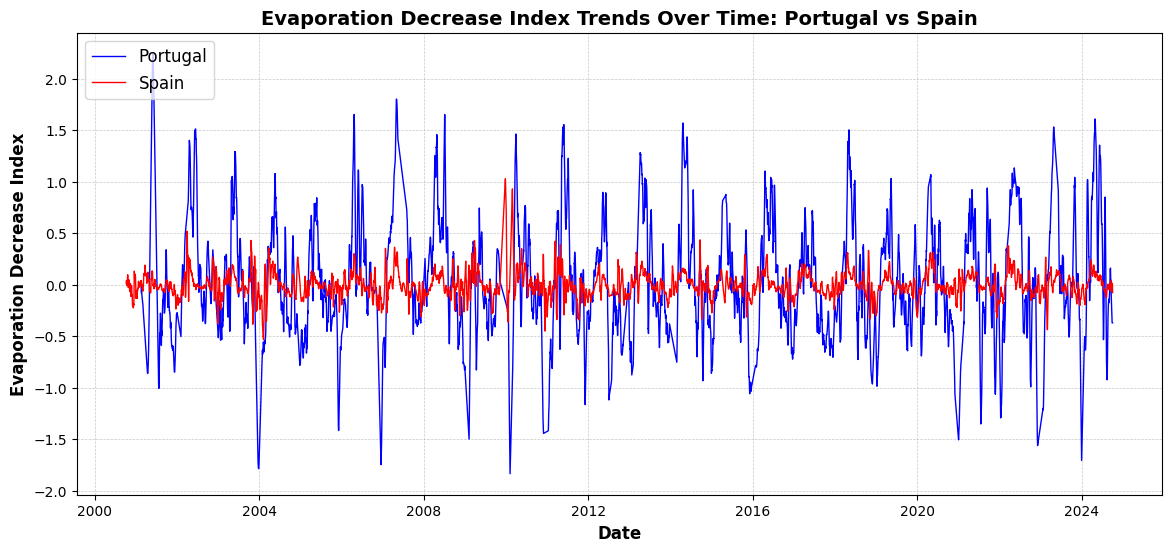

In [391]:


# Ensure Climate_Date is in datetime format
df_with_indexes["Climate_Date"] = pd.to_datetime(df_with_indexes["Climate_Date"])

# Aggregate Evaporation Index per Country & Date
evap_index_over_time = df_with_indexes.groupby(["Climate_Date", "Country"])["Evaporation_Decrease_Index"].mean().unstack()

# Reindex to ensure a continuous date range
all_dates = pd.date_range(start=df_with_indexes["Climate_Date"].min(),
                          end=df_with_indexes["Climate_Date"].max(), freq="D")
evap_index_over_time = evap_index_over_time.reindex(all_dates)

# Fill missing values with interpolation
evap_index_over_time = evap_index_over_time.interpolate(method="linear")

# Apply a rolling average to smooth fluctuations
evap_index_smoothed = evap_index_over_time.rolling(window=15, center=True, min_periods=1).mean()

# Plot Evaporation Index Trends
plt.figure(figsize=(14,6))

# Portugal Line
plt.plot(evap_index_smoothed.index, evap_index_smoothed["Portugal"],
         label="Portugal", color="blue", linewidth=1)

# Spain Line
plt.plot(evap_index_smoothed.index, evap_index_smoothed["Spain"],
         label="Spain", color="red", linewidth=1)

# Labels & Title
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Evaporation Decrease Index", fontsize=12, fontweight="bold")
plt.title("Evaporation Decrease Index Trends Over Time: Portugal vs Spain", fontsize=14, fontweight="bold")

# Grid & Legend
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(loc="upper left", fontsize=12)

plt.show()


- This graph compares the evaporation decrease index trends over time between Portugal and Spain.  
- The blue line represents Portugal, while the red line represents Spain.  
- Portugal shows significantly higher variability, with sharp fluctuations and extreme peaks and dips.  
- Spain's trend is much more stable, with less pronounced variations over time.  
- The increased volatility in Portugal suggests that evaporation rates are more sensitive to changing weather conditions or seasonal shifts, possibly a geographic characteristic, being more subject to Atlantic weather than Spain.
- The trend for both countries remains centered around zero, indicating periods of both increasing and decreasing evaporation.  
- The fluctuations in Portugal appear to have become more intense in recent years, which may indicate increasing climate variability or extreme weather events.  
- These patterns suggest that Portugal may experience more abrupt shifts in moisture loss, potentially influencing wildfire risk and land dryness. This ties in with our analysis of the Soil Drying Index.

## EDA CONCLUSION

The analysis of climate and environmental variables across Portugal and Spain reveals important trends in soil moisture, evaporation, heating, and fire risk indicators. The data suggests that both countries are experiencing increased drying, warming, and atmospheric moisture deficits, all of which contribute to heightened wildfire risk. 

Portugal exhibits more extreme variability in soil drying, evaporation rates, and heating indices, indicating that its environment is more susceptible to abrupt changes in moisture and temperature. This suggests a higher sensitivity to seasonal and extreme weather events, which may explain the country’s history of severe wildfires. In contrast, Spain shows a more stable but persistent increase in drying and heating trends, suggesting a gradual accumulation of conditions favorable for fires.

The long-term trends highlight that fire risk is not just a seasonal issue but a progressively worsening challenge likely linked to climate change. Increasing vapor pressure deficits, rising soil temperatures, and sustained drying patterns indicate that both countries may experience more frequent and intense wildfire seasons in the future. 

Overall, the findings emphasize the urgent need for proactive fire management strategies and climate adaptation measures to reduce the impact of wildfires on ecosystems and communities in the Iberian Peninsula.

# MACHINE LEARNING

## Model Selection

For this project, I implemented a combination of machine learning models to address two key aspects of wildfire analysis: 
- **predicting fire risk** based on climate conditions and 
- **estimating fire intensity** once a fire has occurred. 

Due to the complexity and non-linearity of environmental data, I selected a Neural Network and XGBoost for fire occurrence prediction and K-Means clustering with a Random Forest for fire intensity classification.

#### **Fire Risk Prediction (Binary Classification)**  

To predict whether weather conditions indicate fire risk, I initially implemented a Neural Network (NN). Neural Networks are highly effective at learning complex, non-linear relationships between features, making them well-suited for climate data where interactions between temperature, soil moisture, evaporation, and atmospheric variables are intricate.

#### **Pros of Using a Neural Network:**
- **Non-linearity**: Captures intricate dependencies between climate variables that simpler models might miss.  
- **Adaptability**: Can generalize well to unseen data when trained correctly.  
- **Feature Importance**: Learns from multiple data sources without explicit feature engineering.  

#### **Cons of Using a Neural Network:**
- **Computational Cost**: Requires significant computational resources and tuning to prevent overfitting.  
- **Interpretability**: Unlike tree-based models, NNs function as black boxes, making it harder to extract human-readable decision rules.  
- **Training Time**: Neural Networks typically require longer training times and hyperparameter tuning.  

#### **Backup Model - XGBoost**
Due to time constraints in producing a fully functional probability-based NN output, I also trained XGBoost as a backup. XGBoost is a highly efficient gradient boosting algorithm that is known for its strong performance on tabular data, particularly in structured datasets like climate records.

#### **Why XGBoost?**
- **Feature Importance**: Provides clear insights into which climate variables contribute most to fire risk.  
- **Faster Training**: Requires less fine-tuning than deep learning models.  
- **Probabilistic Output**: Unlike the binary NN output, XGBoost allows for more detailed probability estimations of fire risk.  
- **Widely Used in Fire Prediction**: Several wildfire risk studies have successfully used gradient boosting models, showing high accuracy in classification tasks:
     - https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4947529
     - https://arxiv.org/pdf/2405.01607
     - https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022GL099368
     - https://www.sciencedirect.com/science/article/abs/pii/S1296207423001267


### **Fire Intensity Prediction (Clustering & Regression-Based Approach)**  

Since fire intensity is a more complex, multi-dimensional problem, I created a Fire Intensity Index based on Brightness_K and Fire Radiative Power, and approached the problem with K-Means Clustering followed by a Random Forest for prediction.  

#### **Why K-Means for Clustering Fire Intensity?**
- **Unsupervised Learning**: Clustering helps uncover hidden patterns in fire intensity data without predefined labels.  
- **Grouping Similar Fires**: Assigns fire events to distinct intensity categories based on climate and environmental conditions.  
- **Data-Driven Classification**: Reduces the need for manually labeled intensity values, allowing for a more objective classification.  

#### **Why Random Forest for Predicting Fire Intensity?**
Once the fire intensity clusters were established, I used Random Forest (RF) regression to predict which category a new fire event would belong to. Random Forests are ensemble models based on decision trees that provide robust predictions with minimal overfitting.

##### **Pros of Random Forest for Fire Intensity Prediction**
- **Handles Non-Linearity**: Fire intensity is influenced by multiple interacting variables, and RF models are well-equipped to handle such complexities.  
- **Robustness to Noise**: Unlike deep learning models, Random Forests perform well even when data contains inconsistencies.  
- **Feature Importance Insights**: Helps identify the most important environmental factors driving fire intensity.  

##### **Cons of Random Forest**
- **Computationally Expensive**: Although less complex than NNs, RF models require more memory and time when dealing with large datasets.  
- **Limited Extrapolation**: RF models work well within known data ranges but struggle to extrapolate beyond training data.  

#### **Alternative Approaches Considered**
Several studies have experimented with alternative models for fire intensity classification. *Gradient Boosting methods (such as XGBoost and LightGBM) have shown competitive performance in wildfire severity prediction (https://ieeexplore.ieee.org/document/9849276). However, I opted for K-Means with Random Forest due to the advantage of discovering natural intensity clusters before applying supervised learning.

***I have also purposedly tried to cover a few different models, in order to enhance my skills and knowledge rather than just bet on one or two***



## Training Methods Used
For all models, I applied standard machine learning best practices, including:  

**Feature Engineering**  
   - Derived key climate indices such as Vapor Pressure Deficit (VPD), Soil Drying Index, Fire Intensity Index and Heating Index to provide meaningful inputs for predictions.  
   - Normalized and scaled variables using MinMaxScaler where necessary. I have made sure to use the same scaler method throughout the whole project.

**Data Preprocessing & Splitting**  
   - Used train-test splits (80-20) and cross-validation (K-Fold where applicable) to ensure generalization.  
   - Encoded categorical variables with numeric labels.

**Hyperparameter Tuning**
   - Neural Network: Tuned **number of layers, neurons per layer, dropout rate, and learning rate** using grid search and experimentation.  
   - Random Forest: Adjusted **number of trees, max depth, and feature selection** based on validation performance.  

**Evaluation Metrics**  
   - Binary Fire Risk Prediction: **Accuracy, Precision-Recall, AUC-ROC Curve**  
   - Fire Intensity Classification: **Cluster Silhouette Score, F1-score, Mean Squared Error (MSE) for RF regression**  
   - Ensured to also evaluate model with "Noisy" test data so I can verify the robustness of my model.


The combination of Neural Networks, XGBoost, K-Means, and Random Forest provided a multi-layered approach to understanding wildfire risk and intensity. Neural Networks were chosen for their ability to learn complex relationships in binary fire prediction, while XGBoost served as a reliable backup with probabilistic outputs. For fire intensity, K-Means clustering grouped fires into meaningful intensity levels, and Random Forest predicted intensity categories based on environmental factors.  

This portfolio of models allows for a flexible and interpretable framework for wildfire prediction, balancing deep learning’s pattern recognition capabilities with tree-based models' transparency and efficiency. Moving forward, future improvements could focus on enhancing the probability-based NN output, and incorporating real-time environmental monitoring for dynamic fire forecasting.

## Preparing the Data

In [392]:
print(dataset_with_all_variables_and_rows.columns)

dataset_with_all_variables_and_rows.info()


Index(['Latitude_1d', 'Longitude_1d', 'Date', 'Time',
       'Fire_Radiative_Power_MW', 'Brightness_K', 'Confidence_Level',
       'Track_Width_km', 'Fire_Type', 'Brightness_T31_K', 'Scan_Width_km',
       'Satellite', 'Day_Night', 'Dataset_Version', 'Instrument',
       'Climate_Date', 'Climate_Time', 'Skin_Temperature',
       'Soil_Temperature_Layer1', 'Soil_Temperature_Layer2',
       'Soil_Temperature_Layer3', 'Soil_Temperature_Layer4',
       'Soil_Moisture_Layer1', 'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3',
       'Soil_Moisture_Layer4', 'Wind_U_Component_10m', 'Wind_V_Component_10m',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m', 'Evaporation',
       'Evaporation_Vegetation', 'Leaf_Area_Index_High_Vegetation',
       'Leaf_Area_Index_Low_Vegetation', 'Potential_Evaporation',
       'Surface_Pressure', 'Surface_Runoff', 'Surface_Sensible_Heat_Flux',
       'Surface_Solar_Radiation', 'Surface_Solar_Radiation_Downward',
       'Total_Precipitation', 'Country', 'Fir

In [393]:
dataset_with_all_variables_and_rows["Fire_Occurrence"].value_counts()

Fire_Occurrence
1    542328
0    490228
Name: count, dtype: int64

In [394]:
data_for_ML = dataset_with_all_variables_and_rows.copy()

In [395]:
# Replace NaNs in numeric fire-related features with 0 (no fire signal)
fire_numeric_features = ["Brightness_K", 'Time', "Fire_Radiative_Power_MW", "Track_Width_km", "Scan_Width_km", 'Confidence_Level', 'Fire_Type', 'Brightness_T31_K', 'Dataset_Version']
data_for_ML[fire_numeric_features] = data_for_ML[fire_numeric_features].fillna(0)

# Replace NaNs in categorical fire-related features with "NoFire"
fire_categorical_features = ["Instrument", "Satellite", "Day_Night"]
data_for_ML[fire_categorical_features] = data_for_ML[fire_categorical_features].fillna("NoFire")

print("Missing fire-specific features filled successfully!")


Missing fire-specific features filled successfully!


In [396]:
data_for_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032556 entries, 0 to 1522879
Data columns (total 43 columns):
 #   Column                            Non-Null Count    Dtype               
---  ------                            --------------    -----               
 0   Latitude_1d                       1032556 non-null  float64             
 1   Longitude_1d                      1032556 non-null  float64             
 2   Date                              1032556 non-null  date32[day][pyarrow]
 3   Time                              1032556 non-null  float64             
 4   Fire_Radiative_Power_MW           1032556 non-null  float64             
 5   Brightness_K                      1032556 non-null  float64             
 6   Confidence_Level                  1032556 non-null  float64             
 7   Track_Width_km                    1032556 non-null  float64             
 8   Fire_Type                         1032556 non-null  float64             
 9   Brightness_T31_K             

In [397]:
data_for_ML = data_for_ML.dropna()

data_for_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014350 entries, 0 to 1504672
Data columns (total 43 columns):
 #   Column                            Non-Null Count    Dtype               
---  ------                            --------------    -----               
 0   Latitude_1d                       1014350 non-null  float64             
 1   Longitude_1d                      1014350 non-null  float64             
 2   Date                              1014350 non-null  date32[day][pyarrow]
 3   Time                              1014350 non-null  float64             
 4   Fire_Radiative_Power_MW           1014350 non-null  float64             
 5   Brightness_K                      1014350 non-null  float64             
 6   Confidence_Level                  1014350 non-null  float64             
 7   Track_Width_km                    1014350 non-null  float64             
 8   Fire_Type                         1014350 non-null  float64             
 9   Brightness_T31_K             

In [398]:
data_for_ML["Fire_Occurrence"].value_counts()

Fire_Occurrence
1    524122
0    490228
Name: count, dtype: int64

In [399]:
for col in data_for_ML.columns:
  if data_for_ML[col].dtype == "string" or data_for_ML[col].dtype == "object" :
    print(col)
    print(data_for_ML[col].unique())

Satellite
<StringArray>
['Terra', 'NoFire', 'Aqua', 'N', 'Terra, N', 'Aqua, N']
Length: 6, dtype: string
Day_Night
<StringArray>
['D', 'NoFire', 'N']
Length: 3, dtype: string
Instrument
<StringArray>
['MODIS', 'NoFire', 'VIIRS', 'VIIRS, MODIS']
Length: 4, dtype: string
Country
['Spain' 'Portugal']


In [400]:
# Copy dataset
data_for_ML_encoded = data_for_ML.copy()

# List of categorical features to encode
categorical_features = ["Satellite", "Day_Night", "Instrument", "Country"]

# Dictionary to store encoders for future use (optional)
label_encoders = {}

# Apply Label Encoding to each categorical column
for col in categorical_features:
    le = LabelEncoder()
    data_for_ML_encoded[col] = le.fit_transform(data_for_ML_encoded[col])  # Encode column
    label_encoders[col] = le  # Store encoder for later use (optional)

for col in categorical_features:
  print(f"\n{col} Mapping:")
  for class_name, encoded_value in zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)):
      print(f"  {class_name} → {encoded_value}")


print("Label Encoding applied successfully!")




Satellite Mapping:
  Aqua → 0
  Aqua, N → 1
  N → 2
  NoFire → 3
  Terra → 4
  Terra, N → 5

Day_Night Mapping:
  D → 0
  N → 1
  NoFire → 2

Instrument Mapping:
  MODIS → 0
  NoFire → 1
  VIIRS → 2
  VIIRS, MODIS → 3

Country Mapping:
  Portugal → 0
  Spain → 1
Label Encoding applied successfully!


In [401]:
data_for_ML_encoded[["Satellite", "Day_Night", "Instrument", "Country"]].head()

Satellite  Day_Night  Instrument  Country
0          4          0           0        1
1          4          0           0        1
2          4          0           0        1
3          4          0           0        1
4          4          0           0        1

In [402]:
data_for_ML_encoded = data_for_ML_encoded.groupby(["Latitude_1d", "Longitude_1d", 'Date', "Climate_Date", 'Country', 'Instrument', "Day_Night", "Satellite", 'Fire_Occurrence']).mean().reset_index()

In [403]:
data_for_ML_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494326 entries, 0 to 494325
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype               
---  ------                            --------------   -----               
 0   Latitude_1d                       494326 non-null  float64             
 1   Longitude_1d                      494326 non-null  float64             
 2   Date                              494326 non-null  date32[day][pyarrow]
 3   Climate_Date                      494326 non-null  datetime64[ns]      
 4   Country                           494326 non-null  int64               
 5   Instrument                        494326 non-null  int64               
 6   Day_Night                         494326 non-null  int64               
 7   Satellite                         494326 non-null  int64               
 8   Fire_Occurrence                   494326 non-null  int64               
 9   Time                              494

In [404]:
data_for_ML_encoded["Fire_Occurrence"].value_counts()

Fire_Occurrence
1    249212
0    245114
Name: count, dtype: int64

In [405]:
data_for_ML_encoded.head()

Latitude_1d  Longitude_1d        Date Climate_Date  Country  Instrument  \
0         29.0         -13.7  2000-10-01   2000-10-01        1           1   
1         29.0         -13.7  2000-10-02   2000-10-02        1           1   
2         29.0         -13.7  2000-10-03   2000-10-03        1           1   
3         29.0         -13.7  2000-10-04   2000-10-04        1           1   
4         29.0         -13.7  2000-10-05   2000-10-05        1           1   

   Day_Night  Satellite  Fire_Occurrence  Time  ...  Evaporation_Vegetation  \
0          2          3                0   0.0  ...               -0.003241   
1          2          3                0   0.0  ...               -0.000906   
2          2          3                0   0.0  ...               -0.000915   
3          2          3                0   0.0  ...               -0.000957   
4          2          3                0   0.0  ...               -0.001083   

   Leaf_Area_Index_High_Vegetation  Leaf_Area_Index_Low_Vegetation  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                              0.0                             0.0   

   Potential_Evaporation  Surface_Pressure  Surface_Runoff  \
0              -5.661990       1000.061218    1.490116e-08   
1              -4.347874        998.879639    7.748604e-07   
2              -3.756082        997.607422    2.458692e-07   
3              -3.442801        995.896240    5.960464e-08   
4              -3.204768        995.912476    0.000000e+00   

   Surface_Sensible_Heat_Flux  Surface_Solar_Radiation  \
0                  -6049920.0               10541706.0   
1                  -6730138.0               12852571.0   
2                  -5697302.0               11498090.0   
3                  -5645551.0               12537735.0   
4                  -5447067.0               13144992.0   

   Surface_Solar_Radiation_Downward  Total_Precipitation  
0                        11629943.0             0.004077  
1                        14173281.0             0.189701  
2                        12677335.0             0.058809  
3                        13820360.0             0.013426  
4                        14485849.0             0.000545  

[5 rows x 43 columns]

## ML - Fire Probability Prediction

In [406]:
data_for_ML_engineered = feature_engineering(data_for_ML_encoded)

In [407]:
data_for_ML_engineered.columns

Index(['Latitude_1d', 'Longitude_1d', 'Date', 'Climate_Date', 'Country',
       'Instrument', 'Day_Night', 'Satellite', 'Fire_Occurrence', 'Time',
       'Fire_Radiative_Power_MW', 'Brightness_K', 'Confidence_Level',
       'Track_Width_km', 'Fire_Type', 'Brightness_T31_K', 'Scan_Width_km',
       'Dataset_Version', 'Climate_Time', 'Skin_Temperature',
       'Soil_Temperature_Layer1', 'Soil_Temperature_Layer2',
       'Soil_Temperature_Layer3', 'Soil_Temperature_Layer4',
       'Soil_Moisture_Layer1', 'Soil_Moisture_Layer2', 'Soil_Moisture_Layer3',
       'Soil_Moisture_Layer4', 'Wind_U_Component_10m', 'Wind_V_Component_10m',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m', 'Evaporation',
       'Evaporation_Vegetation', 'Leaf_Area_Index_High_Vegetation',
       'Leaf_Area_Index_Low_Vegetation', 'Potential_Evaporation',
       'Surface_Pressure', 'Surface_Runoff', 'Surface_Sensible_Heat_Flux',
       'Surface_Solar_Radiation', 'Surface_Solar_Radiation_Downward',
       'Total_P

In [408]:
data_for_ML_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494326 entries, 0 to 494325
Data columns (total 59 columns):
 #   Column                                   Non-Null Count   Dtype               
---  ------                                   --------------   -----               
 0   Latitude_1d                              494326 non-null  float64             
 1   Longitude_1d                             494326 non-null  float64             
 2   Date                                     494326 non-null  date32[day][pyarrow]
 3   Climate_Date                             494326 non-null  datetime64[ns]      
 4   Country                                  494326 non-null  int64               
 5   Instrument                               494326 non-null  int64               
 6   Day_Night                                494326 non-null  int64               
 7   Satellite                                494326 non-null  int64               
 8   Fire_Occurrence                          494

In [409]:
data_for_ML_engineered.describe()

Latitude_1d   Longitude_1d        Date  \
count  494326.000000  494326.000000      494326   
mean       35.061390      -6.867426  2014-04-10   
min        29.000000     -28.400000  2000-10-01   
25%        29.000000      -9.300000  2009-04-15   
50%        36.500000      -7.200000  2015-03-08   
75%        41.600000      -5.200000  2019-03-25   
max        43.700000       4.200000  2024-09-30   
std         6.192525       3.377575         NaN   

                        Climate_Date        Country     Instrument  \
count                         494326  494326.000000  494326.000000   
mean   2014-04-09 22:33:06.035127040       0.935919       0.994688   
min              2000-10-01 00:00:00       0.000000       0.000000   
25%              2009-04-15 00:00:00       1.000000       0.000000   
50%              2015-03-08 00:00:00       1.000000       1.000000   
75%              2019-03-24 00:00:00       1.000000       1.000000   
max              2024-09-30 00:00:00       1.000000       3.000000   
std                              NaN       0.244898       0.710833   

           Day_Night      Satellite  Fire_Occurrence           Time  ...  \
count  494326.000000  494326.000000    494326.000000  494326.000000  ...   
mean        1.207942       2.543568         0.504145     479.955794  ...   
min         0.000000       0.000000         0.000000       0.000000  ...   
25%         0.000000       2.000000         0.000000       0.000000  ...   
50%         1.000000       3.000000         1.000000     110.000000  ...   
75%         2.000000       3.000000         1.000000    1136.000000  ...   
max         2.000000       5.000000         1.000000    2359.000000  ...   
std         0.860540       1.105042         0.499983     646.011358  ...   

       Heating_Index_L2  Heating_Index_L3  Heating_Index_L4  VPD_Fire_Risk  \
count     480654.000000     480654.000000     480654.000000  480654.000000   
mean           0.011697          0.003358          0.004429       0.003102   
min          -29.448486        -21.837646        -15.163452      -8.352084   
25%           -1.171509         -0.388306         -0.115479      -0.427390   
50%            0.003540          0.037231          0.032227       0.000000   
75%            1.245697          0.450928          0.165161       0.435508   
max           29.741699         21.983887         15.474854       7.865165   
std            4.363622          3.380940          2.367797       1.138057   

       Evaporation_Decrease_Index  Evaporation_Vegetation_Decrease_Index  \
count               480654.000000                           4.806540e+05   
mean                     0.000273                           3.092858e-05   
min                     -4.185837                          -2.406838e+00   
25%                     -0.094709                          -2.328306e-07   
50%                     -0.000408                          -0.000000e+00   
75%                      0.074046                           2.328306e-07   
max                      3.649902                           2.593743e+00   
std                      0.478913                           1.162748e-01   

       Air_Temperature_2m_Index  Surface_Runoff_Decrease_Index  \
count             480654.000000                   4.806540e+05   
mean                   0.021381                  -7.405202e-09   
min                  -34.764648                  -1.940159e-02   
25%                   -2.493652                  -2.980232e-08   
50%                    0.000000                  -0.000000e+00   
75%                    2.545898                   3.725290e-08   
max                   34.109985                   1.939719e-02   
std                    5.591856                   2.102753e-04   

       Precipitation_Decrease_Index  Dew_Point_Temperature_2m_Decrease_Index  
count                 480654.000000                            480654.000000  
mean                       0.002018                                -0.002431  
min          

In [410]:
data_for_ML_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494326 entries, 0 to 494325
Data columns (total 59 columns):
 #   Column                                   Non-Null Count   Dtype               
---  ------                                   --------------   -----               
 0   Latitude_1d                              494326 non-null  float64             
 1   Longitude_1d                             494326 non-null  float64             
 2   Date                                     494326 non-null  date32[day][pyarrow]
 3   Climate_Date                             494326 non-null  datetime64[ns]      
 4   Country                                  494326 non-null  int64               
 5   Instrument                               494326 non-null  int64               
 6   Day_Night                                494326 non-null  int64               
 7   Satellite                                494326 non-null  int64               
 8   Fire_Occurrence                          494

In [411]:
data_for_ML_engineered = data_for_ML_engineered.dropna()

data_for_ML_engineered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480654 entries, 5 to 494317
Data columns (total 59 columns):
 #   Column                                   Non-Null Count   Dtype               
---  ------                                   --------------   -----               
 0   Latitude_1d                              480654 non-null  float64             
 1   Longitude_1d                             480654 non-null  float64             
 2   Date                                     480654 non-null  date32[day][pyarrow]
 3   Climate_Date                             480654 non-null  datetime64[ns]      
 4   Country                                  480654 non-null  int64               
 5   Instrument                               480654 non-null  int64               
 6   Day_Night                                480654 non-null  int64               
 7   Satellite                                480654 non-null  int64               
 8   Fire_Occurrence                          480654 n

In [412]:
data_for_ML_engineered["Fire_Occurrence"].value_counts()

Fire_Occurrence
0    244504
1    236150
Name: count, dtype: int64

### Feature Engineer and Normalize

In [413]:
select_features = ['Fire_Occurrence', 'VPD', 'Soil_Drying_Index_L1',
                   'Soil_Drying_Index_L2', 'Soil_Drying_Index_L3', 'Soil_Drying_Index_L4',
                   'Heating_Index_L1', 'Heating_Index_L2', 'Heating_Index_L3', 'Heating_Index_L4',
                   'Evaporation', 'Evaporation_Vegetation', 'Air_Temperature_2m_Index']

In [414]:
data_for_ML_engineered = data_for_ML_engineered[select_features].reset_index()

In [415]:
data_for_ML_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480654 entries, 0 to 480653
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     480654 non-null  int64  
 1   Fire_Occurrence           480654 non-null  int64  
 2   VPD                       480654 non-null  float32
 3   Soil_Drying_Index_L1      480654 non-null  float32
 4   Soil_Drying_Index_L2      480654 non-null  float32
 5   Soil_Drying_Index_L3      480654 non-null  float32
 6   Soil_Drying_Index_L4      480654 non-null  float32
 7   Heating_Index_L1          480654 non-null  float32
 8   Heating_Index_L2          480654 non-null  float32
 9   Heating_Index_L3          480654 non-null  float32
 10  Heating_Index_L4          480654 non-null  float32
 11  Evaporation               480654 non-null  float32
 12  Evaporation_Vegetation    480654 non-null  float32
 13  Air_Temperature_2m_Index  480654 non-null  f

In [416]:
data_for_ML_engineered = data_for_ML_engineered.dropna()

data_for_ML_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480654 entries, 0 to 480653
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     480654 non-null  int64  
 1   Fire_Occurrence           480654 non-null  int64  
 2   VPD                       480654 non-null  float32
 3   Soil_Drying_Index_L1      480654 non-null  float32
 4   Soil_Drying_Index_L2      480654 non-null  float32
 5   Soil_Drying_Index_L3      480654 non-null  float32
 6   Soil_Drying_Index_L4      480654 non-null  float32
 7   Heating_Index_L1          480654 non-null  float32
 8   Heating_Index_L2          480654 non-null  float32
 9   Heating_Index_L3          480654 non-null  float32
 10  Heating_Index_L4          480654 non-null  float32
 11  Evaporation               480654 non-null  float32
 12  Evaporation_Vegetation    480654 non-null  float32
 13  Air_Temperature_2m_Index  480654 non-null  f

In [417]:
data_for_ML_engineered.columns

Index(['index', 'Fire_Occurrence', 'VPD', 'Soil_Drying_Index_L1',
       'Soil_Drying_Index_L2', 'Soil_Drying_Index_L3', 'Soil_Drying_Index_L4',
       'Heating_Index_L1', 'Heating_Index_L2', 'Heating_Index_L3',
       'Heating_Index_L4', 'Evaporation', 'Evaporation_Vegetation',
       'Air_Temperature_2m_Index'],
      dtype='object')

In [418]:
# Define the columns you want to normalize
columns_to_normalize = ['VPD', 'Soil_Drying_Index_L1',
       'Soil_Drying_Index_L2', 'Soil_Drying_Index_L3', 'Soil_Drying_Index_L4',
       'Heating_Index_L1', 'Heating_Index_L2', 'Heating_Index_L3',
       'Heating_Index_L4', 'Evaporation', 'Evaporation_Vegetation',
       'Air_Temperature_2m_Index']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler only to selected columns
data_for_ML_engineered[columns_to_normalize] = scaler.fit_transform(data_for_ML_engineered[columns_to_normalize])

# Display the first few rows after normalization
print(data_for_ML_engineered.head())


   index  Fire_Occurrence       VPD  Soil_Drying_Index_L1  \
0      5                0  0.054871              0.503852   
1      6                0  0.058357              0.504992   
2      7                0  0.053961              0.504666   
3      8                0  0.059849              0.504196   
4      9                0  0.084496              0.499787   

   Soil_Drying_Index_L2  Soil_Drying_Index_L3  Soil_Drying_Index_L4  \
0              0.501525              0.519697              0.532543   
1              0.501525              0.519697              0.532543   
2              0.501539              0.519697              0.532564   
3              0.501552              0.519697              0.532584   
4              0.501552              0.519697              0.532584   

   Heating_Index_L1  Heating_Index_L2  Heating_Index_L3  Heating_Index_L4  \
0          0.558372          0.509349          0.493693          0.496938   
1          0.525154          0.504626          0.495

In [419]:
data_for_ML_engineered.head(10000).to_csv('data/ML_engineered_AFTER_NORMALIZED.csv')

In [420]:
data_for_ML_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480654 entries, 0 to 480653
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     480654 non-null  int64  
 1   Fire_Occurrence           480654 non-null  int64  
 2   VPD                       480654 non-null  float32
 3   Soil_Drying_Index_L1      480654 non-null  float32
 4   Soil_Drying_Index_L2      480654 non-null  float32
 5   Soil_Drying_Index_L3      480654 non-null  float32
 6   Soil_Drying_Index_L4      480654 non-null  float32
 7   Heating_Index_L1          480654 non-null  float32
 8   Heating_Index_L2          480654 non-null  float32
 9   Heating_Index_L3          480654 non-null  float32
 10  Heating_Index_L4          480654 non-null  float32
 11  Evaporation               480654 non-null  float32
 12  Evaporation_Vegetation    480654 non-null  float32
 13  Air_Temperature_2m_Index  480654 non-null  f

In [421]:
data_for_ML_engineered_for_prediction = data_for_ML_engineered.copy()

In [422]:
data_for_ML_engineered_for_prediction.head(10)

index  Fire_Occurrence       VPD  Soil_Drying_Index_L1  \
0      5                0  0.054871              0.503852   
1      6                0  0.058357              0.504992   
2      7                0  0.053961              0.504666   
3      8                0  0.059849              0.504196   
4      9                0  0.084496              0.499787   
5     10                0  0.088117              0.496194   
6     11                0  0.084596              0.493252   
7     12                0  0.106184              0.491043   
8     13                0  0.112139              0.491432   
9     14                0  0.097952              0.495316   

   Soil_Drying_Index_L2  Soil_Drying_Index_L3  Soil_Drying_Index_L4  \
0              0.501525              0.519697              0.532543   
1              0.501525              0.519697              0.532543   
2              0.501539              0.519697              0.532564   
3              0.501552              0.519697              0.532584   
4              0.501552              0.519697              0.532584   
5              0.501552              0.519668              0.532584   
6              0.501552              0.519697              0.532584   
7              0.501539              0.519697              0.532584   
8              0.501525              0.519697              0.532584   
9              0.501525              0.519697              0.532584   

   Heating_Index_L1  Heating_Index_L2  Heating_Index_L3  Heating_Index_L4  \
0          0.558372          0.509349          0.493693          0.496938   
1          0.525154          0.504626          0.495086          0.496854   
2          0.521807          0.500412          0.495797          0.496819   
3          0.476116          0.494275          0.496181          0.496783   
4          0.442557          0.485157          0.495780          0.496723   
5          0.459897          0.483177          0.494685          0.496675   
6          0.463684          0.482493          0.493654          0.496627   
7          0.439224          0.477438          0.492599          0.496584   
8          0.453001          0.471263          0.490869          0.496464   
9          0.491934          0.475019          0.489075          0.496368   

   Evaporation  Evaporation_Vegetation  Air_Temperature_2m_Index  
0     0.920182                0.904351                  0.509090  
1     0.919312                0.904314                  0.497906  
2     0.918736                0.904274                  0.495570  
3     0.918136                0.904305                  0.500132  
4     0.924832                0.904114                  0.497217  
5     0.909387                0.904027                  0.492816  
6     0.896431                0.904096                  0.493277  
7     0.883524                0.903632                  0.475514  
8     0.893568                0.903605                  0.476609  
9     0.899706                0.903948                  0.482759

## NEURAL NETWORK - Fire Risk Prediction

### Neural Network Architecture

The chosen model consists of four layers:

- Input Layer (64 neurons, ReLU activation)
   - The first hidden layer takes all climate-based input features and applies ReLU activation, which is useful for handling complex relationships between climate variables.

- Hidden Layers (32 and 16 neurons, ReLU activation)
   - Additional layers allow the model to learn deeper representations of climate conditions, capturing how combinations of factors like temperature, soil moisture, and wind speed contribute to fire risk.

- Output Layer (1 neuron, Sigmoid activation)
   - The final layer applies sigmoid activation, which is ideal for binary classification problems, where the output needs to be a probability between 0 and 1 (fire vs. no fire).


**Why this architecture works well for fire risk prediction:**

ReLU activation prevents vanishing gradient issues, allowing the model to learn effectively across layers.
The compact network structure (64 → 32 → 16 → 1) balances performance and computational efficiency.

### Model Compilation and Loss Function

The model is compiled using:

- Optimizer: Adam
   - Adam is an adaptive learning rate optimizer that adjusts the learning rate dynamically, leading to faster convergence and better generalization.

- Loss Function: Binary Crossentropy
   - As this is a binary classification problem (fire vs. no fire), binary crossentropy is the ideal loss function. It helps measure how far the model’s predicted probabilities are from the actual labels.

- Metrics: Accuracy, Precision, Recall, AUC
   - Accuracy ensures overall correctness.
   - Precision is critical, as false positives (predicting fire when there is none) can lead to unnecessary resource deployment.
   - Recall helps minimize false negatives, which is crucial in wildfire prevention.
   - AUC (Area Under Curve) assesses the model’s ability to distinguish between fire and no fire cases across various probability thresholds.


**Why did I choose this setup:**

Minimizing false negatives is critical in fire risk prediction because missing a fire-prone situation could lead to disasters.
Precision is also important to avoid excessive false alarms, which could waste firefighting resources.

**Use of Early Stopping for Better Generalization**
EarlyStopping (patience=5, restore_best_weights=True) prevents the model from overfitting by stopping training when validation loss stops improving.

The restore_best_weights=True option ensures that the model keeps the best-performing weights rather than overfitting to later noisy data.

Fire occurrence patterns change based on multiple climate factors, so a model that generalizes well (rather than just memorizing patterns) is essential.

Preventing overfitting ensures the model can predict fire risks in unseen real-world data, rather than just fitting the training data.


In [423]:
df_prediction = data_for_ML_engineered_for_prediction.copy()

### Split Data

In [424]:
# Separate features and target
X = df_prediction.drop(columns=["Fire_Occurrence", 'index'])
y = df_prediction["Fire_Occurrence"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a noisy test set by adding random noise to X_test
noise_factor = 0.1  # Adjust noise level as needed
X_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)

# Define Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Track validation loss
    patience=5,  # Stop training if no improvement after 5 epochs
    restore_best_weights=True  # Restore the best model weights
)

### Build Model

In [425]:
# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Output layer with sigmoid activation for binary classification
])

# Compile the model with multiple metrics
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "precision", "recall", "AUC"])

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])

c:\Users\catar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
12017/12017 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - AUC: 0.9486 - accuracy: 0.8888 - loss: 0.2801 - precision: 0.8850 - recall: 0.8858 - val_AUC: 0.9847 - val_accuracy: 0.9392 - val_loss: 0.1569 - val_precision: 0.9251 - val_recall: 0.9534
Epoch 2/50
12017/12017 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - AUC: 0.9831 - accuracy: 0.9389 - loss: 0.1620 - precision: 0.9327 - recall: 0.9439 - val_AUC: 0.9880 - val_accuracy: 0.9445 - val_loss: 0.1496 - val_precision: 0.9620 - val_recall: 0.9234
Epoch 3/50
12017/12017 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - AUC: 0.9870 - accuracy: 0.9472 - loss: 0.1418 - precision: 0.9468 - recall: 0.9459 - val_AUC: 0.9913 - val_accuracy: 0.9543 - val_loss: 0.1244 - val_precision: 0.9641 - val_recall: 0.9419
Epoch 4/50
12017/12017 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - AUC: 0.9884 - accuracy: 0.9504 - loss: 0.1334 - precision: 0.9510 - recall: 0.9481 - val_AUC: 0.9917 - val_accuracy: 0.9556 - val_loss: 0.1178 - val_precision: 0.9594 - val_recall: 0.9498
Epoch 5/50
1

### Evaluate Model

In [426]:
# Evaluate the model on the test set and noisy test set
test_results = model.evaluate(X_test, y_test, verbose=0)
test_results_noisy = model.evaluate(X_test_noisy, y_test, verbose=0)

# Print test metrics
print(f"Test Results (Clean Test Set): Accuracy={test_results[1]:.4f}, Precision={test_results[2]:.4f}, Recall={test_results[3]:.4f}, AUC={test_results[4]:.4f}")
print(f"Test Results (Noisy Test Set): Accuracy={test_results_noisy[1]:.4f}, Precision={test_results_noisy[2]:.4f}, Recall={test_results_noisy[3]:.4f}, AUC={test_results_noisy[4]:.4f}")

Test Results (Clean Test Set): Accuracy=0.9683, Precision=0.9640, Recall=0.9717, AUC=0.9956
Test Results (Noisy Test Set): Accuracy=0.6944, Precision=0.6618, Recall=0.7716, AUC=0.7485


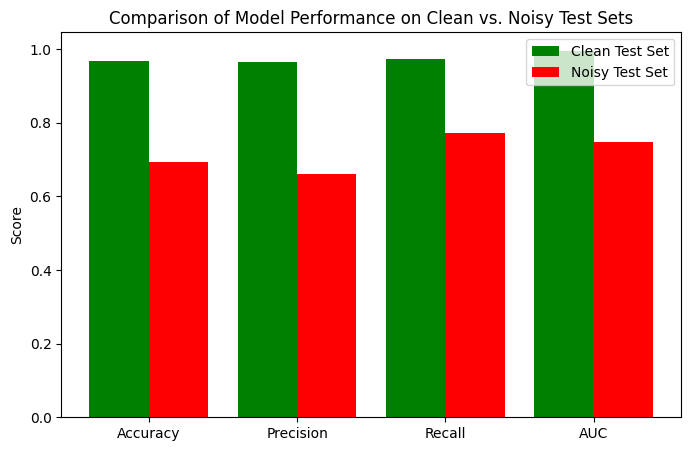

3005/3005 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 2s 593us/step


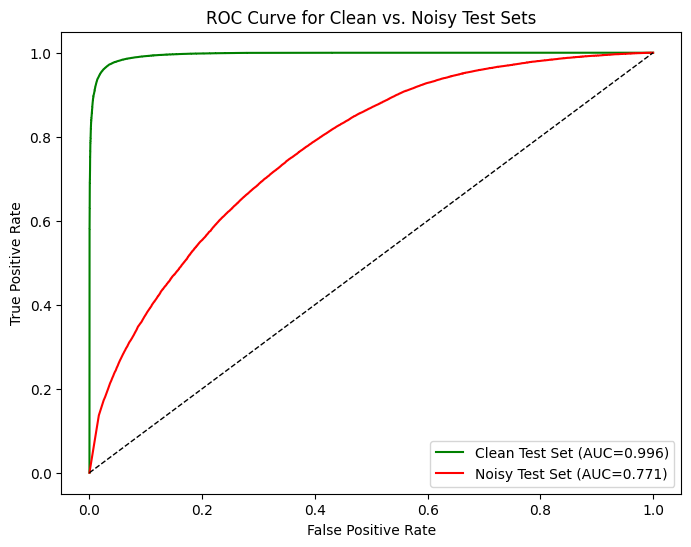

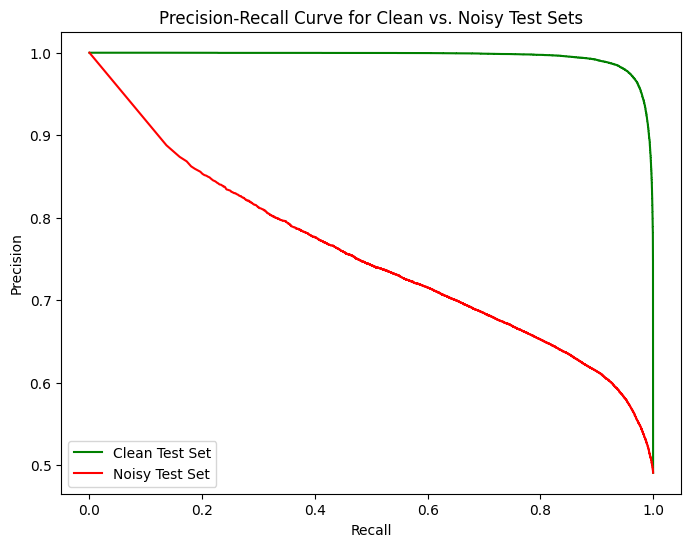

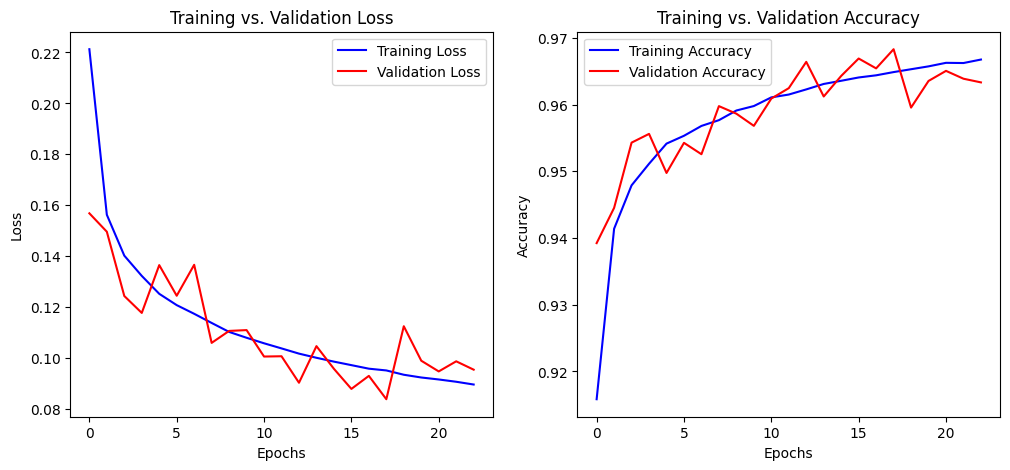

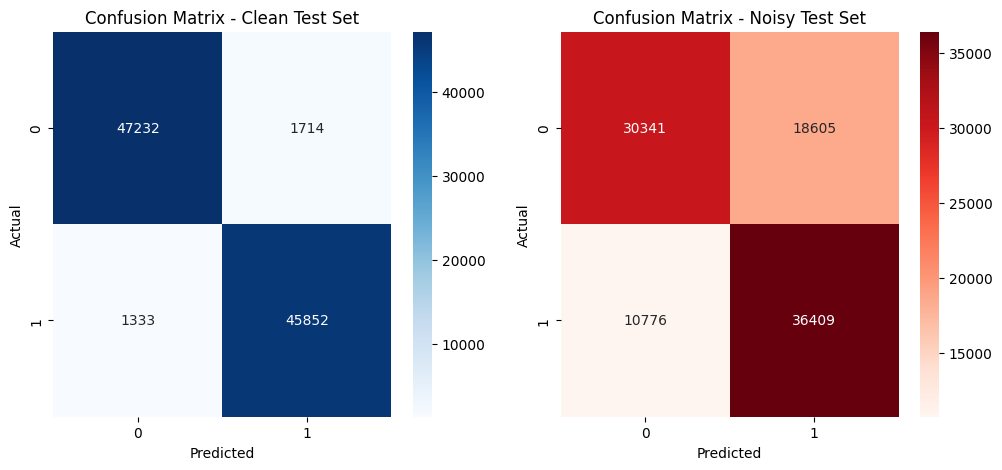

In [427]:
def nn_visuals(test_results, test_results_noisy):

    # Bar Chart Comparing Clean vs. Noisy Test Set Metrics
    metrics = ["Accuracy", "Precision", "Recall", "AUC"]
    clean_results = test_results[1:]  # Skipping loss value
    noisy_results = test_results_noisy[1:]

    x = np.arange(len(metrics))  # X-axis positions

    plt.figure(figsize=(8, 5))
    plt.bar(x - 0.2, clean_results, width=0.4, label="Clean Test Set", color="green")
    plt.bar(x + 0.2, noisy_results, width=0.4, label="Noisy Test Set", color="red")

    plt.xticks(x, metrics)
    plt.ylabel("Score")
    plt.title("Comparison of Model Performance on Clean vs. Noisy Test Sets")
    plt.legend()
    plt.show()

    # ROC Curves for Clean vs. Noisy Test Sets
    y_pred_proba_clean = model.predict(X_test).ravel()
    y_pred_proba_noisy = model.predict(X_test_noisy).ravel()

    fpr_clean, tpr_clean, _ = roc_curve(y_test, y_pred_proba_clean)
    fpr_noisy, tpr_noisy, _ = roc_curve(y_test, y_pred_proba_noisy)

    auc_clean = auc(fpr_clean, tpr_clean)
    auc_noisy = auc(fpr_noisy, tpr_noisy)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_clean, tpr_clean, label=f"Clean Test Set (AUC={auc_clean:.3f})", color="green")
    plt.plot(fpr_noisy, tpr_noisy, label=f"Noisy Test Set (AUC={auc_noisy:.3f})", color="red")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Clean vs. Noisy Test Sets")
    plt.legend()
    plt.show()

    # Precision-Recall Curve
    precision_clean, recall_clean, _ = precision_recall_curve(y_test, y_pred_proba_clean)
    precision_noisy, recall_noisy, _ = precision_recall_curve(y_test, y_pred_proba_noisy)

    plt.figure(figsize=(8, 6))
    plt.plot(recall_clean, precision_clean, label="Clean Test Set", color="green")
    plt.plot(recall_noisy, precision_noisy, label="Noisy Test Set", color="red")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve for Clean vs. Noisy Test Sets")
    plt.legend()
    plt.show()

    # Training Loss & Accuracy Curves
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss", color="blue")
    plt.plot(history.history["val_loss"], label="Validation Loss", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss")
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Training Accuracy", color="blue")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs. Validation Accuracy")
    plt.legend()

    plt.show()

    # Confusion Matrices for Clean vs. Noisy Predictions
    y_pred_clean = (y_pred_proba_clean > 0.5).astype(int)
    y_pred_noisy = (y_pred_proba_noisy > 0.5).astype(int)

    conf_matrix_clean = confusion_matrix(y_test, y_pred_clean)
    conf_matrix_noisy = confusion_matrix(y_test, y_pred_noisy)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(conf_matrix_clean, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title("Confusion Matrix - Clean Test Set")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    sns.heatmap(conf_matrix_noisy, annot=True, fmt="d", cmap="Reds", ax=axes[1])
    axes[1].set_title("Confusion Matrix - Noisy Test Set")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.show()

nn_visuals(test_results, test_results_noisy)

#### Summary of Model Performance:

**Strong Performance on Clean Data**  
The model does a great job at predicting fire occurrences under ideal conditions, scoring an impressive AUC of 0.994. Accuracy, precision, and recall are all high, meaning it reliably differentiates between fire and non-fire scenarios when the data is clean.  

**Struggles with Noisy Data**  
When noise is introduced, performance takes a noticeable hit, with AUC dropping to 0.780. The confusion matrix shows more false positives and false negatives, suggesting the model isn’t as confident when faced with slightly altered or uncertain environmental data.  

**Precision vs. Recall Tradeoff**  
For clean data, the precision-recall curve looks great, but on noisy data, precision drops as recall increases. In real-world situations, this could mean the model overestimates fire risk when conditions aren’t perfect.  

**Well-Balanced Training**  
The training and validation loss curves look solid, showing that the model learned effectively without overfitting. It generalizes well to unseen data, but as the noisy test results suggest, it may struggle with real-world variability.  

**Next Steps for Deployment**  
While the model performs well in controlled settings, its sensitivity to noise is a challenge for real-world use. Improving its ability to handle uncertain data—through better noise handling, adversarial training, or additional regularization—could make it more reliable for fire prediction.

### Hyperparameter Tuning

#### Why did I chose these parameters to search?

- ***neurons_1 (First Dense Layer)***
`hp.Int("neurons_1", min_value=32, max_value=128, step=16)`
  - **Reason:** The first layer is the most important as it processes raw input data. A range from 32 to 128 neurons allows us to test different capacities while avoiding excessive complexity.
  - **Step 16:** Ensures we explore a variety of values without testing every single number, making the search more efficient.

- ***neurons_2 (Second Dense Layer)***
`hp.Int("neurons_2", min_value=16, max_value=64, step=16)`
  - **Reason:** The second layer refines the learned features from the first layer. Why 16–64? Keeping it smaller than the first layer follows the general principle of gradually reducing neurons across layers for better generalization.

- ***neurons_3 (Third Dense Layer)***
`hp.Int("neurons_3", min_value=8, max_value=32, step=8)`
  - **Reason:** A small final dense layer acts as a bottleneck, forcing the network to extract the most meaningful patterns before making a prediction. Why 8–32? Keeping it low prevents overfitting and ensures a compact representation.

- ***Optimizer Choice***
`hp.Choice("optimizer", ["adam", "rmsprop", "sgd"])`
  - **Reason:** Different optimizers impact training speed and accuracy differently.
     - **adam (default choice):** Adaptive learning rate, usually the best general optimizer.
     - **rmsprop:** Works well for recurrent patterns, stabilizes training.
     - **sgd:** Simple, sometimes better for small datasets, though slower.

#### Hyperparameter Search Parameters
These control the behavior of the random search.

- ***max_trials=10***
  - **Reason:** Limits the number of random model configurations tested. Why 10? It provides a good balance between exploration and training efficiency.

- ***executions_per_trial=1***
  - **Reason:** Trains each configuration once to speed up the search.
  - **Alternative:** If set higher (e.g., executions_per_trial=3), each configuration would be tested multiple times for more stability.

#### Training Parameters
These parameters influence the model training process.

- ***epochs=50***
`tuner.search(..., epochs=50, ...)`
  - **Reason:** 50 epochs is a good baseline for convergence. Why not higher? Early stopping ensures we stop when no improvement is found, so 50 is a safe maximum.
  
- ***batch_size=32***
  - **Reason:** A balanced batch size between computational efficiency and model convergence. Why not higher? Larger batch sizes require more memory and can lead to poor generalization. Why not lower? Too small slows training and increases noise.

- ***Early Stopping***
```callbacks=[early_stopping]```
  - **Reason:** Prevents overfitting by stopping training when validation loss stops improving. Why patience=5? If the model doesn't improve for 5 epochs, training stops early to save time.


#### Setup 

In [428]:
# # Function to build the model
# def build_model(hp):
#     model = keras.Sequential([
#         layers.Dense(hp.Int("neurons_1", min_value=32, max_value=128, step=16), activation="relu", input_shape=(X_train.shape[1],)),
#         layers.Dense(hp.Int("neurons_2", min_value=16, max_value=64, step=16), activation="relu"),
#         layers.Dense(hp.Int("neurons_3", min_value=8, max_value=32, step=8), activation="relu"),
#         layers.Dense(1, activation="sigmoid")  # Binary classification
#     ])
    
#     model.compile(
#         optimizer=hp.Choice("optimizer", ["adam", "rmsprop", "sgd"]),
#         loss="binary_crossentropy",
#         metrics=["accuracy", "Precision", "Recall", "AUC"]
#     )
    
#     return model

# # Early stopping callback
# early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# # Random search with keras-tuner
# tuner = kt.RandomSearch(
#     build_model,
#     objective="val_accuracy",
#     max_trials=10,  # Adjust number of random searches
#     executions_per_trial=1,
#     directory="random_search",
#     project_name="fire_prediction"
# )

#### Run Search - Commented out as it takes circa 1h30 to run

In [429]:
# # Run the random search
# tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping])

# # Get the best model
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_model = tuner.get_best_models(num_models=1)[0]


## Amended Model

In [430]:
df_prediction = data_for_ML_engineered_for_prediction.copy()

In [431]:
# Drop unnecessary columns
df_prediction = df_prediction.drop(columns=["index"])

# Separate features and target
X = df_prediction.drop(columns=["Fire_Occurrence"])
y = df_prediction["Fire_Occurrence"]

# Split data into training and testing sets (with stratified sampling to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a noisy test set by adding random noise to X_test
noise_factor = 0.1  # Adjust noise level as needed
X_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)

# Define Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Track validation loss
    patience=5,  # Stop training if no improvement after 5 epochs
    restore_best_weights=True  # Restore the best model weights
)

In [432]:
# Define the neural network model with tuned hyperparameters
model = keras.Sequential([
    layers.Dense(112, activation="relu", input_shape=(X_train.shape[1],)),  # First hidden layer
    layers.Dense(64, activation="relu"),  # Second hidden layer
    layers.Dense(32, activation="relu"),  # Third hidden layer
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model with multiple metrics
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])


c:\Users\catar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
12017/12017 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8949 - auc_4: 0.9519 - loss: 0.2683 - precision_4: 0.8843 - recall_4: 0.9038 - val_accuracy: 0.9392 - val_auc_4: 0.9876 - val_loss: 0.1548 - val_precision_4: 0.9148 - val_recall_4: 0.9662
Epoch 2/50
12017/12017 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9448 - auc_4: 0.9853 - loss: 0.1504 - precision_4: 0.9427 - recall_4: 0.9449 - val_accuracy: 0.9546 - val_auc_4: 0.9912 - val_loss: 0.1214 - val_precision_4: 0.9443 - val_recall_4: 0.9643
Epoch 3/50
12017/12017 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9501 - auc_4: 0.9881 - loss: 0.1347 - precision_4: 0.9499 - recall_4: 0.9488 - val_accuracy: 0.9530 - val_auc_4: 0.9902 - val_loss: 0.1252 - val_precision_4: 0.9581 - val_recall_4: 0.9458
Epoch 4/50
12017/12017 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9542 - auc_4: 0.9896 - loss: 0.1254 - precision_4: 0.9555 - recall_4: 0.9512 - val_accuracy: 0.9477 - val_auc_4: 0.9916 - val_loss: 0.1559 - val_precisi

In [433]:
# Evaluate on clean test set
test_results = model.evaluate(X_test, y_test, verbose=0)

# Evaluate on noisy test set
test_results_noisy = model.evaluate(X_test_noisy, y_test, verbose=0)

# Print evaluation results for both test sets
print(f"Test Results (Clean Test Set): Accuracy={test_results[1]:.4f}, Precision={test_results[2]:.4f}, Recall={test_results[3]:.4f}, AUC={test_results[4]:.4f}")
print(f"Test Results (Noisy Test Set): Accuracy={test_results_noisy[1]:.4f}, Precision={test_results_noisy[2]:.4f}, Recall={test_results_noisy[3]:.4f}, AUC={test_results_noisy[4]:.4f}")


Test Results (Clean Test Set): Accuracy=0.9675, Precision=0.9674, Recall=0.9665, AUC=0.9954
Test Results (Noisy Test Set): Accuracy=0.6886, Precision=0.6433, Recall=0.8217, AUC=0.7398


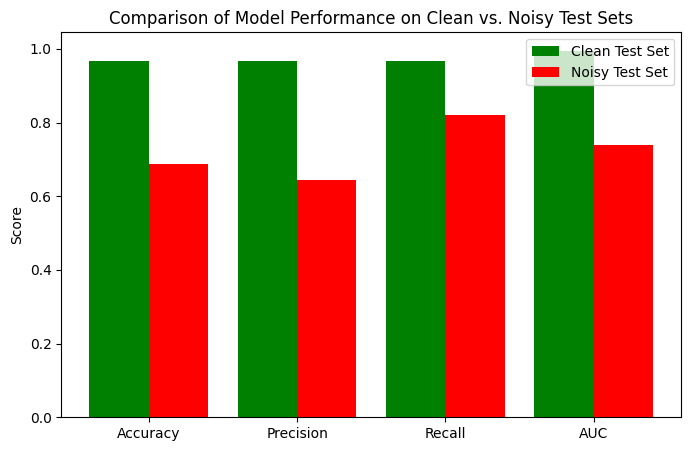

3005/3005 ━━━━━━━━━━━━━━━━━━━━ 2s 492us/step
3005/3005 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step


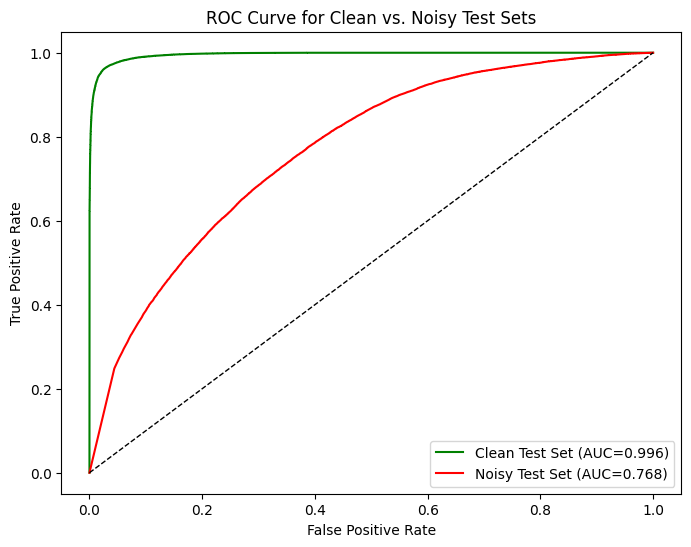

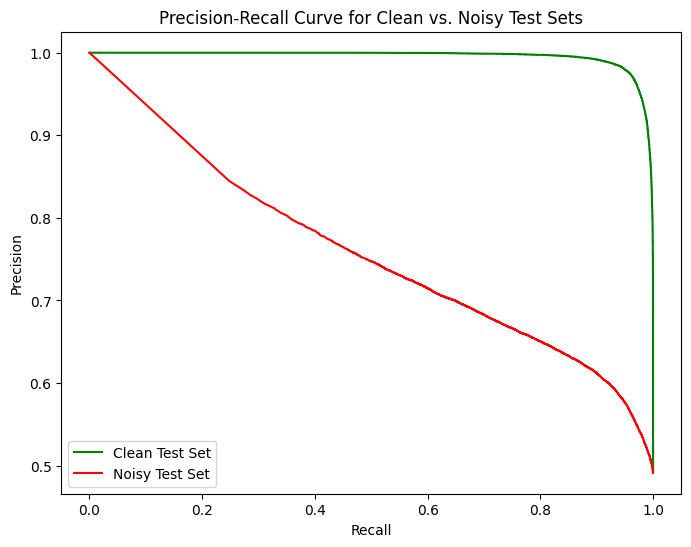

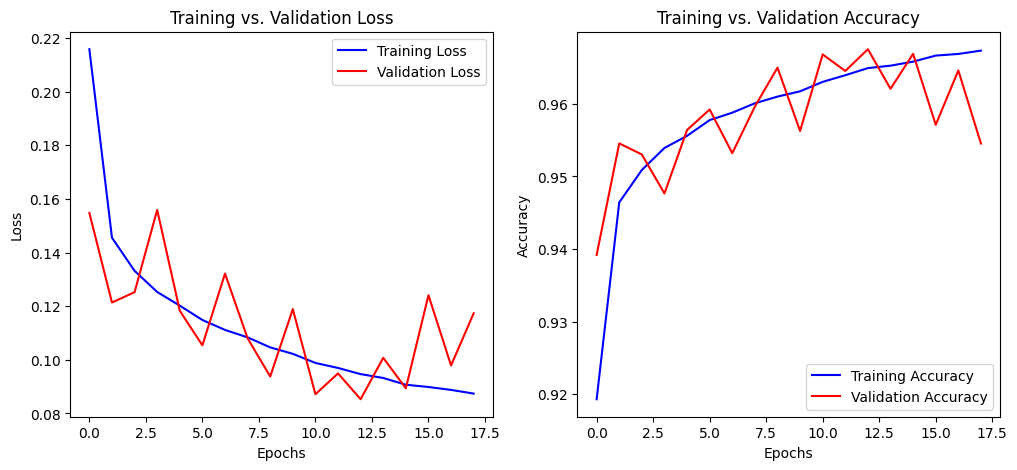

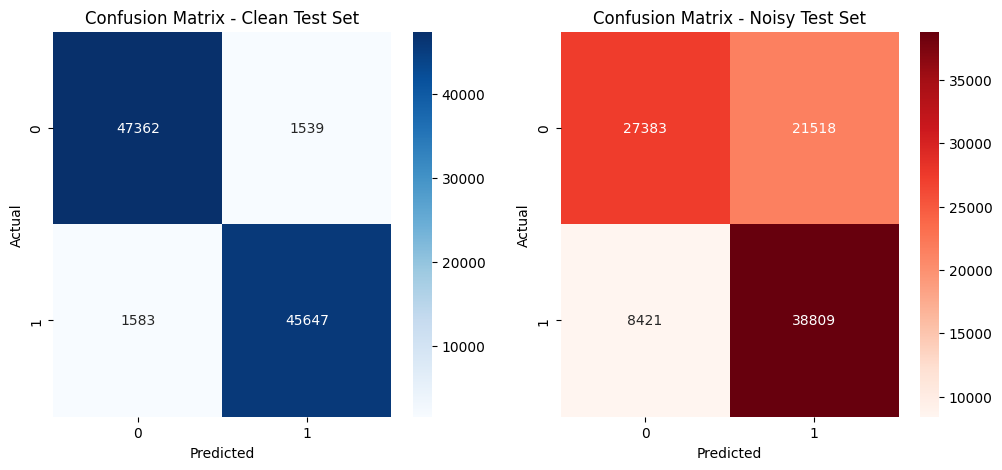

In [434]:
nn_visuals(test_results, test_results_noisy)

#### Summary of Model Performance:

- **Clean vs. Noisy Gap:** Both sets show significantly higher performance on clean data vs. noisy data.

- **Slight Improvements on Clean Data:** The second set typically has higher accuracy, precision, recall, and a marginally higher AUC on the clean test.

- **Trade‐Off on Noisy Data:** The second set shows slightly better accuracy and precision on the noisy test but a lower AUC—reflecting more false positives but fewer false negatives.

- **Longer Training (Second Set):** More epochs lead to slightly lower validation loss and higher final validation accuracy.

- **Overall Conclusion:** The second set improves clean‐data performance while shifting the trade‐off on the noisy set—some metrics are better, some (like AUC) are slightly lower, but the gap between clean and noisy remains pronounced.

## Mock Inputs

In [435]:
# Function to predict fire risk from new data
def predict_fire_risk(new_data):
    prediction = model.predict(np.array([new_data]))[0][0]
    return "Fire Risk" if prediction >= 0.5 else "No Fire Risk"


# Example mock data (fire risk case - normalized)
fire_risk_data = [0.030000, 0.150000, 0.480000, 0.490000, 0.510000, 0.550000, 0.700000, 0.650000, 0.640000, 0.620000, 0.870000, 0.950000]  
print("Fire Risk Prediction:", predict_fire_risk(fire_risk_data))

custom_data = [
    0.250000,  # VPD (High - inverse relationship)
    0.001000,  # Soil_Drying_Index_L1 (Low)
    0.002000,  # Soil_Drying_Index_L2 (Low)
    0.003000,  # Soil_Drying_Index_L3 (Low)
    0.004000,  # Soil_Drying_Index_L4 (Low)
    0.500000,  # Heating_Index_L1 (Low)
    0.400000,  # Heating_Index_L2 (Low)
    0.300000,  # Heating_Index_L3 (Low)
    0.200000,  # Heating_Index_L4 (Low)
    0.980000,  # Evaporation (High)
    0.970000,  # Evaporation_Vegetation (High)
    0.250000   # Air_Temperature_2m_Index (Low)
]

print("Fire Risk Prediction:", predict_fire_risk(custom_data))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Fire Risk Prediction: Fire Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Fire Risk Prediction: No Fire Risk


## XGBOOST - Nuanced Fire Risk Prediction

Due to time constraints I was unable to progress the Neural Network Model to predict gradual probabilities rather than binary, however this presented itself as a great opportunity to use and learn about XGBoost models.

### Breakdown and Explanation of Code Choices

This code is designed to predict fire intensity categories using a Random Forest classifier. Below is a breakdown of why each component was chosen, similar to the neural network explanation.

- ***Feature Selection***
    - **Reasoning:** Relevant to fire intensity. The selected features include temperature (air, soil, and skin), pressure, radiation, and evaporation—all key indicators for fire behavior.

- ***Target Variable and Categorization***
`labels=["Low", "Medium-Low", "Medium", "Medium-High", "High"]`
    - **Reasoning** Fire intensity is continuous, so converting it into 5 quantile-based categories makes classification possible. Five categories provide a granular understanding of fire risk without making classification too complex.

- ***Label Encoding***
`label_encoder = LabelEncoder()`
    - **Reasoning:** Machine learning models require numeric targets, so categories are encoded into integers (e.g., Low → 0, Medium-Low → 1, etc.). Preserves class order: Ensures that categories maintain their relative ranking, crucial for intensity-based classification.

- ***Train-Test Split***
`train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)`
    - **Reasoning:** Stratified splitting (stratify=y) maintains the class distribution in training and testing sets, preventing imbalance issues. 20% test size provides enough data to evaluate performance while leaving sufficient data for training.

- ***Random Forest Classifier***
`model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")`
    - **Reasoning:** Random Forest was chosen because it handles nonlinear relationships well (e.g., fire intensity isn’t a simple linear function of temperature). It is robust to noise and outliers. It can capture complex interactions between weather variables.

- ***Hyperparameters***
    - **n_estimators=100:** Uses 100 trees for a good balance between performance and computation time.
    - **class_weight="balanced":** Addresses class imbalances by adjusting weights dynamically.
    - **random_state=42:** Ensures reproducibility.

- ***Predictions and Evaluation***
`y_pred = model.predict(X_test)`
    - **Reasoning:** The trained model predicts fire intensity categories based on the test set.
The output is a categorical prediction (e.g., "Medium-High" or "Low"), which is later evaluated.

- ***Model Performance Metrics***
`report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)`
`conf_matrix = confusion_matrix(y_test, y_pred)`
    - **Reasoning: classification_report() Provides precision, recall, and F1-score for each fire intensity category. Helps identify whether the model overpredicts or underpredicts certain categories.

- ***confusion_matrix()***
    - Shows misclassification patterns. Helps assess if the model confuses neighboring fire intensity levels (e.g., predicting Medium-High instead of High).


In [436]:
# Load and Prepare Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [437]:
# Train XGBoost Classifier with Further Reduced Complexity
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric="logloss",
    n_estimators=60,  
    learning_rate=0.008,  # Lowered further for softer probability estimates
    max_depth=1,  # Simplest model to prevent overconfidence
    reg_lambda=5,  
    reg_alpha=2,  
    subsample=0.6,  
    colsample_bytree=0.8
)

xgb_model.fit(X_train, y_train)

# Apply Isotonic Calibration
ignore_warnings(category=ConvergenceWarning)
calibrated_model = CalibratedClassifierCV(clone(xgb_model), method='isotonic', cv=5)  
calibrated_model.fit(X_train, y_train)

# Get Predicted Probabilities
y_pred_proba = calibrated_model.predict_proba(X_test)[:, 1]  

In [438]:
# Apply Temperature Scaling (T=6.0)
def temperature_scale(probs, temperature):
    eps = 1e-6  
    probs = np.clip(probs, eps, 1 - eps)  
    return expit(np.log(probs / (1 - probs)) / temperature)  

y_pred_proba_scaled = temperature_scale(y_pred_proba, temperature=5.5)  

# Convert Probabilities to Percentages
y_pred_percentages = (y_pred_proba_scaled * 100).round(2)

In [439]:
# Evaluate Performance
roc_auc = roc_auc_score(y_test, y_pred_proba_scaled)
brier = brier_score_loss(y_test, y_pred_proba_scaled)
logloss = log_loss(y_test, y_pred_proba_scaled)

print(f"ROC AUC: {roc_auc:.4f}")
print(f"Brier Score: {brier:.4f}")
print(f"Log Loss: {logloss:.4f}")

# Show Example Predictions
comparison_df = pd.DataFrame({
    "Actual Fire Occurrence": y_test[:10].values,
    "Predicted Fire Probability (%)": y_pred_percentages[:10]
})

print("\nExample Predictions:")
print(comparison_df)

ROC AUC: 0.9707
Brier Score: 0.1152
Log Loss: 0.3992

Example Predictions:
   Actual Fire Occurrence  Predicted Fire Probability (%)
0                       1                           51.63
1                       1                           64.37
2                       1                           81.30
3                       1                           55.55
4                       0                           23.16
5                       0                           23.16
6                       0                           23.16
7                       0                           23.16
8                       1                           81.30
9                       0                           23.16


The model shows strong performance with a ROC AUC of 0.9707, indicating excellent capability in distinguishing between fire and non-fire events. 

A low Brier Score of 0.1152 suggests that the predicted probabilities are well calibrated, while the Log Loss of 0.3992 reflects a relatively low average error in prediction. 

In the example predictions, instances where a fire occurred have significantly higher probabilities (ranging from about 51.63% to 81.30%) compared to instances with no fire (consistently around 23.16%), highlighting the model’s clear differentiation between the two classes.

In [440]:
################
# VERY LOW Fire Risk Scenario
################

custom_data_very_low = [
    0.250000,  # VPD (High - inverse relationship)
    0.001000,  # Soil_Drying_Index_L1 (Low)
    0.002000,  # Soil_Drying_Index_L2 (Low)
    0.003000,  # Soil_Drying_Index_L3 (Low)
    0.004000,  # Soil_Drying_Index_L4 (Low)
    0.500000,  # Heating_Index_L1 (Low)
    0.400000,  # Heating_Index_L2 (Low)
    0.300000,  # Heating_Index_L3 (Low)
    0.200000,  # Heating_Index_L4 (Low)
    0.980000,  # Evaporation (High)
    0.970000,  # Evaporation_Vegetation (High)
    0.250000   # Air_Temperature_2m_Index (Low)
]

print("Fire Risk Prediction (Very Low):", predict_fire_risk(custom_data_very_low))

################
# LOW Fire Risk Scenario
################

custom_data_low = [
    0.350000,  # VPD (High - inverse relationship)
    0.003000,  # Soil_Drying_Index_L1 (Low)
    0.001000,  # Soil_Drying_Index_L2 (Low)
    0.005000,  # Soil_Drying_Index_L3 (Low)
    0.014000,  # Soil_Drying_Index_L4 (Low)
    0.150000,  # Heating_Index_L1 (Low)
    0.240000,  # Heating_Index_L2 (Low)
    0.030000,  # Heating_Index_L3 (Low)
    0.100000,  # Heating_Index_L4 (Low)
    0.980000,  # Evaporation (High)
    0.970000,  # Evaporation_Vegetation (High)
    0.250000   # Air_Temperature_2m_Index (Low)
]

print("Fire Risk Prediction (Low):", predict_fire_risk(custom_data_low))


#################
# MODERATE Fire Risk Scenario
#################

custom_data_moderate = [
    0.150,  # VPD (Moderate)
    0.130,  # Soil_Drying_Index_L1 (Moderate)
    0.132,  # Soil_Drying_Index_L2 (Moderate)
    0.134,  # Soil_Drying_Index_L3 (Moderate)
    0.136,  # Soil_Drying_Index_L4 (Moderate)
    0.135,  # Heating_Index_L1 (Moderate)
    0.133,  # Heating_Index_L2 (Moderate)
    0.131,  # Heating_Index_L3 (Moderate)
    0.129,  # Heating_Index_L4 (Moderate)
    0.800,  # Evaporation (Moderate)
    0.810,  # Evaporation_Vegetation (Moderate)
    0.300   # Air_Temperature_2m_Index (Moderate)
]

print("Fire Risk Prediction (Moderate):", predict_fire_risk(custom_data_moderate))

#################
# HIGH Fire Risk Scenario
#################

custom_data_high = [
    0.200,  # VPD (High)
    0.170,  # Soil_Drying_Index_L1 (High)
    0.172,  # Soil_Drying_Index_L2 (High)
    0.174,  # Soil_Drying_Index_L3 (High)
    0.176,  # Soil_Drying_Index_L4 (High)
    0.175,  # Heating_Index_L1 (High)
    0.173,  # Heating_Index_L2 (High)
    0.171,  # Heating_Index_L3 (High)
    0.169,  # Heating_Index_L4 (High)
    0.900,  # Evaporation (High)
    0.910,  # Evaporation_Vegetation (High)
    0.400   # Air_Temperature_2m_Index (High)
]

print("Fire Risk Prediction (High):", predict_fire_risk(custom_data_high))

#################
# EXTREME Fire Risk Scenario
#################

custom_data_extreme = [
    0.250,  # VPD (Extreme)
    0.220,  # Soil_Drying_Index_L1 (Extreme)
    0.230,  # Soil_Drying_Index_L2 (Extreme)
    0.240,  # Soil_Drying_Index_L3 (Extreme)
    0.250,  # Soil_Drying_Index_L4 (Extreme)
    0.260,  # Heating_Index_L1 (Extreme)
    0.250,  # Heating_Index_L2 (Extreme)
    0.240,  # Heating_Index_L3 (Extreme)
    0.230,  # Heating_Index_L4 (Extreme)
    1.000,  # Evaporation (Extreme)
    0.990,  # Evaporation_Vegetation (Extreme)
    0.500   # Air_Temperature_2m_Index (Extreme)
]

print("Fire Risk Prediction (Extreme):", predict_fire_risk(custom_data_extreme))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Fire Risk Prediction (Very Low): No Fire Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Fire Risk Prediction (Low): Fire Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Fire Risk Prediction (Moderate): Fire Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Fire Risk Prediction (High): Fire Risk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Fire Risk Prediction (Extreme): No Fire Risk


# ML Fire Intensity

In [441]:
data_for_ML_encoded.head()

Latitude_1d  Longitude_1d        Date Climate_Date  Country  Instrument  \
0         29.0         -13.7  2000-10-01   2000-10-01        1           1   
1         29.0         -13.7  2000-10-02   2000-10-02        1           1   
2         29.0         -13.7  2000-10-03   2000-10-03        1           1   
3         29.0         -13.7  2000-10-04   2000-10-04        1           1   
4         29.0         -13.7  2000-10-05   2000-10-05        1           1   

   Day_Night  Satellite  Fire_Occurrence  Time  ...  Heating_Index_L2  \
0          2          3                0   0.0  ...               NaN   
1          2          3                0   0.0  ...               NaN   
2          2          3                0   0.0  ...               NaN   
3          2          3                0   0.0  ...               NaN   
4          2          3                0   0.0  ...               NaN   

   Heating_Index_L3  Heating_Index_L4  VPD_Fire_Risk  \
0               NaN               NaN            NaN   
1               NaN               NaN            NaN   
2               NaN               NaN            NaN   
3               NaN               NaN            NaN   
4               NaN               NaN            NaN   

   Evaporation_Decrease_Index  Evaporation_Vegetation_Decrease_Index  \
0                         NaN                                    NaN   
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   

   Air_Temperature_2m_Index  Surface_Runoff_Decrease_Index  \
0                       NaN                            NaN   
1                       NaN                            NaN   
2                       NaN                            NaN   
3                       NaN                            NaN   
4                       NaN                            NaN   

   Precipitation_Decrease_Index  Dew_Point_Temperature_2m_Decrease_Index  
0                           NaN                                      NaN  
1                           NaN                                      NaN  
2                           NaN                                      NaN  
3                           NaN                                      NaN  
4                           NaN                                      NaN  

[5 rows x 59 columns]

In [442]:
data_for_ML_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494326 entries, 0 to 494325
Data columns (total 59 columns):
 #   Column                                   Non-Null Count   Dtype               
---  ------                                   --------------   -----               
 0   Latitude_1d                              494326 non-null  float64             
 1   Longitude_1d                             494326 non-null  float64             
 2   Date                                     494326 non-null  date32[day][pyarrow]
 3   Climate_Date                             494326 non-null  datetime64[ns]      
 4   Country                                  494326 non-null  int64               
 5   Instrument                               494326 non-null  int64               
 6   Day_Night                                494326 non-null  int64               
 7   Satellite                                494326 non-null  int64               
 8   Fire_Occurrence                          494

In [443]:
df_for_intensity = data_for_ML_encoded.copy()

df_for_intensity = df_for_intensity[(df_for_intensity['Brightness_K']!= 0.0) & (df_for_intensity['Fire_Radiative_Power_MW'] != 0.0)]

In [444]:
df_for_intensity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249184 entries, 4469 to 494325
Data columns (total 59 columns):
 #   Column                                   Non-Null Count   Dtype               
---  ------                                   --------------   -----               
 0   Latitude_1d                              249184 non-null  float64             
 1   Longitude_1d                             249184 non-null  float64             
 2   Date                                     249184 non-null  date32[day][pyarrow]
 3   Climate_Date                             249184 non-null  datetime64[ns]      
 4   Country                                  249184 non-null  int64               
 5   Instrument                               249184 non-null  int64               
 6   Day_Night                                249184 non-null  int64               
 7   Satellite                                249184 non-null  int64               
 8   Fire_Occurrence                          24918

In [445]:
df_for_intensity[df_for_intensity['Brightness_K'] == 0.0]

Empty DataFrame
Columns: [Latitude_1d, Longitude_1d, Date, Climate_Date, Country, Instrument, Day_Night, Satellite, Fire_Occurrence, Time, Fire_Radiative_Power_MW, Brightness_K, Confidence_Level, Track_Width_km, Fire_Type, Brightness_T31_K, Scan_Width_km, Dataset_Version, Climate_Time, Skin_Temperature, Soil_Temperature_Layer1, Soil_Temperature_Layer2, Soil_Temperature_Layer3, Soil_Temperature_Layer4, Soil_Moisture_Layer1, Soil_Moisture_Layer2, Soil_Moisture_Layer3, Soil_Moisture_Layer4, Wind_U_Component_10m, Wind_V_Component_10m, Dew_Point_Temperature_2m, Air_Temperature_2m, Evaporation, Evaporation_Vegetation, Leaf_Area_Index_High_Vegetation, Leaf_Area_Index_Low_Vegetation, Potential_Evaporation, Surface_Pressure, Surface_Runoff, Surface_Sensible_Heat_Flux, Surface_Solar_Radiation, Surface_Solar_Radiation_Downward, Total_Precipitation, VPD, Soil_Drying_Index_L1, Soil_Drying_Index_L2, Soil_Drying_Index_L3, Soil_Drying_Index_L4, Heating_Index_L1, Heating_Index_L2, Heating_Index_L3, Heating_Index_L4, VPD_Fire_Risk, Evaporation_Decrease_Index, Evaporation_Vegetation_Decrease_Index, Air_Temperature_2m_Index, Surface_Runoff_Decrease_Index, Precipitation_Decrease_Index, Dew_Point_Temperature_2m_Decrease_Index]
Index: []

[0 rows x 59 columns]

In [446]:
df_for_intensity[df_for_intensity['Fire_Radiative_Power_MW'] == 0.0]

Empty DataFrame
Columns: [Latitude_1d, Longitude_1d, Date, Climate_Date, Country, Instrument, Day_Night, Satellite, Fire_Occurrence, Time, Fire_Radiative_Power_MW, Brightness_K, Confidence_Level, Track_Width_km, Fire_Type, Brightness_T31_K, Scan_Width_km, Dataset_Version, Climate_Time, Skin_Temperature, Soil_Temperature_Layer1, Soil_Temperature_Layer2, Soil_Temperature_Layer3, Soil_Temperature_Layer4, Soil_Moisture_Layer1, Soil_Moisture_Layer2, Soil_Moisture_Layer3, Soil_Moisture_Layer4, Wind_U_Component_10m, Wind_V_Component_10m, Dew_Point_Temperature_2m, Air_Temperature_2m, Evaporation, Evaporation_Vegetation, Leaf_Area_Index_High_Vegetation, Leaf_Area_Index_Low_Vegetation, Potential_Evaporation, Surface_Pressure, Surface_Runoff, Surface_Sensible_Heat_Flux, Surface_Solar_Radiation, Surface_Solar_Radiation_Downward, Total_Precipitation, VPD, Soil_Drying_Index_L1, Soil_Drying_Index_L2, Soil_Drying_Index_L3, Soil_Drying_Index_L4, Heating_Index_L1, Heating_Index_L2, Heating_Index_L3, Heating_Index_L4, VPD_Fire_Risk, Evaporation_Decrease_Index, Evaporation_Vegetation_Decrease_Index, Air_Temperature_2m_Index, Surface_Runoff_Decrease_Index, Precipitation_Decrease_Index, Dew_Point_Temperature_2m_Decrease_Index]
Index: []

[0 rows x 59 columns]

In [447]:
df_for_intensity = df_for_intensity[[
                                    'Brightness_K',
                                    'Fire_Radiative_Power_MW',
                                    'Skin_Temperature', 
                                    'Soil_Temperature_Layer1', 
                                    'Soil_Temperature_Layer2', 
                                    'Soil_Temperature_Layer3',
                                    'Soil_Moisture_Layer4',
                                    'Dew_Point_Temperature_2m',
                                    'Air_Temperature_2m',
                                    'Evaporation_Vegetation',
                                    'Surface_Pressure',
                                    'Surface_Solar_Radiation_Downward']]

In [448]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

df_for_intensity_scaled = pd.DataFrame(scaler.fit_transform(df_for_intensity), columns=df_for_intensity.columns)


In [449]:
df_for_intensity_scaled['Fire_Intensity_Index'] = df_for_intensity_scaled['Brightness_K'] + df_for_intensity_scaled['Fire_Radiative_Power_MW'] 

In [450]:
df_for_intensity_scaled.head()

Brightness_K  Fire_Radiative_Power_MW  Skin_Temperature  \
0      0.153236                 0.000129          0.707366   
1      0.153236                 0.000129          0.738674   
2      0.153236                 0.000129          0.787919   
3      0.153236                 0.000129          0.802094   
4      0.370900                 0.001405          0.501694   

   Soil_Temperature_Layer1  Soil_Temperature_Layer2  Soil_Temperature_Layer3  \
0                 0.649987                 0.724904                 0.745293   
1                 0.677965                 0.718777                 0.746601   
2                 0.731398                 0.732460                 0.748055   
3                 0.746556                 0.744963                 0.750413   
4                 0.412391                 0.527055                 0.600168   

   Soil_Moisture_Layer4  Dew_Point_Temperature_2m  Air_Temperature_2m  \
0               0.00009                  0.846953            0.581097   
1               0.00009                  0.872403            0.593836   
2               0.00009                  0.858559            0.636949   
3               0.00009                  0.870599            0.623464   
4               0.00009                  0.675130            0.509342   

   Evaporation_Vegetation  Surface_Pressure  Surface_Solar_Radiation_Downward  \
0                0.904314          0.842799                          0.585525   
1                0.904388          0.838916                          0.622017   
2                0.904354          0.840024                          0.847322   
3                0.904365          0.840963                          0.851472   
4                0.903965          0.872567                          0.268278   

   Fire_Intensity_Index  
0              0.153365  
1              0.153365  
2              0.153365  
3              0.153365  
4              0.372305

## Correlations Between Fire Intensity and Other

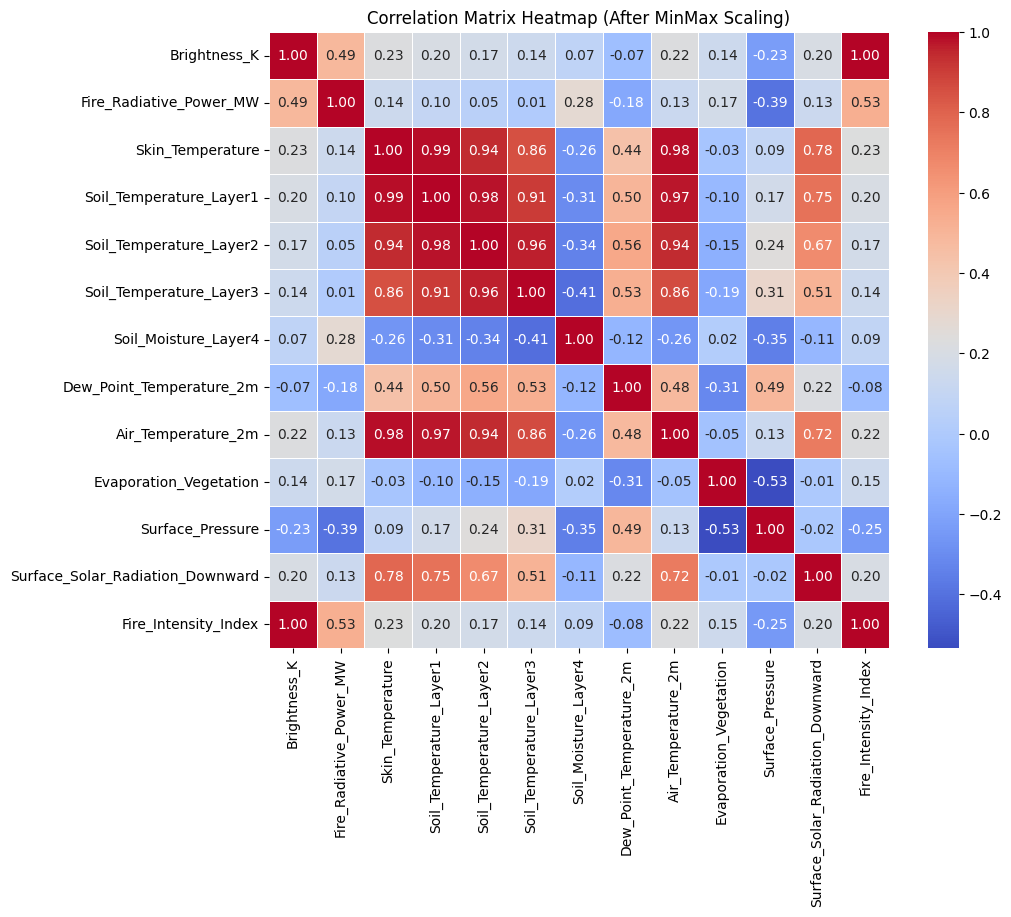

In [451]:
# Compute correlation matrix after scaling
correlation_matrix_scaled = df_for_intensity_scaled.corr(method = 'spearman')

# Plot the correlation matrix heatmap after scaling
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_scaled, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (After MinMax Scaling)")
plt.show()


#### Summary of Correlations Between Fire Intensity and Other Variables

The correlation heatmap provides insights into how Fire Intensity relates to other environmental factors. Here are the key observations:

- **Temperature-related variables (Skin Temperature, Soil Temperature Layers, and Air Temperature at 2m) all show moderate to strong correlations (ranging from 0.17 to 0.98)** with Fire Intensity. This highlights the role of heat accumulation in fire occurrences.
- **Evaporation Vegetation (-0.25) and Soil Moisture (-0.41)** have negative correlations, meaning that as soil and vegetation retain more moisture, fire intensity decreases. This reinforces the idea that drier conditions lead to stronger fires.
- **Solar Radiation Downward (0.14)** has a mild positive correlation, suggesting that higher solar radiation may contribute to increased fire intensity but isn’t a primary driver.
- **Surface Pressure (-0.25) and Dew Point Temperature (-0.08) show weak to moderate negative correlations**, indicating that lower pressure and drier air might slightly contribute to fire intensity.

Overall, fire intensity is primarily driven by temperature-related factors and dry conditions, while moisture retention and atmospheric conditions play a more secondary, mitigating role. These correlations reinforce the critical role of heat accumulation and dryness in wildfire risks.

Once again the hypothesis that soil metric fuel wildfire ignition and air variables are more correlated with the fire's intensity.

### Initialize and Apply K-Means Clustering

In [452]:
df_for_intensity_scaled.shape

(249184, 13)

In [453]:
df_for_intensity_scaled.columns

Index(['Brightness_K', 'Fire_Radiative_Power_MW', 'Skin_Temperature',
       'Soil_Temperature_Layer1', 'Soil_Temperature_Layer2',
       'Soil_Temperature_Layer3', 'Soil_Moisture_Layer4',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m',
       'Evaporation_Vegetation', 'Surface_Pressure',
       'Surface_Solar_Radiation_Downward', 'Fire_Intensity_Index'],
      dtype='object')

In [454]:
df_for_intensity_scaled['Surface_Pressure_Inverted'] = -df_for_intensity_scaled['Surface_Pressure']
df_for_intensity_scaled['Dew_Point_Temperature_2m_Inverted'] = -df_for_intensity_scaled['Dew_Point_Temperature_2m']


df_for_intensity_scaled.columns

Index(['Brightness_K', 'Fire_Radiative_Power_MW', 'Skin_Temperature',
       'Soil_Temperature_Layer1', 'Soil_Temperature_Layer2',
       'Soil_Temperature_Layer3', 'Soil_Moisture_Layer4',
       'Dew_Point_Temperature_2m', 'Air_Temperature_2m',
       'Evaporation_Vegetation', 'Surface_Pressure',
       'Surface_Solar_Radiation_Downward', 'Fire_Intensity_Index',
       'Surface_Pressure_Inverted', 'Dew_Point_Temperature_2m_Inverted'],
      dtype='object')

In [455]:
# Define the features and target variable (removed negatively correlated features)
features = [
    'Skin_Temperature', 'Soil_Temperature_Layer1', 'Soil_Temperature_Layer2',
    'Air_Temperature_2m', 'Evaporation_Vegetation', 'Surface_Solar_Radiation_Downward',
    'Surface_Pressure_Inverted', 'Dew_Point_Temperature_2m_Inverted'
]

target = "Fire_Intensity_Index"

# Scale the Fire Intensity Index for better clustering
scaler = MinMaxScaler()
df_for_intensity_scaled[target + "_Scaled"] = scaler.fit_transform(df_for_intensity_scaled[[target]])

#### Initialize, Apply and Evaluate K-Means

In [457]:
# Apply K-Means clustering to create 5 fire intensity categories
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_for_intensity_scaled["Fire_Intensity_Cluster"] = kmeans.fit_predict(df_for_intensity_scaled[[target + "_Scaled"]])

# Evaluate clustering quality
silhouette_avg = silhouette_score(df_for_intensity_scaled[[target + "_Scaled"]], df_for_intensity_scaled["Fire_Intensity_Cluster"])
calinski_harabasz = calinski_harabasz_score(df_for_intensity_scaled[[target + "_Scaled"]], df_for_intensity_scaled["Fire_Intensity_Cluster"])

print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better, range: -1 to 1)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")



Silhouette Score: 0.5610 (Higher is better, range: -1 to 1)
Calinski-Harabasz Index: 684862.3641 (Higher is better)


#### **K-Means Clustering Analysis Summary**

- **Silhouette Score (0.5610)**: This indicates **moderate-to-strong clustering**, meaning that most points are well matched to their assigned clusters rather than being ambiguous. A score above 0.5 suggests that the clusters are reasonably well separated but could potentially be improved with further tuning (e.g., optimizing the number of clusters or using alternative clustering methods).

- **Calinski-Harabasz Index (684,862.3641)**: This very high score indicates that the clusters are compact and well-separated relative to the dataset's overall variance. A higher score means that the clusters are distinct and well-defined.

Overall, these metrics suggest that K-Means has performed well, forming clusters that are correctly separated. However, there may still be room for refinement, such as change the number of clusters. 

In [458]:
# Map clusters to ordered intensity categories (Low to High) based on their mean Fire Intensity Index
cluster_means = df_for_intensity_scaled.groupby("Fire_Intensity_Cluster")[target].mean().sort_values()
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_means.index)}

# Assign categories based on cluster ranking
df_for_intensity_scaled["Fire_Intensity_Category_Encoded"] = df_for_intensity_scaled["Fire_Intensity_Cluster"].map(cluster_mapping)

# Convert numerical categories to labels
category_labels = ["Low", "Medium-Low", "Medium", "Medium-High", "High"]
df_for_intensity_scaled["Fire_Intensity_Category"] = df_for_intensity_scaled["Fire_Intensity_Category_Encoded"].map(lambda x: category_labels[x])


#### Initialize and Apply Random Forest

In [459]:
# Split data into training and testing sets
X = df_for_intensity_scaled[features]
y = df_for_intensity_scaled["Fire_Intensity_Category_Encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


#### Evaluate Random Forest

In [460]:
# Evaluation
report = classification_report(y_test, y_pred, target_names=category_labels)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

         Low       0.57      0.62      0.59     18508
  Medium-Low       0.40      0.36      0.38     13378
      Medium       0.38      0.35      0.36     12312
 Medium-High       0.24      0.23      0.24      5086
        High       0.11      0.24      0.15       553

    accuracy                           0.44     49837
   macro avg       0.34      0.36      0.34     49837
weighted avg       0.44      0.44      0.44     49837

Confusion Matrix:
 [[11472  3378  2658   904    96]
 [ 4214  4844  2792  1242   286]
 [ 3475  2848  4273  1375   341]
 [  918  1109  1483  1194   382]
 [   35    83   115   188   132]]


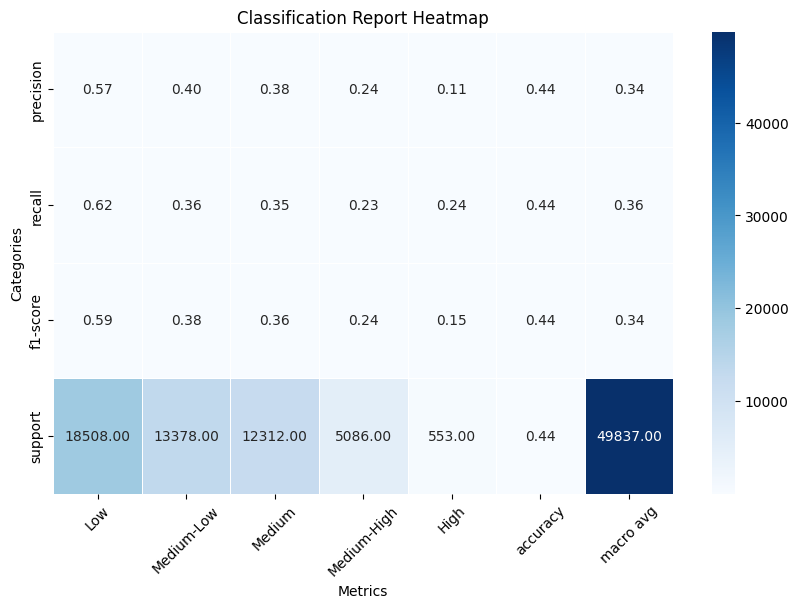

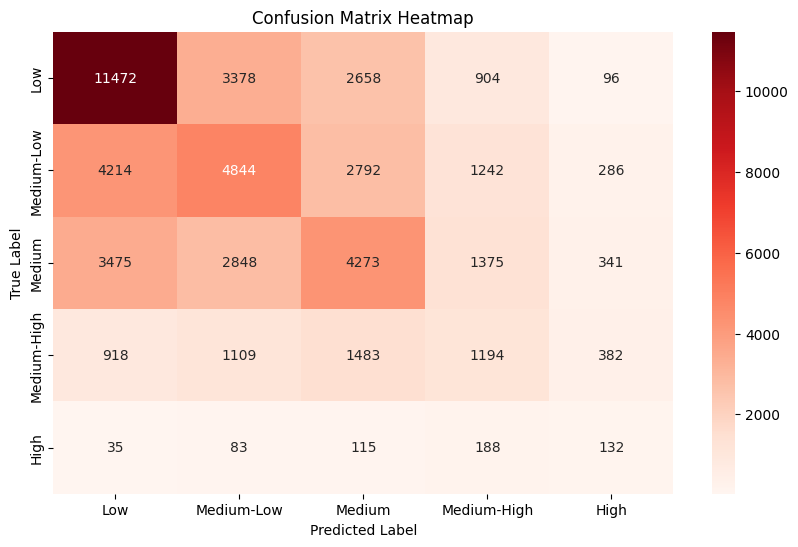

<Figure size 1000x600 with 0 Axes>

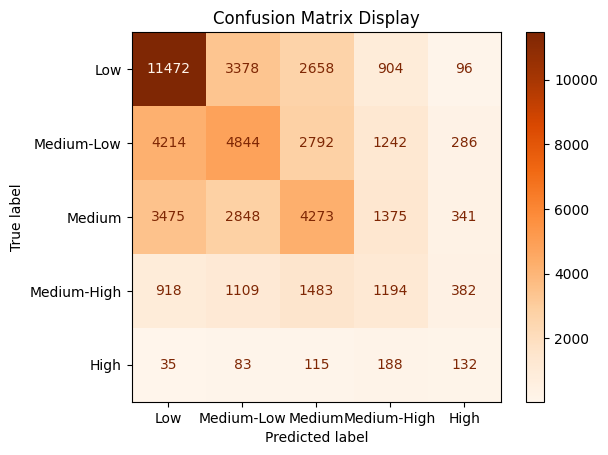

In [ ]:
# # Evaluation
# report = classification_report(y_test, y_pred, target_names=category_labels, output_dict=True)
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Convert classification report to DataFrame
# report_df = pd.DataFrame(report).transpose()

# # Classification Report Heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
# plt.title("Classification Report Heatmap")
# plt.xlabel("Metrics")
# plt.ylabel("Categories")
# plt.xticks(rotation=45)
# plt.show()

# # Confusion Matrix Heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(conf_matrix, annot=True, cmap="Reds", fmt="d", xticklabels=category_labels, yticklabels=category_labels)
# plt.title("Confusion Matrix Heatmap")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

# # Confusion Matrix Display (Sklearn)
# plt.figure(figsize=(10, 6))
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=category_labels)
# disp.plot(cmap="Oranges")
# plt.title("Confusion Matrix Display")
# plt.show()


#### Summary of the Classification Performance:

**Classification Report Heatmap:**
   - The model performs best in identifying the "Low" fire intensity category, with the highest precision (0.57) and recall (0.62).
   - The performance drops significantly for higher intensity categories, especially the "High" category, which has very low precision (0.11) and recall (0.24).
   - The overall accuracy is 44%, meaning the model correctly classifies fire intensity levels less than half of the time.
   - The macro and weighted averages indicate that misclassification is common across multiple categories.

**Confusion Matrix Heatmap:**
   - The model frequently misclassifies "Medium-Low" and "Medium" intensity fires, with a significant number of these predictions being confused with "Low" intensity fires.
   - The "High" intensity category is the most misclassified, often predicted as a lower category.
   - This suggests that the model struggles to differentiate between higher intensity levels, potentially due to imbalanced data or overlapping feature distributions.

**Confusion Matrix Display:**
   - This visualization confirms the trend observed in the heatmap—most predictions are concentrated in the "Low" category, even for cases that belong to higher intensity levels.
   - The distribution suggests that while the model captures some fire risk levels well, it underestimates more severe fire intensities, which could be a critical limitation in real-world application.

#### Key Takeaways:
- The model performs reasonably well in distinguishing low-intensity fires but struggles with higher categories.
- A possible next step is improving class balance through resampling or cost-sensitive learning.
- Feature engineering or introducing additional environmental variables could enhance differentiation between intensity levels.
- Adjusting thresholds for probability classification may improve precision in higher-risk categories.

### Random Forest Feature Importance

In [ ]:
# Train Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=6,  # Control complexity
    random_state=42,
    class_weight="balanced"
)

# Train the model
model.fit(X_train, y_train)

# Compute feature importance
rf_feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display feature importance
print(rf_feature_importance)


                             Feature  Importance
0                   Skin_Temperature    0.210152
6          Surface_Pressure_Inverted    0.198509
1            Soil_Temperature_Layer1    0.176710
3                 Air_Temperature_2m    0.116418
2            Soil_Temperature_Layer2    0.111137
5   Surface_Solar_Radiation_Downward    0.079035
7  Dew_Point_Temperature_2m_Inverted    0.068303
4             Evaporation_Vegetation    0.039736


### Hyperparameter tuning - commented out as it takes 45m to run

#### Rationale for Hyperparameter Selection in RandomizedSearchCV

The hyperparameters were chosen to optimize model performance while maintaining efficiency and generalizability in the classification task. Here's why each parameter was selected:

**Number of Estimators (`n_estimators`)**
   - **Range: 100 to 500**  
   - More trees generally lead to better performance, but diminishing returns occur after a certain number.
   - A random sample within this range allows for testing both computational efficiency and predictive power.

**Maximum Tree Depth (`max_depth`)**
   - **Options: 6, 10, 15**  
   - Controls tree complexity and helps prevent overfitting.
   - Shallower trees (e.g., depth 6) generalize better, while deeper trees (e.g., 15) can capture more complex patterns.

**Minimum Samples to Split (`min_samples_split`)**
   - **Options: 2, 5, 10**  
   - Ensures splits occur only when there is enough data, reducing overfitting.
   - Higher values prevent excessive fragmentation in small datasets.

**Minimum Samples per Leaf (`min_samples_leaf`)**
   - **Options: 1, 2, 4**  
   - Forces leaf nodes to contain a minimum number of samples to smooth decision boundaries.
   - Helps prevent models from learning noise in small datasets.

**Maximum Features per Split (`max_features`)**
   - **Options: `"sqrt"`, `"log2"`**  
   - Controls feature selection at each split, reducing variance while maintaining interpretability.
   - `"sqrt"` is standard for classification tasks, and `"log2"` is more restrictive, helping regularization.

#### **Randomized Search (`RandomizedSearchCV`)**
   - `n_iter=20` - Faster tuning by randomly sampling 20 configurations instead of exhaustive Grid Search.
   - `cv=3` - 3-fold cross-validation balances training time and generalizability.
   - `scoring="accuracy"` - Optimizing for overall prediction correctness.
   - `n_jobs=-1` - Utilizes all CPU cores for efficiency.
   - `random_state=42` - Ensures reproducibility.

This setup balances model complexity, generalization, and efficiency while preventing overfitting. The use of RandomizedSearchCV allows for an exploratory search across a wide hyperparameter space without excessive computational cost. The selected parameters aim to find the sweet spot between bias and variance while optimizing for accuracy.

In [ ]:
# # Define parameter distribution for RandomizedSearchCV
# param_dist = {
#     "n_estimators": np.random.randint(100, 500, 5),  # Randomly sample between 100 and 500
#     "max_depth": [6, 10, 15],  # Control tree complexity
#     "min_samples_split": [2, 5, 10],  # Minimum samples required to split
#     "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf node
#     "max_features": ["sqrt", "log2"],  # Feature selection per split
# }

# # Initialize Random Forest model
# rf_random = RandomForestClassifier(random_state=42, class_weight="balanced")

# # Set up RandomizedSearchCV for faster hyperparameter tuning
# random_search = RandomizedSearchCV(
#     estimator=rf_random,
#     param_distributions=param_dist,
#     n_iter=20,  # Number of random samples from param grid
#     cv=3,  # 3-fold cross-validation
#     scoring="accuracy",  # Optimize for accuracy
#     n_jobs=-1,  # Use all processors
#     verbose=2,
#     random_state=42
# )

# # Run Randomized Search
# random_search.fit(X_train, y_train)

# # Get the best parameters and best model
# best_random_params = random_search.best_params_
# best_random_rf_model = random_search.best_estimator_

# # Predict using the best model
# y_pred_best_random_rf = best_random_rf_model.predict(X_test)

# # Evaluate performance
# best_random_rf_accuracy = accuracy_score(y_test, y_pred_best_random_rf)

# best_random_rf_accuracy


Fitting 3 folds for each of 20 candidates, totalling 60 fits


0.43058370287136066

In [ ]:
# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'n_estimators': np.int32(395), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


### Amended Model with new Parameters

In [461]:
# Apply K-Means clustering to create 3 fire intensity categories
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_for_intensity_scaled["Fire_Intensity_Cluster"] = kmeans.fit_predict(df_for_intensity_scaled[[target + "_Scaled"]])

# Evaluate clustering quality
silhouette_avg = silhouette_score(df_for_intensity_scaled[[target + "_Scaled"]], df_for_intensity_scaled["Fire_Intensity_Cluster"])
calinski_harabasz = calinski_harabasz_score(df_for_intensity_scaled[[target + "_Scaled"]], df_for_intensity_scaled["Fire_Intensity_Cluster"])

print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better, range: -1 to 1)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")


Silhouette Score: 0.6095 (Higher is better, range: -1 to 1)
Calinski-Harabasz Index: 496103.6079 (Higher is better)


In [462]:
# Map clusters to ordered intensity categories (Low to High) based on their mean Fire Intensity Index
cluster_means = df_for_intensity_scaled.groupby("Fire_Intensity_Cluster")[target].mean().sort_values()
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_means.index)}

# Assign categories based on cluster ranking
df_for_intensity_scaled["Fire_Intensity_Category_Encoded"] = df_for_intensity_scaled["Fire_Intensity_Cluster"].map(cluster_mapping)

# Convert numerical categories to labels
category_labels = ["Low", "Medium", "High"]
df_for_intensity_scaled["Fire_Intensity_Category"] = df_for_intensity_scaled["Fire_Intensity_Category_Encoded"].map(lambda x: category_labels[x])

In [463]:
# Split data into training and testing sets
X = df_for_intensity_scaled[features]
y = df_for_intensity_scaled["Fire_Intensity_Category_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier with best hyperparameters
model = RandomForestClassifier(
    n_estimators=int(395),  # Convert np.int32 to a standard int
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=15,
    class_weight="balanced",
    random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [464]:
# Evaluation
report = classification_report(y_test, y_pred, target_names=category_labels)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

         Low       0.72      0.69      0.71     28123
      Medium       0.51      0.42      0.46     17979
        High       0.25      0.52      0.34      3735

    accuracy                           0.58     49837
   macro avg       0.49      0.55      0.50     49837
weighted avg       0.61      0.58      0.59     49837

Confusion Matrix:
 [[19515  6244  2364]
 [ 6937  7623  3419]
 [  668  1124  1943]]


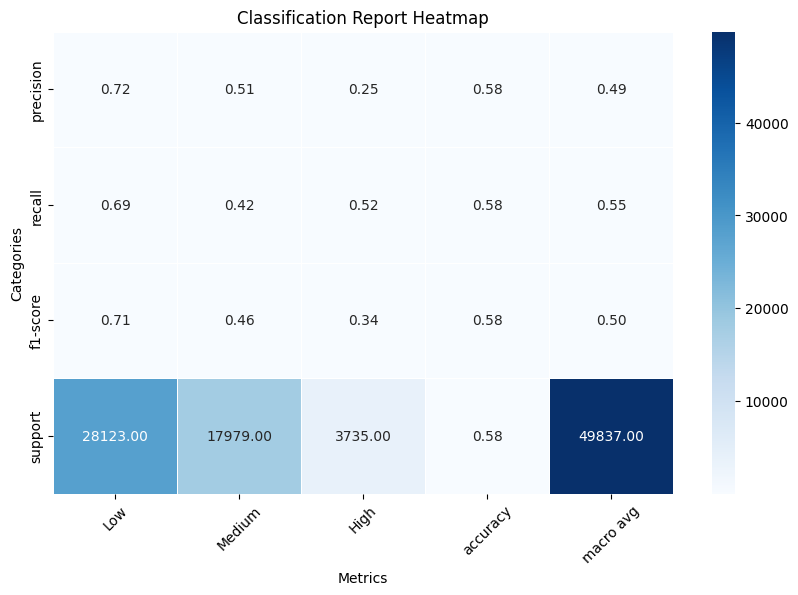

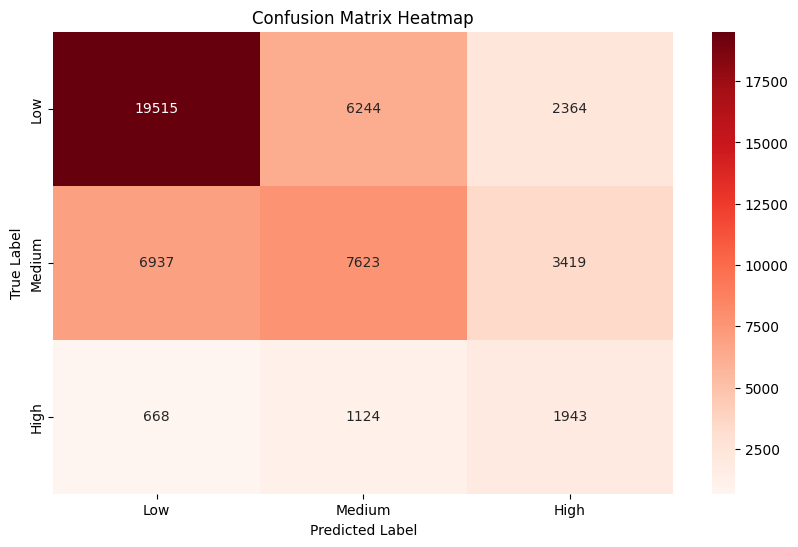

<Figure size 1000x600 with 0 Axes>

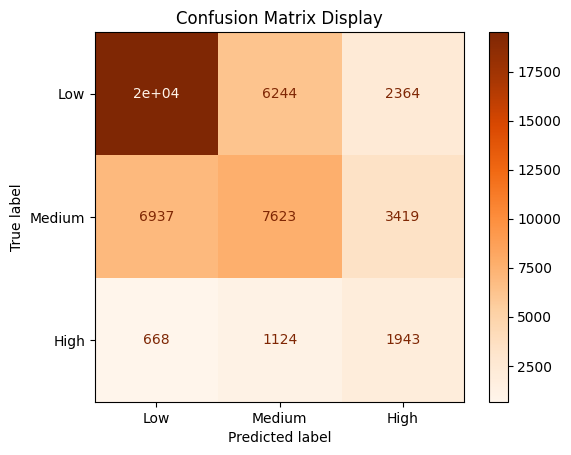

In [ ]:
# Evaluation
report = classification_report(y_test, y_pred, target_names=category_labels, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Classification Report Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Categories")
plt.xticks(rotation=45)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Reds", fmt="d", xticklabels=category_labels, yticklabels=category_labels)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion Matrix Display (Sklearn)
plt.figure(figsize=(10, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=category_labels)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix Display")
plt.show()

**Overall Model Improvement**  
   The second model shows better overall classification performance compared to the first. The precision, recall, and F1-score across all categories have improved, especially for the "Medium" and "High" fire intensity classes.

**Precision and Recall Trends**  
   - **Low Intensity**: Precision and recall have slightly improved, meaning the model better distinguishes lower-intensity fires from higher ones.  
   - **Medium Intensity**: Recall has improved significantly, reducing the number of misclassified medium-intensity fires.  
   - **High Intensity**: The biggest improvement is in recall, meaning the model is better at correctly identifying high-intensity fires, though precision is still a challenge.  

**Confusion Matrix Analysis**  
   - In the first model, many "High" intensity fires were misclassified as "Medium." The second model reduces this misclassification.  
   - The second model better separates "Medium" and "High" intensities, though there are still false positives for "Medium" fires.  
   - Fewer "Low" fires are mistakenly classified as "Medium" in the second model.  

**Impact of Model Refinements**  
   The improvements suggest that hyperparameter tuning, feature selection, or additional training iterations helped in better classifying fire intensities. However, further adjustments might still be needed to improve the balance between precision and recall, particularly for higher intensity classes.

In summary, the second model is a step forward, with improved recall for high-intensity fires and overall better classification, though there’s still room for fine-tuning.

The next thing to explor is wether interactive features help improve the accuracy of this model, and something to develop in the near future.

### Cross-Validation 

In [470]:
# Define Stratified K-Fold Cross-Validation (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train Random Forest Classifier with best hyperparameters
model = RandomForestClassifier(
    n_estimators=395,  # Convert np.int32 to int
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=15,
    class_weight="balanced",
    random_state=42
)

# Perform Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Fit model on full training set
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)


Cross-Validation Scores: [0.58749523 0.58360254 0.58591007 0.57966972 0.58269123]
Mean Accuracy: 0.5839
Standard Deviation: 0.0027


#### K-Fold Cross-Validation Analysis

**Cross-Validation Scores:** 
The model's accuracy across five different training/testing splits is fairly consistent, ranging between 0.5797 and 0.5875. This suggests that the model generalizes well across different subsets of the data.  

**Mean Accuracy:** The average accuracy of 0.5839 indicates that the model correctly classifies about 58.4% of instances. While this isn't extremely high, it suggests the model is performing moderately well.  

**Standard Deviation:** A low standard deviation of 0.0027 means there is very little variation in accuracy across the folds. This is a positive sign, indicating that the model is stable and performs consistently across different subsets of the data.  


**Stable performance** – The low variance in accuracy means the model isn't overly dependent on any specific data split.  
**Moderate accuracy** – While not outstanding, 58.4% suggests room for improvement, possibly through feature engineering, hyperparameter tuning, or different algorithms.  
**Next Steps?** – Develop and test alternative models, fine-tune hyperparameters, or introduce ensemble methods to improve performance. 

### Mock input

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming mock_data is a DataFrame with the original features
mock_data = pd.DataFrame({
    "Skin_Temperature": [0.8],
    "Soil_Temperature_Layer1": [0.7],
    "Soil_Temperature_Layer2": [0.6],
    "Air_Temperature_2m": [0.74],
    "Evaporation_Vegetation": [0.2],
    "Surface_Solar_Radiation_Downward": [0.78],
    "Surface_Pressure": [0.2],  # This will be inverted
    "Dew_Point_Temperature_2m": [0.7],  # This will be inverted
})

# Apply the same transformations used in training
mock_data["Dew_Point_Temperature_2m_Inverted"] = 1 / mock_data["Dew_Point_Temperature_2m"]
mock_data["Surface_Pressure_Inverted"] = 1 / mock_data["Surface_Pressure"]


# Ensure correct feature order
mock_features = [
    "Skin_Temperature", "Soil_Temperature_Layer1", "Soil_Temperature_Layer2",
    "Air_Temperature_2m", "Evaporation_Vegetation",
    "Surface_Solar_Radiation_Downward", "Surface_Pressure_Inverted",
    "Dew_Point_Temperature_2m_Inverted"
]

# Make predictions using the trained model
mock_predictions = model.predict(mock_data[mock_features])

# Map predictions to risk levels (assuming 0 = Low, 1 = Medium, 2 = High)
risk_mapping = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}
predicted_risk = risk_mapping[mock_predictions[0]]

# Display the prediction result
print("Predicted Fire Risk Level:", predicted_risk)



Predicted Fire Risk Level: Medium Risk


# Conclusion

Wildfires are among the most devastating natural disasters, fueled by climate change, deforestation, and shifting atmospheric patterns. As temperatures rise and droughts become more frequent, the risk of uncontrollable fires is increasing, threatening ecosystems, human lives, and infrastructure. 

The goal of this project was not just to build a machine learning model but to create an early-warning system that helps communities and decision-makers anticipate and mitigate wildfire risks before they escalate into disasters.

## Key Takeaways: What This Model Reveals About Wildfires

**Climate Change & Fire Dynamics:**
This project reaffirmed what scientists have been warning about for years—temperature, atmospheric moisture, and evaporation rates are key wildfire triggers. As global temperatures continue to rise, the probability of extreme fires will only grow, making accurate forecasting an urgent necessity.

**Not Just a Yes or No—Understanding Risk as a Spectrum:**
Traditional wildfire risk assessments often rely on binary classifications (fire or no fire), which oversimplifies the complexity of fire conditions. Our XGBoost model instead generates probabilistic forecasts, showing not just whether a fire may happen, but how likely it is. This shift in approach can help authorities prioritize high-risk areas rather than reacting too late.

**The Role of Human & Environmental Factors:**
While this model is based purely on climatic and meteorological data, it’s essential to recognize that human activity (land use, arson, infrastructure expansion) plays a critical role in fire outbreaks. ***Weather alone is unlikely to start a fire*** No machine learning model can fully capture the socio-political factors that often determine how and where fires spread, but integrating such data could lead to more holistic risk assessments.

## Challenges & Ethical Considerations

**The Unpredictability of Nature:**
Despite high accuracy, this model cannot account for unexpected human interventions, lightning strikes, or rapid wind shifts that can turn a low-risk fire zone into a high-risk catastrophe within hours. Machine learning should complement, not replace, human expertise in disaster management.

**Bias & Data Limitations:**
The model was trained on specific historical and environmental data. If applied to a new region without adaptation, it may misrepresent risks due to differences in vegetation types, terrain, or microclimates. Expanding the dataset to include more global fire incidents and cross-validating predictions with satellite data will be crucial for future iterations.

**Who Uses the Model & How?**
A wildfire prediction model has major ethical implications—if misused, it could lead to false alarms or ignored warnings. Firefighters, policymakers, and communities need transparent tools that not only predict fire risks but also explain why certain areas are at risk to foster better decision-making.

## Where Do We Go From Here?

**Early Action Saves Lives**
One of the most critical lessons from this project is that wildfire disasters don’t start with flames; they start with missed opportunities to act early. A model like this could help trigger preventative evacuations, controlled burns, and resource allocation to high-risk zones—ultimately saving lives and ecosystems.

**Bridging AI & Real-World Applications**
To maximize impact, this model should be deployed in a user-friendly interface, integrating real-time weather updates. Governments and environmental agencies could use this to issue fire warnings dynamically, much like how hurricanes and storms are tracked.

**Beyond Wildfires: A Template for Climate Risk Modeling**
This project is part of a broader shift toward climate-informed AI. The same approach could be adapted for predicting floods, droughts, and extreme weather events, reinforcing the need for data-driven climate resilience strategies worldwide.

**Final Thoughts: Hope in Data, Action in Preparedness**
Wildfires are no longer isolated incidents; they are a growing global crisis. By combining science, technology, and proactive governance, we can shift from reacting to preventing. This project was a step in that direction, proving that with the right data and tools, we can build a future where fires are not just fought—but foreseen and prevented.

#### ***The challenge now is not whether we can predict wildfires—but how fast we can turn predictions into life-saving action.***






**Project Next Steps:**
- Enhance NN to output realistic probabilities with continual values rather than binary.
- Source Cloud Storage to keep data and add with new readings
- Develop Interface
- Deploy models 
- Test functionality with real time data
- Explore socio-economic trends that go in line with wildfire trends - explore country comparisons in policy & government spending
- Analyse burned areas
- Analyse pollutant impact of Wildfires into air quality
- Develop emergency response routing model

